# Autoencoder trained on the preprocessed dataset.
-------------------------------------------------------------------------------------------------------------------
# Technology used: Tensorflow 

### Start with creating some utility cells

In [1]:
# packages used for processing: 
import matplotlib.pyplot as plt # for visualization
import numpy as np

# deep learning framework
import tensorflow as tf

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# to plot the images inline
%matplotlib inline

In [2]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [3]:
# check the structure of the project directory
exec_command(['ls', '..'])

LICENSE
Models
network_architecture
processed_words_binary_data
README.md
readme.txt
readme.txt~
Scripts
svc2004
task_log
thresh_wordnet_english_test.py
thresh_wordnet_english_test.py~
words_binary



In [4]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../words_binary" # the data path
base_model_path = "../Models"
processed_data_path = "../processed_words_binary_data"
log_dir = os.path.join(base_model_path, "logdir")

# constants for the preprocessing script
data_size = (96, 192, 3)
batch_size = 5000 # 10000 images in each batch
no_of_epochs = 2000 # run the training loop for 100 epochs
no_of_batches = 10 # There are 10 batches of data
checkpoint_factor = 10 # save the model after every 10 epochs

In [5]:
# load a batch and check a few images from it
batch_path = os.path.join(processed_data_path, "batch_1")
sanity_test_batch = np.load(batch_path)

In [6]:
sanity_test_batch.shape

(5000, 96, 192, 3)

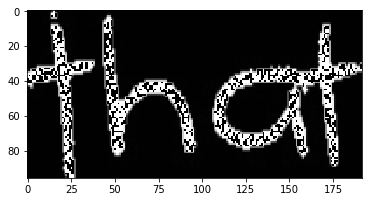

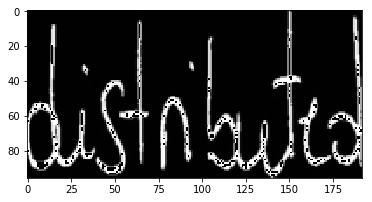

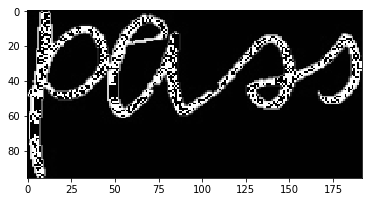

In [7]:
# display a few random images from the dataset:
for _ in range(3):
    random_index = np.random.randint(sanity_test_batch.shape[0])
    plt.figure()
    plt.imshow(sanity_test_batch[random_index])

# In the following cell, I define the computation graph for the network architecture that has been proposed for this task

There is a lot of code written in a single cell, so take a step by step approach towards understanding it

In [8]:
'''
    This cell defines the method required to spawn and return a tensorflow graph for the autoencoder model.
    coded by: Animesh
'''

import tensorflow as tf


myGraph = tf.Graph() #create a new graph object

with myGraph.as_default():
    # define the computations of this graph here:
    
    # helper functions to run the model:
    def normalize(ip_tensor, name = "normalization"):
        '''
            function to normalize the input tensor in the range of [-1, 1] 
            @param
            ip_tensor => the tensor to be normalized
            @return => the normalized version of the tensor
        '''
        with tf.name_scope(name): 
            ip_range = tf.reduce_max(ip_tensor) - tf.reduce_min(ip_tensor)
            mean = tf.reduce_mean(ip_tensor)
            return (ip_tensor - mean) / ip_range
    
    

    # placeholder for the input data batch
    inputs = tf.placeholder(dtype= tf.float32, 
                            shape=(None, data_size[0], data_size[1], data_size[2]), name="inputs")

    # normalized inputs to the range of [-1, 1]
    normalized_inputs = normalize(inputs, name="input_normalization")

    
    # We feed the original inputs to the convNet as shown below:
    # encoder layers: 96 x 192
    conv1_1 = tf.layers.conv2d(inputs, 32, [7, 7], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_1")
    
    bn1_1 = tf.layers.batch_normalization(conv1_1, name="batch_normalization1_1")
    
    relu1_1 = tf.nn.relu(bn1_1, name="relu1_1")
    
    # 48 x 96
    conv1_2 = tf.layers.conv2d(relu1_1, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_2")
    
    bn1_2 = tf.layers.batch_normalization(conv1_2, name="batch_normalization1_2")
    
    relu1_2 = tf.nn.relu(bn1_2, name="relu1_2")
    
    # 24 x 48
    conv1_3 = tf.layers.conv2d(relu1_2, 32, [5, 5], strides=(2, 2),
                            padding="SAME", name="conv_layer1_3")
    
    bn1_3 = tf.layers.batch_normalization(conv1_3, name="batch_normalization1_3")
    
    relu1_3 = tf.nn.relu(bn1_3, name="relu1_3")
    
    # 12 x 24
    conv1_4 = tf.layers.conv2d(relu1_3, 16, [3, 3], strides=(2, 2), 
                            padding="SAME", name="conv_layer1_4")

    bn1_4 = tf.layers.batch_normalization(conv1_4, name="batch_normalization1_4")
    
    relu1_4 = tf.nn.relu(bn1_4, name="relu1_4")
    
    # 6 x 12
    
    
    # decoder layers:
    # 6 x 12
    deconv1_1 = tf.layers.conv2d_transpose(relu1_4, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_1")
    
    deBn1_1 = tf.layers.batch_normalization(deconv1_1, name="de_batch_normalization1_1")
    
    deRelu1_1 = tf.nn.relu(deBn1_1, name="de_relu1_1")
    
    # 12 x 24
    deconv1_2 = tf.layers.conv2d_transpose(deRelu1_1, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_2")
    
    deBn1_2 = tf.layers.batch_normalization(deconv1_2, name="de_batch_normalization1_2")
    
    deRelu1_2 = tf.nn.relu(deBn1_2, name="de_relu1_2")
    
    # 24 x 48
    deconv1_3 = tf.layers.conv2d_transpose(deRelu1_2, 32, [4, 4], strides=(2, 2), 
                                           padding="SAME", name="deconv_layer_3")
    
    deBn1_3 = tf.layers.batch_normalization(deconv1_3, name="de_batch_normalization1_3")
    
    deRelu1_3 = tf.nn.relu(deBn1_3, name="de_relu1_3")
    
    # 48 x 96
    deconv1_4 = tf.layers.conv2d_transpose(deRelu1_3, 32, [4, 4], strides=(2, 2),
                                           padding="SAME", name="deconv_layer_4")
    
    deBn1_4 = tf.layers.batch_normalization(deconv1_4, name="de_batch_normalization1_4")
    
    deRelu1_4 = tf.nn.relu(deBn1_4, name="de_relu1_4")

    # 96 x 192
    deconv1_5 = tf.layers.conv2d_transpose(deRelu1_4, 3, [3, 3], strides=(1, 1),
                                           padding="SAME", name="deconv_layer_5")

    # normalize the predictions i.e deconv1_5 as mentioned above. and then use it for calculating the loss
    normalized_outputs = normalize(deconv1_5, name="output_normalization")
    
    output = relu1_4 # get a hook on to the latent representation of the encoder

    y_pred = normalized_outputs # output of the decoder
    y_true = normalized_inputs # input at the beginning

    # define the loss for this model:
    # calculate the loss and optimize the network
    loss = tf.norm(y_pred - y_true, ord="euclidean", name="eucledian_loss") # claculate the euclidean loss.

    # using Adam optimizer for optimization
    train_op = tf.train.AdamOptimizer(learning_rate=0.0001, beta1=0.9, beta2=0.999).minimize(loss, name="train_op")

In [9]:
# generate a graph of the above model and visualize it.
tensorboard_writer = tf.summary.FileWriter(log_dir, graph=myGraph)

In [10]:
itera = 1
model_name = "Model1"

In [12]:
''' 
    WARNING WARNING WARNING!!! This is the main training cell. Since, the data used for this task is CIFAR-10, 
    This cell will take a really really long time on low-end machines. It will however not crash your pc, since 
    I have bootstrapped the training in such a way that it loads a small chunk of data at a time to train.
'''

with tf.Session(graph=myGraph) as sess:
    
    # the path where the model will be saved 
    ''' Currently using the Model no. 1 '''
    model_path = os.path.join(base_model_path, model_name)
    
    # The saver object for saving and loading the model
    saver = tf.train.Saver(max_to_keep=2)
    
    if(os.path.isfile(os.path.join(model_path, "checkpoint"))):
        # load the weights from the model
        # instead of global variable initializer, restore the graph:
        saver.restore(sess, tf.train.latest_checkpoint(new_model_path))
        
    else:
        
        # initialize all the variables
        sess.run(tf.global_variables_initializer())
    
    for ep in range((itera - 1) * no_of_epochs, itera * no_of_epochs):  # start the loop 
        
        print "epoch: " + str(ep + 1)
        print "================================================================================================="
        print "================================================================================================="
        
        for batch_n in range(no_of_batches):  # batches loop
            # log a comment related to the current batch:
            print "current_batch: " + str(batch_n + 1)
            
            # generate the batch images and labels
            batch_images = np.load(os.path.join(processed_data_path, "batch_" + str(batch_n + 1)))
            
            min_batch_size = 500 # we look at only 1000 images at a time since the machine is small
            
            for index in range(int(float(len(batch_images)) / min_batch_size + 0.5)):
                start = index * min_batch_size
                end = start + min_batch_size
                _, cost = sess.run([train_op, loss], feed_dict={inputs: batch_images[start: end]})
                print('range:{} loss= {}'.format((start, start + len(batch_images[start:end])), cost))
            
            print "\n=========================================================================================\n"
        
        if((ep + 1) % checkpoint_factor == 0):
            # save the model trained so far:
            saver.save(sess, os.path.join(model_path, model_name), global_step = (ep + 1))
        
    print "================================================================================================="
    print "================================================================================================="

epoch: 1
current_batch: 1
range:(0, 500) loss= 2010.58337402
range:(500, 1000) loss= 1998.24841309
range:(1000, 1500) loss= 1981.96313477
range:(1500, 2000) loss= 1969.33178711
range:(2000, 2500) loss= 1964.04492188
range:(2500, 3000) loss= 1980.06396484
range:(3000, 3500) loss= 1945.93115234
range:(3500, 4000) loss= 1961.98278809
range:(4000, 4500) loss= 1958.86169434
range:(4500, 5000) loss= 1952.26647949


current_batch: 2
range:(0, 500) loss= 1960.75524902
range:(500, 1000) loss= 1953.65881348
range:(1000, 1500) loss= 1968.98388672
range:(1500, 2000) loss= 1961.19311523
range:(2000, 2500) loss= 1935.7130127
range:(2500, 3000) loss= 1953.02941895
range:(3000, 3500) loss= 1944.7298584
range:(3500, 4000) loss= 1948.16064453
range:(4000, 4500) loss= 1942.98962402
range:(4500, 5000) loss= 1950.47680664


current_batch: 3
range:(0, 500) loss= 1940.89746094
range:(500, 1000) loss= 1964.88317871
range:(1000, 1500) loss= 1950.66625977
range:(1500, 2000) loss= 1942.07641602
range:(2000, 2500

range:(0, 500) loss= 1503.48059082
range:(500, 1000) loss= 1494.14294434
range:(1000, 1500) loss= 1496.57080078
range:(1500, 2000) loss= 1497.35827637
range:(2000, 2500) loss= 1497.25012207
range:(2500, 3000) loss= 1486.28125
range:(3000, 3500) loss= 1478.12341309
range:(3500, 4000) loss= 1472.1027832
range:(4000, 4500) loss= 1494.39599609
range:(4500, 5000) loss= 1483.29187012


current_batch: 8
range:(0, 500) loss= 1476.92346191
range:(500, 1000) loss= 1482.51452637
range:(1000, 1500) loss= 1481.55651855
range:(1500, 2000) loss= 1473.22851562
range:(2000, 2500) loss= 1476.78186035
range:(2500, 3000) loss= 1475.16540527
range:(3000, 3500) loss= 1473.94104004
range:(3500, 4000) loss= 1472.35803223
range:(4000, 4500) loss= 1467.13720703
range:(4500, 5000) loss= 1470.29089355


current_batch: 9
range:(0, 500) loss= 1465.15234375
range:(500, 1000) loss= 1458.73498535
range:(1000, 1500) loss= 1455.41906738
range:(1500, 2000) loss= 1460.01696777
range:(2000, 2500) loss= 1452.61828613
range:

range:(1000, 1500) loss= 1345.92956543
range:(1500, 2000) loss= 1338.5526123
range:(2000, 2500) loss= 1340.81005859
range:(2500, 3000) loss= 1341.58898926
range:(3000, 3500) loss= 1334.82653809
range:(3500, 4000) loss= 1342.46569824
range:(4000, 4500) loss= 1338.31652832
range:(4500, 5000) loss= 1334.7980957


current_batch: 4
range:(0, 500) loss= 1346.52099609
range:(500, 1000) loss= 1344.22497559
range:(1000, 1500) loss= 1339.78942871
range:(1500, 2000) loss= 1337.76538086
range:(2000, 2500) loss= 1332.26147461
range:(2500, 3000) loss= 1329.93127441
range:(3000, 3500) loss= 1354.67932129
range:(3500, 4000) loss= 1331.65759277
range:(4000, 4500) loss= 1316.9095459
range:(4500, 5000) loss= 1331.28930664


current_batch: 5
range:(0, 500) loss= 1333.88989258
range:(500, 1000) loss= 1321.61779785
range:(1000, 1500) loss= 1321.26416016
range:(1500, 2000) loss= 1320.46203613
range:(2000, 2500) loss= 1333.60205078
range:(2500, 3000) loss= 1331.45263672
range:(3000, 3500) loss= 1327.20068359


range:(3500, 4000) loss= 1258.9185791
range:(4000, 4500) loss= 1253.75231934
range:(4500, 5000) loss= 1250.47937012


current_batch: 10
range:(0, 500) loss= 1246.99243164
range:(500, 1000) loss= 1251.63671875
range:(1000, 1500) loss= 1257.57946777
range:(1500, 2000) loss= 1255.95715332
range:(2000, 2500) loss= 1252.890625
range:(2500, 3000) loss= 1259.80175781
range:(3000, 3500) loss= 1261.42736816
range:(3500, 3929) loss= 1149.21386719


epoch: 6
current_batch: 1
range:(0, 500) loss= 1251.16845703
range:(500, 1000) loss= 1249.51586914
range:(1000, 1500) loss= 1252.18164062
range:(1500, 2000) loss= 1245.06213379
range:(2000, 2500) loss= 1252.87866211
range:(2500, 3000) loss= 1246.72692871
range:(3000, 3500) loss= 1247.91101074
range:(3500, 4000) loss= 1249.30700684
range:(4000, 4500) loss= 1242.68103027
range:(4500, 5000) loss= 1246.17175293


current_batch: 2
range:(0, 500) loss= 1248.47546387
range:(500, 1000) loss= 1253.36938477
range:(1000, 1500) loss= 1254.93884277
range:(1500, 20

range:(4500, 5000) loss= 1183.17614746


current_batch: 6
range:(0, 500) loss= 1188.04174805
range:(500, 1000) loss= 1179.66369629
range:(1000, 1500) loss= 1179.90637207
range:(1500, 2000) loss= 1180.10131836
range:(2000, 2500) loss= 1200.06433105
range:(2500, 3000) loss= 1174.95776367
range:(3000, 3500) loss= 1194.38269043
range:(3500, 4000) loss= 1190.41052246
range:(4000, 4500) loss= 1186.35571289
range:(4500, 5000) loss= 1176.66174316


current_batch: 7
range:(0, 500) loss= 1171.82678223
range:(500, 1000) loss= 1173.52478027
range:(1000, 1500) loss= 1175.08093262
range:(1500, 2000) loss= 1179.12414551
range:(2000, 2500) loss= 1173.88012695
range:(2500, 3000) loss= 1174.08935547
range:(3000, 3500) loss= 1165.19311523
range:(3500, 4000) loss= 1173.45068359
range:(4000, 4500) loss= 1182.77172852
range:(4500, 5000) loss= 1181.86584473


current_batch: 8
range:(0, 500) loss= 1182.45739746
range:(500, 1000) loss= 1180.94360352
range:(1000, 1500) loss= 1181.85595703
range:(1500, 2000) los

range:(0, 500) loss= 1126.87365723
range:(500, 1000) loss= 1136.35192871
range:(1000, 1500) loss= 1128.89746094
range:(1500, 2000) loss= 1124.44519043
range:(2000, 2500) loss= 1117.2689209
range:(2500, 3000) loss= 1126.49511719
range:(3000, 3500) loss= 1113.37536621
range:(3500, 4000) loss= 1128.29919434
range:(4000, 4500) loss= 1123.63952637
range:(4500, 5000) loss= 1120.6237793


current_batch: 3
range:(0, 500) loss= 1117.83410645
range:(500, 1000) loss= 1118.96081543
range:(1000, 1500) loss= 1108.8626709
range:(1500, 2000) loss= 1117.12402344
range:(2000, 2500) loss= 1116.87878418
range:(2500, 3000) loss= 1115.58630371
range:(3000, 3500) loss= 1103.63293457
range:(3500, 4000) loss= 1114.22973633
range:(4000, 4500) loss= 1111.50939941
range:(4500, 5000) loss= 1109.22583008


current_batch: 4
range:(0, 500) loss= 1114.9979248
range:(500, 1000) loss= 1119.87011719
range:(1000, 1500) loss= 1115.22888184
range:(1500, 2000) loss= 1121.56237793
range:(2000, 2500) loss= 1118.43164062
range:

range:(2500, 3000) loss= 1067.34838867
range:(3000, 3500) loss= 1071.06359863
range:(3500, 4000) loss= 1069.484375
range:(4000, 4500) loss= 1079.74194336
range:(4500, 5000) loss= 1071.08190918


current_batch: 9
range:(0, 500) loss= 1064.91088867
range:(500, 1000) loss= 1064.70739746
range:(1000, 1500) loss= 1061.15881348
range:(1500, 2000) loss= 1076.05554199
range:(2000, 2500) loss= 1064.47912598
range:(2500, 3000) loss= 1065.91918945
range:(3000, 3500) loss= 1073.38879395
range:(3500, 4000) loss= 1069.40332031
range:(4000, 4500) loss= 1070.9901123
range:(4500, 5000) loss= 1062.37902832


current_batch: 10
range:(0, 500) loss= 1058.91369629
range:(500, 1000) loss= 1069.80554199
range:(1000, 1500) loss= 1054.41455078
range:(1500, 2000) loss= 1059.94677734
range:(2000, 2500) loss= 1069.9239502
range:(2500, 3000) loss= 1062.90856934
range:(3000, 3500) loss= 1069.01928711
range:(3500, 3929) loss= 970.296630859


epoch: 11
current_batch: 1
range:(0, 500) loss= 1061.98620605
range:(500, 10

range:(3500, 4000) loss= 1023.84960938
range:(4000, 4500) loss= 1014.74902344
range:(4500, 5000) loss= 1030.1697998


current_batch: 5
range:(0, 500) loss= 1019.10583496
range:(500, 1000) loss= 1012.64935303
range:(1000, 1500) loss= 1014.97149658
range:(1500, 2000) loss= 1014.20874023
range:(2000, 2500) loss= 1022.44714355
range:(2500, 3000) loss= 1023.74993896
range:(3000, 3500) loss= 1015.246521
range:(3500, 4000) loss= 1016.32012939
range:(4000, 4500) loss= 1014.29431152
range:(4500, 5000) loss= 1012.63763428


current_batch: 6
range:(0, 500) loss= 1020.99169922
range:(500, 1000) loss= 1011.45928955
range:(1000, 1500) loss= 1011.35571289
range:(1500, 2000) loss= 1004.68457031
range:(2000, 2500) loss= 1023.78833008
range:(2500, 3000) loss= 1008.49645996
range:(3000, 3500) loss= 1019.07769775
range:(3500, 4000) loss= 1024.03527832
range:(4000, 4500) loss= 1013.99432373
range:(4500, 5000) loss= 1019.53942871


current_batch: 7
range:(0, 500) loss= 1002.63311768
range:(500, 1000) loss= 

range:(0, 500) loss= 978.585021973
range:(500, 1000) loss= 976.955810547
range:(1000, 1500) loss= 974.725219727
range:(1500, 2000) loss= 974.042907715
range:(2000, 2500) loss= 979.906677246
range:(2500, 3000) loss= 972.42980957
range:(3000, 3500) loss= 978.187988281
range:(3500, 4000) loss= 975.159301758
range:(4000, 4500) loss= 975.319641113
range:(4500, 5000) loss= 975.6171875


current_batch: 2
range:(0, 500) loss= 971.328613281
range:(500, 1000) loss= 976.726318359
range:(1000, 1500) loss= 971.291320801
range:(1500, 2000) loss= 976.47052002
range:(2000, 2500) loss= 970.237609863
range:(2500, 3000) loss= 971.512878418
range:(3000, 3500) loss= 961.877441406
range:(3500, 4000) loss= 977.07019043
range:(4000, 4500) loss= 968.679382324
range:(4500, 5000) loss= 967.978515625


current_batch: 3
range:(0, 500) loss= 969.541625977
range:(500, 1000) loss= 969.864929199
range:(1000, 1500) loss= 959.843078613
range:(1500, 2000) loss= 967.059204102
range:(2000, 2500) loss= 969.945556641
range:(

range:(2500, 3000) loss= 936.928833008
range:(3000, 3500) loss= 932.954772949
range:(3500, 4000) loss= 934.441223145
range:(4000, 4500) loss= 935.445495605
range:(4500, 5000) loss= 939.200195312


current_batch: 8
range:(0, 500) loss= 926.845397949
range:(500, 1000) loss= 933.635681152
range:(1000, 1500) loss= 938.312805176
range:(1500, 2000) loss= 934.328918457
range:(2000, 2500) loss= 919.026611328
range:(2500, 3000) loss= 929.738891602
range:(3000, 3500) loss= 935.177246094
range:(3500, 4000) loss= 932.477416992
range:(4000, 4500) loss= 943.558044434
range:(4500, 5000) loss= 924.907897949


current_batch: 9
range:(0, 500) loss= 925.972229004
range:(500, 1000) loss= 928.80090332
range:(1000, 1500) loss= 923.657043457
range:(1500, 2000) loss= 940.990905762
range:(2000, 2500) loss= 934.170715332
range:(2500, 3000) loss= 919.033752441
range:(3000, 3500) loss= 938.08001709
range:(3500, 4000) loss= 936.091247559
range:(4000, 4500) loss= 932.596618652
range:(4500, 5000) loss= 929.945617676

range:(3500, 4000) loss= 903.929138184
range:(4000, 4500) loss= 898.954223633
range:(4500, 5000) loss= 890.944274902


current_batch: 4
range:(0, 500) loss= 891.651367188
range:(500, 1000) loss= 901.493041992
range:(1000, 1500) loss= 890.093383789
range:(1500, 2000) loss= 900.989074707
range:(2000, 2500) loss= 901.205932617
range:(2500, 3000) loss= 895.781066895
range:(3000, 3500) loss= 901.560546875
range:(3500, 4000) loss= 899.383666992
range:(4000, 4500) loss= 899.148376465
range:(4500, 5000) loss= 895.144165039


current_batch: 5
range:(0, 500) loss= 906.192138672
range:(500, 1000) loss= 893.864868164
range:(1000, 1500) loss= 897.214355469
range:(1500, 2000) loss= 881.357849121
range:(2000, 2500) loss= 896.530212402
range:(2500, 3000) loss= 897.896179199
range:(3000, 3500) loss= 895.139709473
range:(3500, 4000) loss= 896.472106934
range:(4000, 4500) loss= 892.96697998
range:(4500, 5000) loss= 891.287780762


current_batch: 6
range:(0, 500) loss= 890.421569824
range:(500, 1000) loss

range:(0, 500) loss= 864.686645508
range:(500, 1000) loss= 859.005371094
range:(1000, 1500) loss= 855.394104004
range:(1500, 2000) loss= 864.679504395
range:(2000, 2500) loss= 868.831726074
range:(2500, 3000) loss= 865.434143066
range:(3000, 3500) loss= 872.641296387
range:(3500, 3929) loss= 789.815856934


epoch: 19
current_batch: 1
range:(0, 500) loss= 856.533081055
range:(500, 1000) loss= 858.437072754
range:(1000, 1500) loss= 866.705200195
range:(1500, 2000) loss= 859.347473145
range:(2000, 2500) loss= 863.845092773
range:(2500, 3000) loss= 851.725280762
range:(3000, 3500) loss= 871.47088623
range:(3500, 4000) loss= 868.195007324
range:(4000, 4500) loss= 864.46282959
range:(4500, 5000) loss= 869.047424316


current_batch: 2
range:(0, 500) loss= 865.856628418
range:(500, 1000) loss= 868.785888672
range:(1000, 1500) loss= 861.460510254
range:(1500, 2000) loss= 860.175537109
range:(2000, 2500) loss= 863.603637695
range:(2500, 3000) loss= 861.808410645
range:(3000, 3500) loss= 855.3464

range:(1000, 1500) loss= 833.153015137
range:(1500, 2000) loss= 831.270324707
range:(2000, 2500) loss= 846.508605957
range:(2500, 3000) loss= 831.399597168
range:(3000, 3500) loss= 843.756774902
range:(3500, 4000) loss= 842.985595703
range:(4000, 4500) loss= 839.877807617
range:(4500, 5000) loss= 838.017822266


current_batch: 7
range:(0, 500) loss= 833.01751709
range:(500, 1000) loss= 837.708007812
range:(1000, 1500) loss= 822.693237305
range:(1500, 2000) loss= 842.534851074
range:(2000, 2500) loss= 831.960144043
range:(2500, 3000) loss= 835.73223877
range:(3000, 3500) loss= 836.420227051
range:(3500, 4000) loss= 837.577575684
range:(4000, 4500) loss= 839.068359375
range:(4500, 5000) loss= 840.076538086


current_batch: 8
range:(0, 500) loss= 829.97479248
range:(500, 1000) loss= 844.43157959
range:(1000, 1500) loss= 839.596130371
range:(1500, 2000) loss= 844.689941406
range:(2000, 2500) loss= 827.314758301
range:(2500, 3000) loss= 838.189147949
range:(3000, 3500) loss= 843.277587891
r

range:(2000, 2500) loss= 815.452270508
range:(2500, 3000) loss= 817.854370117
range:(3000, 3500) loss= 802.712219238
range:(3500, 4000) loss= 823.125
range:(4000, 4500) loss= 814.159912109
range:(4500, 5000) loss= 808.601867676


current_batch: 3
range:(0, 500) loss= 812.2734375
range:(500, 1000) loss= 811.21673584
range:(1000, 1500) loss= 800.018615723
range:(1500, 2000) loss= 816.627258301
range:(2000, 2500) loss= 812.150634766
range:(2500, 3000) loss= 816.608398438
range:(3000, 3500) loss= 799.246154785
range:(3500, 4000) loss= 808.377624512
range:(4000, 4500) loss= 803.608825684
range:(4500, 5000) loss= 805.742736816


current_batch: 4
range:(0, 500) loss= 804.741088867
range:(500, 1000) loss= 815.217590332
range:(1000, 1500) loss= 804.250183105
range:(1500, 2000) loss= 819.22088623
range:(2000, 2500) loss= 816.474609375
range:(2500, 3000) loss= 802.945129395
range:(3000, 3500) loss= 820.33770752
range:(3500, 4000) loss= 811.677490234
range:(4000, 4500) loss= 816.802978516
range:(4

range:(4500, 5000) loss= 791.775024414


current_batch: 9
range:(0, 500) loss= 792.04675293
range:(500, 1000) loss= 790.067016602
range:(1000, 1500) loss= 789.338806152
range:(1500, 2000) loss= 802.237792969
range:(2000, 2500) loss= 801.996643066
range:(2500, 3000) loss= 793.534484863
range:(3000, 3500) loss= 802.653381348
range:(3500, 4000) loss= 799.36706543
range:(4000, 4500) loss= 804.711303711
range:(4500, 5000) loss= 793.659729004


current_batch: 10
range:(0, 500) loss= 799.447814941
range:(500, 1000) loss= 787.545898438
range:(1000, 1500) loss= 788.014099121
range:(1500, 2000) loss= 795.715820312
range:(2000, 2500) loss= 799.842346191
range:(2500, 3000) loss= 791.76385498
range:(3000, 3500) loss= 798.668334961
range:(3500, 3929) loss= 725.378112793


epoch: 24
current_batch: 1
range:(0, 500) loss= 788.770812988
range:(500, 1000) loss= 788.117797852
range:(1000, 1500) loss= 795.465759277
range:(1500, 2000) loss= 791.779785156
range:(2000, 2500) loss= 796.309326172
range:(2500, 3

range:(0, 500) loss= 774.68347168
range:(500, 1000) loss= 769.773071289
range:(1000, 1500) loss= 785.637329102
range:(1500, 2000) loss= 760.81628418
range:(2000, 2500) loss= 775.857971191
range:(2500, 3000) loss= 779.262817383
range:(3000, 3500) loss= 774.785217285
range:(3500, 4000) loss= 776.398376465
range:(4000, 4500) loss= 780.044799805
range:(4500, 5000) loss= 769.463439941


current_batch: 6
range:(0, 500) loss= 771.34197998
range:(500, 1000) loss= 774.485229492
range:(1000, 1500) loss= 768.457397461
range:(1500, 2000) loss= 763.977355957
range:(2000, 2500) loss= 780.176208496
range:(2500, 3000) loss= 763.945373535
range:(3000, 3500) loss= 786.129394531
range:(3500, 4000) loss= 787.526550293
range:(4000, 4500) loss= 771.786315918
range:(4500, 5000) loss= 771.505615234


current_batch: 7
range:(0, 500) loss= 767.12121582
range:(500, 1000) loss= 774.355285645
range:(1000, 1500) loss= 760.005554199
range:(1500, 2000) loss= 778.398681641
range:(2000, 2500) loss= 765.396789551
range:

range:(1000, 1500) loss= 763.813598633
range:(1500, 2000) loss= 755.29864502
range:(2000, 2500) loss= 760.782897949
range:(2500, 3000) loss= 751.409240723
range:(3000, 3500) loss= 767.59375
range:(3500, 4000) loss= 761.130310059
range:(4000, 4500) loss= 759.841003418
range:(4500, 5000) loss= 762.920410156


current_batch: 2
range:(0, 500) loss= 762.277893066
range:(500, 1000) loss= 768.03503418
range:(1000, 1500) loss= 764.515563965
range:(1500, 2000) loss= 752.503356934
range:(2000, 2500) loss= 761.430297852
range:(2500, 3000) loss= 762.215026855
range:(3000, 3500) loss= 748.075378418
range:(3500, 4000) loss= 768.365356445
range:(4000, 4500) loss= 760.903259277
range:(4500, 5000) loss= 758.334106445


current_batch: 3
range:(0, 500) loss= 762.652832031
range:(500, 1000) loss= 760.720458984
range:(1000, 1500) loss= 745.863586426
range:(1500, 2000) loss= 765.703308105
range:(2000, 2500) loss= 761.288085938
range:(2500, 3000) loss= 766.656921387
range:(3000, 3500) loss= 750.401367188
ran

range:(3500, 4000) loss= 749.096130371
range:(4000, 4500) loss= 745.525146484
range:(4500, 5000) loss= 752.227539062


current_batch: 8
range:(0, 500) loss= 738.976806641
range:(500, 1000) loss= 750.33404541
range:(1000, 1500) loss= 746.412780762
range:(1500, 2000) loss= 748.823364258
range:(2000, 2500) loss= 728.303710938
range:(2500, 3000) loss= 740.811828613
range:(3000, 3500) loss= 746.119934082
range:(3500, 4000) loss= 740.354919434
range:(4000, 4500) loss= 759.042724609
range:(4500, 5000) loss= 741.66192627


current_batch: 9
range:(0, 500) loss= 743.623962402
range:(500, 1000) loss= 741.660522461
range:(1000, 1500) loss= 740.047607422
range:(1500, 2000) loss= 750.708068848
range:(2000, 2500) loss= 748.487365723
range:(2500, 3000) loss= 735.701171875
range:(3000, 3500) loss= 749.411254883
range:(3500, 4000) loss= 747.162536621
range:(4000, 4500) loss= 745.686279297
range:(4500, 5000) loss= 739.554626465


current_batch: 10
range:(0, 500) loss= 740.346679688
range:(500, 1000) loss

range:(4500, 5000) loss= 724.83203125


current_batch: 4
range:(0, 500) loss= 727.443359375
range:(500, 1000) loss= 730.658447266
range:(1000, 1500) loss= 724.505065918
range:(1500, 2000) loss= 739.253723145
range:(2000, 2500) loss= 736.190429688
range:(2500, 3000) loss= 724.519714355
range:(3000, 3500) loss= 743.582336426
range:(3500, 4000) loss= 732.520202637
range:(4000, 4500) loss= 735.389038086
range:(4500, 5000) loss= 732.465637207


current_batch: 5
range:(0, 500) loss= 730.927612305
range:(500, 1000) loss= 724.232299805
range:(1000, 1500) loss= 734.097106934
range:(1500, 2000) loss= 720.567810059
range:(2000, 2500) loss= 737.963439941
range:(2500, 3000) loss= 736.605163574
range:(3000, 3500) loss= 728.742736816
range:(3500, 4000) loss= 733.02142334
range:(4000, 4500) loss= 723.599121094
range:(4500, 5000) loss= 727.375


current_batch: 6
range:(0, 500) loss= 726.237243652
range:(500, 1000) loss= 732.129211426
range:(1000, 1500) loss= 733.919799805
range:(1500, 2000) loss= 728.6

range:(500, 1000) loss= 714.08782959
range:(1000, 1500) loss= 710.382019043
range:(1500, 2000) loss= 717.750610352
range:(2000, 2500) loss= 723.751708984
range:(2500, 3000) loss= 721.887329102
range:(3000, 3500) loss= 724.011657715
range:(3500, 3929) loss= 653.386413574


epoch: 32
current_batch: 1
range:(0, 500) loss= 713.686584473
range:(500, 1000) loss= 710.295654297
range:(1000, 1500) loss= 722.499084473
range:(1500, 2000) loss= 718.19519043
range:(2000, 2500) loss= 717.345703125
range:(2500, 3000) loss= 705.075561523
range:(3000, 3500) loss= 725.712463379
range:(3500, 4000) loss= 721.640869141
range:(4000, 4500) loss= 720.451843262
range:(4500, 5000) loss= 721.118469238


current_batch: 2
range:(0, 500) loss= 714.797607422
range:(500, 1000) loss= 722.425537109
range:(1000, 1500) loss= 718.19708252
range:(1500, 2000) loss= 714.719177246
range:(2000, 2500) loss= 718.9453125
range:(2500, 3000) loss= 715.147949219
range:(3000, 3500) loss= 704.462219238
range:(3500, 4000) loss= 725.535

range:(1500, 2000) loss= 699.019958496
range:(2000, 2500) loss= 718.169494629
range:(2500, 3000) loss= 697.565979004
range:(3000, 3500) loss= 709.45135498
range:(3500, 4000) loss= 711.053039551
range:(4000, 4500) loss= 700.547790527
range:(4500, 5000) loss= 700.981384277


current_batch: 7
range:(0, 500) loss= 697.146911621
range:(500, 1000) loss= 702.893188477
range:(1000, 1500) loss= 690.904663086
range:(1500, 2000) loss= 709.226013184
range:(2000, 2500) loss= 695.504760742
range:(2500, 3000) loss= 699.073913574
range:(3000, 3500) loss= 707.927734375
range:(3500, 4000) loss= 709.209960938
range:(4000, 4500) loss= 705.131652832
range:(4500, 5000) loss= 706.737060547


current_batch: 8
range:(0, 500) loss= 693.654846191
range:(500, 1000) loss= 707.791625977
range:(1000, 1500) loss= 706.403869629
range:(1500, 2000) loss= 707.954650879
range:(2000, 2500) loss= 696.161254883
range:(2500, 3000) loss= 696.88079834
range:(3000, 3500) loss= 704.17175293
range:(3500, 4000) loss= 703.279663086


range:(2500, 3000) loss= 698.602966309
range:(3000, 3500) loss= 687.555114746
range:(3500, 4000) loss= 700.462097168
range:(4000, 4500) loss= 696.930603027
range:(4500, 5000) loss= 690.663330078


current_batch: 3
range:(0, 500) loss= 700.104858398
range:(500, 1000) loss= 694.314147949
range:(1000, 1500) loss= 681.792541504
range:(1500, 2000) loss= 700.660644531
range:(2000, 2500) loss= 700.851501465
range:(2500, 3000) loss= 696.149963379
range:(3000, 3500) loss= 683.674560547
range:(3500, 4000) loss= 694.004150391
range:(4000, 4500) loss= 689.766479492
range:(4500, 5000) loss= 697.131347656


current_batch: 4
range:(0, 500) loss= 697.861328125
range:(500, 1000) loss= 699.119506836
range:(1000, 1500) loss= 691.62109375
range:(1500, 2000) loss= 703.498596191
range:(2000, 2500) loss= 700.580688477
range:(2500, 3000) loss= 689.572875977
range:(3000, 3500) loss= 698.321228027
range:(3500, 4000) loss= 698.528381348
range:(4000, 4500) loss= 700.729431152
range:(4500, 5000) loss= 694.85717773

range:(0, 500) loss= 683.706115723
range:(500, 1000) loss= 685.359924316
range:(1000, 1500) loss= 677.844177246
range:(1500, 2000) loss= 693.217895508
range:(2000, 2500) loss= 687.364074707
range:(2500, 3000) loss= 676.684143066
range:(3000, 3500) loss= 692.512329102
range:(3500, 4000) loss= 692.218505859
range:(4000, 4500) loss= 696.86895752
range:(4500, 5000) loss= 692.573059082


current_batch: 10
range:(0, 500) loss= 685.985473633
range:(500, 1000) loss= 683.969299316
range:(1000, 1500) loss= 679.048339844
range:(1500, 2000) loss= 683.401428223
range:(2000, 2500) loss= 696.92199707
range:(2500, 3000) loss= 690.979492188
range:(3000, 3500) loss= 690.178039551
range:(3500, 3929) loss= 628.34979248


epoch: 37
current_batch: 1
range:(0, 500) loss= 680.555603027
range:(500, 1000) loss= 678.73651123
range:(1000, 1500) loss= 689.356872559
range:(1500, 2000) loss= 682.185424805
range:(2000, 2500) loss= 690.227294922
range:(2500, 3000) loss= 673.276245117
range:(3000, 3500) loss= 699.19165

range:(1000, 1500) loss= 684.149780273
range:(1500, 2000) loss= 665.180419922
range:(2000, 2500) loss= 680.983215332
range:(2500, 3000) loss= 681.766479492
range:(3000, 3500) loss= 676.361816406
range:(3500, 4000) loss= 678.147583008
range:(4000, 4500) loss= 672.210510254
range:(4500, 5000) loss= 668.525939941


current_batch: 6
range:(0, 500) loss= 666.689758301
range:(500, 1000) loss= 676.944641113
range:(1000, 1500) loss= 673.077697754
range:(1500, 2000) loss= 670.242553711
range:(2000, 2500) loss= 682.918395996
range:(2500, 3000) loss= 667.300354004
range:(3000, 3500) loss= 680.392944336
range:(3500, 4000) loss= 682.079467773
range:(4000, 4500) loss= 678.414306641
range:(4500, 5000) loss= 669.309387207


current_batch: 7
range:(0, 500) loss= 666.82434082
range:(500, 1000) loss= 674.347717285
range:(1000, 1500) loss= 667.006469727
range:(1500, 2000) loss= 679.432189941
range:(2000, 2500) loss= 662.632446289
range:(2500, 3000) loss= 669.335327148
range:(3000, 3500) loss= 672.20184326

range:(2000, 2500) loss= 671.172424316
range:(2500, 3000) loss= 656.415588379
range:(3000, 3500) loss= 676.76348877
range:(3500, 4000) loss= 670.690979004
range:(4000, 4500) loss= 670.188964844
range:(4500, 5000) loss= 671.641540527


current_batch: 2
range:(0, 500) loss= 669.825317383
range:(500, 1000) loss= 675.88848877
range:(1000, 1500) loss= 664.673461914
range:(1500, 2000) loss= 670.211608887
range:(2000, 2500) loss= 670.837036133
range:(2500, 3000) loss= 667.29095459
range:(3000, 3500) loss= 656.981018066
range:(3500, 4000) loss= 672.727233887
range:(4000, 4500) loss= 665.872497559
range:(4500, 5000) loss= 663.494140625


current_batch: 3
range:(0, 500) loss= 670.887573242
range:(500, 1000) loss= 664.466064453
range:(1000, 1500) loss= 652.998352051
range:(1500, 2000) loss= 675.298156738
range:(2000, 2500) loss= 667.360656738
range:(2500, 3000) loss= 672.355651855
range:(3000, 3500) loss= 657.783630371
range:(3500, 4000) loss= 662.270446777
range:(4000, 4500) loss= 655.29309082
r

range:(4500, 5000) loss= 672.165100098


current_batch: 8
range:(0, 500) loss= 655.932250977
range:(500, 1000) loss= 667.730102539
range:(1000, 1500) loss= 664.655334473
range:(1500, 2000) loss= 668.325195312
range:(2000, 2500) loss= 649.192138672
range:(2500, 3000) loss= 656.189086914
range:(3000, 3500) loss= 660.405395508
range:(3500, 4000) loss= 657.12713623
range:(4000, 4500) loss= 669.158569336
range:(4500, 5000) loss= 653.726379395


current_batch: 9
range:(0, 500) loss= 664.881774902
range:(500, 1000) loss= 660.793579102
range:(1000, 1500) loss= 657.494812012
range:(1500, 2000) loss= 667.817077637
range:(2000, 2500) loss= 669.190551758
range:(2500, 3000) loss= 652.13293457
range:(3000, 3500) loss= 667.592468262
range:(3500, 4000) loss= 666.175964355
range:(4000, 4500) loss= 667.968811035
range:(4500, 5000) loss= 654.94329834


current_batch: 10
range:(0, 500) loss= 657.411743164
range:(500, 1000) loss= 657.371582031
range:(1000, 1500) loss= 651.400695801
range:(1500, 2000) loss=

range:(0, 500) loss= 648.219482422
range:(500, 1000) loss= 657.543151855
range:(1000, 1500) loss= 648.836669922
range:(1500, 2000) loss= 661.035522461
range:(2000, 2500) loss= 658.463745117
range:(2500, 3000) loss= 642.703186035
range:(3000, 3500) loss= 654.94140625
range:(3500, 4000) loss= 650.517700195
range:(4000, 4500) loss= 654.553100586
range:(4500, 5000) loss= 654.618225098


current_batch: 5
range:(0, 500) loss= 649.391235352
range:(500, 1000) loss= 645.912841797
range:(1000, 1500) loss= 656.892028809
range:(1500, 2000) loss= 640.544555664
range:(2000, 2500) loss= 656.105712891
range:(2500, 3000) loss= 657.220947266
range:(3000, 3500) loss= 648.225708008
range:(3500, 4000) loss= 655.00378418
range:(4000, 4500) loss= 653.037231445
range:(4500, 5000) loss= 644.945983887


current_batch: 6
range:(0, 500) loss= 645.060424805
range:(500, 1000) loss= 655.248901367
range:(1000, 1500) loss= 646.780883789
range:(1500, 2000) loss= 640.25970459
range:(2000, 2500) loss= 655.734558105
range

range:(2500, 3000) loss= 643.524841309
range:(3000, 3500) loss= 649.766296387
range:(3500, 3929) loss= 585.205322266


epoch: 45
current_batch: 1
range:(0, 500) loss= 642.290405273
range:(500, 1000) loss= 637.426391602
range:(1000, 1500) loss= 645.292358398
range:(1500, 2000) loss= 643.016296387
range:(2000, 2500) loss= 644.246948242
range:(2500, 3000) loss= 631.903137207
range:(3000, 3500) loss= 656.827575684
range:(3500, 4000) loss= 645.889160156
range:(4000, 4500) loss= 646.14453125
range:(4500, 5000) loss= 654.046630859


current_batch: 2
range:(0, 500) loss= 645.989196777
range:(500, 1000) loss= 650.648803711
range:(1000, 1500) loss= 643.603393555
range:(1500, 2000) loss= 638.535705566
range:(2000, 2500) loss= 645.416625977
range:(2500, 3000) loss= 644.158935547
range:(3000, 3500) loss= 630.375305176
range:(3500, 4000) loss= 644.114196777
range:(4000, 4500) loss= 641.432250977
range:(4500, 5000) loss= 640.018920898


current_batch: 3
range:(0, 500) loss= 642.492553711
range:(500, 

range:(3500, 4000) loss= 640.877746582
range:(4000, 4500) loss= 632.920043945
range:(4500, 5000) loss= 636.246887207


current_batch: 7
range:(0, 500) loss= 630.322631836
range:(500, 1000) loss= 633.395019531
range:(1000, 1500) loss= 622.26953125
range:(1500, 2000) loss= 636.977416992
range:(2000, 2500) loss= 623.655334473
range:(2500, 3000) loss= 631.944519043
range:(3000, 3500) loss= 637.466552734
range:(3500, 4000) loss= 637.954284668
range:(4000, 4500) loss= 630.984130859
range:(4500, 5000) loss= 643.249511719


current_batch: 8
range:(0, 500) loss= 627.293518066
range:(500, 1000) loss= 642.760498047
range:(1000, 1500) loss= 637.564819336
range:(1500, 2000) loss= 639.698974609
range:(2000, 2500) loss= 625.243713379
range:(2500, 3000) loss= 629.552246094
range:(3000, 3500) loss= 638.425720215
range:(3500, 4000) loss= 631.330383301
range:(4000, 4500) loss= 642.670532227
range:(4500, 5000) loss= 630.55670166


current_batch: 9
range:(0, 500) loss= 637.560241699
range:(500, 1000) loss=

range:(4500, 5000) loss= 626.991699219


current_batch: 3
range:(0, 500) loss= 631.967407227
range:(500, 1000) loss= 629.780151367
range:(1000, 1500) loss= 614.64050293
range:(1500, 2000) loss= 634.459594727
range:(2000, 2500) loss= 630.569396973
range:(2500, 3000) loss= 631.32824707
range:(3000, 3500) loss= 621.543334961
range:(3500, 4000) loss= 626.48260498
range:(4000, 4500) loss= 621.856140137
range:(4500, 5000) loss= 628.199035645


current_batch: 4
range:(0, 500) loss= 627.148620605
range:(500, 1000) loss= 633.141113281
range:(1000, 1500) loss= 622.465515137
range:(1500, 2000) loss= 636.555969238
range:(2000, 2500) loss= 635.838623047
range:(2500, 3000) loss= 624.327514648
range:(3000, 3500) loss= 635.351318359
range:(3500, 4000) loss= 628.291137695
range:(4000, 4500) loss= 633.999572754
range:(4500, 5000) loss= 630.159851074


current_batch: 5
range:(0, 500) loss= 628.01965332
range:(500, 1000) loss= 621.661071777
range:(1000, 1500) loss= 636.096801758
range:(1500, 2000) loss= 6

range:(1000, 1500) loss= 616.815490723
range:(1500, 2000) loss= 626.503295898
range:(2000, 2500) loss= 625.936401367
range:(2500, 3000) loss= 618.571533203
range:(3000, 3500) loss= 629.985961914
range:(3500, 4000) loss= 624.515380859
range:(4000, 4500) loss= 632.126342773
range:(4500, 5000) loss= 622.387268066


current_batch: 10
range:(0, 500) loss= 625.24230957
range:(500, 1000) loss= 619.012268066
range:(1000, 1500) loss= 618.134094238
range:(1500, 2000) loss= 625.088867188
range:(2000, 2500) loss= 628.526367188
range:(2500, 3000) loss= 622.860168457
range:(3000, 3500) loss= 629.216491699
range:(3500, 3929) loss= 566.422058105


epoch: 50
current_batch: 1
range:(0, 500) loss= 616.82611084
range:(500, 1000) loss= 615.90612793
range:(1000, 1500) loss= 623.189758301
range:(1500, 2000) loss= 620.224060059
range:(2000, 2500) loss= 623.481079102
range:(2500, 3000) loss= 611.614440918
range:(3000, 3500) loss= 633.352416992
range:(3500, 4000) loss= 625.758605957
range:(4000, 4500) loss= 625

range:(2000, 2500) loss= 628.070373535
range:(2500, 3000) loss= 623.532531738
range:(3000, 3500) loss= 618.360473633
range:(3500, 4000) loss= 621.304077148
range:(4000, 4500) loss= 616.188049316
range:(4500, 5000) loss= 612.760986328


current_batch: 6
range:(0, 500) loss= 614.137145996
range:(500, 1000) loss= 618.284545898
range:(1000, 1500) loss= 616.639221191
range:(1500, 2000) loss= 612.295898438
range:(2000, 2500) loss= 625.241577148
range:(2500, 3000) loss= 609.549987793
range:(3000, 3500) loss= 619.341369629
range:(3500, 4000) loss= 621.443603516
range:(4000, 4500) loss= 616.520874023
range:(4500, 5000) loss= 610.383239746


current_batch: 7
range:(0, 500) loss= 603.583129883
range:(500, 1000) loss= 609.351867676
range:(1000, 1500) loss= 602.605224609
range:(1500, 2000) loss= 618.335632324
range:(2000, 2500) loss= 606.208557129
range:(2500, 3000) loss= 611.45916748
range:(3000, 3500) loss= 613.445068359
range:(3500, 4000) loss= 618.108276367
range:(4000, 4500) loss= 614.33062744

range:(3000, 3500) loss= 619.342834473
range:(3500, 4000) loss= 616.514953613
range:(4000, 4500) loss= 612.774597168
range:(4500, 5000) loss= 615.192993164


current_batch: 2
range:(0, 500) loss= 610.600830078
range:(500, 1000) loss= 617.40411377
range:(1000, 1500) loss= 611.526123047
range:(1500, 2000) loss= 604.519470215
range:(2000, 2500) loss= 614.571105957
range:(2500, 3000) loss= 609.926757812
range:(3000, 3500) loss= 596.872070312
range:(3500, 4000) loss= 613.396484375
range:(4000, 4500) loss= 611.252746582
range:(4500, 5000) loss= 608.304443359


current_batch: 3
range:(0, 500) loss= 610.912231445
range:(500, 1000) loss= 609.327880859
range:(1000, 1500) loss= 594.034606934
range:(1500, 2000) loss= 614.706848145
range:(2000, 2500) loss= 613.402587891
range:(2500, 3000) loss= 609.409790039
range:(3000, 3500) loss= 598.621643066
range:(3500, 4000) loss= 604.78326416
range:(4000, 4500) loss= 600.789978027
range:(4500, 5000) loss= 606.142089844


current_batch: 4
range:(0, 500) loss

range:(0, 500) loss= 592.912597656
range:(500, 1000) loss= 607.778198242
range:(1000, 1500) loss= 610.731689453
range:(1500, 2000) loss= 613.29083252
range:(2000, 2500) loss= 593.948730469
range:(2500, 3000) loss= 597.710388184
range:(3000, 3500) loss= 602.561645508
range:(3500, 4000) loss= 601.711547852
range:(4000, 4500) loss= 612.363586426
range:(4500, 5000) loss= 602.157836914


current_batch: 9
range:(0, 500) loss= 604.934326172
range:(500, 1000) loss= 605.039611816
range:(1000, 1500) loss= 599.558532715
range:(1500, 2000) loss= 611.024780273
range:(2000, 2500) loss= 608.219055176
range:(2500, 3000) loss= 598.418334961
range:(3000, 3500) loss= 614.149475098
range:(3500, 4000) loss= 605.96105957
range:(4000, 4500) loss= 608.987487793
range:(4500, 5000) loss= 601.434204102


current_batch: 10
range:(0, 500) loss= 601.68170166
range:(500, 1000) loss= 598.290405273
range:(1000, 1500) loss= 595.446044922
range:(1500, 2000) loss= 604.044677734
range:(2000, 2500) loss= 606.850952148
rang

range:(1000, 1500) loss= 596.753112793
range:(1500, 2000) loss= 605.751159668
range:(2000, 2500) loss= 603.325683594
range:(2500, 3000) loss= 594.771240234
range:(3000, 3500) loss= 604.305114746
range:(3500, 4000) loss= 600.153808594
range:(4000, 4500) loss= 601.618286133
range:(4500, 5000) loss= 596.166320801


current_batch: 5
range:(0, 500) loss= 594.735595703
range:(500, 1000) loss= 590.986816406
range:(1000, 1500) loss= 603.039245605
range:(1500, 2000) loss= 587.856506348
range:(2000, 2500) loss= 604.163574219
range:(2500, 3000) loss= 600.76751709
range:(3000, 3500) loss= 594.771179199
range:(3500, 4000) loss= 595.744750977
range:(4000, 4500) loss= 592.92010498
range:(4500, 5000) loss= 593.740966797


current_batch: 6
range:(0, 500) loss= 590.643920898
range:(500, 1000) loss= 601.755187988
range:(1000, 1500) loss= 595.164123535
range:(1500, 2000) loss= 591.779968262
range:(2000, 2500) loss= 603.877624512
range:(2500, 3000) loss= 592.133728027
range:(3000, 3500) loss= 603.331420898

range:(3500, 3929) loss= 539.589111328


epoch: 58
current_batch: 1
range:(0, 500) loss= 587.734985352
range:(500, 1000) loss= 584.71673584
range:(1000, 1500) loss= 595.03125
range:(1500, 2000) loss= 589.358581543
range:(2000, 2500) loss= 590.98046875
range:(2500, 3000) loss= 582.460693359
range:(3000, 3500) loss= 602.9375
range:(3500, 4000) loss= 596.935668945
range:(4000, 4500) loss= 593.361022949
range:(4500, 5000) loss= 599.471008301


current_batch: 2
range:(0, 500) loss= 589.16607666
range:(500, 1000) loss= 597.855651855
range:(1000, 1500) loss= 591.362243652
range:(1500, 2000) loss= 588.053222656
range:(2000, 2500) loss= 593.858276367
range:(2500, 3000) loss= 592.269287109
range:(3000, 3500) loss= 580.180664062
range:(3500, 4000) loss= 595.702514648
range:(4000, 4500) loss= 592.522460938
range:(4500, 5000) loss= 587.457946777


current_batch: 3
range:(0, 500) loss= 590.696594238
range:(500, 1000) loss= 589.641784668
range:(1000, 1500) loss= 576.90612793
range:(1500, 2000) loss= 

range:(4500, 5000) loss= 584.194702148


current_batch: 7
range:(0, 500) loss= 581.906982422
range:(500, 1000) loss= 581.376464844
range:(1000, 1500) loss= 571.484802246
range:(1500, 2000) loss= 588.569396973
range:(2000, 2500) loss= 577.231445312
range:(2500, 3000) loss= 581.653747559
range:(3000, 3500) loss= 590.073669434
range:(3500, 4000) loss= 589.423522949
range:(4000, 4500) loss= 584.922546387
range:(4500, 5000) loss= 595.179748535


current_batch: 8
range:(0, 500) loss= 577.651550293
range:(500, 1000) loss= 593.918457031
range:(1000, 1500) loss= 588.725280762
range:(1500, 2000) loss= 593.803894043
range:(2000, 2500) loss= 577.227844238
range:(2500, 3000) loss= 580.768188477
range:(3000, 3500) loss= 589.301269531
range:(3500, 4000) loss= 585.691650391
range:(4000, 4500) loss= 594.424926758
range:(4500, 5000) loss= 584.153076172


current_batch: 9
range:(0, 500) loss= 585.432922363
range:(500, 1000) loss= 585.614013672
range:(1000, 1500) loss= 580.834655762
range:(1500, 2000) los

range:(0, 500) loss= 581.339904785
range:(500, 1000) loss= 577.975830078
range:(1000, 1500) loss= 564.407775879
range:(1500, 2000) loss= 587.594299316
range:(2000, 2500) loss= 583.407470703
range:(2500, 3000) loss= 583.769775391
range:(3000, 3500) loss= 571.420471191
range:(3500, 4000) loss= 575.606933594
range:(4000, 4500) loss= 569.574645996
range:(4500, 5000) loss= 574.155212402


current_batch: 4
range:(0, 500) loss= 573.979675293
range:(500, 1000) loss= 580.552307129
range:(1000, 1500) loss= 574.33380127
range:(1500, 2000) loss= 587.417785645
range:(2000, 2500) loss= 584.710205078
range:(2500, 3000) loss= 573.444458008
range:(3000, 3500) loss= 582.412475586
range:(3500, 4000) loss= 580.462097168
range:(4000, 4500) loss= 584.646240234
range:(4500, 5000) loss= 581.034545898


current_batch: 5
range:(0, 500) loss= 579.096374512
range:(500, 1000) loss= 573.260986328
range:(1000, 1500) loss= 586.950256348
range:(1500, 2000) loss= 570.881530762
range:(2000, 2500) loss= 583.867614746
ran

range:(2500, 3000) loss= 572.307373047
range:(3000, 3500) loss= 579.89276123
range:(3500, 4000) loss= 581.427368164
range:(4000, 4500) loss= 581.62512207
range:(4500, 5000) loss= 573.545471191


current_batch: 10
range:(0, 500) loss= 576.373840332
range:(500, 1000) loss= 572.156005859
range:(1000, 1500) loss= 571.793823242
range:(1500, 2000) loss= 581.112487793
range:(2000, 2500) loss= 582.069580078
range:(2500, 3000) loss= 574.244995117
range:(3000, 3500) loss= 579.841552734
range:(3500, 3929) loss= 521.173217773


epoch: 63
current_batch: 1
range:(0, 500) loss= 570.504455566
range:(500, 1000) loss= 568.676818848
range:(1000, 1500) loss= 576.196166992
range:(1500, 2000) loss= 570.202575684
range:(2000, 2500) loss= 576.260803223
range:(2500, 3000) loss= 565.646484375
range:(3000, 3500) loss= 589.286010742
range:(3500, 4000) loss= 578.916442871
range:(4000, 4500) loss= 576.975708008
range:(4500, 5000) loss= 581.665344238


current_batch: 2
range:(0, 500) loss= 576.508422852
range:(500, 

range:(3500, 4000) loss= 572.839172363
range:(4000, 4500) loss= 567.042907715
range:(4500, 5000) loss= 565.369018555


current_batch: 6
range:(0, 500) loss= 566.934265137
range:(500, 1000) loss= 574.207275391
range:(1000, 1500) loss= 570.41229248
range:(1500, 2000) loss= 563.265258789
range:(2000, 2500) loss= 578.38684082
range:(2500, 3000) loss= 566.37310791
range:(3000, 3500) loss= 575.925537109
range:(3500, 4000) loss= 576.234069824
range:(4000, 4500) loss= 572.449645996
range:(4500, 5000) loss= 568.41796875


current_batch: 7
range:(0, 500) loss= 566.532409668
range:(500, 1000) loss= 572.863647461
range:(1000, 1500) loss= 560.427612305
range:(1500, 2000) loss= 575.132324219
range:(2000, 2500) loss= 561.473266602
range:(2500, 3000) loss= 571.977600098
range:(3000, 3500) loss= 572.093994141
range:(3500, 4000) loss= 574.77923584
range:(4000, 4500) loss= 567.823730469
range:(4500, 5000) loss= 582.606811523


current_batch: 8
range:(0, 500) loss= 561.519592285
range:(500, 1000) loss= 57

range:(4500, 5000) loss= 574.010253906


current_batch: 2
range:(0, 500) loss= 571.041137695
range:(500, 1000) loss= 572.776489258
range:(1000, 1500) loss= 567.201477051
range:(1500, 2000) loss= 564.471252441
range:(2000, 2500) loss= 570.129150391
range:(2500, 3000) loss= 571.495544434
range:(3000, 3500) loss= 560.760925293
range:(3500, 4000) loss= 571.790283203
range:(4000, 4500) loss= 567.748168945
range:(4500, 5000) loss= 560.597290039


current_batch: 3
range:(0, 500) loss= 570.422485352
range:(500, 1000) loss= 568.241638184
range:(1000, 1500) loss= 555.68359375
range:(1500, 2000) loss= 573.543518066
range:(2000, 2500) loss= 569.639038086
range:(2500, 3000) loss= 569.86328125
range:(3000, 3500) loss= 557.535522461
range:(3500, 4000) loss= 566.178405762
range:(4000, 4500) loss= 553.371643066
range:(4500, 5000) loss= 563.117858887


current_batch: 4
range:(0, 500) loss= 564.209716797
range:(500, 1000) loss= 568.225219727
range:(1000, 1500) loss= 562.100524902
range:(1500, 2000) loss=

range:(500, 1000) loss= 562.535766602
range:(1000, 1500) loss= 566.480041504
range:(1500, 2000) loss= 570.809204102
range:(2000, 2500) loss= 551.859436035
range:(2500, 3000) loss= 557.731567383
range:(3000, 3500) loss= 563.688659668
range:(3500, 4000) loss= 559.424133301
range:(4000, 4500) loss= 566.434448242
range:(4500, 5000) loss= 554.72857666


current_batch: 9
range:(0, 500) loss= 560.967224121
range:(500, 1000) loss= 560.752075195
range:(1000, 1500) loss= 558.336914062
range:(1500, 2000) loss= 568.91998291
range:(2000, 2500) loss= 566.834106445
range:(2500, 3000) loss= 556.397155762
range:(3000, 3500) loss= 566.157775879
range:(3500, 4000) loss= 562.291015625
range:(4000, 4500) loss= 571.251220703
range:(4500, 5000) loss= 562.586791992


current_batch: 10
range:(0, 500) loss= 565.053955078
range:(500, 1000) loss= 559.483947754
range:(1000, 1500) loss= 557.04095459
range:(1500, 2000) loss= 569.007873535
range:(2000, 2500) loss= 571.155822754
range:(2500, 3000) loss= 558.833312988


range:(1500, 2000) loss= 570.390625
range:(2000, 2500) loss= 568.198547363
range:(2500, 3000) loss= 552.167785645
range:(3000, 3500) loss= 564.106872559
range:(3500, 4000) loss= 562.056396484
range:(4000, 4500) loss= 563.474182129
range:(4500, 5000) loss= 563.239379883


current_batch: 5
range:(0, 500) loss= 562.076843262
range:(500, 1000) loss= 553.596130371
range:(1000, 1500) loss= 569.180541992
range:(1500, 2000) loss= 555.35333252
range:(2000, 2500) loss= 566.213928223
range:(2500, 3000) loss= 562.681335449
range:(3000, 3500) loss= 564.065856934
range:(3500, 4000) loss= 560.417419434
range:(4000, 4500) loss= 557.760131836
range:(4500, 5000) loss= 558.454589844


current_batch: 6
range:(0, 500) loss= 552.569152832
range:(500, 1000) loss= 564.891540527
range:(1000, 1500) loss= 561.299072266
range:(1500, 2000) loss= 553.459533691
range:(2000, 2500) loss= 562.456787109
range:(2500, 3000) loss= 550.725341797
range:(3000, 3500) loss= 559.643127441
range:(3500, 4000) loss= 561.867431641
r

range:(0, 500) loss= 554.026672363
range:(500, 1000) loss= 549.630065918
range:(1000, 1500) loss= 560.14630127
range:(1500, 2000) loss= 551.754333496
range:(2000, 2500) loss= 555.709594727
range:(2500, 3000) loss= 545.257141113
range:(3000, 3500) loss= 563.938781738
range:(3500, 4000) loss= 556.693908691
range:(4000, 4500) loss= 555.820556641
range:(4500, 5000) loss= 564.65838623


current_batch: 2
range:(0, 500) loss= 554.671813965
range:(500, 1000) loss= 559.792785645
range:(1000, 1500) loss= 555.110412598
range:(1500, 2000) loss= 551.152770996
range:(2000, 2500) loss= 557.769165039
range:(2500, 3000) loss= 555.423034668
range:(3000, 3500) loss= 545.930541992
range:(3500, 4000) loss= 564.576416016
range:(4000, 4500) loss= 552.641601562
range:(4500, 5000) loss= 551.131713867


current_batch: 3
range:(0, 500) loss= 561.475158691
range:(500, 1000) loss= 552.536804199
range:(1000, 1500) loss= 537.662597656
range:(1500, 2000) loss= 563.866577148
range:(2000, 2500) loss= 560.045471191
rang

range:(2500, 3000) loss= 548.774597168
range:(3000, 3500) loss= 551.783081055
range:(3500, 4000) loss= 557.069580078
range:(4000, 4500) loss= 548.197021484
range:(4500, 5000) loss= 558.170227051


current_batch: 8
range:(0, 500) loss= 544.456115723
range:(500, 1000) loss= 554.479797363
range:(1000, 1500) loss= 555.166137695
range:(1500, 2000) loss= 556.851318359
range:(2000, 2500) loss= 542.802062988
range:(2500, 3000) loss= 545.690673828
range:(3000, 3500) loss= 552.759155273
range:(3500, 4000) loss= 554.496337891
range:(4000, 4500) loss= 556.440979004
range:(4500, 5000) loss= 554.913696289


current_batch: 9
range:(0, 500) loss= 554.250183105
range:(500, 1000) loss= 550.856384277
range:(1000, 1500) loss= 549.961486816
range:(1500, 2000) loss= 558.387878418
range:(2000, 2500) loss= 555.715881348
range:(2500, 3000) loss= 544.078552246
range:(3000, 3500) loss= 558.135437012
range:(3500, 4000) loss= 552.102966309
range:(4000, 4500) loss= 558.006652832
range:(4500, 5000) loss= 550.8993530

range:(3500, 4000) loss= 542.024475098
range:(4000, 4500) loss= 534.068847656
range:(4500, 5000) loss= 541.997802734


current_batch: 4
range:(0, 500) loss= 540.293640137
range:(500, 1000) loss= 544.217285156
range:(1000, 1500) loss= 540.569519043
range:(1500, 2000) loss= 551.766662598
range:(2000, 2500) loss= 553.709472656
range:(2500, 3000) loss= 538.995788574
range:(3000, 3500) loss= 548.514587402
range:(3500, 4000) loss= 544.935180664
range:(4000, 4500) loss= 549.952270508
range:(4500, 5000) loss= 547.718261719


current_batch: 5
range:(0, 500) loss= 548.668457031
range:(500, 1000) loss= 542.095581055
range:(1000, 1500) loss= 551.235839844
range:(1500, 2000) loss= 536.355407715
range:(2000, 2500) loss= 549.932006836
range:(2500, 3000) loss= 551.801086426
range:(3000, 3500) loss= 545.237060547
range:(3500, 4000) loss= 550.329589844
range:(4000, 4500) loss= 541.50793457
range:(4500, 5000) loss= 540.536865234


current_batch: 6
range:(0, 500) loss= 538.059082031
range:(500, 1000) loss

range:(0, 500) loss= 543.877380371
range:(500, 1000) loss= 539.345581055
range:(1000, 1500) loss= 538.386108398
range:(1500, 2000) loss= 544.366760254
range:(2000, 2500) loss= 550.610900879
range:(2500, 3000) loss= 539.779602051
range:(3000, 3500) loss= 548.520385742
range:(3500, 3929) loss= 492.321899414


epoch: 76
current_batch: 1
range:(0, 500) loss= 536.975158691
range:(500, 1000) loss= 542.539916992
range:(1000, 1500) loss= 541.774353027
range:(1500, 2000) loss= 537.201293945
range:(2000, 2500) loss= 542.946105957
range:(2500, 3000) loss= 533.081359863
range:(3000, 3500) loss= 551.962768555
range:(3500, 4000) loss= 546.802978516
range:(4000, 4500) loss= 542.811157227
range:(4500, 5000) loss= 549.735290527


current_batch: 2
range:(0, 500) loss= 543.936706543
range:(500, 1000) loss= 547.895996094
range:(1000, 1500) loss= 540.40435791
range:(1500, 2000) loss= 538.542419434
range:(2000, 2500) loss= 546.410888672
range:(2500, 3000) loss= 543.534301758
range:(3000, 3500) loss= 533.305

range:(1000, 1500) loss= 536.293579102
range:(1500, 2000) loss= 542.338623047
range:(2000, 2500) loss= 544.925292969
range:(2500, 3000) loss= 535.710998535
range:(3000, 3500) loss= 542.542663574
range:(3500, 4000) loss= 544.019714355
range:(4000, 4500) loss= 538.272949219
range:(4500, 5000) loss= 534.919921875


current_batch: 7
range:(0, 500) loss= 536.353393555
range:(500, 1000) loss= 532.877746582
range:(1000, 1500) loss= 525.833190918
range:(1500, 2000) loss= 542.81842041
range:(2000, 2500) loss= 530.252441406
range:(2500, 3000) loss= 538.927185059
range:(3000, 3500) loss= 540.539733887
range:(3500, 4000) loss= 541.783081055
range:(4000, 4500) loss= 539.827453613
range:(4500, 5000) loss= 548.532897949


current_batch: 8
range:(0, 500) loss= 528.001098633
range:(500, 1000) loss= 545.508972168
range:(1000, 1500) loss= 542.176513672
range:(1500, 2000) loss= 545.47088623
range:(2000, 2500) loss= 531.043151855
range:(2500, 3000) loss= 536.372497559
range:(3000, 3500) loss= 541.963623047

range:(2000, 2500) loss= 538.272705078
range:(2500, 3000) loss= 537.67388916
range:(3000, 3500) loss= 527.401672363
range:(3500, 4000) loss= 538.04864502
range:(4000, 4500) loss= 540.03503418
range:(4500, 5000) loss= 530.279907227


current_batch: 3
range:(0, 500) loss= 539.201293945
range:(500, 1000) loss= 533.681762695
range:(1000, 1500) loss= 525.360046387
range:(1500, 2000) loss= 538.378845215
range:(2000, 2500) loss= 537.266967773
range:(2500, 3000) loss= 537.698913574
range:(3000, 3500) loss= 524.666503906
range:(3500, 4000) loss= 532.953796387
range:(4000, 4500) loss= 520.945617676
range:(4500, 5000) loss= 533.397583008


current_batch: 4
range:(0, 500) loss= 531.438110352
range:(500, 1000) loss= 534.953063965
range:(1000, 1500) loss= 531.485595703
range:(1500, 2000) loss= 542.030822754
range:(2000, 2500) loss= 545.36932373
range:(2500, 3000) loss= 530.289367676
range:(3000, 3500) loss= 538.377258301
range:(3500, 4000) loss= 534.871154785
range:(4000, 4500) loss= 537.979980469
r

range:(4500, 5000) loss= 527.34161377


current_batch: 9
range:(0, 500) loss= 531.477050781
range:(500, 1000) loss= 529.51965332
range:(1000, 1500) loss= 526.973144531
range:(1500, 2000) loss= 538.444458008
range:(2000, 2500) loss= 536.493347168
range:(2500, 3000) loss= 526.571716309
range:(3000, 3500) loss= 537.462585449
range:(3500, 4000) loss= 536.173706055
range:(4000, 4500) loss= 537.691955566
range:(4500, 5000) loss= 531.184814453


current_batch: 10
range:(0, 500) loss= 533.161071777
range:(500, 1000) loss= 530.331359863
range:(1000, 1500) loss= 530.320373535
range:(1500, 2000) loss= 533.246887207
range:(2000, 2500) loss= 541.495605469
range:(2500, 3000) loss= 531.751708984
range:(3000, 3500) loss= 541.148742676
range:(3500, 3929) loss= 491.612060547


epoch: 81
current_batch: 1
range:(0, 500) loss= 531.769165039
range:(500, 1000) loss= 528.361999512
range:(1000, 1500) loss= 537.81439209
range:(1500, 2000) loss= 533.019042969
range:(2000, 2500) loss= 536.211730957
range:(2500, 3

range:(0, 500) loss= 529.886047363
range:(500, 1000) loss= 526.503112793
range:(1000, 1500) loss= 539.986633301
range:(1500, 2000) loss= 520.151428223
range:(2000, 2500) loss= 538.760681152
range:(2500, 3000) loss= 536.231689453
range:(3000, 3500) loss= 527.874633789
range:(3500, 4000) loss= 527.374084473
range:(4000, 4500) loss= 525.850952148
range:(4500, 5000) loss= 522.381347656


current_batch: 6
range:(0, 500) loss= 522.476745605
range:(500, 1000) loss= 531.205810547
range:(1000, 1500) loss= 526.180175781
range:(1500, 2000) loss= 522.40411377
range:(2000, 2500) loss= 530.765014648
range:(2500, 3000) loss= 523.736083984
range:(3000, 3500) loss= 531.960388184
range:(3500, 4000) loss= 533.768676758
range:(4000, 4500) loss= 524.672363281
range:(4500, 5000) loss= 527.972473145


current_batch: 7
range:(0, 500) loss= 520.239135742
range:(500, 1000) loss= 522.261535645
range:(1000, 1500) loss= 516.011352539
range:(1500, 2000) loss= 533.44744873
range:(2000, 2500) loss= 517.141235352
rang

range:(1000, 1500) loss= 531.216369629
range:(1500, 2000) loss= 524.16619873
range:(2000, 2500) loss= 532.395324707
range:(2500, 3000) loss= 519.927856445
range:(3000, 3500) loss= 542.70111084
range:(3500, 4000) loss= 531.23449707
range:(4000, 4500) loss= 532.119018555
range:(4500, 5000) loss= 538.109069824


current_batch: 2
range:(0, 500) loss= 528.41998291
range:(500, 1000) loss= 534.968078613
range:(1000, 1500) loss= 523.96307373
range:(1500, 2000) loss= 522.622802734
range:(2000, 2500) loss= 529.990844727
range:(2500, 3000) loss= 529.860717773
range:(3000, 3500) loss= 522.276000977
range:(3500, 4000) loss= 530.151611328
range:(4000, 4500) loss= 528.443054199
range:(4500, 5000) loss= 520.497192383


current_batch: 3
range:(0, 500) loss= 527.996765137
range:(500, 1000) loss= 523.196472168
range:(1000, 1500) loss= 511.211364746
range:(1500, 2000) loss= 529.398803711
range:(2000, 2500) loss= 529.789916992
range:(2500, 3000) loss= 529.798828125
range:(3000, 3500) loss= 520.803955078
ra

range:(3500, 4000) loss= 526.930358887
range:(4000, 4500) loss= 518.738220215
range:(4500, 5000) loss= 529.363098145


current_batch: 8
range:(0, 500) loss= 512.966186523
range:(500, 1000) loss= 528.236206055
range:(1000, 1500) loss= 525.360290527
range:(1500, 2000) loss= 530.070922852
range:(2000, 2500) loss= 513.737304688
range:(2500, 3000) loss= 517.52722168
range:(3000, 3500) loss= 524.262756348
range:(3500, 4000) loss= 519.64654541
range:(4000, 4500) loss= 529.832946777
range:(4500, 5000) loss= 516.996276855


current_batch: 9
range:(0, 500) loss= 524.074584961
range:(500, 1000) loss= 523.159912109
range:(1000, 1500) loss= 516.997375488
range:(1500, 2000) loss= 537.08215332
range:(2000, 2500) loss= 526.785888672
range:(2500, 3000) loss= 525.39453125
range:(3000, 3500) loss= 528.426086426
range:(3500, 4000) loss= 529.519958496
range:(4000, 4500) loss= 527.360107422
range:(4500, 5000) loss= 521.128417969


current_batch: 10
range:(0, 500) loss= 523.482849121
range:(500, 1000) loss= 

range:(4500, 5000) loss= 517.701049805


current_batch: 4
range:(0, 500) loss= 516.928344727
range:(500, 1000) loss= 521.308654785
range:(1000, 1500) loss= 513.204772949
range:(1500, 2000) loss= 526.710510254
range:(2000, 2500) loss= 525.759887695
range:(2500, 3000) loss= 512.830688477
range:(3000, 3500) loss= 521.668945312
range:(3500, 4000) loss= 518.338989258
range:(4000, 4500) loss= 525.113830566
range:(4500, 5000) loss= 520.406555176


current_batch: 5
range:(0, 500) loss= 519.119445801
range:(500, 1000) loss= 516.0
range:(1000, 1500) loss= 528.182434082
range:(1500, 2000) loss= 511.709503174
range:(2000, 2500) loss= 524.044067383
range:(2500, 3000) loss= 523.034912109
range:(3000, 3500) loss= 516.841796875
range:(3500, 4000) loss= 518.490722656
range:(4000, 4500) loss= 511.606811523
range:(4500, 5000) loss= 511.610687256


current_batch: 6
range:(0, 500) loss= 513.507995605
range:(500, 1000) loss= 519.555114746
range:(1000, 1500) loss= 519.781311035
range:(1500, 2000) loss= 511.0

range:(500, 1000) loss= 516.340576172
range:(1000, 1500) loss= 511.181610107
range:(1500, 2000) loss= 519.47857666
range:(2000, 2500) loss= 523.458984375
range:(2500, 3000) loss= 514.184570312
range:(3000, 3500) loss= 519.404846191
range:(3500, 3929) loss= 471.757110596


epoch: 89
current_batch: 1
range:(0, 500) loss= 514.314697266
range:(500, 1000) loss= 509.571685791
range:(1000, 1500) loss= 519.567138672
range:(1500, 2000) loss= 517.462646484
range:(2000, 2500) loss= 518.885559082
range:(2500, 3000) loss= 508.651397705
range:(3000, 3500) loss= 523.802246094
range:(3500, 4000) loss= 522.486572266
range:(4000, 4500) loss= 515.680297852
range:(4500, 5000) loss= 523.814453125


current_batch: 2
range:(0, 500) loss= 517.932495117
range:(500, 1000) loss= 524.186645508
range:(1000, 1500) loss= 514.963806152
range:(1500, 2000) loss= 516.725402832
range:(2000, 2500) loss= 521.585388184
range:(2500, 3000) loss= 518.01739502
range:(3000, 3500) loss= 510.880462646
range:(3500, 4000) loss= 516.

range:(1500, 2000) loss= 510.187835693
range:(2000, 2500) loss= 519.859069824
range:(2500, 3000) loss= 510.115722656
range:(3000, 3500) loss= 520.960693359
range:(3500, 4000) loss= 521.758544922
range:(4000, 4500) loss= 511.110443115
range:(4500, 5000) loss= 514.621459961


current_batch: 7
range:(0, 500) loss= 507.572143555
range:(500, 1000) loss= 508.700134277
range:(1000, 1500) loss= 501.134857178
range:(1500, 2000) loss= 514.023925781
range:(2000, 2500) loss= 503.771209717
range:(2500, 3000) loss= 509.0262146
range:(3000, 3500) loss= 515.762695312
range:(3500, 4000) loss= 514.965576172
range:(4000, 4500) loss= 513.186401367
range:(4500, 5000) loss= 521.387512207


current_batch: 8
range:(0, 500) loss= 502.24899292
range:(500, 1000) loss= 521.491210938
range:(1000, 1500) loss= 519.480529785
range:(1500, 2000) loss= 522.769042969
range:(2000, 2500) loss= 507.114837646
range:(2500, 3000) loss= 509.699768066
range:(3000, 3500) loss= 516.491149902
range:(3500, 4000) loss= 510.672943115


range:(2500, 3000) loss= 516.939208984
range:(3000, 3500) loss= 508.676940918
range:(3500, 4000) loss= 511.801605225
range:(4000, 4500) loss= 512.592224121
range:(4500, 5000) loss= 506.155944824


current_batch: 3
range:(0, 500) loss= 512.972412109
range:(500, 1000) loss= 508.881988525
range:(1000, 1500) loss= 493.963653564
range:(1500, 2000) loss= 512.347351074
range:(2000, 2500) loss= 510.249481201
range:(2500, 3000) loss= 511.552581787
range:(3000, 3500) loss= 499.252593994
range:(3500, 4000) loss= 505.22177124
range:(4000, 4500) loss= 503.10458374
range:(4500, 5000) loss= 510.18359375


current_batch: 4
range:(0, 500) loss= 511.16293335
range:(500, 1000) loss= 513.943237305
range:(1000, 1500) loss= 507.787963867
range:(1500, 2000) loss= 520.399536133
range:(2000, 2500) loss= 518.715148926
range:(2500, 3000) loss= 509.380493164
range:(3000, 3500) loss= 517.862731934
range:(3500, 4000) loss= 518.598754883
range:(4000, 4500) loss= 520.028137207
range:(4500, 5000) loss= 521.265563965



range:(0, 500) loss= 511.318878174
range:(500, 1000) loss= 508.483001709
range:(1000, 1500) loss= 502.890045166
range:(1500, 2000) loss= 514.931640625
range:(2000, 2500) loss= 513.959777832
range:(2500, 3000) loss= 504.084228516
range:(3000, 3500) loss= 515.936706543
range:(3500, 4000) loss= 510.290588379
range:(4000, 4500) loss= 513.273254395
range:(4500, 5000) loss= 508.010131836


current_batch: 10
range:(0, 500) loss= 509.668823242
range:(500, 1000) loss= 506.040985107
range:(1000, 1500) loss= 505.679626465
range:(1500, 2000) loss= 512.187316895
range:(2000, 2500) loss= 522.261230469
range:(2500, 3000) loss= 512.728881836
range:(3000, 3500) loss= 518.233947754
range:(3500, 3929) loss= 468.742034912


epoch: 94
current_batch: 1
range:(0, 500) loss= 507.777923584
range:(500, 1000) loss= 502.858917236
range:(1000, 1500) loss= 511.969421387
range:(1500, 2000) loss= 508.949737549
range:(2000, 2500) loss= 510.315490723
range:(2500, 3000) loss= 501.051055908
range:(3000, 3500) loss= 519.7

range:(1000, 1500) loss= 513.463989258
range:(1500, 2000) loss= 498.396057129
range:(2000, 2500) loss= 519.204528809
range:(2500, 3000) loss= 510.730255127
range:(3000, 3500) loss= 503.167877197
range:(3500, 4000) loss= 504.821105957
range:(4000, 4500) loss= 498.866729736
range:(4500, 5000) loss= 499.467285156


current_batch: 6
range:(0, 500) loss= 497.82800293
range:(500, 1000) loss= 508.869354248
range:(1000, 1500) loss= 503.229736328
range:(1500, 2000) loss= 500.144775391
range:(2000, 2500) loss= 507.620056152
range:(2500, 3000) loss= 497.836395264
range:(3000, 3500) loss= 506.046173096
range:(3500, 4000) loss= 506.17755127
range:(4000, 4500) loss= 500.074005127
range:(4500, 5000) loss= 500.080200195


current_batch: 7
range:(0, 500) loss= 498.050598145
range:(500, 1000) loss= 500.7684021
range:(1000, 1500) loss= 494.814697266
range:(1500, 2000) loss= 508.699249268
range:(2000, 2500) loss= 496.633758545
range:(2500, 3000) loss= 504.378417969
range:(3000, 3500) loss= 508.125671387
r

range:(2000, 2500) loss= 500.653930664
range:(2500, 3000) loss= 492.059234619
range:(3000, 3500) loss= 511.163513184
range:(3500, 4000) loss= 504.28793335
range:(4000, 4500) loss= 503.867126465
range:(4500, 5000) loss= 505.670593262


current_batch: 2
range:(0, 500) loss= 504.648040771
range:(500, 1000) loss= 508.04989624
range:(1000, 1500) loss= 500.503753662
range:(1500, 2000) loss= 496.351379395
range:(2000, 2500) loss= 505.434814453
range:(2500, 3000) loss= 502.380767822
range:(3000, 3500) loss= 491.896820068
range:(3500, 4000) loss= 501.492248535
range:(4000, 4500) loss= 496.190155029
range:(4500, 5000) loss= 496.484436035


current_batch: 3
range:(0, 500) loss= 503.308074951
range:(500, 1000) loss= 499.174438477
range:(1000, 1500) loss= 489.73614502
range:(1500, 2000) loss= 507.224578857
range:(2000, 2500) loss= 506.673736572
range:(2500, 3000) loss= 503.677703857
range:(3000, 3500) loss= 491.276885986
range:(3500, 4000) loss= 498.201049805
range:(4000, 4500) loss= 492.583099365


range:(4500, 5000) loss= 508.672363281


current_batch: 8
range:(0, 500) loss= 495.052154541
range:(500, 1000) loss= 505.164672852
range:(1000, 1500) loss= 506.056671143
range:(1500, 2000) loss= 509.167633057
range:(2000, 2500) loss= 493.600036621
range:(2500, 3000) loss= 495.87689209
range:(3000, 3500) loss= 500.466308594
range:(3500, 4000) loss= 498.567474365
range:(4000, 4500) loss= 506.944885254
range:(4500, 5000) loss= 494.323364258


current_batch: 9
range:(0, 500) loss= 501.609527588
range:(500, 1000) loss= 501.283966064
range:(1000, 1500) loss= 495.141082764
range:(1500, 2000) loss= 507.794799805
range:(2000, 2500) loss= 502.377319336
range:(2500, 3000) loss= 496.168243408
range:(3000, 3500) loss= 504.731567383
range:(3500, 4000) loss= 501.638793945
range:(4000, 4500) loss= 507.321105957
range:(4500, 5000) loss= 498.373016357


current_batch: 10
range:(0, 500) loss= 499.343322754
range:(500, 1000) loss= 495.732940674
range:(1000, 1500) loss= 493.839172363
range:(1500, 2000) los

range:(0, 500) loss= 492.771789551
range:(500, 1000) loss= 497.985595703
range:(1000, 1500) loss= 491.666809082
range:(1500, 2000) loss= 506.700469971
range:(2000, 2500) loss= 503.659820557
range:(2500, 3000) loss= 492.434173584
range:(3000, 3500) loss= 499.939697266
range:(3500, 4000) loss= 498.370605469
range:(4000, 4500) loss= 503.594360352
range:(4500, 5000) loss= 501.963195801


current_batch: 5
range:(0, 500) loss= 496.815856934
range:(500, 1000) loss= 492.331787109
range:(1000, 1500) loss= 503.583984375
range:(1500, 2000) loss= 490.420288086
range:(2000, 2500) loss= 503.324493408
range:(2500, 3000) loss= 503.827392578
range:(3000, 3500) loss= 498.059906006
range:(3500, 4000) loss= 497.213562012
range:(4000, 4500) loss= 493.363677979
range:(4500, 5000) loss= 490.725891113


current_batch: 6
range:(0, 500) loss= 491.033111572
range:(500, 1000) loss= 501.937530518
range:(1000, 1500) loss= 501.160919189
range:(1500, 2000) loss= 494.136505127
range:(2000, 2500) loss= 503.034088135
ra

range:(2500, 3000) loss= 495.149078369
range:(3000, 3500) loss= 499.729919434
range:(3500, 3929) loss= 452.730926514


epoch: 102
current_batch: 1
range:(0, 500) loss= 491.409667969
range:(500, 1000) loss= 488.739776611
range:(1000, 1500) loss= 497.798492432
range:(1500, 2000) loss= 492.185150146
range:(2000, 2500) loss= 494.255096436
range:(2500, 3000) loss= 484.032806396
range:(3000, 3500) loss= 503.65133667
range:(3500, 4000) loss= 498.190612793
range:(4000, 4500) loss= 536.990966797
range:(4500, 5000) loss= 543.016906738


current_batch: 2
range:(0, 500) loss= 534.879638672
range:(500, 1000) loss= 522.382446289
range:(1000, 1500) loss= 515.324523926
range:(1500, 2000) loss= 526.523681641
range:(2000, 2500) loss= 516.940795898
range:(2500, 3000) loss= 516.214599609
range:(3000, 3500) loss= 499.940917969
range:(3500, 4000) loss= 513.307861328
range:(4000, 4500) loss= 513.505371094
range:(4500, 5000) loss= 506.686309814


current_batch: 3
range:(0, 500) loss= 510.864471436
range:(500,

range:(3500, 4000) loss= 499.831542969
range:(4000, 4500) loss= 490.56427002
range:(4500, 5000) loss= 490.369598389


current_batch: 7
range:(0, 500) loss= 489.356292725
range:(500, 1000) loss= 488.413116455
range:(1000, 1500) loss= 482.93951416
range:(1500, 2000) loss= 495.472290039
range:(2000, 2500) loss= 481.855133057
range:(2500, 3000) loss= 492.115875244
range:(3000, 3500) loss= 493.122131348
range:(3500, 4000) loss= 495.868255615
range:(4000, 4500) loss= 488.672058105
range:(4500, 5000) loss= 498.215209961


current_batch: 8
range:(0, 500) loss= 480.313323975
range:(500, 1000) loss= 495.097076416
range:(1000, 1500) loss= 493.229644775
range:(1500, 2000) loss= 497.195587158
range:(2000, 2500) loss= 485.195068359
range:(2500, 3000) loss= 486.598968506
range:(3000, 3500) loss= 492.61706543
range:(3500, 4000) loss= 490.04486084
range:(4000, 4500) loss= 496.3934021
range:(4500, 5000) loss= 485.263000488


current_batch: 9
range:(0, 500) loss= 490.098815918
range:(500, 1000) loss= 493

range:(4500, 5000) loss= 487.517669678


current_batch: 3
range:(0, 500) loss= 491.469787598
range:(500, 1000) loss= 490.196502686
range:(1000, 1500) loss= 480.047424316
range:(1500, 2000) loss= 493.549346924
range:(2000, 2500) loss= 492.176879883
range:(2500, 3000) loss= 492.040313721
range:(3000, 3500) loss= 483.566223145
range:(3500, 4000) loss= 486.376739502
range:(4000, 4500) loss= 479.440124512
range:(4500, 5000) loss= 487.987518311


current_batch: 4
range:(0, 500) loss= 486.4324646
range:(500, 1000) loss= 493.462646484
range:(1000, 1500) loss= 486.432800293
range:(1500, 2000) loss= 504.011352539
range:(2000, 2500) loss= 499.053131104
range:(2500, 3000) loss= 488.34185791
range:(3000, 3500) loss= 492.917144775
range:(3500, 4000) loss= 491.163635254
range:(4000, 4500) loss= 495.386322021
range:(4500, 5000) loss= 493.998474121


current_batch: 5
range:(0, 500) loss= 488.817993164
range:(500, 1000) loss= 487.418487549
range:(1000, 1500) loss= 500.0831604
range:(1500, 2000) loss= 48

range:(500, 1000) loss= 490.289825439
range:(1000, 1500) loss= 484.456512451
range:(1500, 2000) loss= 496.191955566
range:(2000, 2500) loss= 493.662750244
range:(2500, 3000) loss= 483.967407227
range:(3000, 3500) loss= 493.881164551
range:(3500, 4000) loss= 494.089660645
range:(4000, 4500) loss= 496.517944336
range:(4500, 5000) loss= 486.947631836


current_batch: 10
range:(0, 500) loss= 487.833953857
range:(500, 1000) loss= 486.343658447
range:(1000, 1500) loss= 487.358520508
range:(1500, 2000) loss= 489.761138916
range:(2000, 2500) loss= 498.900299072
range:(2500, 3000) loss= 489.498077393
range:(3000, 3500) loss= 495.57723999
range:(3500, 3929) loss= 447.827178955


epoch: 107
current_batch: 1
range:(0, 500) loss= 489.634460449
range:(500, 1000) loss= 484.639953613
range:(1000, 1500) loss= 488.648193359
range:(1500, 2000) loss= 486.629730225
range:(2000, 2500) loss= 489.735870361
range:(2500, 3000) loss= 483.720458984
range:(3000, 3500) loss= 500.995269775
range:(3500, 4000) loss= 4

range:(1500, 2000) loss= 479.873657227
range:(2000, 2500) loss= 492.287322998
range:(2500, 3000) loss= 489.660614014
range:(3000, 3500) loss= 481.434783936
range:(3500, 4000) loss= 483.8230896
range:(4000, 4500) loss= 481.333312988
range:(4500, 5000) loss= 476.763793945


current_batch: 6
range:(0, 500) loss= 480.120605469
range:(500, 1000) loss= 489.612335205
range:(1000, 1500) loss= 487.245300293
range:(1500, 2000) loss= 481.225616455
range:(2000, 2500) loss= 488.678894043
range:(2500, 3000) loss= 479.211395264
range:(3000, 3500) loss= 487.970397949
range:(3500, 4000) loss= 489.716918945
range:(4000, 4500) loss= 483.675445557
range:(4500, 5000) loss= 484.045562744


current_batch: 7
range:(0, 500) loss= 481.137054443
range:(500, 1000) loss= 483.881347656
range:(1000, 1500) loss= 477.680145264
range:(1500, 2000) loss= 488.249908447
range:(2000, 2500) loss= 478.990264893
range:(2500, 3000) loss= 486.252441406
range:(3000, 3500) loss= 491.269500732
range:(3500, 4000) loss= 490.450256348

range:(2500, 3000) loss= 476.935394287
range:(3000, 3500) loss= 493.899475098
range:(3500, 4000) loss= 485.115325928
range:(4000, 4500) loss= 482.87789917
range:(4500, 5000) loss= 487.461303711


current_batch: 2
range:(0, 500) loss= 483.918457031
range:(500, 1000) loss= 492.337432861
range:(1000, 1500) loss= 482.312011719
range:(1500, 2000) loss= 480.552734375
range:(2000, 2500) loss= 489.414978027
range:(2500, 3000) loss= 485.717041016
range:(3000, 3500) loss= 476.476470947
range:(3500, 4000) loss= 484.417541504
range:(4000, 4500) loss= 479.728515625
range:(4500, 5000) loss= 479.764221191


current_batch: 3
range:(0, 500) loss= 484.071777344
range:(500, 1000) loss= 479.718566895
range:(1000, 1500) loss= 471.424224854
range:(1500, 2000) loss= 483.511901855
range:(2000, 2500) loss= 484.092071533
range:(2500, 3000) loss= 482.318695068
range:(3000, 3500) loss= 472.273590088
range:(3500, 4000) loss= 477.741119385
range:(4000, 4500) loss= 471.05947876
range:(4500, 5000) loss= 483.798431396

range:(0, 500) loss= 472.23324585
range:(500, 1000) loss= 484.704589844
range:(1000, 1500) loss= 483.887115479
range:(1500, 2000) loss= 488.510437012
range:(2000, 2500) loss= 473.337982178
range:(2500, 3000) loss= 477.761199951
range:(3000, 3500) loss= 480.949829102
range:(3500, 4000) loss= 476.980712891
range:(4000, 4500) loss= 484.164764404
range:(4500, 5000) loss= 481.815155029


current_batch: 9
range:(0, 500) loss= 488.688079834
range:(500, 1000) loss= 484.972015381
range:(1000, 1500) loss= 482.720001221
range:(1500, 2000) loss= 490.237976074
range:(2000, 2500) loss= 489.771270752
range:(2500, 3000) loss= 479.832550049
range:(3000, 3500) loss= 495.688690186
range:(3500, 4000) loss= 485.344085693
range:(4000, 4500) loss= 495.841369629
range:(4500, 5000) loss= 485.351806641


current_batch: 10
range:(0, 500) loss= 486.841674805
range:(500, 1000) loss= 481.038360596
range:(1000, 1500) loss= 478.218902588
range:(1500, 2000) loss= 488.05291748
range:(2000, 2500) loss= 488.181945801
ran

range:(1000, 1500) loss= 474.555084229
range:(1500, 2000) loss= 486.948303223
range:(2000, 2500) loss= 486.466461182
range:(2500, 3000) loss= 474.136505127
range:(3000, 3500) loss= 482.536987305
range:(3500, 4000) loss= 480.337554932
range:(4000, 4500) loss= 482.754272461
range:(4500, 5000) loss= 481.854431152


current_batch: 5
range:(0, 500) loss= 475.928283691
range:(500, 1000) loss= 474.29888916
range:(1000, 1500) loss= 486.652160645
range:(1500, 2000) loss= 472.255645752
range:(2000, 2500) loss= 488.29486084
range:(2500, 3000) loss= 483.273071289
range:(3000, 3500) loss= 475.797424316
range:(3500, 4000) loss= 480.593963623
range:(4000, 4500) loss= 474.059509277
range:(4500, 5000) loss= 471.971008301


current_batch: 6
range:(0, 500) loss= 471.94317627
range:(500, 1000) loss= 483.704101562
range:(1000, 1500) loss= 481.718414307
range:(1500, 2000) loss= 476.717163086
range:(2000, 2500) loss= 482.741760254
range:(2500, 3000) loss= 472.35949707
range:(3000, 3500) loss= 480.927825928
r

range:(3500, 3929) loss= 436.779968262


epoch: 115
current_batch: 1
range:(0, 500) loss= 474.668029785
range:(500, 1000) loss= 472.999755859
range:(1000, 1500) loss= 477.612579346
range:(1500, 2000) loss= 475.437652588
range:(2000, 2500) loss= 477.609802246
range:(2500, 3000) loss= 471.172698975
range:(3000, 3500) loss= 484.754486084
range:(3500, 4000) loss= 480.277587891
range:(4000, 4500) loss= 479.023162842
range:(4500, 5000) loss= 481.240905762


current_batch: 2
range:(0, 500) loss= 479.821166992
range:(500, 1000) loss= 484.576599121
range:(1000, 1500) loss= 477.782196045
range:(1500, 2000) loss= 472.827423096
range:(2000, 2500) loss= 481.126281738
range:(2500, 3000) loss= 480.21887207
range:(3000, 3500) loss= 467.630157471
range:(3500, 4000) loss= 477.001464844
range:(4000, 4500) loss= 473.455322266
range:(4500, 5000) loss= 474.88684082


current_batch: 3
range:(0, 500) loss= 478.382263184
range:(500, 1000) loss= 475.564758301
range:(1000, 1500) loss= 465.782928467
range:(1500, 

range:(4500, 5000) loss= 469.812683105


current_batch: 7
range:(0, 500) loss= 472.406585693
range:(500, 1000) loss= 471.499481201
range:(1000, 1500) loss= 465.146911621
range:(1500, 2000) loss= 477.005401611
range:(2000, 2500) loss= 464.76751709
range:(2500, 3000) loss= 474.520629883
range:(3000, 3500) loss= 479.255096436
range:(3500, 4000) loss= 480.1043396
range:(4000, 4500) loss= 474.20526123
range:(4500, 5000) loss= 481.948028564


current_batch: 8
range:(0, 500) loss= 464.868408203
range:(500, 1000) loss= 480.267303467
range:(1000, 1500) loss= 478.187683105
range:(1500, 2000) loss= 481.823120117
range:(2000, 2500) loss= 470.065734863
range:(2500, 3000) loss= 468.766387939
range:(3000, 3500) loss= 475.061584473
range:(3500, 4000) loss= 470.859680176
range:(4000, 4500) loss= 480.963287354
range:(4500, 5000) loss= 467.184997559


current_batch: 9
range:(0, 500) loss= 476.345275879
range:(500, 1000) loss= 475.651916504
range:(1000, 1500) loss= 470.197784424
range:(1500, 2000) loss= 4

range:(0, 500) loss= 474.6847229
range:(500, 1000) loss= 470.787780762
range:(1000, 1500) loss= 462.098083496
range:(1500, 2000) loss= 474.87310791
range:(2000, 2500) loss= 479.104400635
range:(2500, 3000) loss= 474.147857666
range:(3000, 3500) loss= 465.771850586
range:(3500, 4000) loss= 468.447845459
range:(4000, 4500) loss= 464.673583984
range:(4500, 5000) loss= 475.645111084


current_batch: 4
range:(0, 500) loss= 476.768768311
range:(500, 1000) loss= 477.84185791
range:(1000, 1500) loss= 468.973419189
range:(1500, 2000) loss= 483.739654541
range:(2000, 2500) loss= 484.358062744
range:(2500, 3000) loss= 472.469451904
range:(3000, 3500) loss= 477.784912109
range:(3500, 4000) loss= 475.820007324
range:(4000, 4500) loss= 482.509002686
range:(4500, 5000) loss= 474.997741699


current_batch: 5
range:(0, 500) loss= 471.424957275
range:(500, 1000) loss= 469.793792725
range:(1000, 1500) loss= 479.88168335
range:(1500, 2000) loss= 466.90814209
range:(2000, 2500) loss= 480.540008545
range:(2

range:(2500, 3000) loss= 470.331634521
range:(3000, 3500) loss= 478.473327637
range:(3500, 4000) loss= 474.630706787
range:(4000, 4500) loss= 478.609375
range:(4500, 5000) loss= 472.19644165


current_batch: 10
range:(0, 500) loss= 471.959716797
range:(500, 1000) loss= 468.880523682
range:(1000, 1500) loss= 468.797119141
range:(1500, 2000) loss= 473.262268066
range:(2000, 2500) loss= 477.767456055
range:(2500, 3000) loss= 469.406311035
range:(3000, 3500) loss= 478.668212891
range:(3500, 3929) loss= 430.67868042


epoch: 120
current_batch: 1
range:(0, 500) loss= 469.077667236
range:(500, 1000) loss= 466.969543457
range:(1000, 1500) loss= 473.900421143
range:(1500, 2000) loss= 468.890258789
range:(2000, 2500) loss= 470.903717041
range:(2500, 3000) loss= 462.849060059
range:(3000, 3500) loss= 486.616851807
range:(3500, 4000) loss= 474.174621582
range:(4000, 4500) loss= 475.529663086
range:(4500, 5000) loss= 477.141723633


current_batch: 2
range:(0, 500) loss= 475.278778076
range:(500, 10

range:(3500, 4000) loss= 471.739837646
range:(4000, 4500) loss= 461.966918945
range:(4500, 5000) loss= 460.819000244


current_batch: 6
range:(0, 500) loss= 461.030548096
range:(500, 1000) loss= 472.715057373
range:(1000, 1500) loss= 473.127044678
range:(1500, 2000) loss= 463.044036865
range:(2000, 2500) loss= 472.524200439
range:(2500, 3000) loss= 461.397155762
range:(3000, 3500) loss= 472.126220703
range:(3500, 4000) loss= 470.918792725
range:(4000, 4500) loss= 463.64239502
range:(4500, 5000) loss= 465.672027588


current_batch: 7
range:(0, 500) loss= 461.206542969
range:(500, 1000) loss= 464.188934326
range:(1000, 1500) loss= 458.004211426
range:(1500, 2000) loss= 468.827789307
range:(2000, 2500) loss= 459.234283447
range:(2500, 3000) loss= 468.61932373
range:(3000, 3500) loss= 472.760406494
range:(3500, 4000) loss= 472.308166504
range:(4000, 4500) loss= 466.839355469
range:(4500, 5000) loss= 475.52923584


current_batch: 8
range:(0, 500) loss= 458.266723633
range:(500, 1000) loss= 

range:(4500, 5000) loss= 475.253295898


current_batch: 2
range:(0, 500) loss= 471.211700439
range:(500, 1000) loss= 475.230316162
range:(1000, 1500) loss= 466.523803711
range:(1500, 2000) loss= 464.887786865
range:(2000, 2500) loss= 472.405181885
range:(2500, 3000) loss= 471.656463623
range:(3000, 3500) loss= 461.089263916
range:(3500, 4000) loss= 470.905914307
range:(4000, 4500) loss= 466.467346191
range:(4500, 5000) loss= 464.292999268


current_batch: 3
range:(0, 500) loss= 468.857574463
range:(500, 1000) loss= 466.366210938
range:(1000, 1500) loss= 459.62286377
range:(1500, 2000) loss= 473.919189453
range:(2000, 2500) loss= 471.392242432
range:(2500, 3000) loss= 470.445159912
range:(3000, 3500) loss= 459.558197021
range:(3500, 4000) loss= 464.617675781
range:(4000, 4500) loss= 457.162902832
range:(4500, 5000) loss= 466.50177002


current_batch: 4
range:(0, 500) loss= 462.549560547
range:(500, 1000) loss= 470.650238037
range:(1000, 1500) loss= 463.386871338
range:(1500, 2000) loss=

range:(500, 1000) loss= 469.387115479
range:(1000, 1500) loss= 467.105529785
range:(1500, 2000) loss= 469.091796875
range:(2000, 2500) loss= 456.957855225
range:(2500, 3000) loss= 460.342468262
range:(3000, 3500) loss= 465.003723145
range:(3500, 4000) loss= 464.795166016
range:(4000, 4500) loss= 470.032043457
range:(4500, 5000) loss= 458.470062256


current_batch: 9
range:(0, 500) loss= 466.569671631
range:(500, 1000) loss= 467.043914795
range:(1000, 1500) loss= 459.871276855
range:(1500, 2000) loss= 472.608062744
range:(2000, 2500) loss= 471.585479736
range:(2500, 3000) loss= 462.459533691
range:(3000, 3500) loss= 469.275878906
range:(3500, 4000) loss= 464.79473877
range:(4000, 4500) loss= 471.131164551
range:(4500, 5000) loss= 467.436706543


current_batch: 10
range:(0, 500) loss= 471.328460693
range:(500, 1000) loss= 464.157287598
range:(1000, 1500) loss= 465.309356689
range:(1500, 2000) loss= 467.545074463
range:(2000, 2500) loss= 473.697875977
range:(2500, 3000) loss= 459.48330688

range:(1500, 2000) loss= 473.171386719
range:(2000, 2500) loss= 473.837280273
range:(2500, 3000) loss= 463.955993652
range:(3000, 3500) loss= 470.042388916
range:(3500, 4000) loss= 467.161407471
range:(4000, 4500) loss= 470.596832275
range:(4500, 5000) loss= 469.986907959


current_batch: 5
range:(0, 500) loss= 464.637176514
range:(500, 1000) loss= 459.980621338
range:(1000, 1500) loss= 472.665313721
range:(1500, 2000) loss= 462.072235107
range:(2000, 2500) loss= 473.18850708
range:(2500, 3000) loss= 469.229217529
range:(3000, 3500) loss= 464.129638672
range:(3500, 4000) loss= 465.834136963
range:(4000, 4500) loss= 459.283538818
range:(4500, 5000) loss= 458.185241699


current_batch: 6
range:(0, 500) loss= 457.49810791
range:(500, 1000) loss= 468.150970459
range:(1000, 1500) loss= 464.388702393
range:(1500, 2000) loss= 459.007537842
range:(2000, 2500) loss= 466.97064209
range:(2500, 3000) loss= 461.237030029
range:(3000, 3500) loss= 467.857696533
range:(3500, 4000) loss= 468.860748291


range:(0, 500) loss= 460.637969971
range:(500, 1000) loss= 460.916809082
range:(1000, 1500) loss= 464.105194092
range:(1500, 2000) loss= 461.620880127
range:(2000, 2500) loss= 462.791290283
range:(2500, 3000) loss= 457.303649902
range:(3000, 3500) loss= 473.09942627
range:(3500, 4000) loss= 465.695251465
range:(4000, 4500) loss= 463.248931885
range:(4500, 5000) loss= 468.259185791


current_batch: 2
range:(0, 500) loss= 462.694732666
range:(500, 1000) loss= 467.881072998
range:(1000, 1500) loss= 459.068664551
range:(1500, 2000) loss= 459.051940918
range:(2000, 2500) loss= 467.948638916
range:(2500, 3000) loss= 464.681610107
range:(3000, 3500) loss= 454.296173096
range:(3500, 4000) loss= 461.180450439
range:(4000, 4500) loss= 460.6590271
range:(4500, 5000) loss= 457.040374756


current_batch: 3
range:(0, 500) loss= 465.712738037
range:(500, 1000) loss= 459.552276611
range:(1000, 1500) loss= 449.00604248
range:(1500, 2000) loss= 463.361328125
range:(2000, 2500) loss= 469.274841309
range:

range:(2500, 3000) loss= 458.498596191
range:(3000, 3500) loss= 465.175384521
range:(3500, 4000) loss= 464.77923584
range:(4000, 4500) loss= 459.940032959
range:(4500, 5000) loss= 472.937255859


current_batch: 8
range:(0, 500) loss= 452.22756958
range:(500, 1000) loss= 464.880828857
range:(1000, 1500) loss= 461.604370117
range:(1500, 2000) loss= 465.109893799
range:(2000, 2500) loss= 454.897735596
range:(2500, 3000) loss= 455.777648926
range:(3000, 3500) loss= 460.220001221
range:(3500, 4000) loss= 455.911956787
range:(4000, 4500) loss= 463.940124512
range:(4500, 5000) loss= 451.1121521


current_batch: 9
range:(0, 500) loss= 460.160858154
range:(500, 1000) loss= 462.158599854
range:(1000, 1500) loss= 457.749145508
range:(1500, 2000) loss= 467.03237915
range:(2000, 2500) loss= 465.380279541
range:(2500, 3000) loss= 455.824127197
range:(3000, 3500) loss= 469.0284729
range:(3500, 4000) loss= 467.172454834
range:(4000, 4500) loss= 471.870788574
range:(4500, 5000) loss= 459.29473877


cur

range:(3500, 4000) loss= 456.009429932
range:(4000, 4500) loss= 448.047515869
range:(4500, 5000) loss= 457.959991455


current_batch: 4
range:(0, 500) loss= 459.331420898
range:(500, 1000) loss= 460.074493408
range:(1000, 1500) loss= 455.126647949
range:(1500, 2000) loss= 467.59588623
range:(2000, 2500) loss= 464.491271973
range:(2500, 3000) loss= 455.60269165
range:(3000, 3500) loss= 460.549438477
range:(3500, 4000) loss= 459.491485596
range:(4000, 4500) loss= 463.729400635
range:(4500, 5000) loss= 459.744384766


current_batch: 5
range:(0, 500) loss= 457.254302979
range:(500, 1000) loss= 453.643707275
range:(1000, 1500) loss= 466.940093994
range:(1500, 2000) loss= 451.620605469
range:(2000, 2500) loss= 465.619934082
range:(2500, 3000) loss= 462.419189453
range:(3000, 3500) loss= 456.45413208
range:(3500, 4000) loss= 461.736694336
range:(4000, 4500) loss= 455.74041748
range:(4500, 5000) loss= 452.438415527


current_batch: 6
range:(0, 500) loss= 451.682525635
range:(500, 1000) loss= 4

range:(0, 500) loss= 456.910095215
range:(500, 1000) loss= 456.290496826
range:(1000, 1500) loss= 454.704742432
range:(1500, 2000) loss= 459.563934326
range:(2000, 2500) loss= 465.490875244
range:(2500, 3000) loss= 454.789276123
range:(3000, 3500) loss= 464.744506836
range:(3500, 3929) loss= 417.396087646


epoch: 133
current_batch: 1
range:(0, 500) loss= 455.446228027
range:(500, 1000) loss= 451.63269043
range:(1000, 1500) loss= 459.709838867
range:(1500, 2000) loss= 453.807647705
range:(2000, 2500) loss= 456.877929688
range:(2500, 3000) loss= 448.305267334
range:(3000, 3500) loss= 471.976165771
range:(3500, 4000) loss= 459.679138184
range:(4000, 4500) loss= 461.12310791
range:(4500, 5000) loss= 463.147979736


current_batch: 2
range:(0, 500) loss= 460.067779541
range:(500, 1000) loss= 461.62789917
range:(1000, 1500) loss= 457.338256836
range:(1500, 2000) loss= 453.144073486
range:(2000, 2500) loss= 461.506072998
range:(2500, 3000) loss= 456.256195068
range:(3000, 3500) loss= 446.9120

range:(1000, 1500) loss= 455.762695312
range:(1500, 2000) loss= 449.637084961
range:(2000, 2500) loss= 457.676696777
range:(2500, 3000) loss= 449.078155518
range:(3000, 3500) loss= 459.050689697
range:(3500, 4000) loss= 459.447692871
range:(4000, 4500) loss= 452.255981445
range:(4500, 5000) loss= 451.03012085


current_batch: 7
range:(0, 500) loss= 449.049285889
range:(500, 1000) loss= 449.327270508
range:(1000, 1500) loss= 444.109069824
range:(1500, 2000) loss= 456.365325928
range:(2000, 2500) loss= 444.611328125
range:(2500, 3000) loss= 453.4715271
range:(3000, 3500) loss= 455.885406494
range:(3500, 4000) loss= 458.298065186
range:(4000, 4500) loss= 453.268768311
range:(4500, 5000) loss= 461.310577393


current_batch: 8
range:(0, 500) loss= 447.856658936
range:(500, 1000) loss= 459.873535156
range:(1000, 1500) loss= 460.343719482
range:(1500, 2000) loss= 461.193817139
range:(2000, 2500) loss= 452.26953125
range:(2500, 3000) loss= 450.915374756
range:(3000, 3500) loss= 457.489501953
r

range:(2000, 2500) loss= 457.356140137
range:(2500, 3000) loss= 455.190093994
range:(3000, 3500) loss= 445.217407227
range:(3500, 4000) loss= 452.264923096
range:(4000, 4500) loss= 446.758911133
range:(4500, 5000) loss= 447.476989746


current_batch: 3
range:(0, 500) loss= 454.493591309
range:(500, 1000) loss= 449.221313477
range:(1000, 1500) loss= 438.016693115
range:(1500, 2000) loss= 453.366271973
range:(2000, 2500) loss= 454.961791992
range:(2500, 3000) loss= 452.5262146
range:(3000, 3500) loss= 445.198364258
range:(3500, 4000) loss= 450.448425293
range:(4000, 4500) loss= 442.417419434
range:(4500, 5000) loss= 453.852386475


current_batch: 4
range:(0, 500) loss= 448.334320068
range:(500, 1000) loss= 454.747344971
range:(1000, 1500) loss= 449.119842529
range:(1500, 2000) loss= 468.278961182
range:(2000, 2500) loss= 458.597900391
range:(2500, 3000) loss= 447.802001953
range:(3000, 3500) loss= 455.330352783
range:(3500, 4000) loss= 453.415893555
range:(4000, 4500) loss= 457.606903076

range:(4500, 5000) loss= 445.529052734


current_batch: 9
range:(0, 500) loss= 450.522888184
range:(500, 1000) loss= 452.306427002
range:(1000, 1500) loss= 448.141540527
range:(1500, 2000) loss= 457.259063721
range:(2000, 2500) loss= 454.784545898
range:(2500, 3000) loss= 449.345458984
range:(3000, 3500) loss= 456.287658691
range:(3500, 4000) loss= 452.941375732
range:(4000, 4500) loss= 456.40133667
range:(4500, 5000) loss= 449.915222168


current_batch: 10
range:(0, 500) loss= 454.368255615
range:(500, 1000) loss= 449.336761475
range:(1000, 1500) loss= 449.000915527
range:(1500, 2000) loss= 455.098968506
range:(2000, 2500) loss= 458.849487305
range:(2500, 3000) loss= 447.976745605
range:(3000, 3500) loss= 456.662658691
range:(3500, 3929) loss= 411.145263672


epoch: 138
current_batch: 1
range:(0, 500) loss= 448.100738525
range:(500, 1000) loss= 446.72265625
range:(1000, 1500) loss= 453.599517822
range:(1500, 2000) loss= 448.889038086
range:(2000, 2500) loss= 457.028594971
range:(2500,

range:(0, 500) loss= 447.381103516
range:(500, 1000) loss= 446.388122559
range:(1000, 1500) loss= 457.164428711
range:(1500, 2000) loss= 444.324737549
range:(2000, 2500) loss= 458.35369873
range:(2500, 3000) loss= 455.667510986
range:(3000, 3500) loss= 450.255371094
range:(3500, 4000) loss= 453.199523926
range:(4000, 4500) loss= 446.888641357
range:(4500, 5000) loss= 444.710235596


current_batch: 6
range:(0, 500) loss= 445.442596436
range:(500, 1000) loss= 453.03994751
range:(1000, 1500) loss= 452.767333984
range:(1500, 2000) loss= 446.677886963
range:(2000, 2500) loss= 455.040893555
range:(2500, 3000) loss= 443.3543396
range:(3000, 3500) loss= 454.341430664
range:(3500, 4000) loss= 452.35723877
range:(4000, 4500) loss= 447.596893311
range:(4500, 5000) loss= 445.314178467


current_batch: 7
range:(0, 500) loss= 445.616485596
range:(500, 1000) loss= 444.875518799
range:(1000, 1500) loss= 440.103637695
range:(1500, 2000) loss= 452.676391602
range:(2000, 2500) loss= 440.992706299
range:(

range:(1000, 1500) loss= 450.291717529
range:(1500, 2000) loss= 446.403442383
range:(2000, 2500) loss= 447.986663818
range:(2500, 3000) loss= 442.464080811
range:(3000, 3500) loss= 458.410614014
range:(3500, 4000) loss= 452.999023438
range:(4000, 4500) loss= 451.337402344
range:(4500, 5000) loss= 453.563415527


current_batch: 2
range:(0, 500) loss= 453.049621582
range:(500, 1000) loss= 453.184417725
range:(1000, 1500) loss= 448.985809326
range:(1500, 2000) loss= 447.060852051
range:(2000, 2500) loss= 454.88369751
range:(2500, 3000) loss= 450.643432617
range:(3000, 3500) loss= 442.217254639
range:(3500, 4000) loss= 449.415130615
range:(4000, 4500) loss= 445.73614502
range:(4500, 5000) loss= 444.269500732


current_batch: 3
range:(0, 500) loss= 449.998687744
range:(500, 1000) loss= 444.485168457
range:(1000, 1500) loss= 436.887664795
range:(1500, 2000) loss= 448.818389893
range:(2000, 2500) loss= 451.426300049
range:(2500, 3000) loss= 450.439788818
range:(3000, 3500) loss= 440.591064453

range:(3500, 4000) loss= 454.376953125
range:(4000, 4500) loss= 447.113647461
range:(4500, 5000) loss= 457.133850098


current_batch: 8
range:(0, 500) loss= 436.86618042
range:(500, 1000) loss= 451.662719727
range:(1000, 1500) loss= 449.644226074
range:(1500, 2000) loss= 453.437164307
range:(2000, 2500) loss= 438.346923828
range:(2500, 3000) loss= 442.074798584
range:(3000, 3500) loss= 448.697296143
range:(3500, 4000) loss= 444.353485107
range:(4000, 4500) loss= 452.254180908
range:(4500, 5000) loss= 439.735992432


current_batch: 9
range:(0, 500) loss= 447.994232178
range:(500, 1000) loss= 448.868469238
range:(1000, 1500) loss= 445.171905518
range:(1500, 2000) loss= 454.034423828
range:(2000, 2500) loss= 452.655059814
range:(2500, 3000) loss= 445.808959961
range:(3000, 3500) loss= 451.925750732
range:(3500, 4000) loss= 449.195159912
range:(4000, 4500) loss= 454.786346436
range:(4500, 5000) loss= 448.848358154


current_batch: 10
range:(0, 500) loss= 450.426696777
range:(500, 1000) los

range:(4500, 5000) loss= 446.134216309


current_batch: 4
range:(0, 500) loss= 443.275634766
range:(500, 1000) loss= 447.94152832
range:(1000, 1500) loss= 445.31829834
range:(1500, 2000) loss= 456.029083252
range:(2000, 2500) loss= 450.759002686
range:(2500, 3000) loss= 444.523071289
range:(3000, 3500) loss= 450.696258545
range:(3500, 4000) loss= 446.188751221
range:(4000, 4500) loss= 451.29006958
range:(4500, 5000) loss= 451.587402344


current_batch: 5
range:(0, 500) loss= 446.131378174
range:(500, 1000) loss= 442.863861084
range:(1000, 1500) loss= 454.605560303
range:(1500, 2000) loss= 440.766479492
range:(2000, 2500) loss= 453.064849854
range:(2500, 3000) loss= 451.28302002
range:(3000, 3500) loss= 443.670532227
range:(3500, 4000) loss= 447.225646973
range:(4000, 4500) loss= 443.373168945
range:(4500, 5000) loss= 439.555175781


current_batch: 6
range:(0, 500) loss= 441.224517822
range:(500, 1000) loss= 448.520172119
range:(1000, 1500) loss= 444.966430664
range:(1500, 2000) loss= 4

range:(500, 1000) loss= 443.047180176
range:(1000, 1500) loss= 440.643066406
range:(1500, 2000) loss= 447.605194092
range:(2000, 2500) loss= 452.583770752
range:(2500, 3000) loss= 440.611206055
range:(3000, 3500) loss= 450.498535156
range:(3500, 3929) loss= 405.770507812


epoch: 146
current_batch: 1
range:(0, 500) loss= 441.474700928
range:(500, 1000) loss= 441.080505371
range:(1000, 1500) loss= 446.58605957
range:(1500, 2000) loss= 442.227661133
range:(2000, 2500) loss= 444.125976562
range:(2500, 3000) loss= 435.148956299
range:(3000, 3500) loss= 454.45715332
range:(3500, 4000) loss= 445.171020508
range:(4000, 4500) loss= 446.257659912
range:(4500, 5000) loss= 449.637542725


current_batch: 2
range:(0, 500) loss= 447.996520996
range:(500, 1000) loss= 448.763061523
range:(1000, 1500) loss= 444.181365967
range:(1500, 2000) loss= 439.632141113
range:(2000, 2500) loss= 448.176605225
range:(2500, 3000) loss= 446.186950684
range:(3000, 3500) loss= 437.591644287
range:(3500, 4000) loss= 444

range:(1500, 2000) loss= 438.58001709
range:(2000, 2500) loss= 444.732971191
range:(2500, 3000) loss= 437.045135498
range:(3000, 3500) loss= 443.372467041
range:(3500, 4000) loss= 447.061431885
range:(4000, 4500) loss= 440.552246094
range:(4500, 5000) loss= 439.311553955


current_batch: 7
range:(0, 500) loss= 439.265045166
range:(500, 1000) loss= 437.540130615
range:(1000, 1500) loss= 431.431488037
range:(1500, 2000) loss= 444.706207275
range:(2000, 2500) loss= 433.594055176
range:(2500, 3000) loss= 440.229431152
range:(3000, 3500) loss= 444.822875977
range:(3500, 4000) loss= 448.043426514
range:(4000, 4500) loss= 440.279266357
range:(4500, 5000) loss= 449.076416016


current_batch: 8
range:(0, 500) loss= 433.581176758
range:(500, 1000) loss= 446.879272461
range:(1000, 1500) loss= 445.893859863
range:(1500, 2000) loss= 448.357116699
range:(2000, 2500) loss= 435.603637695
range:(2500, 3000) loss= 436.197296143
range:(3000, 3500) loss= 443.1590271
range:(3500, 4000) loss= 440.177215576


range:(2500, 3000) loss= 445.321380615
range:(3000, 3500) loss= 439.859405518
range:(3500, 4000) loss= 445.90133667
range:(4000, 4500) loss= 442.014373779
range:(4500, 5000) loss= 440.947357178


current_batch: 3
range:(0, 500) loss= 447.650238037
range:(500, 1000) loss= 442.472869873
range:(1000, 1500) loss= 432.995178223
range:(1500, 2000) loss= 444.235839844
range:(2000, 2500) loss= 446.928344727
range:(2500, 3000) loss= 456.111114502
range:(3000, 3500) loss= 450.189758301
range:(3500, 4000) loss= 448.162475586
range:(4000, 4500) loss= 444.385650635
range:(4500, 5000) loss= 450.46484375


current_batch: 4
range:(0, 500) loss= 448.666473389
range:(500, 1000) loss= 451.161712646
range:(1000, 1500) loss= 447.559936523
range:(1500, 2000) loss= 461.580810547
range:(2000, 2500) loss= 456.303070068
range:(2500, 3000) loss= 450.457672119
range:(3000, 3500) loss= 450.329803467
range:(3500, 4000) loss= 453.319030762
range:(4000, 4500) loss= 453.810089111
range:(4500, 5000) loss= 453.844085693

range:(0, 500) loss= 438.983093262
range:(500, 1000) loss= 440.100982666
range:(1000, 1500) loss= 436.30670166
range:(1500, 2000) loss= 447.464477539
range:(2000, 2500) loss= 445.007598877
range:(2500, 3000) loss= 438.073760986
range:(3000, 3500) loss= 445.511260986
range:(3500, 4000) loss= 441.236968994
range:(4000, 4500) loss= 446.14553833
range:(4500, 5000) loss= 438.09375


current_batch: 10
range:(0, 500) loss= 441.752716064
range:(500, 1000) loss= 439.831207275
range:(1000, 1500) loss= 437.332794189
range:(1500, 2000) loss= 441.460662842
range:(2000, 2500) loss= 446.63861084
range:(2500, 3000) loss= 436.21383667
range:(3000, 3500) loss= 444.146789551
range:(3500, 3929) loss= 401.338043213


epoch: 151
current_batch: 1
range:(0, 500) loss= 435.34777832
range:(500, 1000) loss= 434.919769287
range:(1000, 1500) loss= 441.868041992
range:(1500, 2000) loss= 438.920349121
range:(2000, 2500) loss= 442.356536865
range:(2500, 3000) loss= 434.263092041
range:(3000, 3500) loss= 451.181854248

range:(1000, 1500) loss= 448.451873779
range:(1500, 2000) loss= 439.089355469
range:(2000, 2500) loss= 448.271270752
range:(2500, 3000) loss= 446.321472168
range:(3000, 3500) loss= 437.681854248
range:(3500, 4000) loss= 440.876037598
range:(4000, 4500) loss= 434.830657959
range:(4500, 5000) loss= 433.081512451


current_batch: 6
range:(0, 500) loss= 431.829162598
range:(500, 1000) loss= 443.308105469
range:(1000, 1500) loss= 438.30065918
range:(1500, 2000) loss= 434.344512939
range:(2000, 2500) loss= 441.839263916
range:(2500, 3000) loss= 433.881835938
range:(3000, 3500) loss= 444.557159424
range:(3500, 4000) loss= 441.905181885
range:(4000, 4500) loss= 436.388183594
range:(4500, 5000) loss= 435.227233887


current_batch: 7
range:(0, 500) loss= 434.709991455
range:(500, 1000) loss= 433.66217041
range:(1000, 1500) loss= 428.58215332
range:(1500, 2000) loss= 439.470977783
range:(2000, 2500) loss= 430.285949707
range:(2500, 3000) loss= 436.422088623
range:(3000, 3500) loss= 439.731872559


range:(2000, 2500) loss= 439.611724854
range:(2500, 3000) loss= 430.610076904
range:(3000, 3500) loss= 448.083587646
range:(3500, 4000) loss= 439.976226807
range:(4000, 4500) loss= 440.325195312
range:(4500, 5000) loss= 442.876434326


current_batch: 2
range:(0, 500) loss= 439.222869873
range:(500, 1000) loss= 439.601226807
range:(1000, 1500) loss= 435.363891602
range:(1500, 2000) loss= 433.469482422
range:(2000, 2500) loss= 439.017211914
range:(2500, 3000) loss= 438.56161499
range:(3000, 3500) loss= 429.142547607
range:(3500, 4000) loss= 436.843505859
range:(4000, 4500) loss= 432.629302979
range:(4500, 5000) loss= 433.112915039


current_batch: 3
range:(0, 500) loss= 437.550109863
range:(500, 1000) loss= 433.748840332
range:(1000, 1500) loss= 423.088287354
range:(1500, 2000) loss= 437.030670166
range:(2000, 2500) loss= 436.999664307
range:(2500, 3000) loss= 437.503204346
range:(3000, 3500) loss= 427.183624268
range:(3500, 4000) loss= 430.856842041
range:(4000, 4500) loss= 427.14205932

range:(4500, 5000) loss= 442.627380371


current_batch: 8
range:(0, 500) loss= 425.241973877
range:(500, 1000) loss= 441.623504639
range:(1000, 1500) loss= 439.277435303
range:(1500, 2000) loss= 441.046783447
range:(2000, 2500) loss= 428.97076416
range:(2500, 3000) loss= 430.231414795
range:(3000, 3500) loss= 436.932739258
range:(3500, 4000) loss= 433.823913574
range:(4000, 4500) loss= 443.309173584
range:(4500, 5000) loss= 427.063476562


current_batch: 9
range:(0, 500) loss= 435.321929932
range:(500, 1000) loss= 435.033569336
range:(1000, 1500) loss= 431.244415283
range:(1500, 2000) loss= 441.902587891
range:(2000, 2500) loss= 438.519744873
range:(2500, 3000) loss= 434.503967285
range:(3000, 3500) loss= 440.395843506
range:(3500, 4000) loss= 435.285552979
range:(4000, 4500) loss= 440.966094971
range:(4500, 5000) loss= 434.576324463


current_batch: 10
range:(0, 500) loss= 436.311859131
range:(500, 1000) loss= 434.815307617
range:(1000, 1500) loss= 432.289123535
range:(1500, 2000) los

range:(0, 500) loss= 431.178466797
range:(500, 1000) loss= 435.614532471
range:(1000, 1500) loss= 429.975616455
range:(1500, 2000) loss= 444.150268555
range:(2000, 2500) loss= 437.715118408
range:(2500, 3000) loss= 431.579193115
range:(3000, 3500) loss= 438.068969727
range:(3500, 4000) loss= 436.847015381
range:(4000, 4500) loss= 440.29095459
range:(4500, 5000) loss= 436.949707031


current_batch: 5
range:(0, 500) loss= 432.688842773
range:(500, 1000) loss= 432.489715576
range:(1000, 1500) loss= 443.46194458
range:(1500, 2000) loss= 431.460083008
range:(2000, 2500) loss= 442.637329102
range:(2500, 3000) loss= 440.503417969
range:(3000, 3500) loss= 433.880767822
range:(3500, 4000) loss= 434.673675537
range:(4000, 4500) loss= 429.141662598
range:(4500, 5000) loss= 427.323242188


current_batch: 6
range:(0, 500) loss= 426.460968018
range:(500, 1000) loss= 436.577789307
range:(1000, 1500) loss= 434.884033203
range:(1500, 2000) loss= 428.493988037
range:(2000, 2500) loss= 434.707672119
rang

range:(2500, 3000) loss= 431.393341064
range:(3000, 3500) loss= 437.911071777
range:(3500, 3929) loss= 396.252655029


epoch: 159
current_batch: 1
range:(0, 500) loss= 430.159790039
range:(500, 1000) loss= 426.865386963
range:(1000, 1500) loss= 435.116943359
range:(1500, 2000) loss= 432.032897949
range:(2000, 2500) loss= 434.071777344
range:(2500, 3000) loss= 425.64855957
range:(3000, 3500) loss= 443.054626465
range:(3500, 4000) loss= 435.669616699
range:(4000, 4500) loss= 434.502624512
range:(4500, 5000) loss= 437.870727539


current_batch: 2
range:(0, 500) loss= 436.84274292
range:(500, 1000) loss= 436.320037842
range:(1000, 1500) loss= 431.360809326
range:(1500, 2000) loss= 428.614624023
range:(2000, 2500) loss= 438.666046143
range:(2500, 3000) loss= 436.196228027
range:(3000, 3500) loss= 427.286773682
range:(3500, 4000) loss= 437.45324707
range:(4000, 4500) loss= 428.879180908
range:(4500, 5000) loss= 429.009338379


current_batch: 3
range:(0, 500) loss= 432.781707764
range:(500, 1

range:(3500, 4000) loss= 437.907226562
range:(4000, 4500) loss= 432.623535156
range:(4500, 5000) loss= 434.374664307


current_batch: 7
range:(0, 500) loss= 431.277587891
range:(500, 1000) loss= 430.440979004
range:(1000, 1500) loss= 426.029876709
range:(1500, 2000) loss= 436.378265381
range:(2000, 2500) loss= 428.757171631
range:(2500, 3000) loss= 431.231018066
range:(3000, 3500) loss= 438.780059814
range:(3500, 4000) loss= 437.222442627
range:(4000, 4500) loss= 433.331756592
range:(4500, 5000) loss= 438.746612549


current_batch: 8
range:(0, 500) loss= 426.274383545
range:(500, 1000) loss= 436.229248047
range:(1000, 1500) loss= 436.504577637
range:(1500, 2000) loss= 436.952178955
range:(2000, 2500) loss= 427.770111084
range:(2500, 3000) loss= 425.899475098
range:(3000, 3500) loss= 433.062957764
range:(3500, 4000) loss= 427.80255127
range:(4000, 4500) loss= 436.794067383
range:(4500, 5000) loss= 423.510131836


current_batch: 9
range:(0, 500) loss= 430.613372803
range:(500, 1000) loss

range:(4500, 5000) loss= 428.27532959


current_batch: 3
range:(0, 500) loss= 436.029144287
range:(500, 1000) loss= 427.674072266
range:(1000, 1500) loss= 420.045074463
range:(1500, 2000) loss= 432.809204102
range:(2000, 2500) loss= 433.258300781
range:(2500, 3000) loss= 433.653594971
range:(3000, 3500) loss= 422.878723145
range:(3500, 4000) loss= 429.23538208
range:(4000, 4500) loss= 419.053344727
range:(4500, 5000) loss= 427.897064209


current_batch: 4
range:(0, 500) loss= 426.51940918
range:(500, 1000) loss= 433.543884277
range:(1000, 1500) loss= 428.717468262
range:(1500, 2000) loss= 440.106964111
range:(2000, 2500) loss= 435.041259766
range:(2500, 3000) loss= 426.920684814
range:(3000, 3500) loss= 433.611480713
range:(3500, 4000) loss= 429.98614502
range:(4000, 4500) loss= 434.207061768
range:(4500, 5000) loss= 431.037597656


current_batch: 5
range:(0, 500) loss= 428.415130615
range:(500, 1000) loss= 427.221405029
range:(1000, 1500) loss= 437.755493164
range:(1500, 2000) loss= 4

range:(500, 1000) loss= 433.204589844
range:(1000, 1500) loss= 426.030761719
range:(1500, 2000) loss= 438.778137207
range:(2000, 2500) loss= 434.173126221
range:(2500, 3000) loss= 433.553344727
range:(3000, 3500) loss= 437.255157471
range:(3500, 4000) loss= 432.59387207
range:(4000, 4500) loss= 436.379730225
range:(4500, 5000) loss= 430.028167725


current_batch: 10
range:(0, 500) loss= 432.040435791
range:(500, 1000) loss= 430.322814941
range:(1000, 1500) loss= 428.358917236
range:(1500, 2000) loss= 431.047576904
range:(2000, 2500) loss= 436.422576904
range:(2500, 3000) loss= 425.242492676
range:(3000, 3500) loss= 435.247589111
range:(3500, 3929) loss= 392.638153076


epoch: 164
current_batch: 1
range:(0, 500) loss= 423.046295166
range:(500, 1000) loss= 422.575073242
range:(1000, 1500) loss= 430.011688232
range:(1500, 2000) loss= 429.884674072
range:(2000, 2500) loss= 426.799987793
range:(2500, 3000) loss= 420.259094238
range:(3000, 3500) loss= 438.964080811
range:(3500, 4000) loss= 4

range:(1500, 2000) loss= 424.143554688
range:(2000, 2500) loss= 438.491210938
range:(2500, 3000) loss= 433.568664551
range:(3000, 3500) loss= 425.695343018
range:(3500, 4000) loss= 429.064422607
range:(4000, 4500) loss= 424.933227539
range:(4500, 5000) loss= 420.653167725


current_batch: 6
range:(0, 500) loss= 423.343475342
range:(500, 1000) loss= 431.894348145
range:(1000, 1500) loss= 428.371124268
range:(1500, 2000) loss= 424.140960693
range:(2000, 2500) loss= 430.173980713
range:(2500, 3000) loss= 423.484924316
range:(3000, 3500) loss= 430.13885498
range:(3500, 4000) loss= 428.699981689
range:(4000, 4500) loss= 424.309692383
range:(4500, 5000) loss= 423.874359131


current_batch: 7
range:(0, 500) loss= 421.755859375
range:(500, 1000) loss= 421.656341553
range:(1000, 1500) loss= 421.91394043
range:(1500, 2000) loss= 428.089660645
range:(2000, 2500) loss= 418.712860107
range:(2500, 3000) loss= 427.770812988
range:(3000, 3500) loss= 430.93371582
range:(3500, 4000) loss= 434.294006348


range:(2500, 3000) loss= 423.541809082
range:(3000, 3500) loss= 435.505187988
range:(3500, 4000) loss= 434.047332764
range:(4000, 4500) loss= 426.861450195
range:(4500, 5000) loss= 435.102600098


current_batch: 2
range:(0, 500) loss= 428.272125244
range:(500, 1000) loss= 438.23147583
range:(1000, 1500) loss= 428.208648682
range:(1500, 2000) loss= 429.624389648
range:(2000, 2500) loss= 428.880371094
range:(2500, 3000) loss= 435.371551514
range:(3000, 3500) loss= 420.919219971
range:(3500, 4000) loss= 432.028198242
range:(4000, 4500) loss= 423.393737793
range:(4500, 5000) loss= 429.517364502


current_batch: 3
range:(0, 500) loss= 427.926879883
range:(500, 1000) loss= 429.694000244
range:(1000, 1500) loss= 415.349182129
range:(1500, 2000) loss= 432.152130127
range:(2000, 2500) loss= 427.924133301
range:(2500, 3000) loss= 431.26449585
range:(3000, 3500) loss= 418.958709717
range:(3500, 4000) loss= 422.457885742
range:(4000, 4500) loss= 415.306976318
range:(4500, 5000) loss= 425.548370361

range:(0, 500) loss= 418.162475586
range:(500, 1000) loss= 431.176940918
range:(1000, 1500) loss= 430.287567139
range:(1500, 2000) loss= 430.905578613
range:(2000, 2500) loss= 420.863830566
range:(2500, 3000) loss= 418.5390625
range:(3000, 3500) loss= 426.677947998
range:(3500, 4000) loss= 420.529327393
range:(4000, 4500) loss= 430.592071533
range:(4500, 5000) loss= 418.607666016


current_batch: 9
range:(0, 500) loss= 424.805725098
range:(500, 1000) loss= 426.151092529
range:(1000, 1500) loss= 422.24798584
range:(1500, 2000) loss= 432.728790283
range:(2000, 2500) loss= 429.96105957
range:(2500, 3000) loss= 421.685516357
range:(3000, 3500) loss= 430.288482666
range:(3500, 4000) loss= 425.950714111
range:(4000, 4500) loss= 432.225067139
range:(4500, 5000) loss= 427.307067871


current_batch: 10
range:(0, 500) loss= 428.308959961
range:(500, 1000) loss= 426.636535645
range:(1000, 1500) loss= 423.105224609
range:(1500, 2000) loss= 427.333129883
range:(2000, 2500) loss= 434.244598389
range

range:(1000, 1500) loss= 421.45791626
range:(1500, 2000) loss= 431.477264404
range:(2000, 2500) loss= 428.316925049
range:(2500, 3000) loss= 418.053894043
range:(3000, 3500) loss= 427.900238037
range:(3500, 4000) loss= 425.300506592
range:(4000, 4500) loss= 429.384521484
range:(4500, 5000) loss= 427.335968018


current_batch: 5
range:(0, 500) loss= 423.293334961
range:(500, 1000) loss= 421.175872803
range:(1000, 1500) loss= 432.429962158
range:(1500, 2000) loss= 420.676544189
range:(2000, 2500) loss= 433.741485596
range:(2500, 3000) loss= 429.267700195
range:(3000, 3500) loss= 422.346405029
range:(3500, 4000) loss= 421.586639404
range:(4000, 4500) loss= 417.855926514
range:(4500, 5000) loss= 415.934265137


current_batch: 6
range:(0, 500) loss= 415.759429932
range:(500, 1000) loss= 424.174316406
range:(1000, 1500) loss= 422.965087891
range:(1500, 2000) loss= 418.168579102
range:(2000, 2500) loss= 424.256469727
range:(2500, 3000) loss= 417.454864502
range:(3000, 3500) loss= 427.26147460

range:(3500, 3929) loss= 388.706756592


epoch: 172
current_batch: 1
range:(0, 500) loss= 421.058380127
range:(500, 1000) loss= 421.054748535
range:(1000, 1500) loss= 426.09954834
range:(1500, 2000) loss= 425.228271484
range:(2000, 2500) loss= 426.620361328
range:(2500, 3000) loss= 417.875061035
range:(3000, 3500) loss= 433.359619141
range:(3500, 4000) loss= 423.359283447
range:(4000, 4500) loss= 423.86416626
range:(4500, 5000) loss= 427.138000488


current_batch: 2
range:(0, 500) loss= 427.182128906
range:(500, 1000) loss= 426.342773438
range:(1000, 1500) loss= 421.240325928
range:(1500, 2000) loss= 419.081695557
range:(2000, 2500) loss= 426.530090332
range:(2500, 3000) loss= 425.927612305
range:(3000, 3500) loss= 416.069915771
range:(3500, 4000) loss= 423.285736084
range:(4000, 4500) loss= 418.745635986
range:(4500, 5000) loss= 422.394470215


current_batch: 3
range:(0, 500) loss= 424.305175781
range:(500, 1000) loss= 419.460601807
range:(1000, 1500) loss= 410.999206543
range:(1500, 

range:(4500, 5000) loss= 415.986999512


current_batch: 7
range:(0, 500) loss= 416.114929199
range:(500, 1000) loss= 424.409698486
range:(1000, 1500) loss= 417.114105225
range:(1500, 2000) loss= 425.416473389
range:(2000, 2500) loss= 415.223266602
range:(2500, 3000) loss= 426.096313477
range:(3000, 3500) loss= 425.016204834
range:(3500, 4000) loss= 429.563476562
range:(4000, 4500) loss= 422.826293945
range:(4500, 5000) loss= 432.655395508


current_batch: 8
range:(0, 500) loss= 412.868835449
range:(500, 1000) loss= 429.522888184
range:(1000, 1500) loss= 425.41204834
range:(1500, 2000) loss= 428.721893311
range:(2000, 2500) loss= 416.136932373
range:(2500, 3000) loss= 418.759674072
range:(3000, 3500) loss= 423.67755127
range:(3500, 4000) loss= 421.421508789
range:(4000, 4500) loss= 427.495300293
range:(4500, 5000) loss= 415.597473145


current_batch: 9
range:(0, 500) loss= 420.525634766
range:(500, 1000) loss= 424.22366333
range:(1000, 1500) loss= 419.611907959
range:(1500, 2000) loss= 

range:(0, 500) loss= 421.371429443
range:(500, 1000) loss= 419.050048828
range:(1000, 1500) loss= 409.69909668
range:(1500, 2000) loss= 423.239593506
range:(2000, 2500) loss= 423.556030273
range:(2500, 3000) loss= 423.089630127
range:(3000, 3500) loss= 411.838195801
range:(3500, 4000) loss= 418.122650146
range:(4000, 4500) loss= 411.602325439
range:(4500, 5000) loss= 420.764190674


current_batch: 4
range:(0, 500) loss= 420.852844238
range:(500, 1000) loss= 424.308898926
range:(1000, 1500) loss= 419.054840088
range:(1500, 2000) loss= 430.264862061
range:(2000, 2500) loss= 425.969177246
range:(2500, 3000) loss= 416.998199463
range:(3000, 3500) loss= 423.611236572
range:(3500, 4000) loss= 423.579101562
range:(4000, 4500) loss= 429.055908203
range:(4500, 5000) loss= 424.01965332


current_batch: 5
range:(0, 500) loss= 420.022918701
range:(500, 1000) loss= 417.830932617
range:(1000, 1500) loss= 429.760314941
range:(1500, 2000) loss= 416.440673828
range:(2000, 2500) loss= 429.574951172
rang

range:(2500, 3000) loss= 417.07913208
range:(3000, 3500) loss= 423.401123047
range:(3500, 4000) loss= 422.721008301
range:(4000, 4500) loss= 423.784942627
range:(4500, 5000) loss= 417.799255371


current_batch: 10
range:(0, 500) loss= 418.245239258
range:(500, 1000) loss= 421.306640625
range:(1000, 1500) loss= 414.114807129
range:(1500, 2000) loss= 421.679199219
range:(2000, 2500) loss= 424.54586792
range:(2500, 3000) loss= 414.170257568
range:(3000, 3500) loss= 422.572296143
range:(3500, 3929) loss= 382.598052979


epoch: 177
current_batch: 1
range:(0, 500) loss= 414.79006958
range:(500, 1000) loss= 414.219421387
range:(1000, 1500) loss= 420.754608154
range:(1500, 2000) loss= 414.919708252
range:(2000, 2500) loss= 418.361419678
range:(2500, 3000) loss= 412.216583252
range:(3000, 3500) loss= 428.263305664
range:(3500, 4000) loss= 418.68170166
range:(4000, 4500) loss= 417.948699951
range:(4500, 5000) loss= 420.202941895


current_batch: 2
range:(0, 500) loss= 419.028625488
range:(500, 1

range:(3500, 4000) loss= 419.452148438
range:(4000, 4500) loss= 412.371002197
range:(4500, 5000) loss= 411.049224854


current_batch: 6
range:(0, 500) loss= 410.655059814
range:(500, 1000) loss= 420.220581055
range:(1000, 1500) loss= 417.537353516
range:(1500, 2000) loss= 415.12197876
range:(2000, 2500) loss= 421.029296875
range:(2500, 3000) loss= 413.94934082
range:(3000, 3500) loss= 423.981262207
range:(3500, 4000) loss= 420.349365234
range:(4000, 4500) loss= 416.083435059
range:(4500, 5000) loss= 414.597381592


current_batch: 7
range:(0, 500) loss= 413.54586792
range:(500, 1000) loss= 411.304748535
range:(1000, 1500) loss= 411.322753906
range:(1500, 2000) loss= 418.133239746
range:(2000, 2500) loss= 409.141815186
range:(2500, 3000) loss= 415.882049561
range:(3000, 3500) loss= 418.706481934
range:(3500, 4000) loss= 422.589538574
range:(4000, 4500) loss= 416.369354248
range:(4500, 5000) loss= 423.875


current_batch: 8
range:(0, 500) loss= 407.686187744
range:(500, 1000) loss= 421.13

range:(4500, 5000) loss= 422.743927002


current_batch: 2
range:(0, 500) loss= 420.064697266
range:(500, 1000) loss= 420.113983154
range:(1000, 1500) loss= 414.721618652
range:(1500, 2000) loss= 415.491455078
range:(2000, 2500) loss= 419.531066895
range:(2500, 3000) loss= 420.600921631
range:(3000, 3500) loss= 409.835662842
range:(3500, 4000) loss= 417.096679688
range:(4000, 4500) loss= 412.370758057
range:(4500, 5000) loss= 412.838745117


current_batch: 3
range:(0, 500) loss= 415.404388428
range:(500, 1000) loss= 411.905609131
range:(1000, 1500) loss= 404.385772705
range:(1500, 2000) loss= 415.568725586
range:(2000, 2500) loss= 416.954315186
range:(2500, 3000) loss= 416.510040283
range:(3000, 3500) loss= 409.233703613
range:(3500, 4000) loss= 411.622039795
range:(4000, 4500) loss= 405.945953369
range:(4500, 5000) loss= 416.299957275


current_batch: 4
range:(0, 500) loss= 412.326019287
range:(500, 1000) loss= 416.27722168
range:(1000, 1500) loss= 414.287994385
range:(1500, 2000) loss

range:(500, 1000) loss= 420.402038574
range:(1000, 1500) loss= 417.574401855
range:(1500, 2000) loss= 422.443572998
range:(2000, 2500) loss= 409.492614746
range:(2500, 3000) loss= 411.423248291
range:(3000, 3500) loss= 418.492218018
range:(3500, 4000) loss= 413.992858887
range:(4000, 4500) loss= 423.135375977
range:(4500, 5000) loss= 408.530853271


current_batch: 9
range:(0, 500) loss= 416.481506348
range:(500, 1000) loss= 416.85559082
range:(1000, 1500) loss= 412.440979004
range:(1500, 2000) loss= 423.41229248
range:(2000, 2500) loss= 418.273010254
range:(2500, 3000) loss= 411.380004883
range:(3000, 3500) loss= 418.288787842
range:(3500, 4000) loss= 414.788513184
range:(4000, 4500) loss= 423.533477783
range:(4500, 5000) loss= 414.168212891


current_batch: 10
range:(0, 500) loss= 418.192504883
range:(500, 1000) loss= 415.829711914
range:(1000, 1500) loss= 412.195526123
range:(1500, 2000) loss= 417.934997559
range:(2000, 2500) loss= 423.121856689
range:(2500, 3000) loss= 413.428344727

range:(1500, 2000) loss= 423.740753174
range:(2000, 2500) loss= 420.94934082
range:(2500, 3000) loss= 409.303039551
range:(3000, 3500) loss= 416.108825684
range:(3500, 4000) loss= 415.926757812
range:(4000, 4500) loss= 419.38482666
range:(4500, 5000) loss= 416.739227295


current_batch: 5
range:(0, 500) loss= 412.416503906
range:(500, 1000) loss= 412.40411377
range:(1000, 1500) loss= 420.374664307
range:(1500, 2000) loss= 410.088012695
range:(2000, 2500) loss= 423.858459473
range:(2500, 3000) loss= 419.879455566
range:(3000, 3500) loss= 412.326324463
range:(3500, 4000) loss= 414.051971436
range:(4000, 4500) loss= 409.792510986
range:(4500, 5000) loss= 407.371398926


current_batch: 6
range:(0, 500) loss= 411.742156982
range:(500, 1000) loss= 418.289550781
range:(1000, 1500) loss= 415.490966797
range:(1500, 2000) loss= 415.093200684
range:(2000, 2500) loss= 418.519622803
range:(2500, 3000) loss= 418.658630371
range:(3000, 3500) loss= 420.577514648
range:(3500, 4000) loss= 423.745544434


range:(0, 500) loss= 409.382293701
range:(500, 1000) loss= 410.457946777
range:(1000, 1500) loss= 414.266906738
range:(1500, 2000) loss= 411.945739746
range:(2000, 2500) loss= 414.550292969
range:(2500, 3000) loss= 406.840515137
range:(3000, 3500) loss= 422.083953857
range:(3500, 4000) loss= 413.343414307
range:(4000, 4500) loss= 413.003570557
range:(4500, 5000) loss= 415.645385742


current_batch: 2
range:(0, 500) loss= 414.062591553
range:(500, 1000) loss= 417.378509521
range:(1000, 1500) loss= 410.172485352
range:(1500, 2000) loss= 410.518096924
range:(2000, 2500) loss= 417.117889404
range:(2500, 3000) loss= 415.616607666
range:(3000, 3500) loss= 405.447753906
range:(3500, 4000) loss= 411.315368652
range:(4000, 4500) loss= 408.616943359
range:(4500, 5000) loss= 408.506774902


current_batch: 3
range:(0, 500) loss= 413.099578857
range:(500, 1000) loss= 410.123046875
range:(1000, 1500) loss= 400.12600708
range:(1500, 2000) loss= 414.757019043
range:(2000, 2500) loss= 416.078643799
ran

range:(2500, 3000) loss= 412.647918701
range:(3000, 3500) loss= 438.018188477
range:(3500, 4000) loss= 438.607788086
range:(4000, 4500) loss= 430.158203125
range:(4500, 5000) loss= 429.197875977


current_batch: 8
range:(0, 500) loss= 421.424041748
range:(500, 1000) loss= 432.405059814
range:(1000, 1500) loss= 430.075683594
range:(1500, 2000) loss= 426.963592529
range:(2000, 2500) loss= 417.077941895
range:(2500, 3000) loss= 422.992950439
range:(3000, 3500) loss= 425.535461426
range:(3500, 4000) loss= 420.377105713
range:(4000, 4500) loss= 434.79888916
range:(4500, 5000) loss= 419.717285156


current_batch: 9
range:(0, 500) loss= 424.285736084
range:(500, 1000) loss= 428.318725586
range:(1000, 1500) loss= 418.976501465
range:(1500, 2000) loss= 432.01940918
range:(2000, 2500) loss= 425.180328369
range:(2500, 3000) loss= 421.194213867
range:(3000, 3500) loss= 425.518890381
range:(3500, 4000) loss= 418.651733398
range:(4000, 4500) loss= 425.468475342
range:(4500, 5000) loss= 416.597991943

range:(3500, 4000) loss= 408.006134033
range:(4000, 4500) loss= 402.042266846
range:(4500, 5000) loss= 411.805541992


current_batch: 4
range:(0, 500) loss= 408.984405518
range:(500, 1000) loss= 413.829040527
range:(1000, 1500) loss= 409.830688477
range:(1500, 2000) loss= 422.042663574
range:(2000, 2500) loss= 415.211791992
range:(2500, 3000) loss= 405.265258789
range:(3000, 3500) loss= 412.546630859
range:(3500, 4000) loss= 412.101043701
range:(4000, 4500) loss= 417.848083496
range:(4500, 5000) loss= 414.79107666


current_batch: 5
range:(0, 500) loss= 410.874938965
range:(500, 1000) loss= 412.694488525
range:(1000, 1500) loss= 419.632659912
range:(1500, 2000) loss= 406.866516113
range:(2000, 2500) loss= 422.202728271
range:(2500, 3000) loss= 416.055877686
range:(3000, 3500) loss= 409.485992432
range:(3500, 4000) loss= 412.585021973
range:(4000, 4500) loss= 405.673309326
range:(4500, 5000) loss= 403.448638916


current_batch: 6
range:(0, 500) loss= 404.140808105
range:(500, 1000) loss

range:(0, 500) loss= 411.831542969
range:(500, 1000) loss= 411.852661133
range:(1000, 1500) loss= 408.098480225
range:(1500, 2000) loss= 413.042022705
range:(2000, 2500) loss= 418.001098633
range:(2500, 3000) loss= 406.853271484
range:(3000, 3500) loss= 416.905700684
range:(3500, 3929) loss= 374.466339111


epoch: 190
current_batch: 1
range:(0, 500) loss= 406.246795654
range:(500, 1000) loss= 405.951721191
range:(1000, 1500) loss= 410.872833252
range:(1500, 2000) loss= 408.605072021
range:(2000, 2500) loss= 410.3487854
range:(2500, 3000) loss= 401.192230225
range:(3000, 3500) loss= 417.227539062
range:(3500, 4000) loss= 409.33996582
range:(4000, 4500) loss= 409.085235596
range:(4500, 5000) loss= 411.905700684


current_batch: 2
range:(0, 500) loss= 412.37588501
range:(500, 1000) loss= 413.159210205
range:(1000, 1500) loss= 406.68182373
range:(1500, 2000) loss= 405.598937988
range:(2000, 2500) loss= 411.47354126
range:(2500, 3000) loss= 409.667724609
range:(3000, 3500) loss= 401.1206970

range:(1000, 1500) loss= 406.21395874
range:(1500, 2000) loss= 404.056549072
range:(2000, 2500) loss= 409.818847656
range:(2500, 3000) loss= 404.946166992
range:(3000, 3500) loss= 413.4659729
range:(3500, 4000) loss= 409.982727051
range:(4000, 4500) loss= 406.367492676
range:(4500, 5000) loss= 405.574676514


current_batch: 7
range:(0, 500) loss= 404.177124023
range:(500, 1000) loss= 404.484130859
range:(1000, 1500) loss= 399.758300781
range:(1500, 2000) loss= 409.286102295
range:(2000, 2500) loss= 401.11630249
range:(2500, 3000) loss= 407.735656738
range:(3000, 3500) loss= 410.120056152
range:(3500, 4000) loss= 413.305450439
range:(4000, 4500) loss= 408.209533691
range:(4500, 5000) loss= 414.337158203


current_batch: 8
range:(0, 500) loss= 398.834014893
range:(500, 1000) loss= 412.496917725
range:(1000, 1500) loss= 411.042114258
range:(1500, 2000) loss= 414.500244141
range:(2000, 2500) loss= 403.753295898
range:(2500, 3000) loss= 403.016387939
range:(3000, 3500) loss= 410.137420654
r

range:(2000, 2500) loss= 409.803222656
range:(2500, 3000) loss= 413.033996582
range:(3000, 3500) loss= 401.610168457
range:(3500, 4000) loss= 407.306640625
range:(4000, 4500) loss= 403.629211426
range:(4500, 5000) loss= 405.153503418


current_batch: 3
range:(0, 500) loss= 408.098205566
range:(500, 1000) loss= 405.653625488
range:(1000, 1500) loss= 399.999420166
range:(1500, 2000) loss= 409.887542725
range:(2000, 2500) loss= 410.407562256
range:(2500, 3000) loss= 408.166168213
range:(3000, 3500) loss= 398.961730957
range:(3500, 4000) loss= 402.922424316
range:(4000, 4500) loss= 398.027740479
range:(4500, 5000) loss= 406.828063965


current_batch: 4
range:(0, 500) loss= 404.018493652
range:(500, 1000) loss= 408.434783936
range:(1000, 1500) loss= 405.61541748
range:(1500, 2000) loss= 418.587585449
range:(2000, 2500) loss= 412.975738525
range:(2500, 3000) loss= 403.949829102
range:(3000, 3500) loss= 410.558837891
range:(3500, 4000) loss= 408.685424805
range:(4000, 4500) loss= 411.83462524

range:(4500, 5000) loss= 397.659820557


current_batch: 9
range:(0, 500) loss= 405.531677246
range:(500, 1000) loss= 408.340362549
range:(1000, 1500) loss= 401.463378906
range:(1500, 2000) loss= 412.520294189
range:(2000, 2500) loss= 411.708892822
range:(2500, 3000) loss= 403.94442749
range:(3000, 3500) loss= 410.551727295
range:(3500, 4000) loss= 406.96673584
range:(4000, 4500) loss= 412.026184082
range:(4500, 5000) loss= 404.82019043


current_batch: 10
range:(0, 500) loss= 406.878143311
range:(500, 1000) loss= 407.048706055
range:(1000, 1500) loss= 404.660980225
range:(1500, 2000) loss= 408.934143066
range:(2000, 2500) loss= 414.048126221
range:(2500, 3000) loss= 405.039978027
range:(3000, 3500) loss= 412.733459473
range:(3500, 3929) loss= 370.57623291


epoch: 195
current_batch: 1
range:(0, 500) loss= 404.161102295
range:(500, 1000) loss= 401.584075928
range:(1000, 1500) loss= 408.770324707
range:(1500, 2000) loss= 414.726898193
range:(2000, 2500) loss= 415.291931152
range:(2500, 3

range:(0, 500) loss= 407.792938232
range:(500, 1000) loss= 406.434753418
range:(1000, 1500) loss= 415.56829834
range:(1500, 2000) loss= 401.889068604
range:(2000, 2500) loss= 415.341644287
range:(2500, 3000) loss= 411.517120361
range:(3000, 3500) loss= 405.179626465
range:(3500, 4000) loss= 406.823913574
range:(4000, 4500) loss= 401.043487549
range:(4500, 5000) loss= 399.566864014


current_batch: 6
range:(0, 500) loss= 399.781707764
range:(500, 1000) loss= 409.006195068
range:(1000, 1500) loss= 407.44644165
range:(1500, 2000) loss= 403.660064697
range:(2000, 2500) loss= 410.104492188
range:(2500, 3000) loss= 401.687255859
range:(3000, 3500) loss= 407.75177002
range:(3500, 4000) loss= 407.36907959
range:(4000, 4500) loss= 403.787628174
range:(4500, 5000) loss= 401.095336914


current_batch: 7
range:(0, 500) loss= 400.713928223
range:(500, 1000) loss= 399.813751221
range:(1000, 1500) loss= 395.725708008
range:(1500, 2000) loss= 406.835144043
range:(2000, 2500) loss= 398.586029053
range:

range:(1000, 1500) loss= 405.918426514
range:(1500, 2000) loss= 404.882537842
range:(2000, 2500) loss= 405.534790039
range:(2500, 3000) loss= 398.317230225
range:(3000, 3500) loss= 415.117858887
range:(3500, 4000) loss= 407.73614502
range:(4000, 4500) loss= 406.431060791
range:(4500, 5000) loss= 408.388244629


current_batch: 2
range:(0, 500) loss= 405.588317871
range:(500, 1000) loss= 408.167449951
range:(1000, 1500) loss= 401.591918945
range:(1500, 2000) loss= 401.349395752
range:(2000, 2500) loss= 406.682983398
range:(2500, 3000) loss= 407.462310791
range:(3000, 3500) loss= 398.113098145
range:(3500, 4000) loss= 405.999908447
range:(4000, 4500) loss= 400.13494873
range:(4500, 5000) loss= 403.469451904


current_batch: 3
range:(0, 500) loss= 406.0362854
range:(500, 1000) loss= 401.66583252
range:(1000, 1500) loss= 392.715698242
range:(1500, 2000) loss= 405.659667969
range:(2000, 2500) loss= 405.58190918
range:(2500, 3000) loss= 405.035217285
range:(3000, 3500) loss= 398.611541748
ran

range:(3500, 4000) loss= 412.958465576
range:(4000, 4500) loss= 404.486572266
range:(4500, 5000) loss= 415.064483643


current_batch: 8
range:(0, 500) loss= 395.345031738
range:(500, 1000) loss= 409.873382568
range:(1000, 1500) loss= 407.692993164
range:(1500, 2000) loss= 407.374908447
range:(2000, 2500) loss= 396.210296631
range:(2500, 3000) loss= 398.321075439
range:(3000, 3500) loss= 404.2890625
range:(3500, 4000) loss= 401.593536377
range:(4000, 4500) loss= 406.570281982
range:(4500, 5000) loss= 396.327484131


current_batch: 9
range:(0, 500) loss= 402.733428955
range:(500, 1000) loss= 403.762237549
range:(1000, 1500) loss= 399.074035645
range:(1500, 2000) loss= 410.378723145
range:(2000, 2500) loss= 408.06338501
range:(2500, 3000) loss= 400.798858643
range:(3000, 3500) loss= 407.061645508
range:(3500, 4000) loss= 403.010437012
range:(4000, 4500) loss= 408.237915039
range:(4500, 5000) loss= 401.414245605


current_batch: 10
range:(0, 500) loss= 404.706481934
range:(500, 1000) loss=

range:(4500, 5000) loss= 406.251678467


current_batch: 4
range:(0, 500) loss= 400.622161865
range:(500, 1000) loss= 403.474761963
range:(1000, 1500) loss= 400.6171875
range:(1500, 2000) loss= 411.89956665
range:(2000, 2500) loss= 406.634643555
range:(2500, 3000) loss= 397.731842041
range:(3000, 3500) loss= 406.388458252
range:(3500, 4000) loss= 404.230255127
range:(4000, 4500) loss= 408.421051025
range:(4500, 5000) loss= 404.377807617


current_batch: 5
range:(0, 500) loss= 401.676208496
range:(500, 1000) loss= 399.604827881
range:(1000, 1500) loss= 408.831787109
range:(1500, 2000) loss= 397.370178223
range:(2000, 2500) loss= 411.04498291
range:(2500, 3000) loss= 406.795776367
range:(3000, 3500) loss= 399.792114258
range:(3500, 4000) loss= 403.16494751
range:(4000, 4500) loss= 396.839538574
range:(4500, 5000) loss= 395.650726318


current_batch: 6
range:(0, 500) loss= 394.529602051
range:(500, 1000) loss= 404.381500244
range:(1000, 1500) loss= 402.952972412
range:(1500, 2000) loss= 39

range:(500, 1000) loss= 402.247619629
range:(1000, 1500) loss= 400.018280029
range:(1500, 2000) loss= 404.848846436
range:(2000, 2500) loss= 408.416351318
range:(2500, 3000) loss= 398.04675293
range:(3000, 3500) loss= 411.268707275
range:(3500, 3929) loss= 368.64743042


epoch: 203
current_batch: 1
range:(0, 500) loss= 398.843902588
range:(500, 1000) loss= 397.862701416
range:(1000, 1500) loss= 404.301147461
range:(1500, 2000) loss= 399.896636963
range:(2000, 2500) loss= 400.634399414
range:(2500, 3000) loss= 394.525695801
range:(3000, 3500) loss= 409.308502197
range:(3500, 4000) loss= 401.355743408
range:(4000, 4500) loss= 400.045684814
range:(4500, 5000) loss= 405.599975586


current_batch: 2
range:(0, 500) loss= 403.824279785
range:(500, 1000) loss= 405.917114258
range:(1000, 1500) loss= 397.948120117
range:(1500, 2000) loss= 399.567352295
range:(2000, 2500) loss= 403.764099121
range:(2500, 3000) loss= 404.08895874
range:(3000, 3500) loss= 394.593811035
range:(3500, 4000) loss= 401.

range:(1500, 2000) loss= 396.974609375
range:(2000, 2500) loss= 403.684234619
range:(2500, 3000) loss= 398.208892822
range:(3000, 3500) loss= 403.625701904
range:(3500, 4000) loss= 405.472686768
range:(4000, 4500) loss= 399.002471924
range:(4500, 5000) loss= 397.243133545


current_batch: 7
range:(0, 500) loss= 396.328704834
range:(500, 1000) loss= 404.616607666
range:(1000, 1500) loss= 396.521514893
range:(1500, 2000) loss= 411.627258301
range:(2000, 2500) loss= 396.320098877
range:(2500, 3000) loss= 406.770782471
range:(3000, 3500) loss= 407.423339844
range:(3500, 4000) loss= 414.868469238
range:(4000, 4500) loss= 403.832855225
range:(4500, 5000) loss= 416.217163086


current_batch: 8
range:(0, 500) loss= 393.105316162
range:(500, 1000) loss= 413.687408447
range:(1000, 1500) loss= 405.951324463
range:(1500, 2000) loss= 415.591705322
range:(2000, 2500) loss= 398.049346924
range:(2500, 3000) loss= 405.700836182
range:(3000, 3500) loss= 404.277252197
range:(3500, 4000) loss= 411.8291931

range:(2500, 3000) loss= 442.980560303
range:(3000, 3500) loss= 429.819610596
range:(3500, 4000) loss= 421.975860596
range:(4000, 4500) loss= 427.021850586
range:(4500, 5000) loss= 424.269378662


current_batch: 3
range:(0, 500) loss= 424.86227417
range:(500, 1000) loss= 421.728424072
range:(1000, 1500) loss= 404.207580566
range:(1500, 2000) loss= 426.676086426
range:(2000, 2500) loss= 422.920806885
range:(2500, 3000) loss= 417.209747314
range:(3000, 3500) loss= 408.127105713
range:(3500, 4000) loss= 409.4659729
range:(4000, 4500) loss= 403.708374023
range:(4500, 5000) loss= 410.560089111


current_batch: 4
range:(0, 500) loss= 409.714355469
range:(500, 1000) loss= 406.981048584
range:(1000, 1500) loss= 405.343597412
range:(1500, 2000) loss= 417.858276367
range:(2000, 2500) loss= 411.699005127
range:(2500, 3000) loss= 398.376556396
range:(3000, 3500) loss= 407.250366211
range:(3500, 4000) loss= 406.779083252
range:(4000, 4500) loss= 406.464141846
range:(4500, 5000) loss= 406.338439941


range:(0, 500) loss= 399.78817749
range:(500, 1000) loss= 400.422058105
range:(1000, 1500) loss= 395.326477051
range:(1500, 2000) loss= 405.381408691
range:(2000, 2500) loss= 407.31036377
range:(2500, 3000) loss= 399.711029053
range:(3000, 3500) loss= 406.269226074
range:(3500, 4000) loss= 401.718597412
range:(4000, 4500) loss= 408.51473999
range:(4500, 5000) loss= 399.107452393


current_batch: 10
range:(0, 500) loss= 402.650909424
range:(500, 1000) loss= 400.509613037
range:(1000, 1500) loss= 398.314147949
range:(1500, 2000) loss= 403.249969482
range:(2000, 2500) loss= 406.650512695
range:(2500, 3000) loss= 395.161499023
range:(3000, 3500) loss= 404.623321533
range:(3500, 3929) loss= 364.645690918


epoch: 208
current_batch: 1
range:(0, 500) loss= 395.371734619
range:(500, 1000) loss= 394.895080566
range:(1000, 1500) loss= 400.885955811
range:(1500, 2000) loss= 396.336181641
range:(2000, 2500) loss= 398.762786865
range:(2500, 3000) loss= 393.106079102
range:(3000, 3500) loss= 408.531

range:(1000, 1500) loss= 407.554595947
range:(1500, 2000) loss= 398.38760376
range:(2000, 2500) loss= 410.213867188
range:(2500, 3000) loss= 407.806152344
range:(3000, 3500) loss= 398.902618408
range:(3500, 4000) loss= 401.044067383
range:(4000, 4500) loss= 394.119842529
range:(4500, 5000) loss= 392.970001221


current_batch: 6
range:(0, 500) loss= 393.122406006
range:(500, 1000) loss= 402.773284912
range:(1000, 1500) loss= 400.045135498
range:(1500, 2000) loss= 399.286224365
range:(2000, 2500) loss= 400.028137207
range:(2500, 3000) loss= 395.882720947
range:(3000, 3500) loss= 400.838317871
range:(3500, 4000) loss= 402.075897217
range:(4000, 4500) loss= 396.046051025
range:(4500, 5000) loss= 396.461975098


current_batch: 7
range:(0, 500) loss= 393.693756104
range:(500, 1000) loss= 395.591796875
range:(1000, 1500) loss= 391.474182129
range:(1500, 2000) loss= 401.065246582
range:(2000, 2500) loss= 390.218719482
range:(2500, 3000) loss= 398.453430176
range:(3000, 3500) loss= 401.04348754

range:(2000, 2500) loss= 399.550445557
range:(2500, 3000) loss= 393.458251953
range:(3000, 3500) loss= 408.362670898
range:(3500, 4000) loss= 400.659973145
range:(4000, 4500) loss= 400.07723999
range:(4500, 5000) loss= 402.809875488


current_batch: 2
range:(0, 500) loss= 398.556488037
range:(500, 1000) loss= 401.031890869
range:(1000, 1500) loss= 396.274536133
range:(1500, 2000) loss= 394.877410889
range:(2000, 2500) loss= 402.747375488
range:(2500, 3000) loss= 402.832672119
range:(3000, 3500) loss= 391.541992188
range:(3500, 4000) loss= 398.579101562
range:(4000, 4500) loss= 395.475616455
range:(4500, 5000) loss= 397.393615723


current_batch: 3
range:(0, 500) loss= 400.273040771
range:(500, 1000) loss= 397.176757812
range:(1000, 1500) loss= 386.89364624
range:(1500, 2000) loss= 398.590118408
range:(2000, 2500) loss= 400.881835938
range:(2500, 3000) loss= 398.791931152
range:(3000, 3500) loss= 391.380401611
range:(3500, 4000) loss= 393.661987305
range:(4000, 4500) loss= 389.826843262

range:(4500, 5000) loss= 405.403778076


current_batch: 8
range:(0, 500) loss= 389.760803223
range:(500, 1000) loss= 401.921081543
range:(1000, 1500) loss= 399.83682251
range:(1500, 2000) loss= 402.24432373
range:(2000, 2500) loss= 391.392242432
range:(2500, 3000) loss= 392.090393066
range:(3000, 3500) loss= 397.255401611
range:(3500, 4000) loss= 397.02557373
range:(4000, 4500) loss= 401.138671875
range:(4500, 5000) loss= 389.696075439


current_batch: 9
range:(0, 500) loss= 397.184753418
range:(500, 1000) loss= 396.642120361
range:(1000, 1500) loss= 395.935791016
range:(1500, 2000) loss= 403.895141602
range:(2000, 2500) loss= 401.063873291
range:(2500, 3000) loss= 395.089599609
range:(3000, 3500) loss= 401.200653076
range:(3500, 4000) loss= 398.323944092
range:(4000, 4500) loss= 402.289459229
range:(4500, 5000) loss= 394.480285645


current_batch: 10
range:(0, 500) loss= 398.405548096
range:(500, 1000) loss= 398.938049316
range:(1000, 1500) loss= 394.625640869
range:(1500, 2000) loss=

range:(0, 500) loss= 393.06237793
range:(500, 1000) loss= 395.137115479
range:(1000, 1500) loss= 394.493774414
range:(1500, 2000) loss= 404.700469971
range:(2000, 2500) loss= 400.800872803
range:(2500, 3000) loss= 390.798461914
range:(3000, 3500) loss= 399.082611084
range:(3500, 4000) loss= 395.613891602
range:(4000, 4500) loss= 399.988342285
range:(4500, 5000) loss= 397.189971924


current_batch: 5
range:(0, 500) loss= 394.335845947
range:(500, 1000) loss= 393.660614014
range:(1000, 1500) loss= 401.887115479
range:(1500, 2000) loss= 390.705322266
range:(2000, 2500) loss= 405.648773193
range:(2500, 3000) loss= 400.120513916
range:(3000, 3500) loss= 392.690704346
range:(3500, 4000) loss= 395.432189941
range:(4000, 4500) loss= 389.650756836
range:(4500, 5000) loss= 387.042663574


current_batch: 6
range:(0, 500) loss= 387.336547852
range:(500, 1000) loss= 396.098144531
range:(1000, 1500) loss= 394.255615234
range:(1500, 2000) loss= 389.54473877
range:(2000, 2500) loss= 395.428314209
rang

range:(2500, 3000) loss= 391.344482422
range:(3000, 3500) loss= 399.337615967
range:(3500, 3929) loss= 360.409912109


epoch: 216
current_batch: 1
range:(0, 500) loss= 391.121429443
range:(500, 1000) loss= 390.954376221
range:(1000, 1500) loss= 395.844238281
range:(1500, 2000) loss= 392.52746582
range:(2000, 2500) loss= 394.134124756
range:(2500, 3000) loss= 387.366699219
range:(3000, 3500) loss= 402.242279053
range:(3500, 4000) loss= 394.252563477
range:(4000, 4500) loss= 393.924499512
range:(4500, 5000) loss= 396.913299561


current_batch: 2
range:(0, 500) loss= 397.04296875
range:(500, 1000) loss= 397.827087402
range:(1000, 1500) loss= 393.272216797
range:(1500, 2000) loss= 389.976470947
range:(2000, 2500) loss= 397.47833252
range:(2500, 3000) loss= 397.084289551
range:(3000, 3500) loss= 387.483551025
range:(3500, 4000) loss= 393.828521729
range:(4000, 4500) loss= 388.637939453
range:(4500, 5000) loss= 391.048736572


current_batch: 3
range:(0, 500) loss= 396.257324219
range:(500, 1

range:(3500, 4000) loss= 399.001983643
range:(4000, 4500) loss= 393.51751709
range:(4500, 5000) loss= 394.391174316


current_batch: 7
range:(0, 500) loss= 391.432830811
range:(500, 1000) loss= 389.977996826
range:(1000, 1500) loss= 387.579803467
range:(1500, 2000) loss= 396.928222656
range:(2000, 2500) loss= 387.49710083
range:(2500, 3000) loss= 394.49822998
range:(3000, 3500) loss= 407.922576904
range:(3500, 4000) loss= 411.453674316
range:(4000, 4500) loss= 405.089385986
range:(4500, 5000) loss= 409.017028809


current_batch: 8
range:(0, 500) loss= 391.261810303
range:(500, 1000) loss= 406.876068115
range:(1000, 1500) loss= 407.187316895
range:(1500, 2000) loss= 403.859466553
range:(2000, 2500) loss= 396.06350708
range:(2500, 3000) loss= 393.750549316
range:(3000, 3500) loss= 400.528564453
range:(3500, 4000) loss= 396.510803223
range:(4000, 4500) loss= 404.076599121
range:(4500, 5000) loss= 391.447540283


current_batch: 9
range:(0, 500) loss= 399.758239746
range:(500, 1000) loss= 4

range:(4500, 5000) loss= 390.856292725


current_batch: 3
range:(0, 500) loss= 393.97833252
range:(500, 1000) loss= 390.689727783
range:(1000, 1500) loss= 382.318634033
range:(1500, 2000) loss= 393.947814941
range:(2000, 2500) loss= 395.460083008
range:(2500, 3000) loss= 393.671264648
range:(3000, 3500) loss= 386.302032471
range:(3500, 4000) loss= 390.54800415
range:(4000, 4500) loss= 384.873046875
range:(4500, 5000) loss= 392.941497803


current_batch: 4
range:(0, 500) loss= 390.829437256
range:(500, 1000) loss= 394.100982666
range:(1000, 1500) loss= 392.003662109
range:(1500, 2000) loss= 402.982391357
range:(2000, 2500) loss= 400.094543457
range:(2500, 3000) loss= 389.188201904
range:(3000, 3500) loss= 396.94833374
range:(3500, 4000) loss= 393.953491211
range:(4000, 4500) loss= 398.629730225
range:(4500, 5000) loss= 395.995849609


current_batch: 5
range:(0, 500) loss= 392.082855225
range:(500, 1000) loss= 389.559967041
range:(1000, 1500) loss= 400.539367676
range:(1500, 2000) loss= 

range:(500, 1000) loss= 391.66986084
range:(1000, 1500) loss= 389.888000488
range:(1500, 2000) loss= 398.38494873
range:(2000, 2500) loss= 396.478912354
range:(2500, 3000) loss= 390.018157959
range:(3000, 3500) loss= 395.161834717
range:(3500, 4000) loss= 391.088195801
range:(4000, 4500) loss= 397.203643799
range:(4500, 5000) loss= 390.055206299


current_batch: 10
range:(0, 500) loss= 392.077545166
range:(500, 1000) loss= 391.409240723
range:(1000, 1500) loss= 390.645629883
range:(1500, 2000) loss= 394.298156738
range:(2000, 2500) loss= 397.73223877
range:(2500, 3000) loss= 388.171783447
range:(3000, 3500) loss= 397.577545166
range:(3500, 3929) loss= 358.019226074


epoch: 221
current_batch: 1
range:(0, 500) loss= 387.678344727
range:(500, 1000) loss= 388.42755127
range:(1000, 1500) loss= 392.608947754
range:(1500, 2000) loss= 389.723510742
range:(2000, 2500) loss= 390.937103271
range:(2500, 3000) loss= 385.542816162
range:(3000, 3500) loss= 403.468200684
range:(3500, 4000) loss= 394.

range:(1500, 2000) loss= 392.818664551
range:(2000, 2500) loss= 408.063201904
range:(2500, 3000) loss= 402.489105225
range:(3000, 3500) loss= 393.846679688
range:(3500, 4000) loss= 397.07232666
range:(4000, 4500) loss= 390.699768066
range:(4500, 5000) loss= 387.575042725


current_batch: 6
range:(0, 500) loss= 388.075012207
range:(500, 1000) loss= 398.849578857
range:(1000, 1500) loss= 395.160308838
range:(1500, 2000) loss= 391.076446533
range:(2000, 2500) loss= 394.566925049
range:(2500, 3000) loss= 388.583679199
range:(3000, 3500) loss= 395.893249512
range:(3500, 4000) loss= 396.133514404
range:(4000, 4500) loss= 390.489471436
range:(4500, 5000) loss= 392.354095459


current_batch: 7
range:(0, 500) loss= 389.145111084
range:(500, 1000) loss= 390.073944092
range:(1000, 1500) loss= 387.939788818
range:(1500, 2000) loss= 396.990722656
range:(2000, 2500) loss= 385.896270752
range:(2500, 3000) loss= 390.449005127
range:(3000, 3500) loss= 394.651611328
range:(3500, 4000) loss= 397.05493164

range:(2500, 3000) loss= 385.31652832
range:(3000, 3500) loss= 402.245483398
range:(3500, 4000) loss= 390.575805664
range:(4000, 4500) loss= 390.128051758
range:(4500, 5000) loss= 394.130126953


current_batch: 2
range:(0, 500) loss= 392.330841064
range:(500, 1000) loss= 393.238800049
range:(1000, 1500) loss= 388.211791992
range:(1500, 2000) loss= 388.096679688
range:(2000, 2500) loss= 392.544219971
range:(2500, 3000) loss= 392.676300049
range:(3000, 3500) loss= 383.999206543
range:(3500, 4000) loss= 389.755493164
range:(4000, 4500) loss= 386.95703125
range:(4500, 5000) loss= 387.808074951


current_batch: 3
range:(0, 500) loss= 390.383117676
range:(500, 1000) loss= 387.403808594
range:(1000, 1500) loss= 378.698883057
range:(1500, 2000) loss= 389.994537354
range:(2000, 2500) loss= 391.416412354
range:(2500, 3000) loss= 390.529632568
range:(3000, 3500) loss= 384.346984863
range:(3500, 4000) loss= 385.047088623
range:(4000, 4500) loss= 381.585601807
range:(4500, 5000) loss= 389.813049316

range:(0, 500) loss= 383.491943359
range:(500, 1000) loss= 397.502685547
range:(1000, 1500) loss= 395.553619385
range:(1500, 2000) loss= 395.494720459
range:(2000, 2500) loss= 384.574066162
range:(2500, 3000) loss= 388.319793701
range:(3000, 3500) loss= 391.818206787
range:(3500, 4000) loss= 389.645477295
range:(4000, 4500) loss= 395.208679199
range:(4500, 5000) loss= 383.1746521


current_batch: 9
range:(0, 500) loss= 389.700500488
range:(500, 1000) loss= 390.322814941
range:(1000, 1500) loss= 388.472045898
range:(1500, 2000) loss= 397.189056396
range:(2000, 2500) loss= 394.455413818
range:(2500, 3000) loss= 387.941894531
range:(3000, 3500) loss= 394.485778809
range:(3500, 4000) loss= 390.731994629
range:(4000, 4500) loss= 396.131011963
range:(4500, 5000) loss= 388.340454102


current_batch: 10
range:(0, 500) loss= 391.651519775
range:(500, 1000) loss= 392.059082031
range:(1000, 1500) loss= 388.123596191
range:(1500, 2000) loss= 394.697143555
range:(2000, 2500) loss= 396.830108643
ran

range:(1000, 1500) loss= 388.762634277
range:(1500, 2000) loss= 399.055633545
range:(2000, 2500) loss= 395.022613525
range:(2500, 3000) loss= 385.714996338
range:(3000, 3500) loss= 395.515441895
range:(3500, 4000) loss= 390.457702637
range:(4000, 4500) loss= 393.440032959
range:(4500, 5000) loss= 392.213104248


current_batch: 5
range:(0, 500) loss= 388.900024414
range:(500, 1000) loss= 387.408935547
range:(1000, 1500) loss= 396.227081299
range:(1500, 2000) loss= 384.36114502
range:(2000, 2500) loss= 398.552459717
range:(2500, 3000) loss= 394.374084473
range:(3000, 3500) loss= 387.320709229
range:(3500, 4000) loss= 390.852142334
range:(4000, 4500) loss= 386.066314697
range:(4500, 5000) loss= 383.281341553


current_batch: 6
range:(0, 500) loss= 383.426818848
range:(500, 1000) loss= 391.492126465
range:(1000, 1500) loss= 388.420257568
range:(1500, 2000) loss= 383.071807861
range:(2000, 2500) loss= 390.117675781
range:(2500, 3000) loss= 383.976470947
range:(3000, 3500) loss= 393.66595459

range:(3500, 3929) loss= 354.676086426


epoch: 229
current_batch: 1
range:(0, 500) loss= 385.646057129
range:(500, 1000) loss= 385.171356201
range:(1000, 1500) loss= 390.459625244
range:(1500, 2000) loss= 386.493804932
range:(2000, 2500) loss= 389.531921387
range:(2500, 3000) loss= 380.441070557
range:(3000, 3500) loss= 396.815643311
range:(3500, 4000) loss= 390.101135254
range:(4000, 4500) loss= 391.43057251
range:(4500, 5000) loss= 393.690460205


current_batch: 2
range:(0, 500) loss= 392.682800293
range:(500, 1000) loss= 392.790313721
range:(1000, 1500) loss= 386.844024658
range:(1500, 2000) loss= 387.42791748
range:(2000, 2500) loss= 391.468658447
range:(2500, 3000) loss= 391.348236084
range:(3000, 3500) loss= 384.580993652
range:(3500, 4000) loss= 388.279510498
range:(4000, 4500) loss= 384.384033203
range:(4500, 5000) loss= 385.393615723


current_batch: 3
range:(0, 500) loss= 388.166595459
range:(500, 1000) loss= 384.403137207
range:(1000, 1500) loss= 377.475860596
range:(1500, 

range:(4500, 5000) loss= 386.36529541


current_batch: 7
range:(0, 500) loss= 386.293151855
range:(500, 1000) loss= 385.719390869
range:(1000, 1500) loss= 385.311004639
range:(1500, 2000) loss= 392.63381958
range:(2000, 2500) loss= 382.858459473
range:(2500, 3000) loss= 390.014648438
range:(3000, 3500) loss= 392.363525391
range:(3500, 4000) loss= 393.136566162
range:(4000, 4500) loss= 389.185638428
range:(4500, 5000) loss= 397.673187256


current_batch: 8
range:(0, 500) loss= 380.537475586
range:(500, 1000) loss= 394.394866943
range:(1000, 1500) loss= 392.226531982
range:(1500, 2000) loss= 393.706115723
range:(2000, 2500) loss= 383.361785889
range:(2500, 3000) loss= 384.283416748
range:(3000, 3500) loss= 389.894989014
range:(3500, 4000) loss= 388.945037842
range:(4000, 4500) loss= 392.319763184
range:(4500, 5000) loss= 382.407287598


current_batch: 9
range:(0, 500) loss= 389.753173828
range:(500, 1000) loss= 390.503753662
range:(1000, 1500) loss= 386.430847168
range:(1500, 2000) loss=

range:(0, 500) loss= 387.59576416
range:(500, 1000) loss= 385.789825439
range:(1000, 1500) loss= 375.933410645
range:(1500, 2000) loss= 388.713653564
range:(2000, 2500) loss= 389.239135742
range:(2500, 3000) loss= 389.412811279
range:(3000, 3500) loss= 382.026611328
range:(3500, 4000) loss= 384.519134521
range:(4000, 4500) loss= 379.110321045
range:(4500, 5000) loss= 387.789764404


current_batch: 4
range:(0, 500) loss= 385.02545166
range:(500, 1000) loss= 393.024047852
range:(1000, 1500) loss= 387.606872559
range:(1500, 2000) loss= 399.861755371
range:(2000, 2500) loss= 393.525665283
range:(2500, 3000) loss= 384.319244385
range:(3000, 3500) loss= 390.385498047
range:(3500, 4000) loss= 388.201416016
range:(4000, 4500) loss= 393.019714355
range:(4500, 5000) loss= 389.911865234


current_batch: 5
range:(0, 500) loss= 385.615264893
range:(500, 1000) loss= 385.041137695
range:(1000, 1500) loss= 394.751983643
range:(1500, 2000) loss= 383.600158691
range:(2000, 2500) loss= 395.121490479
rang

range:(2500, 3000) loss= 389.425323486
range:(3000, 3500) loss= 396.882232666
range:(3500, 4000) loss= 393.532012939
range:(4000, 4500) loss= 398.733215332
range:(4500, 5000) loss= 388.468414307


current_batch: 10
range:(0, 500) loss= 391.723388672
range:(500, 1000) loss= 389.158721924
range:(1000, 1500) loss= 387.85067749
range:(1500, 2000) loss= 392.103393555
range:(2000, 2500) loss= 395.431030273
range:(2500, 3000) loss= 384.877838135
range:(3000, 3500) loss= 402.838531494
range:(3500, 3929) loss= 358.919372559


epoch: 234
current_batch: 1
range:(0, 500) loss= 399.094055176
range:(500, 1000) loss= 396.569946289
range:(1000, 1500) loss= 402.416625977
range:(1500, 2000) loss= 399.07598877
range:(2000, 2500) loss= 397.636413574
range:(2500, 3000) loss= 390.504089355
range:(3000, 3500) loss= 405.165405273
range:(3500, 4000) loss= 397.12008667
range:(4000, 4500) loss= 396.748138428
range:(4500, 5000) loss= 398.801086426


current_batch: 2
range:(0, 500) loss= 393.043273926
range:(500, 

range:(3500, 4000) loss= 385.422454834
range:(4000, 4500) loss= 380.922393799
range:(4500, 5000) loss= 378.278869629


current_batch: 6
range:(0, 500) loss= 380.681915283
range:(500, 1000) loss= 387.642822266
range:(1000, 1500) loss= 387.928924561
range:(1500, 2000) loss= 381.516326904
range:(2000, 2500) loss= 390.108276367
range:(2500, 3000) loss= 383.012878418
range:(3000, 3500) loss= 388.135864258
range:(3500, 4000) loss= 386.811096191
range:(4000, 4500) loss= 382.652984619
range:(4500, 5000) loss= 381.060119629


current_batch: 7
range:(0, 500) loss= 381.992340088
range:(500, 1000) loss= 381.212219238
range:(1000, 1500) loss= 380.511871338
range:(1500, 2000) loss= 388.250091553
range:(2000, 2500) loss= 379.328155518
range:(2500, 3000) loss= 385.68371582
range:(3000, 3500) loss= 388.310302734
range:(3500, 4000) loss= 389.835723877
range:(4000, 4500) loss= 384.688476562
range:(4500, 5000) loss= 392.778533936


current_batch: 8
range:(0, 500) loss= 377.496307373
range:(500, 1000) loss

range:(4500, 5000) loss= 389.337371826


current_batch: 2
range:(0, 500) loss= 387.184844971
range:(500, 1000) loss= 388.518005371
range:(1000, 1500) loss= 383.41015625
range:(1500, 2000) loss= 382.270385742
range:(2000, 2500) loss= 389.706634521
range:(2500, 3000) loss= 388.608398438
range:(3000, 3500) loss= 381.348510742
range:(3500, 4000) loss= 386.052307129
range:(4000, 4500) loss= 380.936431885
range:(4500, 5000) loss= 383.351043701


current_batch: 3
range:(0, 500) loss= 386.528411865
range:(500, 1000) loss= 382.478240967
range:(1000, 1500) loss= 374.291046143
range:(1500, 2000) loss= 385.901611328
range:(2000, 2500) loss= 386.470001221
range:(2500, 3000) loss= 385.895294189
range:(3000, 3500) loss= 377.098571777
range:(3500, 4000) loss= 380.90234375
range:(4000, 4500) loss= 375.006835938
range:(4500, 5000) loss= 382.856506348


current_batch: 4
range:(0, 500) loss= 380.799865723
range:(500, 1000) loss= 384.570068359
range:(1000, 1500) loss= 385.198730469
range:(1500, 2000) loss=

range:(500, 1000) loss= 389.149505615
range:(1000, 1500) loss= 387.941040039
range:(1500, 2000) loss= 387.349639893
range:(2000, 2500) loss= 381.079772949
range:(2500, 3000) loss= 378.385620117
range:(3000, 3500) loss= 385.114196777
range:(3500, 4000) loss= 380.735534668
range:(4000, 4500) loss= 388.947540283
range:(4500, 5000) loss= 376.272857666


current_batch: 9
range:(0, 500) loss= 384.451782227
range:(500, 1000) loss= 388.349182129
range:(1000, 1500) loss= 380.384307861
range:(1500, 2000) loss= 394.385192871
range:(2000, 2500) loss= 389.367126465
range:(2500, 3000) loss= 384.943206787
range:(3000, 3500) loss= 391.437438965
range:(3500, 4000) loss= 386.6925354
range:(4000, 4500) loss= 389.886688232
range:(4500, 5000) loss= 383.958740234


current_batch: 10
range:(0, 500) loss= 386.657806396
range:(500, 1000) loss= 384.541656494
range:(1000, 1500) loss= 383.567260742
range:(1500, 2000) loss= 388.33706665
range:(2000, 2500) loss= 391.479736328
range:(2500, 3000) loss= 382.163543701


range:(1500, 2000) loss= 393.535003662
range:(2000, 2500) loss= 388.457000732
range:(2500, 3000) loss= 380.166687012
range:(3000, 3500) loss= 386.735534668
range:(3500, 4000) loss= 384.119628906
range:(4000, 4500) loss= 387.918609619
range:(4500, 5000) loss= 387.800048828


current_batch: 5
range:(0, 500) loss= 382.667541504
range:(500, 1000) loss= 382.81829834
range:(1000, 1500) loss= 389.279876709
range:(1500, 2000) loss= 378.892883301
range:(2000, 2500) loss= 398.006530762
range:(2500, 3000) loss= 391.71774292
range:(3000, 3500) loss= 389.861816406
range:(3500, 4000) loss= 384.729248047
range:(4000, 4500) loss= 381.554931641
range:(4500, 5000) loss= 378.004089355


current_batch: 6
range:(0, 500) loss= 378.182983398
range:(500, 1000) loss= 391.518341064
range:(1000, 1500) loss= 384.178039551
range:(1500, 2000) loss= 383.759490967
range:(2000, 2500) loss= 386.302520752
range:(2500, 3000) loss= 381.660644531
range:(3000, 3500) loss= 389.028594971
range:(3500, 4000) loss= 385.311309814

range:(0, 500) loss= 385.135986328
range:(500, 1000) loss= 384.267852783
range:(1000, 1500) loss= 388.071380615
range:(1500, 2000) loss= 383.782012939
range:(2000, 2500) loss= 385.09375
range:(2500, 3000) loss= 380.034942627
range:(3000, 3500) loss= 396.769165039
range:(3500, 4000) loss= 384.366729736
range:(4000, 4500) loss= 384.838043213
range:(4500, 5000) loss= 391.035552979


current_batch: 2
range:(0, 500) loss= 386.453948975
range:(500, 1000) loss= 388.531921387
range:(1000, 1500) loss= 382.318817139
range:(1500, 2000) loss= 382.061645508
range:(2000, 2500) loss= 385.78616333
range:(2500, 3000) loss= 387.726104736
range:(3000, 3500) loss= 377.72052002
range:(3500, 4000) loss= 383.4581604
range:(4000, 4500) loss= 378.452178955
range:(4500, 5000) loss= 381.467010498


current_batch: 3
range:(0, 500) loss= 383.079925537
range:(500, 1000) loss= 382.81237793
range:(1000, 1500) loss= 374.020965576
range:(1500, 2000) loss= 387.248016357
range:(2000, 2500) loss= 385.018981934
range:(2500

range:(2500, 3000) loss= 381.096557617
range:(3000, 3500) loss= 383.842437744
range:(3500, 4000) loss= 385.712890625
range:(4000, 4500) loss= 382.834411621
range:(4500, 5000) loss= 387.990081787


current_batch: 8
range:(0, 500) loss= 375.097686768
range:(500, 1000) loss= 386.268951416
range:(1000, 1500) loss= 385.046630859
range:(1500, 2000) loss= 384.769714355
range:(2000, 2500) loss= 376.808563232
range:(2500, 3000) loss= 375.951843262
range:(3000, 3500) loss= 382.731903076
range:(3500, 4000) loss= 380.393463135
range:(4000, 4500) loss= 387.05368042
range:(4500, 5000) loss= 374.033752441


current_batch: 9
range:(0, 500) loss= 382.18371582
range:(500, 1000) loss= 382.196105957
range:(1000, 1500) loss= 379.257446289
range:(1500, 2000) loss= 390.98147583
range:(2000, 2500) loss= 387.080505371
range:(2500, 3000) loss= 381.624359131
range:(3000, 3500) loss= 386.327880859
range:(3500, 4000) loss= 382.680603027
range:(4000, 4500) loss= 388.180511475
range:(4500, 5000) loss= 383.986175537


range:(3500, 4000) loss= 378.134429932
range:(4000, 4500) loss= 372.541870117
range:(4500, 5000) loss= 382.241668701


current_batch: 4
range:(0, 500) loss= 397.924072266
range:(500, 1000) loss= 397.375640869
range:(1000, 1500) loss= 394.303466797
range:(1500, 2000) loss= 396.72442627
range:(2000, 2500) loss= 398.442169189
range:(2500, 3000) loss= 387.655853271
range:(3000, 3500) loss= 393.215087891
range:(3500, 4000) loss= 386.324371338
range:(4000, 4500) loss= 431.035949707
range:(4500, 5000) loss= 424.670532227


current_batch: 5
range:(0, 500) loss= 421.735595703
range:(500, 1000) loss= 402.173278809
range:(1000, 1500) loss= 417.046356201
range:(1500, 2000) loss= 409.812103271
range:(2000, 2500) loss= 413.835296631
range:(2500, 3000) loss= 409.635223389
range:(3000, 3500) loss= 391.740600586
range:(3500, 4000) loss= 408.211791992
range:(4000, 4500) loss= 397.749572754
range:(4500, 5000) loss= 394.280944824


current_batch: 6
range:(0, 500) loss= 392.134155273
range:(500, 1000) loss

range:(0, 500) loss= 385.195495605
range:(500, 1000) loss= 384.606414795
range:(1000, 1500) loss= 380.663452148
range:(1500, 2000) loss= 387.989471436
range:(2000, 2500) loss= 388.436676025
range:(2500, 3000) loss= 381.513641357
range:(3000, 3500) loss= 387.518615723
range:(3500, 3929) loss= 349.72744751


epoch: 247
current_batch: 1
range:(0, 500) loss= 380.456115723
range:(500, 1000) loss= 377.28137207
range:(1000, 1500) loss= 382.503631592
range:(1500, 2000) loss= 379.891601562
range:(2000, 2500) loss= 380.797363281
range:(2500, 3000) loss= 376.500183105
range:(3000, 3500) loss= 389.760131836
range:(3500, 4000) loss= 382.219512939
range:(4000, 4500) loss= 381.234313965
range:(4500, 5000) loss= 384.962097168


current_batch: 2
range:(0, 500) loss= 382.467926025
range:(500, 1000) loss= 383.374603271
range:(1000, 1500) loss= 378.798492432
range:(1500, 2000) loss= 376.979888916
range:(2000, 2500) loss= 383.591674805
range:(2500, 3000) loss= 385.063781738
range:(3000, 3500) loss= 376.861

range:(1000, 1500) loss= 380.468780518
range:(1500, 2000) loss= 376.4090271
range:(2000, 2500) loss= 382.993530273
range:(2500, 3000) loss= 377.664520264
range:(3000, 3500) loss= 383.811950684
range:(3500, 4000) loss= 384.083374023
range:(4000, 4500) loss= 378.578979492
range:(4500, 5000) loss= 377.143554688


current_batch: 7
range:(0, 500) loss= 376.842712402
range:(500, 1000) loss= 376.623413086
range:(1000, 1500) loss= 373.796142578
range:(1500, 2000) loss= 385.64352417
range:(2000, 2500) loss= 374.723999023
range:(2500, 3000) loss= 381.047332764
range:(3000, 3500) loss= 383.785369873
range:(3500, 4000) loss= 385.140472412
range:(4000, 4500) loss= 379.801422119
range:(4500, 5000) loss= 387.183410645


current_batch: 8
range:(0, 500) loss= 375.574615479
range:(500, 1000) loss= 387.412261963
range:(1000, 1500) loss= 383.438110352
range:(1500, 2000) loss= 386.366394043
range:(2000, 2500) loss= 375.304901123
range:(2500, 3000) loss= 375.220703125
range:(3000, 3500) loss= 380.823028564


range:(2000, 2500) loss= 382.400024414
range:(2500, 3000) loss= 382.242340088
range:(3000, 3500) loss= 374.973388672
range:(3500, 4000) loss= 379.624206543
range:(4000, 4500) loss= 374.526763916
range:(4500, 5000) loss= 377.608001709


current_batch: 3
range:(0, 500) loss= 380.852996826
range:(500, 1000) loss= 377.352722168
range:(1000, 1500) loss= 368.826202393
range:(1500, 2000) loss= 380.48135376
range:(2000, 2500) loss= 382.086883545
range:(2500, 3000) loss= 381.274353027
range:(3000, 3500) loss= 372.528381348
range:(3500, 4000) loss= 377.173858643
range:(4000, 4500) loss= 371.630645752
range:(4500, 5000) loss= 380.880279541


current_batch: 4
range:(0, 500) loss= 378.112945557
range:(500, 1000) loss= 380.214263916
range:(1000, 1500) loss= 380.647155762
range:(1500, 2000) loss= 389.772125244
range:(2000, 2500) loss= 384.068847656
range:(2500, 3000) loss= 376.598937988
range:(3000, 3500) loss= 382.669494629
range:(3500, 4000) loss= 381.774108887
range:(4000, 4500) loss= 384.12951660

range:(4500, 5000) loss= 377.827087402


current_batch: 9
range:(0, 500) loss= 388.651947021
range:(500, 1000) loss= 384.799285889
range:(1000, 1500) loss= 381.77432251
range:(1500, 2000) loss= 392.479248047
range:(2000, 2500) loss= 389.418762207
range:(2500, 3000) loss= 383.582824707
range:(3000, 3500) loss= 389.578491211
range:(3500, 4000) loss= 382.43548584
range:(4000, 4500) loss= 391.797698975
range:(4500, 5000) loss= 378.165588379


current_batch: 10
range:(0, 500) loss= 385.630065918
range:(500, 1000) loss= 383.194641113
range:(1000, 1500) loss= 380.752227783
range:(1500, 2000) loss= 384.386962891
range:(2000, 2500) loss= 388.707244873
range:(2500, 3000) loss= 378.621734619
range:(3000, 3500) loss= 387.409454346
range:(3500, 3929) loss= 346.889709473


epoch: 252
current_batch: 1
range:(0, 500) loss= 378.270111084
range:(500, 1000) loss= 375.671417236
range:(1000, 1500) loss= 382.226654053
range:(1500, 2000) loss= 378.295196533
range:(2000, 2500) loss= 380.856536865
range:(2500,

range:(0, 500) loss= 380.243164062
range:(500, 1000) loss= 379.061340332
range:(1000, 1500) loss= 388.989227295
range:(1500, 2000) loss= 378.801055908
range:(2000, 2500) loss= 390.279876709
range:(2500, 3000) loss= 384.254699707
range:(3000, 3500) loss= 378.23526001
range:(3500, 4000) loss= 380.200958252
range:(4000, 4500) loss= 375.232147217
range:(4500, 5000) loss= 371.366973877


current_batch: 6
range:(0, 500) loss= 372.542541504
range:(500, 1000) loss= 382.26550293
range:(1000, 1500) loss= 380.97277832
range:(1500, 2000) loss= 377.333496094
range:(2000, 2500) loss= 382.064239502
range:(2500, 3000) loss= 377.029785156
range:(3000, 3500) loss= 382.162872314
range:(3500, 4000) loss= 380.212432861
range:(4000, 4500) loss= 375.276641846
range:(4500, 5000) loss= 375.02243042


current_batch: 7
range:(0, 500) loss= 375.749969482
range:(500, 1000) loss= 373.701812744
range:(1000, 1500) loss= 373.499664307
range:(1500, 2000) loss= 379.678405762
range:(2000, 2500) loss= 372.147125244
range:

range:(1000, 1500) loss= 381.72555542
range:(1500, 2000) loss= 377.818145752
range:(2000, 2500) loss= 378.797698975
range:(2500, 3000) loss= 372.623840332
range:(3000, 3500) loss= 387.792327881
range:(3500, 4000) loss= 379.50302124
range:(4000, 4500) loss= 378.373596191
range:(4500, 5000) loss= 381.405303955


current_batch: 2
range:(0, 500) loss= 378.975708008
range:(500, 1000) loss= 381.223236084
range:(1000, 1500) loss= 378.392791748
range:(1500, 2000) loss= 376.040527344
range:(2000, 2500) loss= 380.246673584
range:(2500, 3000) loss= 382.492584229
range:(3000, 3500) loss= 372.616821289
range:(3500, 4000) loss= 378.825378418
range:(4000, 4500) loss= 374.496185303
range:(4500, 5000) loss= 376.517120361


current_batch: 3
range:(0, 500) loss= 384.959869385
range:(500, 1000) loss= 378.63470459
range:(1000, 1500) loss= 371.882110596
range:(1500, 2000) loss= 380.852508545
range:(2000, 2500) loss= 386.596343994
range:(2500, 3000) loss= 380.239624023
range:(3000, 3500) loss= 374.74597168
r

range:(3500, 4000) loss= 382.271453857
range:(4000, 4500) loss= 377.780853271
range:(4500, 5000) loss= 384.709564209


current_batch: 8
range:(0, 500) loss= 369.308288574
range:(500, 1000) loss= 382.796356201
range:(1000, 1500) loss= 380.918304443
range:(1500, 2000) loss= 381.467987061
range:(2000, 2500) loss= 372.032653809
range:(2500, 3000) loss= 372.837799072
range:(3000, 3500) loss= 377.586547852
range:(3500, 4000) loss= 375.435150146
range:(4000, 4500) loss= 379.786132812
range:(4500, 5000) loss= 372.02520752


current_batch: 9
range:(0, 500) loss= 378.201477051
range:(500, 1000) loss= 379.170501709
range:(1000, 1500) loss= 375.659637451
range:(1500, 2000) loss= 384.58001709
range:(2000, 2500) loss= 382.130859375
range:(2500, 3000) loss= 377.162567139
range:(3000, 3500) loss= 382.591278076
range:(3500, 4000) loss= 376.8465271
range:(4000, 4500) loss= 382.764404297
range:(4500, 5000) loss= 375.862579346


current_batch: 10
range:(0, 500) loss= 379.861572266
range:(500, 1000) loss= 

range:(4500, 5000) loss= 379.082946777


current_batch: 4
range:(0, 500) loss= 376.609344482
range:(500, 1000) loss= 379.562530518
range:(1000, 1500) loss= 376.849914551
range:(1500, 2000) loss= 387.756225586
range:(2000, 2500) loss= 396.772094727
range:(2500, 3000) loss= 383.381622314
range:(3000, 3500) loss= 391.169433594
range:(3500, 4000) loss= 382.477478027
range:(4000, 4500) loss= 392.739624023
range:(4500, 5000) loss= 384.394927979


current_batch: 5
range:(0, 500) loss= 382.296234131
range:(500, 1000) loss= 377.893432617
range:(1000, 1500) loss= 389.916107178
range:(1500, 2000) loss= 375.802856445
range:(2000, 2500) loss= 389.915039062
range:(2500, 3000) loss= 385.330657959
range:(3000, 3500) loss= 379.165435791
range:(3500, 4000) loss= 379.435058594
range:(4000, 4500) loss= 376.601257324
range:(4500, 5000) loss= 373.708099365


current_batch: 6
range:(0, 500) loss= 373.705047607
range:(500, 1000) loss= 383.417236328
range:(1000, 1500) loss= 379.882904053
range:(1500, 2000) los

range:(500, 1000) loss= 376.378540039
range:(1000, 1500) loss= 375.741668701
range:(1500, 2000) loss= 380.777313232
range:(2000, 2500) loss= 382.894683838
range:(2500, 3000) loss= 373.836914062
range:(3000, 3500) loss= 382.151824951
range:(3500, 3929) loss= 344.408233643


epoch: 260
current_batch: 1
range:(0, 500) loss= 372.450714111
range:(500, 1000) loss= 372.090911865
range:(1000, 1500) loss= 377.977752686
range:(1500, 2000) loss= 373.648529053
range:(2000, 2500) loss= 376.043426514
range:(2500, 3000) loss= 369.07989502
range:(3000, 3500) loss= 384.507843018
range:(3500, 4000) loss= 375.994049072
range:(4000, 4500) loss= 375.5262146
range:(4500, 5000) loss= 380.344818115


current_batch: 2
range:(0, 500) loss= 379.116271973
range:(500, 1000) loss= 377.703369141
range:(1000, 1500) loss= 373.592285156
range:(1500, 2000) loss= 372.515716553
range:(2000, 2500) loss= 377.241882324
range:(2500, 3000) loss= 378.144287109
range:(3000, 3500) loss= 371.956359863
range:(3500, 4000) loss= 376.

range:(1500, 2000) loss= 371.543121338
range:(2000, 2500) loss= 379.071289062
range:(2500, 3000) loss= 374.00213623
range:(3000, 3500) loss= 379.091918945
range:(3500, 4000) loss= 378.714202881
range:(4000, 4500) loss= 373.68939209
range:(4500, 5000) loss= 373.20211792


current_batch: 7
range:(0, 500) loss= 372.168914795
range:(500, 1000) loss= 372.07925415
range:(1000, 1500) loss= 368.274963379
range:(1500, 2000) loss= 376.538269043
range:(2000, 2500) loss= 368.558776855
range:(2500, 3000) loss= 376.175933838
range:(3000, 3500) loss= 377.853179932
range:(3500, 4000) loss= 381.707305908
range:(4000, 4500) loss= 376.884155273
range:(4500, 5000) loss= 382.907775879


current_batch: 8
range:(0, 500) loss= 367.925506592
range:(500, 1000) loss= 397.507293701
range:(1000, 1500) loss= 388.935699463
range:(1500, 2000) loss= 394.838470459
range:(2000, 2500) loss= 377.39050293
range:(2500, 3000) loss= 384.785461426
range:(3000, 3500) loss= 381.641143799
range:(3500, 4000) loss= 387.231933594
ra

range:(2500, 3000) loss= 378.45098877
range:(3000, 3500) loss= 370.079223633
range:(3500, 4000) loss= 375.502838135
range:(4000, 4500) loss= 371.100311279
range:(4500, 5000) loss= 374.001281738


current_batch: 3
range:(0, 500) loss= 376.913726807
range:(500, 1000) loss= 373.637207031
range:(1000, 1500) loss= 365.639984131
range:(1500, 2000) loss= 375.766479492
range:(2000, 2500) loss= 377.237976074
range:(2500, 3000) loss= 376.998504639
range:(3000, 3500) loss= 369.242736816
range:(3500, 4000) loss= 372.178955078
range:(4000, 4500) loss= 366.993713379
range:(4500, 5000) loss= 377.406311035


current_batch: 4
range:(0, 500) loss= 372.372802734
range:(500, 1000) loss= 376.477600098
range:(1000, 1500) loss= 375.053527832
range:(1500, 2000) loss= 384.682891846
range:(2000, 2500) loss= 379.463409424
range:(2500, 3000) loss= 370.725738525
range:(3000, 3500) loss= 379.558166504
range:(3500, 4000) loss= 376.055297852
range:(4000, 4500) loss= 379.591674805
range:(4500, 5000) loss= 378.64996337

range:(0, 500) loss= 377.665649414
range:(500, 1000) loss= 377.448577881
range:(1000, 1500) loss= 373.015930176
range:(1500, 2000) loss= 383.718963623
range:(2000, 2500) loss= 380.973205566
range:(2500, 3000) loss= 376.258087158
range:(3000, 3500) loss= 381.380371094
range:(3500, 4000) loss= 379.544372559
range:(4000, 4500) loss= 381.535430908
range:(4500, 5000) loss= 374.369171143


current_batch: 10
range:(0, 500) loss= 377.649108887
range:(500, 1000) loss= 375.942352295
range:(1000, 1500) loss= 375.370117188
range:(1500, 2000) loss= 379.035644531
range:(2000, 2500) loss= 382.103515625
range:(2500, 3000) loss= 372.593597412
range:(3000, 3500) loss= 381.10736084
range:(3500, 3929) loss= 343.393188477


epoch: 265
current_batch: 1
range:(0, 500) loss= 372.487884521
range:(500, 1000) loss= 372.611358643
range:(1000, 1500) loss= 375.814727783
range:(1500, 2000) loss= 376.429595947
range:(2000, 2500) loss= 377.344085693
range:(2500, 3000) loss= 371.110565186
range:(3000, 3500) loss= 385.8

range:(500, 1000) loss= 375.395965576
range:(1000, 1500) loss= 382.370819092
range:(1500, 2000) loss= 374.692260742
range:(2000, 2500) loss= 384.705169678
range:(2500, 3000) loss= 380.298980713
range:(3000, 3500) loss= 371.870330811
range:(3500, 4000) loss= 376.409179688
range:(4000, 4500) loss= 370.652832031
range:(4500, 5000) loss= 368.186340332


current_batch: 6
range:(0, 500) loss= 368.298461914
range:(500, 1000) loss= 377.731872559
range:(1000, 1500) loss= 374.83581543
range:(1500, 2000) loss= 370.717285156
range:(2000, 2500) loss= 376.610900879
range:(2500, 3000) loss= 370.708221436
range:(3000, 3500) loss= 377.234039307
range:(3500, 4000) loss= 376.952880859
range:(4000, 4500) loss= 372.672119141
range:(4500, 5000) loss= 371.031982422


current_batch: 7
range:(0, 500) loss= 372.847747803
range:(500, 1000) loss= 371.264129639
range:(1000, 1500) loss= 366.949707031
range:(1500, 2000) loss= 376.305847168
range:(2000, 2500) loss= 369.507476807
range:(2500, 3000) loss= 374.078491211

range:(1500, 2000) loss= 371.819946289
range:(2000, 2500) loss= 377.984924316
range:(2500, 3000) loss= 370.027313232
range:(3000, 3500) loss= 384.733276367
range:(3500, 4000) loss= 374.434326172
range:(4000, 4500) loss= 374.562438965
range:(4500, 5000) loss= 377.652282715


current_batch: 2
range:(0, 500) loss= 378.252349854
range:(500, 1000) loss= 378.634979248
range:(1000, 1500) loss= 372.734802246
range:(1500, 2000) loss= 372.587493896
range:(2000, 2500) loss= 376.070373535
range:(2500, 3000) loss= 378.531524658
range:(3000, 3500) loss= 368.538360596
range:(3500, 4000) loss= 374.718322754
range:(4000, 4500) loss= 370.243133545
range:(4500, 5000) loss= 373.840270996


current_batch: 3
range:(0, 500) loss= 376.505462646
range:(500, 1000) loss= 371.477233887
range:(1000, 1500) loss= 365.065460205
range:(1500, 2000) loss= 379.101043701
range:(2000, 2500) loss= 376.441955566
range:(2500, 3000) loss= 375.969268799
range:(3000, 3500) loss= 372.492797852
range:(3500, 4000) loss= 371.6182861

range:(4000, 4500) loss= 372.686981201
range:(4500, 5000) loss= 379.261322021


current_batch: 8
range:(0, 500) loss= 366.651733398
range:(500, 1000) loss= 377.885894775
range:(1000, 1500) loss= 382.110687256
range:(1500, 2000) loss= 376.704467773
range:(2000, 2500) loss= 370.128875732
range:(2500, 3000) loss= 369.351196289
range:(3000, 3500) loss= 376.66394043
range:(3500, 4000) loss= 370.936218262
range:(4000, 4500) loss= 378.696624756
range:(4500, 5000) loss= 368.359649658


current_batch: 9
range:(0, 500) loss= 371.819976807
range:(500, 1000) loss= 375.592956543
range:(1000, 1500) loss= 370.104675293
range:(1500, 2000) loss= 382.525085449
range:(2000, 2500) loss= 378.396728516
range:(2500, 3000) loss= 374.375823975
range:(3000, 3500) loss= 382.303619385
range:(3500, 4000) loss= 372.848114014
range:(4000, 4500) loss= 380.857971191
range:(4500, 5000) loss= 372.766265869


current_batch: 10
range:(0, 500) loss= 374.979858398
range:(500, 1000) loss= 374.978637695
range:(1000, 1500) los

range:(0, 500) loss= 370.680633545
range:(500, 1000) loss= 375.522705078
range:(1000, 1500) loss= 372.212463379
range:(1500, 2000) loss= 383.605926514
range:(2000, 2500) loss= 376.547790527
range:(2500, 3000) loss= 370.66696167
range:(3000, 3500) loss= 375.441070557
range:(3500, 4000) loss= 373.979248047
range:(4000, 4500) loss= 376.850738525
range:(4500, 5000) loss= 374.733001709


current_batch: 5
range:(0, 500) loss= 374.143249512
range:(500, 1000) loss= 370.078460693
range:(1000, 1500) loss= 381.982391357
range:(1500, 2000) loss= 370.135528564
range:(2000, 2500) loss= 385.562164307
range:(2500, 3000) loss= 378.021148682
range:(3000, 3500) loss= 372.195037842
range:(3500, 4000) loss= 375.636077881
range:(4000, 4500) loss= 367.927124023
range:(4500, 5000) loss= 365.147827148


current_batch: 6
range:(0, 500) loss= 367.192230225
range:(500, 1000) loss= 377.046112061
range:(1000, 1500) loss= 372.831298828
range:(1500, 2000) loss= 368.233825684
range:(2000, 2500) loss= 374.424468994
ran

range:(2500, 3000) loss= 369.210693359
range:(3000, 3500) loss= 379.885467529
range:(3500, 3929) loss= 340.347442627


epoch: 273
current_batch: 1
range:(0, 500) loss= 368.013336182
range:(500, 1000) loss= 368.680175781
range:(1000, 1500) loss= 373.951629639
range:(1500, 2000) loss= 370.659515381
range:(2000, 2500) loss= 372.859710693
range:(2500, 3000) loss= 366.382995605
range:(3000, 3500) loss= 380.171081543
range:(3500, 4000) loss= 373.698303223
range:(4000, 4500) loss= 373.007568359
range:(4500, 5000) loss= 376.438415527


current_batch: 2
range:(0, 500) loss= 374.676147461
range:(500, 1000) loss= 375.19519043
range:(1000, 1500) loss= 369.996307373
range:(1500, 2000) loss= 368.680847168
range:(2000, 2500) loss= 373.543914795
range:(2500, 3000) loss= 373.583007812
range:(3000, 3500) loss= 367.327148438
range:(3500, 4000) loss= 370.648956299
range:(4000, 4500) loss= 367.258453369
range:(4500, 5000) loss= 370.561431885


current_batch: 3
range:(0, 500) loss= 373.183929443
range:(500,

range:(3500, 4000) loss= 373.911102295
range:(4000, 4500) loss= 368.691772461
range:(4500, 5000) loss= 368.682861328


current_batch: 7
range:(0, 500) loss= 369.90234375
range:(500, 1000) loss= 368.465576172
range:(1000, 1500) loss= 365.709106445
range:(1500, 2000) loss= 376.307189941
range:(2000, 2500) loss= 367.75668335
range:(2500, 3000) loss= 371.626983643
range:(3000, 3500) loss= 374.923919678
range:(3500, 4000) loss= 375.112182617
range:(4000, 4500) loss= 371.07623291
range:(4500, 5000) loss= 378.110687256


current_batch: 8
range:(0, 500) loss= 363.17074585
range:(500, 1000) loss= 376.625335693
range:(1000, 1500) loss= 374.567840576
range:(1500, 2000) loss= 374.280090332
range:(2000, 2500) loss= 367.18572998
range:(2500, 3000) loss= 368.297607422
range:(3000, 3500) loss= 373.484130859
range:(3500, 4000) loss= 370.086212158
range:(4000, 4500) loss= 377.543334961
range:(4500, 5000) loss= 365.577423096


current_batch: 9
range:(0, 500) loss= 372.054840088
range:(500, 1000) loss= 37

range:(4500, 5000) loss= 372.2918396


current_batch: 3
range:(0, 500) loss= 373.228424072
range:(500, 1000) loss= 369.359863281
range:(1000, 1500) loss= 362.060180664
range:(1500, 2000) loss= 371.351196289
range:(2000, 2500) loss= 373.863708496
range:(2500, 3000) loss= 372.833190918
range:(3000, 3500) loss= 365.224243164
range:(3500, 4000) loss= 367.1300354
range:(4000, 4500) loss= 364.685516357
range:(4500, 5000) loss= 373.589111328


current_batch: 4
range:(0, 500) loss= 369.858978271
range:(500, 1000) loss= 372.502655029
range:(1000, 1500) loss= 370.749694824
range:(1500, 2000) loss= 381.141601562
range:(2000, 2500) loss= 376.449462891
range:(2500, 3000) loss= 366.58996582
range:(3000, 3500) loss= 373.60144043
range:(3500, 4000) loss= 372.640441895
range:(4000, 4500) loss= 375.911254883
range:(4500, 5000) loss= 373.411315918


current_batch: 5
range:(0, 500) loss= 369.60458374
range:(500, 1000) loss= 368.882171631
range:(1000, 1500) loss= 378.983184814
range:(1500, 2000) loss= 368.

range:(500, 1000) loss= 373.259643555
range:(1000, 1500) loss= 370.94631958
range:(1500, 2000) loss= 379.066192627
range:(2000, 2500) loss= 376.418518066
range:(2500, 3000) loss= 370.878692627
range:(3000, 3500) loss= 377.043518066
range:(3500, 4000) loss= 372.879486084
range:(4000, 4500) loss= 377.231170654
range:(4500, 5000) loss= 370.9140625


current_batch: 10
range:(0, 500) loss= 373.082183838
range:(500, 1000) loss= 371.140991211
range:(1000, 1500) loss= 369.690093994
range:(1500, 2000) loss= 374.131744385
range:(2000, 2500) loss= 377.384033203
range:(2500, 3000) loss= 369.699310303
range:(3000, 3500) loss= 377.746704102
range:(3500, 3929) loss= 339.690734863


epoch: 278
current_batch: 1
range:(0, 500) loss= 369.123443604
range:(500, 1000) loss= 367.380645752
range:(1000, 1500) loss= 372.033111572
range:(1500, 2000) loss= 373.179656982
range:(2000, 2500) loss= 375.415588379
range:(2500, 3000) loss= 365.47769165
range:(3000, 3500) loss= 382.862213135
range:(3500, 4000) loss= 371.

range:(1500, 2000) loss= 367.261199951
range:(2000, 2500) loss= 380.356262207
range:(2500, 3000) loss= 375.376159668
range:(3000, 3500) loss= 373.27041626
range:(3500, 4000) loss= 374.119873047
range:(4000, 4500) loss= 367.422576904
range:(4500, 5000) loss= 366.124084473


current_batch: 6
range:(0, 500) loss= 366.348449707
range:(500, 1000) loss= 376.023620605
range:(1000, 1500) loss= 372.492095947
range:(1500, 2000) loss= 367.78024292
range:(2000, 2500) loss= 373.074584961
range:(2500, 3000) loss= 369.10168457
range:(3000, 3500) loss= 374.449035645
range:(3500, 4000) loss= 375.312713623
range:(4000, 4500) loss= 369.862091064
range:(4500, 5000) loss= 368.961853027


current_batch: 7
range:(0, 500) loss= 368.010223389
range:(500, 1000) loss= 366.588165283
range:(1000, 1500) loss= 363.82989502
range:(1500, 2000) loss= 372.425170898
range:(2000, 2500) loss= 364.467559814
range:(2500, 3000) loss= 369.295135498
range:(3000, 3500) loss= 372.603515625
range:(3500, 4000) loss= 373.13885498
ra

range:(2500, 3000) loss= 365.767059326
range:(3000, 3500) loss= 379.97467041
range:(3500, 4000) loss= 370.710357666
range:(4000, 4500) loss= 371.618652344
range:(4500, 5000) loss= 374.541229248


current_batch: 2
range:(0, 500) loss= 372.828948975
range:(500, 1000) loss= 375.132965088
range:(1000, 1500) loss= 367.91217041
range:(1500, 2000) loss= 368.544555664
range:(2000, 2500) loss= 373.589416504
range:(2500, 3000) loss= 373.892333984
range:(3000, 3500) loss= 366.238525391
range:(3500, 4000) loss= 373.962341309
range:(4000, 4500) loss= 368.836303711
range:(4500, 5000) loss= 369.55065918


current_batch: 3
range:(0, 500) loss= 373.262878418
range:(500, 1000) loss= 368.244598389
range:(1000, 1500) loss= 361.214416504
range:(1500, 2000) loss= 369.684539795
range:(2000, 2500) loss= 370.962524414
range:(2500, 3000) loss= 369.219665527
range:(3000, 3500) loss= 365.499450684
range:(3500, 4000) loss= 367.954589844
range:(4000, 4500) loss= 361.895629883
range:(4500, 5000) loss= 371.101348877


range:(0, 500) loss= 361.395080566
range:(500, 1000) loss= 376.891021729
range:(1000, 1500) loss= 374.230133057
range:(1500, 2000) loss= 374.37689209
range:(2000, 2500) loss= 366.125335693
range:(2500, 3000) loss= 363.195037842
range:(3000, 3500) loss= 369.687652588
range:(3500, 4000) loss= 382.121368408
range:(4000, 4500) loss= 387.932891846
range:(4500, 5000) loss= 371.979400635


current_batch: 9
range:(0, 500) loss= 378.032501221
range:(500, 1000) loss= 381.256713867
range:(1000, 1500) loss= 378.65020752
range:(1500, 2000) loss= 381.057830811
range:(2000, 2500) loss= 384.073181152
range:(2500, 3000) loss= 377.595092773
range:(3000, 3500) loss= 380.654388428
range:(3500, 4000) loss= 372.762054443
range:(4000, 4500) loss= 378.833709717
range:(4500, 5000) loss= 371.667358398


current_batch: 10
range:(0, 500) loss= 371.692993164
range:(500, 1000) loss= 371.665557861
range:(1000, 1500) loss= 370.614471436
range:(1500, 2000) loss= 374.819610596
range:(2000, 2500) loss= 377.176971436
ran

range:(1000, 1500) loss= 367.92565918
range:(1500, 2000) loss= 377.196166992
range:(2000, 2500) loss= 374.694793701
range:(2500, 3000) loss= 364.477478027
range:(3000, 3500) loss= 371.608886719
range:(3500, 4000) loss= 370.833892822
range:(4000, 4500) loss= 373.729309082
range:(4500, 5000) loss= 371.881195068


current_batch: 5
range:(0, 500) loss= 368.23815918
range:(500, 1000) loss= 366.884338379
range:(1000, 1500) loss= 374.393829346
range:(1500, 2000) loss= 365.25881958
range:(2000, 2500) loss= 377.193695068
range:(2500, 3000) loss= 373.480163574
range:(3000, 3500) loss= 366.606262207
range:(3500, 4000) loss= 370.748840332
range:(4000, 4500) loss= 363.970184326
range:(4500, 5000) loss= 360.547637939


current_batch: 6
range:(0, 500) loss= 361.280456543
range:(500, 1000) loss= 371.636444092
range:(1000, 1500) loss= 371.53817749
range:(1500, 2000) loss= 364.435882568
range:(2000, 2500) loss= 369.235595703
range:(2500, 3000) loss= 363.53616333
range:(3000, 3500) loss= 371.687988281
ra

range:(3500, 3929) loss= 336.723449707


epoch: 286
current_batch: 1
range:(0, 500) loss= 363.311523438
range:(500, 1000) loss= 363.576202393
range:(1000, 1500) loss= 368.028778076
range:(1500, 2000) loss= 365.544494629
range:(2000, 2500) loss= 368.403717041
range:(2500, 3000) loss= 360.603240967
range:(3000, 3500) loss= 376.251220703
range:(3500, 4000) loss= 368.585968018
range:(4000, 4500) loss= 367.492889404
range:(4500, 5000) loss= 370.68359375


current_batch: 2
range:(0, 500) loss= 367.931518555
range:(500, 1000) loss= 368.916900635
range:(1000, 1500) loss= 365.227294922
range:(1500, 2000) loss= 363.236938477
range:(2000, 2500) loss= 368.288726807
range:(2500, 3000) loss= 369.059967041
range:(3000, 3500) loss= 361.979003906
range:(3500, 4000) loss= 368.467376709
range:(4000, 4500) loss= 364.522491455
range:(4500, 5000) loss= 365.189208984


current_batch: 3
range:(0, 500) loss= 367.653442383
range:(500, 1000) loss= 364.524658203
range:(1000, 1500) loss= 357.624511719
range:(1500,

range:(4500, 5000) loss= 364.386505127


current_batch: 7
range:(0, 500) loss= 367.429229736
range:(500, 1000) loss= 364.53302002
range:(1000, 1500) loss= 362.296203613
range:(1500, 2000) loss= 372.288299561
range:(2000, 2500) loss= 362.795318604
range:(2500, 3000) loss= 370.490386963
range:(3000, 3500) loss= 369.573394775
range:(3500, 4000) loss= 373.785949707
range:(4000, 4500) loss= 368.885192871
range:(4500, 5000) loss= 375.513183594


current_batch: 8
range:(0, 500) loss= 361.501953125
range:(500, 1000) loss= 372.730743408
range:(1000, 1500) loss= 370.946838379
range:(1500, 2000) loss= 370.760894775
range:(2000, 2500) loss= 363.230712891
range:(2500, 3000) loss= 364.460723877
range:(3000, 3500) loss= 368.499053955
range:(3500, 4000) loss= 365.963531494
range:(4000, 4500) loss= 371.040557861
range:(4500, 5000) loss= 360.859191895


current_batch: 9
range:(0, 500) loss= 369.22644043
range:(500, 1000) loss= 368.540527344
range:(1000, 1500) loss= 366.954711914
range:(1500, 2000) loss=

range:(0, 500) loss= 367.036499023
range:(500, 1000) loss= 363.960021973
range:(1000, 1500) loss= 357.498657227
range:(1500, 2000) loss= 366.912597656
range:(2000, 2500) loss= 367.897827148
range:(2500, 3000) loss= 371.160064697
range:(3000, 3500) loss= 360.021759033
range:(3500, 4000) loss= 363.203155518
range:(4000, 4500) loss= 359.164489746
range:(4500, 5000) loss= 366.121917725


current_batch: 4
range:(0, 500) loss= 366.009246826
range:(500, 1000) loss= 367.67388916
range:(1000, 1500) loss= 366.597290039
range:(1500, 2000) loss= 376.830474854
range:(2000, 2500) loss= 371.249816895
range:(2500, 3000) loss= 364.206329346
range:(3000, 3500) loss= 370.162475586
range:(3500, 4000) loss= 370.74887085
range:(4000, 4500) loss= 372.612487793
range:(4500, 5000) loss= 370.826599121


current_batch: 5
range:(0, 500) loss= 368.588348389
range:(500, 1000) loss= 364.886016846
range:(1000, 1500) loss= 374.98538208
range:(1500, 2000) loss= 363.727264404
range:(2000, 2500) loss= 378.151245117
range

range:(2500, 3000) loss= 364.668304443
range:(3000, 3500) loss= 370.594207764
range:(3500, 4000) loss= 365.728912354
range:(4000, 4500) loss= 370.994415283
range:(4500, 5000) loss= 364.998626709


current_batch: 10
range:(0, 500) loss= 368.546020508
range:(500, 1000) loss= 367.446746826
range:(1000, 1500) loss= 366.427886963
range:(1500, 2000) loss= 369.260162354
range:(2000, 2500) loss= 373.805725098
range:(2500, 3000) loss= 363.059783936
range:(3000, 3500) loss= 372.424957275
range:(3500, 3929) loss= 335.313079834


epoch: 291
current_batch: 1
range:(0, 500) loss= 362.042633057
range:(500, 1000) loss= 362.107940674
range:(1000, 1500) loss= 369.750183105
range:(1500, 2000) loss= 363.81918335
range:(2000, 2500) loss= 366.874420166
range:(2500, 3000) loss= 359.323791504
range:(3000, 3500) loss= 374.257995605
range:(3500, 4000) loss= 367.091674805
range:(4000, 4500) loss= 365.055938721
range:(4500, 5000) loss= 369.505340576


current_batch: 2
range:(0, 500) loss= 367.510345459
range:(500

range:(3500, 4000) loss= 365.762817383
range:(4000, 4500) loss= 360.057037354
range:(4500, 5000) loss= 360.140533447


current_batch: 6
range:(0, 500) loss= 360.817260742
range:(500, 1000) loss= 368.29095459
range:(1000, 1500) loss= 366.717346191
range:(1500, 2000) loss= 363.608398438
range:(2000, 2500) loss= 367.528991699
range:(2500, 3000) loss= 363.899139404
range:(3000, 3500) loss= 368.618621826
range:(3500, 4000) loss= 368.202514648
range:(4000, 4500) loss= 365.568908691
range:(4500, 5000) loss= 363.256225586


current_batch: 7
range:(0, 500) loss= 362.9012146
range:(500, 1000) loss= 362.000915527
range:(1000, 1500) loss= 359.996704102
range:(1500, 2000) loss= 369.370910645
range:(2000, 2500) loss= 361.336761475
range:(2500, 3000) loss= 365.034362793
range:(3000, 3500) loss= 368.208740234
range:(3500, 4000) loss= 372.228729248
range:(4000, 4500) loss= 365.264038086
range:(4500, 5000) loss= 375.351013184


current_batch: 8
range:(0, 500) loss= 359.597991943
range:(500, 1000) loss= 

range:(4500, 5000) loss= 369.277008057


current_batch: 2
range:(0, 500) loss= 370.503967285
range:(500, 1000) loss= 368.092071533
range:(1000, 1500) loss= 364.232330322
range:(1500, 2000) loss= 362.68347168
range:(2000, 2500) loss= 368.223510742
range:(2500, 3000) loss= 369.05871582
range:(3000, 3500) loss= 362.834716797
range:(3500, 4000) loss= 366.382904053
range:(4000, 4500) loss= 361.272918701
range:(4500, 5000) loss= 364.962615967


current_batch: 3
range:(0, 500) loss= 368.17010498
range:(500, 1000) loss= 363.632446289
range:(1000, 1500) loss= 355.291046143
range:(1500, 2000) loss= 366.841918945
range:(2000, 2500) loss= 369.041625977
range:(2500, 3000) loss= 366.41104126
range:(3000, 3500) loss= 359.1796875
range:(3500, 4000) loss= 361.134246826
range:(4000, 4500) loss= 357.419372559
range:(4500, 5000) loss= 365.37612915


current_batch: 4
range:(0, 500) loss= 363.232177734
range:(500, 1000) loss= 366.215057373
range:(1000, 1500) loss= 365.461761475
range:(1500, 2000) loss= 374.

range:(1000, 1500) loss= 366.915679932
range:(1500, 2000) loss= 367.380004883
range:(2000, 2500) loss= 358.98348999
range:(2500, 3000) loss= 358.553100586
range:(3000, 3500) loss= 364.907043457
range:(3500, 4000) loss= 363.37878418
range:(4000, 4500) loss= 368.565032959
range:(4500, 5000) loss= 357.192596436


current_batch: 9
range:(0, 500) loss= 364.385192871
range:(500, 1000) loss= 366.662200928
range:(1000, 1500) loss= 362.989074707
range:(1500, 2000) loss= 375.157104492
range:(2000, 2500) loss= 369.118591309
range:(2500, 3000) loss= 364.89855957
range:(3000, 3500) loss= 370.670074463
range:(3500, 4000) loss= 365.968536377
range:(4000, 4500) loss= 370.334991455
range:(4500, 5000) loss= 363.212524414


current_batch: 10
range:(0, 500) loss= 368.605743408
range:(500, 1000) loss= 365.209564209
range:(1000, 1500) loss= 363.044799805
range:(1500, 2000) loss= 368.504150391
range:(2000, 2500) loss= 370.86328125
range:(2500, 3000) loss= 360.880554199
range:(3000, 3500) loss= 371.23348999
r

range:(2000, 2500) loss= 367.775238037
range:(2500, 3000) loss= 358.746124268
range:(3000, 3500) loss= 365.973754883
range:(3500, 4000) loss= 365.146453857
range:(4000, 4500) loss= 368.423278809
range:(4500, 5000) loss= 369.140838623


current_batch: 5
range:(0, 500) loss= 363.919708252
range:(500, 1000) loss= 363.020690918
range:(1000, 1500) loss= 371.983093262
range:(1500, 2000) loss= 360.311553955
range:(2000, 2500) loss= 372.623168945
range:(2500, 3000) loss= 368.401824951
range:(3000, 3500) loss= 362.294219971
range:(3500, 4000) loss= 364.045776367
range:(4000, 4500) loss= 359.382202148
range:(4500, 5000) loss= 358.33706665


current_batch: 6
range:(0, 500) loss= 359.017211914
range:(500, 1000) loss= 368.028839111
range:(1000, 1500) loss= 364.835693359
range:(1500, 2000) loss= 362.142944336
range:(2000, 2500) loss= 366.206054688
range:(2500, 3000) loss= 362.666992188
range:(3000, 3500) loss= 368.363098145
range:(3500, 4000) loss= 366.2315979
range:(4000, 4500) loss= 362.541442871


range:(0, 500) loss= 361.87210083
range:(500, 1000) loss= 360.168792725
range:(1000, 1500) loss= 365.365020752
range:(1500, 2000) loss= 361.527770996
range:(2000, 2500) loss= 364.010681152
range:(2500, 3000) loss= 358.41973877
range:(3000, 3500) loss= 372.251495361
range:(3500, 4000) loss= 365.504669189
range:(4000, 4500) loss= 363.423553467
range:(4500, 5000) loss= 369.171966553


current_batch: 2
range:(0, 500) loss= 368.992828369
range:(500, 1000) loss= 366.536193848
range:(1000, 1500) loss= 364.651000977
range:(1500, 2000) loss= 363.270507812
range:(2000, 2500) loss= 369.550689697
range:(2500, 3000) loss= 368.199005127
range:(3000, 3500) loss= 359.992279053
range:(3500, 4000) loss= 364.264312744
range:(4000, 4500) loss= 359.599182129
range:(4500, 5000) loss= 361.254821777


current_batch: 3
range:(0, 500) loss= 365.178436279
range:(500, 1000) loss= 361.610321045
range:(1000, 1500) loss= 352.654388428
range:(1500, 2000) loss= 362.918151855
range:(2000, 2500) loss= 365.728912354
rang

range:(2500, 3000) loss= 364.094360352
range:(3000, 3500) loss= 367.312591553
range:(3500, 4000) loss= 368.880401611
range:(4000, 4500) loss= 364.167388916
range:(4500, 5000) loss= 370.463592529


current_batch: 8
range:(0, 500) loss= 356.61026001
range:(500, 1000) loss= 369.465057373
range:(1000, 1500) loss= 367.912261963
range:(1500, 2000) loss= 367.17401123
range:(2000, 2500) loss= 359.011230469
range:(2500, 3000) loss= 357.860900879
range:(3000, 3500) loss= 363.754455566
range:(3500, 4000) loss= 362.806365967
range:(4000, 4500) loss= 366.939727783
range:(4500, 5000) loss= 357.574127197


current_batch: 9
range:(0, 500) loss= 364.862762451
range:(500, 1000) loss= 365.159942627
range:(1000, 1500) loss= 363.282623291
range:(1500, 2000) loss= 370.528839111
range:(2000, 2500) loss= 367.782287598
range:(2500, 3000) loss= 362.58392334
range:(3000, 3500) loss= 368.769104004
range:(3500, 4000) loss= 362.636901855
range:(4000, 4500) loss= 369.224517822
range:(4500, 5000) loss= 362.073913574


range:(3500, 4000) loss= 359.871154785
range:(4000, 4500) loss= 355.628570557
range:(4500, 5000) loss= 363.080047607


current_batch: 4
range:(0, 500) loss= 361.921661377
range:(500, 1000) loss= 363.218719482
range:(1000, 1500) loss= 364.407684326
range:(1500, 2000) loss= 372.089355469
range:(2000, 2500) loss= 368.012176514
range:(2500, 3000) loss= 359.959747314
range:(3000, 3500) loss= 364.842010498
range:(3500, 4000) loss= 364.646575928
range:(4000, 4500) loss= 366.405181885
range:(4500, 5000) loss= 364.575836182


current_batch: 5
range:(0, 500) loss= 361.233001709
range:(500, 1000) loss= 363.282684326
range:(1000, 1500) loss= 369.672576904
range:(1500, 2000) loss= 360.220214844
range:(2000, 2500) loss= 374.826751709
range:(2500, 3000) loss= 367.947418213
range:(3000, 3500) loss= 360.744903564
range:(3500, 4000) loss= 364.441802979
range:(4000, 4500) loss= 359.552642822
range:(4500, 5000) loss= 358.024902344


current_batch: 6
range:(0, 500) loss= 359.831298828
range:(500, 1000) los

range:(0, 500) loss= 363.647766113
range:(500, 1000) loss= 363.019012451
range:(1000, 1500) loss= 360.994049072
range:(1500, 2000) loss= 365.709320068
range:(2000, 2500) loss= 370.704803467
range:(2500, 3000) loss= 362.11038208
range:(3000, 3500) loss= 368.760223389
range:(3500, 3929) loss= 334.335235596


epoch: 304
current_batch: 1
range:(0, 500) loss= 359.697845459
range:(500, 1000) loss= 360.910888672
range:(1000, 1500) loss= 365.144348145
range:(1500, 2000) loss= 360.627868652
range:(2000, 2500) loss= 365.204772949
range:(2500, 3000) loss= 356.91003418
range:(3000, 3500) loss= 371.115814209
range:(3500, 4000) loss= 362.284423828
range:(4000, 4500) loss= 363.800994873
range:(4500, 5000) loss= 365.677307129


current_batch: 2
range:(0, 500) loss= 365.90133667
range:(500, 1000) loss= 365.231231689
range:(1000, 1500) loss= 361.344604492
range:(1500, 2000) loss= 360.085479736
range:(2000, 2500) loss= 365.631317139
range:(2500, 3000) loss= 366.453857422
range:(3000, 3500) loss= 356.8786

range:(1000, 1500) loss= 361.438568115
range:(1500, 2000) loss= 359.151550293
range:(2000, 2500) loss= 362.873046875
range:(2500, 3000) loss= 360.505432129
range:(3000, 3500) loss= 366.508605957
range:(3500, 4000) loss= 367.1824646
range:(4000, 4500) loss= 360.453063965
range:(4500, 5000) loss= 358.61138916


current_batch: 7
range:(0, 500) loss= 359.162445068
range:(500, 1000) loss= 357.360870361
range:(1000, 1500) loss= 357.769683838
range:(1500, 2000) loss= 365.391662598
range:(2000, 2500) loss= 356.861877441
range:(2500, 3000) loss= 361.958374023
range:(3000, 3500) loss= 363.557739258
range:(3500, 4000) loss= 366.391601562
range:(4000, 4500) loss= 361.67666626
range:(4500, 5000) loss= 367.685058594


current_batch: 8
range:(0, 500) loss= 354.948577881
range:(500, 1000) loss= 366.933990479
range:(1000, 1500) loss= 365.324401855
range:(1500, 2000) loss= 365.471710205
range:(2000, 2500) loss= 363.68359375
range:(2500, 3000) loss= 370.727386475
range:(3000, 3500) loss= 374.100097656
ra

range:(2000, 2500) loss= 364.200469971
range:(2500, 3000) loss= 363.621643066
range:(3000, 3500) loss= 356.089141846
range:(3500, 4000) loss= 360.255645752
range:(4000, 4500) loss= 357.210632324
range:(4500, 5000) loss= 365.362030029


current_batch: 3
range:(0, 500) loss= 366.725494385
range:(500, 1000) loss= 361.357452393
range:(1000, 1500) loss= 355.141265869
range:(1500, 2000) loss= 365.260040283
range:(2000, 2500) loss= 366.841705322
range:(2500, 3000) loss= 364.856689453
range:(3000, 3500) loss= 357.815429688
range:(3500, 4000) loss= 361.195037842
range:(4000, 4500) loss= 356.056884766
range:(4500, 5000) loss= 364.328887939


current_batch: 4
range:(0, 500) loss= 362.403686523
range:(500, 1000) loss= 366.344726562
range:(1000, 1500) loss= 364.132202148
range:(1500, 2000) loss= 373.209197998
range:(2000, 2500) loss= 368.673706055
range:(2500, 3000) loss= 357.954345703
range:(3000, 3500) loss= 366.919708252
range:(3500, 4000) loss= 362.506378174
range:(4000, 4500) loss= 367.6692504

range:(4500, 5000) loss= 352.95022583


current_batch: 9
range:(0, 500) loss= 360.472229004
range:(500, 1000) loss= 361.382720947
range:(1000, 1500) loss= 358.889465332
range:(1500, 2000) loss= 368.069549561
range:(2000, 2500) loss= 363.90435791
range:(2500, 3000) loss= 360.521087646
range:(3000, 3500) loss= 364.825866699
range:(3500, 4000) loss= 360.744476318
range:(4000, 4500) loss= 367.499053955
range:(4500, 5000) loss= 358.791595459


current_batch: 10
range:(0, 500) loss= 362.138183594
range:(500, 1000) loss= 360.453460693
range:(1000, 1500) loss= 358.081451416
range:(1500, 2000) loss= 363.612182617
range:(2000, 2500) loss= 377.110443115
range:(2500, 3000) loss= 368.420562744
range:(3000, 3500) loss= 380.033508301
range:(3500, 3929) loss= 344.394897461


epoch: 309
current_batch: 1
range:(0, 500) loss= 373.464447021
range:(500, 1000) loss= 373.08493042
range:(1000, 1500) loss= 373.497314453
range:(1500, 2000) loss= 372.570587158
range:(2000, 2500) loss= 371.169128418
range:(2500, 

range:(0, 500) loss= 359.965454102
range:(500, 1000) loss= 358.100921631
range:(1000, 1500) loss= 366.723937988
range:(1500, 2000) loss= 356.674468994
range:(2000, 2500) loss= 369.559204102
range:(2500, 3000) loss= 365.080718994
range:(3000, 3500) loss= 358.831787109
range:(3500, 4000) loss= 360.582244873
range:(4000, 4500) loss= 354.530914307
range:(4500, 5000) loss= 353.162994385


current_batch: 6
range:(0, 500) loss= 354.415039062
range:(500, 1000) loss= 362.716003418
range:(1000, 1500) loss= 359.879089355
range:(1500, 2000) loss= 356.794067383
range:(2000, 2500) loss= 361.49230957
range:(2500, 3000) loss= 357.118896484
range:(3000, 3500) loss= 364.29888916
range:(3500, 4000) loss= 361.060302734
range:(4000, 4500) loss= 357.112670898
range:(4500, 5000) loss= 356.929138184


current_batch: 7
range:(0, 500) loss= 357.736572266
range:(500, 1000) loss= 357.508850098
range:(1000, 1500) loss= 355.151977539
range:(1500, 2000) loss= 364.733428955
range:(2000, 2500) loss= 355.587310791
rang

range:(1000, 1500) loss= 363.460144043
range:(1500, 2000) loss= 360.440338135
range:(2000, 2500) loss= 361.560699463
range:(2500, 3000) loss= 355.851623535
range:(3000, 3500) loss= 370.863464355
range:(3500, 4000) loss= 361.426025391
range:(4000, 4500) loss= 361.713043213
range:(4500, 5000) loss= 364.33102417


current_batch: 2
range:(0, 500) loss= 362.105377197
range:(500, 1000) loss= 364.822357178
range:(1000, 1500) loss= 360.617675781
range:(1500, 2000) loss= 359.078857422
range:(2000, 2500) loss= 362.448455811
range:(2500, 3000) loss= 363.184051514
range:(3000, 3500) loss= 356.365814209
range:(3500, 4000) loss= 360.504943848
range:(4000, 4500) loss= 355.52130127
range:(4500, 5000) loss= 359.308990479


current_batch: 3
range:(0, 500) loss= 361.964477539
range:(500, 1000) loss= 358.159423828
range:(1000, 1500) loss= 351.053649902
range:(1500, 2000) loss= 360.327087402
range:(2000, 2500) loss= 362.155181885
range:(2500, 3000) loss= 361.526275635
range:(3000, 3500) loss= 353.92855835


range:(3500, 4000) loss= 366.906066895
range:(4000, 4500) loss= 363.139434814
range:(4500, 5000) loss= 368.826019287


current_batch: 8
range:(0, 500) loss= 356.586669922
range:(500, 1000) loss= 368.646057129
range:(1000, 1500) loss= 366.588653564
range:(1500, 2000) loss= 364.11932373
range:(2000, 2500) loss= 358.432952881
range:(2500, 3000) loss= 357.073394775
range:(3000, 3500) loss= 361.661621094
range:(3500, 4000) loss= 358.688293457
range:(4000, 4500) loss= 365.280090332
range:(4500, 5000) loss= 353.937042236


current_batch: 9
range:(0, 500) loss= 361.038482666
range:(500, 1000) loss= 360.576782227
range:(1000, 1500) loss= 357.04095459
range:(1500, 2000) loss= 367.420318604
range:(2000, 2500) loss= 364.583374023
range:(2500, 3000) loss= 358.56628418
range:(3000, 3500) loss= 365.309204102
range:(3500, 4000) loss= 360.341766357
range:(4000, 4500) loss= 365.686035156
range:(4500, 5000) loss= 358.008850098


current_batch: 10
range:(0, 500) loss= 362.120361328
range:(500, 1000) loss=

range:(4500, 5000) loss= 359.902252197


current_batch: 4
range:(0, 500) loss= 360.652557373
range:(500, 1000) loss= 361.00668335
range:(1000, 1500) loss= 361.412384033
range:(1500, 2000) loss= 370.265472412
range:(2000, 2500) loss= 366.047943115
range:(2500, 3000) loss= 356.730957031
range:(3000, 3500) loss= 362.60333252
range:(3500, 4000) loss= 362.970031738
range:(4000, 4500) loss= 364.756256104
range:(4500, 5000) loss= 363.641448975


current_batch: 5
range:(0, 500) loss= 359.421447754
range:(500, 1000) loss= 357.898040771
range:(1000, 1500) loss= 367.944854736
range:(1500, 2000) loss= 356.359649658
range:(2000, 2500) loss= 370.129974365
range:(2500, 3000) loss= 366.014007568
range:(3000, 3500) loss= 358.023803711
range:(3500, 4000) loss= 360.633880615
range:(4000, 4500) loss= 355.696990967
range:(4500, 5000) loss= 353.798309326


current_batch: 6
range:(0, 500) loss= 354.396606445
range:(500, 1000) loss= 363.114837646
range:(1000, 1500) loss= 387.048278809
range:(1500, 2000) loss=

range:(500, 1000) loss= 367.010620117
range:(1000, 1500) loss= 369.957550049
range:(1500, 2000) loss= 375.752197266
range:(2000, 2500) loss= 374.196014404
range:(2500, 3000) loss= 364.245849609
range:(3000, 3500) loss= 372.998626709
range:(3500, 3929) loss= 336.023406982


epoch: 317
current_batch: 1
range:(0, 500) loss= 361.89730835
range:(500, 1000) loss= 361.458068848
range:(1000, 1500) loss= 364.982543945
range:(1500, 2000) loss= 363.293426514
range:(2000, 2500) loss= 363.376495361
range:(2500, 3000) loss= 356.782287598
range:(3000, 3500) loss= 370.142150879
range:(3500, 4000) loss= 363.632141113
range:(4000, 4500) loss= 361.303741455
range:(4500, 5000) loss= 367.770812988


current_batch: 2
range:(0, 500) loss= 362.993377686
range:(500, 1000) loss= 365.543701172
range:(1000, 1500) loss= 360.263793945
range:(1500, 2000) loss= 358.287261963
range:(2000, 2500) loss= 364.700805664
range:(2500, 3000) loss= 364.096069336
range:(3000, 3500) loss= 356.057037354
range:(3500, 4000) loss= 36

range:(1500, 2000) loss= 354.745391846
range:(2000, 2500) loss= 360.46774292
range:(2500, 3000) loss= 356.144775391
range:(3000, 3500) loss= 361.24118042
range:(3500, 4000) loss= 361.517059326
range:(4000, 4500) loss= 356.223754883
range:(4500, 5000) loss= 355.185241699


current_batch: 7
range:(0, 500) loss= 355.601989746
range:(500, 1000) loss= 354.308837891
range:(1000, 1500) loss= 352.721496582
range:(1500, 2000) loss= 362.104125977
range:(2000, 2500) loss= 352.509429932
range:(2500, 3000) loss= 358.083831787
range:(3000, 3500) loss= 360.829467773
range:(3500, 4000) loss= 362.668029785
range:(4000, 4500) loss= 358.199127197
range:(4500, 5000) loss= 364.138336182


current_batch: 8
range:(0, 500) loss= 351.133453369
range:(500, 1000) loss= 362.824615479
range:(1000, 1500) loss= 360.920013428
range:(1500, 2000) loss= 360.731872559
range:(2000, 2500) loss= 353.144836426
range:(2500, 3000) loss= 353.706481934
range:(3000, 3500) loss= 359.068695068
range:(3500, 4000) loss= 354.51461792


range:(2500, 3000) loss= 364.870727539
range:(3000, 3500) loss= 358.885620117
range:(3500, 4000) loss= 360.914520264
range:(4000, 4500) loss= 357.353485107
range:(4500, 5000) loss= 359.324584961


current_batch: 3
range:(0, 500) loss= 362.073120117
range:(500, 1000) loss= 357.74432373
range:(1000, 1500) loss= 352.46862793
range:(1500, 2000) loss= 362.538391113
range:(2000, 2500) loss= 363.707061768
range:(2500, 3000) loss= 359.362915039
range:(3000, 3500) loss= 353.367828369
range:(3500, 4000) loss= 357.050964355
range:(4000, 4500) loss= 354.385498047
range:(4500, 5000) loss= 360.700378418


current_batch: 4
range:(0, 500) loss= 358.447631836
range:(500, 1000) loss= 362.261749268
range:(1000, 1500) loss= 361.470275879
range:(1500, 2000) loss= 370.678497314
range:(2000, 2500) loss= 363.552154541
range:(2500, 3000) loss= 354.712371826
range:(3000, 3500) loss= 361.141113281
range:(3500, 4000) loss= 362.803619385
range:(4000, 4500) loss= 366.109344482
range:(4500, 5000) loss= 363.960235596

range:(0, 500) loss= 358.376464844
range:(500, 1000) loss= 359.702728271
range:(1000, 1500) loss= 356.070343018
range:(1500, 2000) loss= 365.218963623
range:(2000, 2500) loss= 361.994903564
range:(2500, 3000) loss= 356.754425049
range:(3000, 3500) loss= 362.723449707
range:(3500, 4000) loss= 358.733459473
range:(4000, 4500) loss= 364.549468994
range:(4500, 5000) loss= 357.589935303


current_batch: 10
range:(0, 500) loss= 358.630310059
range:(500, 1000) loss= 359.917602539
range:(1000, 1500) loss= 355.755645752
range:(1500, 2000) loss= 360.298950195
range:(2000, 2500) loss= 364.33001709
range:(2500, 3000) loss= 354.574127197
range:(3000, 3500) loss= 363.390167236
range:(3500, 3929) loss= 327.914031982


epoch: 322
current_batch: 1
range:(0, 500) loss= 354.5753479
range:(500, 1000) loss= 356.439544678
range:(1000, 1500) loss= 360.943786621
range:(1500, 2000) loss= 358.414520264
range:(2000, 2500) loss= 357.781890869
range:(2500, 3000) loss= 352.308868408
range:(3000, 3500) loss= 367.151

range:(1000, 1500) loss= 362.690643311
range:(1500, 2000) loss= 353.189819336
range:(2000, 2500) loss= 367.702484131
range:(2500, 3000) loss= 362.349151611
range:(3000, 3500) loss= 355.325683594
range:(3500, 4000) loss= 357.240997314
range:(4000, 4500) loss= 352.540588379
range:(4500, 5000) loss= 351.912689209


current_batch: 6
range:(0, 500) loss= 352.241271973
range:(500, 1000) loss= 361.613464355
range:(1000, 1500) loss= 357.976409912
range:(1500, 2000) loss= 354.810180664
range:(2000, 2500) loss= 361.013946533
range:(2500, 3000) loss= 354.901794434
range:(3000, 3500) loss= 360.849060059
range:(3500, 4000) loss= 359.079467773
range:(4000, 4500) loss= 356.091217041
range:(4500, 5000) loss= 354.654754639


current_batch: 7
range:(0, 500) loss= 355.598693848
range:(500, 1000) loss= 353.80645752
range:(1000, 1500) loss= 351.172119141
range:(1500, 2000) loss= 359.735534668
range:(2000, 2500) loss= 353.32623291
range:(2500, 3000) loss= 356.872375488
range:(3000, 3500) loss= 360.960906982

range:(2000, 2500) loss= 356.255065918
range:(2500, 3000) loss= 351.497436523
range:(3000, 3500) loss= 364.347900391
range:(3500, 4000) loss= 357.435913086
range:(4000, 4500) loss= 357.374969482
range:(4500, 5000) loss= 361.870910645


current_batch: 2
range:(0, 500) loss= 358.513793945
range:(500, 1000) loss= 359.476226807
range:(1000, 1500) loss= 356.206665039
range:(1500, 2000) loss= 356.426025391
range:(2000, 2500) loss= 357.69354248
range:(2500, 3000) loss= 359.620452881
range:(3000, 3500) loss= 352.262023926
range:(3500, 4000) loss= 357.521759033
range:(4000, 4500) loss= 353.016571045
range:(4500, 5000) loss= 356.73336792


current_batch: 3
range:(0, 500) loss= 360.590393066
range:(500, 1000) loss= 355.075164795
range:(1000, 1500) loss= 349.692810059
range:(1500, 2000) loss= 357.841674805
range:(2000, 2500) loss= 359.009460449
range:(2500, 3000) loss= 357.287719727
range:(3000, 3500) loss= 351.317718506
range:(3500, 4000) loss= 358.058959961
range:(4000, 4500) loss= 350.898773193

range:(4500, 5000) loss= 368.144378662


current_batch: 8
range:(0, 500) loss= 353.823059082
range:(500, 1000) loss= 366.541351318
range:(1000, 1500) loss= 363.152648926
range:(1500, 2000) loss= 363.90713501
range:(2000, 2500) loss= 355.556030273
range:(2500, 3000) loss= 352.851196289
range:(3000, 3500) loss= 358.43661499
range:(3500, 4000) loss= 355.641906738
range:(4000, 4500) loss= 361.60357666
range:(4500, 5000) loss= 350.573822021


current_batch: 9
range:(0, 500) loss= 358.11630249
range:(500, 1000) loss= 358.586212158
range:(1000, 1500) loss= 354.620849609
range:(1500, 2000) loss= 364.953796387
range:(2000, 2500) loss= 360.576782227
range:(2500, 3000) loss= 355.835693359
range:(3000, 3500) loss= 362.114562988
range:(3500, 4000) loss= 356.454101562
range:(4000, 4500) loss= 361.760955811
range:(4500, 5000) loss= 354.826049805


current_batch: 10
range:(0, 500) loss= 358.903076172
range:(500, 1000) loss= 357.903839111
range:(1000, 1500) loss= 356.857757568
range:(1500, 2000) loss= 

range:(0, 500) loss= 356.926177979
range:(500, 1000) loss= 358.580444336
range:(1000, 1500) loss= 357.78012085
range:(1500, 2000) loss= 367.111846924
range:(2000, 2500) loss= 360.341644287
range:(2500, 3000) loss= 354.495452881
range:(3000, 3500) loss= 360.120269775
range:(3500, 4000) loss= 358.766784668
range:(4000, 4500) loss= 361.080322266
range:(4500, 5000) loss= 359.842407227


current_batch: 5
range:(0, 500) loss= 356.948974609
range:(500, 1000) loss= 353.871337891
range:(1000, 1500) loss= 362.027557373
range:(1500, 2000) loss= 353.092895508
range:(2000, 2500) loss= 365.916381836
range:(2500, 3000) loss= 362.244812012
range:(3000, 3500) loss= 356.157775879
range:(3500, 4000) loss= 356.879180908
range:(4000, 4500) loss= 353.835388184
range:(4500, 5000) loss= 350.342376709


current_batch: 6
range:(0, 500) loss= 350.114105225
range:(500, 1000) loss= 360.061340332
range:(1000, 1500) loss= 356.470245361
range:(1500, 2000) loss= 351.439727783
range:(2000, 2500) loss= 357.511169434
ran

range:(2500, 3000) loss= 355.277587891
range:(3000, 3500) loss= 362.886444092
range:(3500, 3929) loss= 325.469604492


epoch: 330
current_batch: 1
range:(0, 500) loss= 352.486419678
range:(500, 1000) loss= 354.734802246
range:(1000, 1500) loss= 358.208496094
range:(1500, 2000) loss= 355.345397949
range:(2000, 2500) loss= 357.262023926
range:(2500, 3000) loss= 351.043609619
range:(3000, 3500) loss= 365.544342041
range:(3500, 4000) loss= 359.743438721
range:(4000, 4500) loss= 358.100006104
range:(4500, 5000) loss= 361.141448975


current_batch: 2
range:(0, 500) loss= 358.397674561
range:(500, 1000) loss= 359.145446777
range:(1000, 1500) loss= 354.714050293
range:(1500, 2000) loss= 353.456634521
range:(2000, 2500) loss= 358.160614014
range:(2500, 3000) loss= 359.014099121
range:(3000, 3500) loss= 351.648986816
range:(3500, 4000) loss= 356.330200195
range:(4000, 4500) loss= 352.79486084
range:(4500, 5000) loss= 354.847595215


current_batch: 3
range:(0, 500) loss= 357.510650635
range:(500,

range:(3500, 4000) loss= 357.899047852
range:(4000, 4500) loss= 353.891448975
range:(4500, 5000) loss= 353.004821777


current_batch: 7
range:(0, 500) loss= 352.405975342
range:(500, 1000) loss= 351.367492676
range:(1000, 1500) loss= 349.298675537
range:(1500, 2000) loss= 357.647216797
range:(2000, 2500) loss= 350.302459717
range:(2500, 3000) loss= 357.358612061
range:(3000, 3500) loss= 358.57824707
range:(3500, 4000) loss= 358.994384766
range:(4000, 4500) loss= 356.100189209
range:(4500, 5000) loss= 363.450714111


current_batch: 8
range:(0, 500) loss= 350.370605469
range:(500, 1000) loss= 361.727142334
range:(1000, 1500) loss= 360.738098145
range:(1500, 2000) loss= 359.994628906
range:(2000, 2500) loss= 351.229522705
range:(2500, 3000) loss= 350.083740234
range:(3000, 3500) loss= 354.879974365
range:(3500, 4000) loss= 353.434661865
range:(4000, 4500) loss= 358.098052979
range:(4500, 5000) loss= 349.018341064


current_batch: 9
range:(0, 500) loss= 356.783508301
range:(500, 1000) loss

range:(4500, 5000) loss= 354.105773926


current_batch: 3
range:(0, 500) loss= 356.267120361
range:(500, 1000) loss= 352.458190918
range:(1000, 1500) loss= 346.575408936
range:(1500, 2000) loss= 356.79385376
range:(2000, 2500) loss= 357.335205078
range:(2500, 3000) loss= 355.33102417
range:(3000, 3500) loss= 348.984344482
range:(3500, 4000) loss= 352.195281982
range:(4000, 4500) loss= 347.595611572
range:(4500, 5000) loss= 354.934265137


current_batch: 4
range:(0, 500) loss= 353.866668701
range:(500, 1000) loss= 355.754730225
range:(1000, 1500) loss= 356.593780518
range:(1500, 2000) loss= 364.835205078
range:(2000, 2500) loss= 358.916473389
range:(2500, 3000) loss= 350.397796631
range:(3000, 3500) loss= 357.860137939
range:(3500, 4000) loss= 356.897949219
range:(4000, 4500) loss= 359.217285156
range:(4500, 5000) loss= 357.500854492


current_batch: 5
range:(0, 500) loss= 353.729827881
range:(500, 1000) loss= 352.615905762
range:(1000, 1500) loss= 362.113952637
range:(1500, 2000) loss=

range:(500, 1000) loss= 357.552001953
range:(1000, 1500) loss= 355.44708252
range:(1500, 2000) loss= 362.625946045
range:(2000, 2500) loss= 359.689819336
range:(2500, 3000) loss= 355.486785889
range:(3000, 3500) loss= 359.656005859
range:(3500, 4000) loss= 354.315612793
range:(4000, 4500) loss= 360.948699951
range:(4500, 5000) loss= 352.807006836


current_batch: 10
range:(0, 500) loss= 356.028656006
range:(500, 1000) loss= 356.106689453
range:(1000, 1500) loss= 354.135864258
range:(1500, 2000) loss= 357.724151611
range:(2000, 2500) loss= 360.343505859
range:(2500, 3000) loss= 351.736999512
range:(3000, 3500) loss= 362.393890381
range:(3500, 3929) loss= 324.579101562


epoch: 335
current_batch: 1
range:(0, 500) loss= 351.875640869
range:(500, 1000) loss= 351.466430664
range:(1000, 1500) loss= 355.355712891
range:(1500, 2000) loss= 353.818756104
range:(2000, 2500) loss= 356.709014893
range:(2500, 3000) loss= 349.751068115
range:(3000, 3500) loss= 363.969940186
range:(3500, 4000) loss= 3

range:(1500, 2000) loss= 353.971984863
range:(2000, 2500) loss= 364.093353271
range:(2500, 3000) loss= 359.770751953
range:(3000, 3500) loss= 353.611114502
range:(3500, 4000) loss= 354.74206543
range:(4000, 4500) loss= 351.197509766
range:(4500, 5000) loss= 347.520812988


current_batch: 6
range:(0, 500) loss= 349.858642578
range:(500, 1000) loss= 356.799621582
range:(1000, 1500) loss= 353.81930542
range:(1500, 2000) loss= 350.49230957
range:(2000, 2500) loss= 355.386688232
range:(2500, 3000) loss= 351.065612793
range:(3000, 3500) loss= 357.540893555
range:(3500, 4000) loss= 356.671966553
range:(4000, 4500) loss= 351.592712402
range:(4500, 5000) loss= 352.323730469


current_batch: 7
range:(0, 500) loss= 351.396942139
range:(500, 1000) loss= 349.835388184
range:(1000, 1500) loss= 348.773345947
range:(1500, 2000) loss= 357.821655273
range:(2000, 2500) loss= 349.269104004
range:(2500, 3000) loss= 353.234558105
range:(3000, 3500) loss= 356.982635498
range:(3500, 4000) loss= 358.737640381


range:(2000, 2500) loss= 364.602874756
range:(2500, 3000) loss= 353.423553467
range:(3000, 3500) loss= 368.845825195
range:(3500, 4000) loss= 363.005218506
range:(4000, 4500) loss= 358.391326904
range:(4500, 5000) loss= 363.484710693


current_batch: 2
range:(0, 500) loss= 360.618103027
range:(500, 1000) loss= 364.385253906
range:(1000, 1500) loss= 356.80355835
range:(1500, 2000) loss= 354.932647705
range:(2000, 2500) loss= 363.195648193
range:(2500, 3000) loss= 359.20703125
range:(3000, 3500) loss= 352.440765381
range:(3500, 4000) loss= 356.651245117
range:(4000, 4500) loss= 352.1121521
range:(4500, 5000) loss= 354.507507324


current_batch: 3
range:(0, 500) loss= 357.73550415
range:(500, 1000) loss= 354.68572998
range:(1000, 1500) loss= 345.899108887
range:(1500, 2000) loss= 356.450927734
range:(2000, 2500) loss= 357.869659424
range:(2500, 3000) loss= 357.198364258
range:(3000, 3500) loss= 349.601470947
range:(3500, 4000) loss= 351.974578857
range:(4000, 4500) loss= 347.313293457
ran

range:(4500, 5000) loss= 360.688934326


current_batch: 8
range:(0, 500) loss= 346.643890381
range:(500, 1000) loss= 360.515014648
range:(1000, 1500) loss= 358.294464111
range:(1500, 2000) loss= 356.611938477
range:(2000, 2500) loss= 348.441162109
range:(2500, 3000) loss= 349.007720947
range:(3000, 3500) loss= 353.483123779
range:(3500, 4000) loss= 351.008392334
range:(4000, 4500) loss= 356.935821533
range:(4500, 5000) loss= 347.056335449


current_batch: 9
range:(0, 500) loss= 354.342529297
range:(500, 1000) loss= 355.312988281
range:(1000, 1500) loss= 351.552825928
range:(1500, 2000) loss= 361.111633301
range:(2000, 2500) loss= 357.290679932
range:(2500, 3000) loss= 352.7784729
range:(3000, 3500) loss= 358.702484131
range:(3500, 4000) loss= 352.897766113
range:(4000, 4500) loss= 358.675842285
range:(4500, 5000) loss= 351.827270508


current_batch: 10
range:(0, 500) loss= 354.639465332
range:(500, 1000) loss= 355.597900391
range:(1000, 1500) loss= 351.624420166
range:(1500, 2000) loss

range:(0, 500) loss= 354.695465088
range:(500, 1000) loss= 359.951568604
range:(1000, 1500) loss= 357.519866943
range:(1500, 2000) loss= 366.731140137
range:(2000, 2500) loss= 360.286956787
range:(2500, 3000) loss= 351.436676025
range:(3000, 3500) loss= 358.000305176
range:(3500, 4000) loss= 356.826782227
range:(4000, 4500) loss= 359.514587402
range:(4500, 5000) loss= 358.247070312


current_batch: 5
range:(0, 500) loss= 352.488708496
range:(500, 1000) loss= 351.870269775
range:(1000, 1500) loss= 362.837280273
range:(1500, 2000) loss= 353.034790039
range:(2000, 2500) loss= 363.257751465
range:(2500, 3000) loss= 359.49118042
range:(3000, 3500) loss= 351.527648926
range:(3500, 4000) loss= 354.73727417
range:(4000, 4500) loss= 350.400146484
range:(4500, 5000) loss= 347.850830078


current_batch: 6
range:(0, 500) loss= 348.425323486
range:(500, 1000) loss= 355.861633301
range:(1000, 1500) loss= 352.882537842
range:(1500, 2000) loss= 348.838989258
range:(2000, 2500) loss= 355.611877441
rang

range:(2500, 3000) loss= 349.488983154
range:(3000, 3500) loss= 358.81817627
range:(3500, 3929) loss= 323.599487305


epoch: 343
current_batch: 1
range:(0, 500) loss= 350.486694336
range:(500, 1000) loss= 351.231384277
range:(1000, 1500) loss= 353.367248535
range:(1500, 2000) loss= 351.343841553
range:(2000, 2500) loss= 353.576751709
range:(2500, 3000) loss= 347.752746582
range:(3000, 3500) loss= 361.743743896
range:(3500, 4000) loss= 354.392333984
range:(4000, 4500) loss= 352.915649414
range:(4500, 5000) loss= 357.163818359


current_batch: 2
range:(0, 500) loss= 354.957183838
range:(500, 1000) loss= 356.785308838
range:(1000, 1500) loss= 352.920837402
range:(1500, 2000) loss= 351.945159912
range:(2000, 2500) loss= 355.7605896
range:(2500, 3000) loss= 355.077392578
range:(3000, 3500) loss= 348.542449951
range:(3500, 4000) loss= 355.04119873
range:(4000, 4500) loss= 349.078063965
range:(4500, 5000) loss= 351.029144287


current_batch: 3
range:(0, 500) loss= 353.608001709
range:(500, 10

range:(3500, 4000) loss= 353.596740723
range:(4000, 4500) loss= 351.551818848
range:(4500, 5000) loss= 351.095031738


current_batch: 7
range:(0, 500) loss= 348.887207031
range:(500, 1000) loss= 350.368408203
range:(1000, 1500) loss= 347.06338501
range:(1500, 2000) loss= 354.809387207
range:(2000, 2500) loss= 348.468658447
range:(2500, 3000) loss= 351.555664062
range:(3000, 3500) loss= 355.008300781
range:(3500, 4000) loss= 357.026397705
range:(4000, 4500) loss= 352.281524658
range:(4500, 5000) loss= 360.663391113


current_batch: 8
range:(0, 500) loss= 344.308837891
range:(500, 1000) loss= 360.198822021
range:(1000, 1500) loss= 356.210876465
range:(1500, 2000) loss= 356.222167969
range:(2000, 2500) loss= 349.703826904
range:(2500, 3000) loss= 346.402587891
range:(3000, 3500) loss= 354.300872803
range:(3500, 4000) loss= 350.150024414
range:(4000, 4500) loss= 355.723022461
range:(4500, 5000) loss= 347.157531738


current_batch: 9
range:(0, 500) loss= 351.556182861
range:(500, 1000) loss

range:(4500, 5000) loss= 351.927764893


current_batch: 3
range:(0, 500) loss= 352.785797119
range:(500, 1000) loss= 350.084716797
range:(1000, 1500) loss= 342.091796875
range:(1500, 2000) loss= 354.629180908
range:(2000, 2500) loss= 354.976196289
range:(2500, 3000) loss= 353.963134766
range:(3000, 3500) loss= 345.91784668
range:(3500, 4000) loss= 349.071380615
range:(4000, 4500) loss= 345.313262939
range:(4500, 5000) loss= 353.069335938


current_batch: 4
range:(0, 500) loss= 350.8956604
range:(500, 1000) loss= 354.08291626
range:(1000, 1500) loss= 353.668914795
range:(1500, 2000) loss= 362.488006592
range:(2000, 2500) loss= 355.682678223
range:(2500, 3000) loss= 348.162628174
range:(3000, 3500) loss= 356.496887207
range:(3500, 4000) loss= 355.160217285
range:(4000, 4500) loss= 356.950042725
range:(4500, 5000) loss= 356.579650879


current_batch: 5
range:(0, 500) loss= 351.318145752
range:(500, 1000) loss= 350.123413086
range:(1000, 1500) loss= 357.212799072
range:(1500, 2000) loss= 3

range:(500, 1000) loss= 353.462554932
range:(1000, 1500) loss= 350.458526611
range:(1500, 2000) loss= 359.644134521
range:(2000, 2500) loss= 356.296508789
range:(2500, 3000) loss= 350.864379883
range:(3000, 3500) loss= 356.631011963
range:(3500, 4000) loss= 351.824981689
range:(4000, 4500) loss= 358.897521973
range:(4500, 5000) loss= 350.451660156


current_batch: 10
range:(0, 500) loss= 352.676757812
range:(500, 1000) loss= 354.679290771
range:(1000, 1500) loss= 350.26751709
range:(1500, 2000) loss= 355.042816162
range:(2000, 2500) loss= 357.30291748
range:(2500, 3000) loss= 349.176757812
range:(3000, 3500) loss= 357.520355225
range:(3500, 3929) loss= 321.724060059


epoch: 348
current_batch: 1
range:(0, 500) loss= 348.904449463
range:(500, 1000) loss= 348.3487854
range:(1000, 1500) loss= 352.660827637
range:(1500, 2000) loss= 350.007232666
range:(2000, 2500) loss= 352.979675293
range:(2500, 3000) loss= 345.429656982
range:(3000, 3500) loss= 361.331115723
range:(3500, 4000) loss= 353.

range:(1500, 2000) loss= 350.479278564
range:(2000, 2500) loss= 362.382263184
range:(2500, 3000) loss= 356.967437744
range:(3000, 3500) loss= 351.220794678
range:(3500, 4000) loss= 351.875396729
range:(4000, 4500) loss= 346.540130615
range:(4500, 5000) loss= 345.323120117


current_batch: 6
range:(0, 500) loss= 346.165100098
range:(500, 1000) loss= 355.185302734
range:(1000, 1500) loss= 351.959136963
range:(1500, 2000) loss= 349.114257812
range:(2000, 2500) loss= 353.866546631
range:(2500, 3000) loss= 349.81451416
range:(3000, 3500) loss= 355.641143799
range:(3500, 4000) loss= 352.960205078
range:(4000, 4500) loss= 349.131896973
range:(4500, 5000) loss= 347.659881592


current_batch: 7
range:(0, 500) loss= 347.815826416
range:(500, 1000) loss= 348.690093994
range:(1000, 1500) loss= 345.59463501
range:(1500, 2000) loss= 353.430389404
range:(2000, 2500) loss= 345.277099609
range:(2500, 3000) loss= 351.249847412
range:(3000, 3500) loss= 353.118469238
range:(3500, 4000) loss= 355.370361328

range:(2000, 2500) loss= 350.434112549
range:(2500, 3000) loss= 346.260650635
range:(3000, 3500) loss= 361.905883789
range:(3500, 4000) loss= 355.005737305
range:(4000, 4500) loss= 353.683624268
range:(4500, 5000) loss= 354.860443115


current_batch: 2
range:(0, 500) loss= 354.183502197
range:(500, 1000) loss= 353.190338135
range:(1000, 1500) loss= 351.996795654
range:(1500, 2000) loss= 349.244049072
range:(2000, 2500) loss= 356.657226562
range:(2500, 3000) loss= 355.475280762
range:(3000, 3500) loss= 346.857818604
range:(3500, 4000) loss= 354.240692139
range:(4000, 4500) loss= 347.439453125
range:(4500, 5000) loss= 353.086639404


current_batch: 3
range:(0, 500) loss= 354.792266846
range:(500, 1000) loss= 351.742492676
range:(1000, 1500) loss= 344.104858398
range:(1500, 2000) loss= 349.848419189
range:(2000, 2500) loss= 353.278839111
range:(2500, 3000) loss= 350.858612061
range:(3000, 3500) loss= 346.204681396
range:(3500, 4000) loss= 347.495452881
range:(4000, 4500) loss= 343.1930236

range:(4500, 5000) loss= 357.351257324


current_batch: 8
range:(0, 500) loss= 344.062774658
range:(500, 1000) loss= 354.895812988
range:(1000, 1500) loss= 354.045288086
range:(1500, 2000) loss= 353.561096191
range:(2000, 2500) loss= 346.003753662
range:(2500, 3000) loss= 346.197753906
range:(3000, 3500) loss= 350.677856445
range:(3500, 4000) loss= 347.27935791
range:(4000, 4500) loss= 353.170806885
range:(4500, 5000) loss= 343.968719482


current_batch: 9
range:(0, 500) loss= 350.471008301
range:(500, 1000) loss= 351.600158691
range:(1000, 1500) loss= 348.187225342
range:(1500, 2000) loss= 358.483459473
range:(2000, 2500) loss= 355.387512207
range:(2500, 3000) loss= 348.694061279
range:(3000, 3500) loss= 355.437805176
range:(3500, 4000) loss= 350.840698242
range:(4000, 4500) loss= 355.053710938
range:(4500, 5000) loss= 349.788024902


current_batch: 10
range:(0, 500) loss= 351.734100342
range:(500, 1000) loss= 351.80178833
range:(1000, 1500) loss= 349.576843262
range:(1500, 2000) loss

range:(0, 500) loss= 348.927764893
range:(500, 1000) loss= 350.731292725
range:(1000, 1500) loss= 349.943725586
range:(1500, 2000) loss= 361.143585205
range:(2000, 2500) loss= 355.651306152
range:(2500, 3000) loss= 346.095306396
range:(3000, 3500) loss= 352.981384277
range:(3500, 4000) loss= 350.808288574
range:(4000, 4500) loss= 354.982666016
range:(4500, 5000) loss= 353.965423584


current_batch: 5
range:(0, 500) loss= 349.197296143
range:(500, 1000) loss= 348.728118896
range:(1000, 1500) loss= 356.470672607
range:(1500, 2000) loss= 347.039276123
range:(2000, 2500) loss= 359.107635498
range:(2500, 3000) loss= 354.275421143
range:(3000, 3500) loss= 347.675720215
range:(3500, 4000) loss= 351.790618896
range:(4000, 4500) loss= 345.405822754
range:(4500, 5000) loss= 343.427520752


current_batch: 6
range:(0, 500) loss= 344.114990234
range:(500, 1000) loss= 353.55255127
range:(1000, 1500) loss= 348.898071289
range:(1500, 2000) loss= 346.592437744
range:(2000, 2500) loss= 350.656951904
ran

range:(2500, 3000) loss= 354.587158203
range:(3000, 3500) loss= 358.103851318
range:(3500, 3929) loss= 324.239776611


epoch: 356
current_batch: 1
range:(0, 500) loss= 349.181335449
range:(500, 1000) loss= 348.832855225
range:(1000, 1500) loss= 352.977081299
range:(1500, 2000) loss= 349.340820312
range:(2000, 2500) loss= 352.290161133
range:(2500, 3000) loss= 345.614685059
range:(3000, 3500) loss= 359.660522461
range:(3500, 4000) loss= 352.61819458
range:(4000, 4500) loss= 351.874664307
range:(4500, 5000) loss= 353.828155518


current_batch: 2
range:(0, 500) loss= 352.21875
range:(500, 1000) loss= 353.111633301
range:(1000, 1500) loss= 349.89276123
range:(1500, 2000) loss= 346.861968994
range:(2000, 2500) loss= 350.760894775
range:(2500, 3000) loss= 352.613342285
range:(3000, 3500) loss= 343.581695557
range:(3500, 4000) loss= 350.258666992
range:(4000, 4500) loss= 345.750244141
range:(4500, 5000) loss= 349.318511963


current_batch: 3
range:(0, 500) loss= 351.937316895
range:(500, 1000

range:(3500, 4000) loss= 350.794128418
range:(4000, 4500) loss= 347.796478271
range:(4500, 5000) loss= 345.937072754


current_batch: 7
range:(0, 500) loss= 347.03326416
range:(500, 1000) loss= 345.056030273
range:(1000, 1500) loss= 343.526031494
range:(1500, 2000) loss= 352.274047852
range:(2000, 2500) loss= 343.895080566
range:(2500, 3000) loss= 348.562255859
range:(3000, 3500) loss= 350.861999512
range:(3500, 4000) loss= 353.333190918
range:(4000, 4500) loss= 349.400238037
range:(4500, 5000) loss= 355.571624756


current_batch: 8
range:(0, 500) loss= 343.330780029
range:(500, 1000) loss= 354.248962402
range:(1000, 1500) loss= 353.08480835
range:(1500, 2000) loss= 352.303405762
range:(2000, 2500) loss= 345.348266602
range:(2500, 3000) loss= 345.135284424
range:(3000, 3500) loss= 350.284973145
range:(3500, 4000) loss= 366.291046143
range:(4000, 4500) loss= 367.665924072
range:(4500, 5000) loss= 353.503051758


current_batch: 9
range:(0, 500) loss= 360.259613037
range:(500, 1000) loss=

range:(4500, 5000) loss= 347.185028076


current_batch: 3
range:(0, 500) loss= 351.271728516
range:(500, 1000) loss= 347.158721924
range:(1000, 1500) loss= 339.171600342
range:(1500, 2000) loss= 348.734283447
range:(2000, 2500) loss= 352.294616699
range:(2500, 3000) loss= 350.414306641
range:(3000, 3500) loss= 343.444122314
range:(3500, 4000) loss= 346.830932617
range:(4000, 4500) loss= 342.934265137
range:(4500, 5000) loss= 348.277130127


current_batch: 4
range:(0, 500) loss= 347.294433594
range:(500, 1000) loss= 351.522949219
range:(1000, 1500) loss= 348.990814209
range:(1500, 2000) loss= 358.62097168
range:(2000, 2500) loss= 354.148040771
range:(2500, 3000) loss= 347.68447876
range:(3000, 3500) loss= 352.362030029
range:(3500, 4000) loss= 351.739105225
range:(4000, 4500) loss= 353.184387207
range:(4500, 5000) loss= 354.257598877


current_batch: 5
range:(0, 500) loss= 348.168701172
range:(500, 1000) loss= 347.45022583
range:(1000, 1500) loss= 354.721405029
range:(1500, 2000) loss= 

range:(500, 1000) loss= 349.794342041
range:(1000, 1500) loss= 347.652740479
range:(1500, 2000) loss= 357.294128418
range:(2000, 2500) loss= 353.928649902
range:(2500, 3000) loss= 350.874633789
range:(3000, 3500) loss= 354.523162842
range:(3500, 4000) loss= 349.955566406
range:(4000, 4500) loss= 354.540222168
range:(4500, 5000) loss= 346.377624512


current_batch: 10
range:(0, 500) loss= 349.832672119
range:(500, 1000) loss= 350.503143311
range:(1000, 1500) loss= 347.105529785
range:(1500, 2000) loss= 350.659210205
range:(2000, 2500) loss= 353.479309082
range:(2500, 3000) loss= 345.173461914
range:(3000, 3500) loss= 354.832000732
range:(3500, 3929) loss= 319.395324707


epoch: 361
current_batch: 1
range:(0, 500) loss= 345.916229248
range:(500, 1000) loss= 345.701965332
range:(1000, 1500) loss= 350.4347229
range:(1500, 2000) loss= 346.293792725
range:(2000, 2500) loss= 348.403869629
range:(2500, 3000) loss= 342.580627441
range:(3000, 3500) loss= 356.994842529
range:(3500, 4000) loss= 35

range:(1500, 2000) loss= 348.278167725
range:(2000, 2500) loss= 359.507019043
range:(2500, 3000) loss= 354.773345947
range:(3000, 3500) loss= 348.280822754
range:(3500, 4000) loss= 351.158203125
range:(4000, 4500) loss= 345.884521484
range:(4500, 5000) loss= 342.483215332


current_batch: 6
range:(0, 500) loss= 343.50302124
range:(500, 1000) loss= 351.470489502
range:(1000, 1500) loss= 348.45098877
range:(1500, 2000) loss= 343.880340576
range:(2000, 2500) loss= 350.663604736
range:(2500, 3000) loss= 346.33984375
range:(3000, 3500) loss= 351.361816406
range:(3500, 4000) loss= 350.167114258
range:(4000, 4500) loss= 345.964019775
range:(4500, 5000) loss= 345.636871338


current_batch: 7
range:(0, 500) loss= 347.658447266
range:(500, 1000) loss= 344.899902344
range:(1000, 1500) loss= 344.538909912
range:(1500, 2000) loss= 352.928009033
range:(2000, 2500) loss= 346.19720459
range:(2500, 3000) loss= 349.688873291
range:(3000, 3500) loss= 350.455749512
range:(3500, 4000) loss= 352.475341797
r

range:(2500, 3000) loss= 343.222412109
range:(3000, 3500) loss= 358.124420166
range:(3500, 4000) loss= 350.014953613
range:(4000, 4500) loss= 349.994567871
range:(4500, 5000) loss= 351.64465332


current_batch: 2
range:(0, 500) loss= 350.2315979
range:(500, 1000) loss= 350.876525879
range:(1000, 1500) loss= 348.295410156
range:(1500, 2000) loss= 347.177459717
range:(2000, 2500) loss= 349.868530273
range:(2500, 3000) loss= 349.621887207
range:(3000, 3500) loss= 342.345489502
range:(3500, 4000) loss= 348.188812256
range:(4000, 4500) loss= 342.500305176
range:(4500, 5000) loss= 347.753662109


current_batch: 3
range:(0, 500) loss= 349.999328613
range:(500, 1000) loss= 346.117889404
range:(1000, 1500) loss= 338.519042969
range:(1500, 2000) loss= 346.918884277
range:(2000, 2500) loss= 349.219207764
range:(2500, 3000) loss= 347.143432617
range:(3000, 3500) loss= 340.421417236
range:(3500, 4000) loss= 344.179901123
range:(4000, 4500) loss= 339.780487061
range:(4500, 5000) loss= 347.54019165



range:(0, 500) loss= 342.800476074
range:(500, 1000) loss= 355.416778564
range:(1000, 1500) loss= 351.643096924
range:(1500, 2000) loss= 351.223632812
range:(2000, 2500) loss= 344.299987793
range:(2500, 3000) loss= 343.763000488
range:(3000, 3500) loss= 348.663970947
range:(3500, 4000) loss= 345.947113037
range:(4000, 4500) loss= 350.830749512
range:(4500, 5000) loss= 342.122802734


current_batch: 9
range:(0, 500) loss= 348.047515869
range:(500, 1000) loss= 348.347747803
range:(1000, 1500) loss= 345.340820312
range:(1500, 2000) loss= 354.75994873
range:(2000, 2500) loss= 351.291015625
range:(2500, 3000) loss= 346.435516357
range:(3000, 3500) loss= 352.786895752
range:(3500, 4000) loss= 348.320526123
range:(4000, 4500) loss= 353.22177124
range:(4500, 5000) loss= 345.565704346


current_batch: 10
range:(0, 500) loss= 348.815551758
range:(500, 1000) loss= 348.072296143
range:(1000, 1500) loss= 345.977996826
range:(1500, 2000) loss= 350.428100586
range:(2000, 2500) loss= 353.295013428
ran

range:(1000, 1500) loss= 348.233764648
range:(1500, 2000) loss= 357.238952637
range:(2000, 2500) loss= 350.790527344
range:(2500, 3000) loss= 342.944000244
range:(3000, 3500) loss= 349.265014648
range:(3500, 4000) loss= 349.212249756
range:(4000, 4500) loss= 352.074554443
range:(4500, 5000) loss= 348.678741455


current_batch: 5
range:(0, 500) loss= 345.520599365
range:(500, 1000) loss= 345.502593994
range:(1000, 1500) loss= 353.146911621
range:(1500, 2000) loss= 344.857513428
range:(2000, 2500) loss= 356.330963135
range:(2500, 3000) loss= 351.360198975
range:(3000, 3500) loss= 344.597900391
range:(3500, 4000) loss= 346.936798096
range:(4000, 4500) loss= 341.766296387
range:(4500, 5000) loss= 340.010345459


current_batch: 6
range:(0, 500) loss= 342.979705811
range:(500, 1000) loss= 350.893066406
range:(1000, 1500) loss= 349.03338623
range:(1500, 2000) loss= 344.269989014
range:(2000, 2500) loss= 348.293548584
range:(2500, 3000) loss= 345.217926025
range:(3000, 3500) loss= 352.42034912

range:(3500, 3929) loss= 317.986877441


epoch: 369
current_batch: 1
range:(0, 500) loss= 345.101837158
range:(500, 1000) loss= 343.864868164
range:(1000, 1500) loss= 348.80178833
range:(1500, 2000) loss= 345.193511963
range:(2000, 2500) loss= 346.450439453
range:(2500, 3000) loss= 342.640960693
range:(3000, 3500) loss= 359.73260498
range:(3500, 4000) loss= 348.393890381
range:(4000, 4500) loss= 347.697601318
range:(4500, 5000) loss= 351.691497803


current_batch: 2
range:(0, 500) loss= 348.878753662
range:(500, 1000) loss= 350.14541626
range:(1000, 1500) loss= 346.307067871
range:(1500, 2000) loss= 344.586639404
range:(2000, 2500) loss= 348.390380859
range:(2500, 3000) loss= 348.856658936
range:(3000, 3500) loss= 342.173583984
range:(3500, 4000) loss= 346.874969482
range:(4000, 4500) loss= 342.117736816
range:(4500, 5000) loss= 346.566711426


current_batch: 3
range:(0, 500) loss= 348.044006348
range:(500, 1000) loss= 344.398773193
range:(1000, 1500) loss= 337.988861084
range:(1500, 2

range:(4000, 4500) loss= 347.868408203
range:(4500, 5000) loss= 344.900146484


current_batch: 7
range:(0, 500) loss= 345.917266846
range:(500, 1000) loss= 344.13369751
range:(1000, 1500) loss= 343.938171387
range:(1500, 2000) loss= 351.182220459
range:(2000, 2500) loss= 342.791137695
range:(2500, 3000) loss= 348.142547607
range:(3000, 3500) loss= 351.073669434
range:(3500, 4000) loss= 353.051513672
range:(4000, 4500) loss= 348.797668457
range:(4500, 5000) loss= 354.095428467


current_batch: 8
range:(0, 500) loss= 340.964050293
range:(500, 1000) loss= 352.295471191
range:(1000, 1500) loss= 351.895965576
range:(1500, 2000) loss= 351.964355469
range:(2000, 2500) loss= 344.570678711
range:(2500, 3000) loss= 343.52545166
range:(3000, 3500) loss= 348.723449707
range:(3500, 4000) loss= 346.380249023
range:(4000, 4500) loss= 351.058868408
range:(4500, 5000) loss= 340.256591797


current_batch: 9
range:(0, 500) loss= 348.310150146
range:(500, 1000) loss= 350.553009033
range:(1000, 1500) loss=

range:(0, 500) loss= 349.447967529
range:(500, 1000) loss= 344.945281982
range:(1000, 1500) loss= 353.113708496
range:(1500, 2000) loss= 361.601654053
range:(2000, 2500) loss= 355.131317139
range:(2500, 3000) loss= 358.312683105
range:(3000, 3500) loss= 349.578857422
range:(3500, 4000) loss= 353.641967773
range:(4000, 4500) loss= 345.094024658
range:(4500, 5000) loss= 356.716888428


current_batch: 4
range:(0, 500) loss= 352.767669678
range:(500, 1000) loss= 354.642333984
range:(1000, 1500) loss= 355.915710449
range:(1500, 2000) loss= 363.608581543
range:(2000, 2500) loss= 359.830932617
range:(2500, 3000) loss= 346.790618896
range:(3000, 3500) loss= 354.420806885
range:(3500, 4000) loss= 350.821014404
range:(4000, 4500) loss= 357.858154297
range:(4500, 5000) loss= 354.016357422


current_batch: 5
range:(0, 500) loss= 350.647399902
range:(500, 1000) loss= 348.559356689
range:(1000, 1500) loss= 357.956878662
range:(1500, 2000) loss= 348.964019775
range:(2000, 2500) loss= 358.611358643
ra

range:(2500, 3000) loss= 347.278137207
range:(3000, 3500) loss= 351.169586182
range:(3500, 4000) loss= 346.250366211
range:(4000, 4500) loss= 350.478363037
range:(4500, 5000) loss= 344.806640625


current_batch: 10
range:(0, 500) loss= 348.35144043
range:(500, 1000) loss= 346.77053833
range:(1000, 1500) loss= 345.290557861
range:(1500, 2000) loss= 350.687652588
range:(2000, 2500) loss= 352.178161621
range:(2500, 3000) loss= 345.530029297
range:(3000, 3500) loss= 353.599914551
range:(3500, 3929) loss= 323.309570312


epoch: 374
current_batch: 1
range:(0, 500) loss= 348.654571533
range:(500, 1000) loss= 349.210083008
range:(1000, 1500) loss= 350.39642334
range:(1500, 2000) loss= 348.556915283
range:(2000, 2500) loss= 349.051025391
range:(2500, 3000) loss= 341.79006958
range:(3000, 3500) loss= 358.642333984
range:(3500, 4000) loss= 348.009552002
range:(4000, 4500) loss= 349.930480957
range:(4500, 5000) loss= 350.993804932


current_batch: 2
range:(0, 500) loss= 348.045928955
range:(500, 1

range:(3500, 4000) loss= 345.187103271
range:(4000, 4500) loss= 341.636932373
range:(4500, 5000) loss= 340.358795166


current_batch: 6
range:(0, 500) loss= 341.807189941
range:(500, 1000) loss= 348.589996338
range:(1000, 1500) loss= 347.071350098
range:(1500, 2000) loss= 341.700012207
range:(2000, 2500) loss= 348.931610107
range:(2500, 3000) loss= 342.736297607
range:(3000, 3500) loss= 349.793487549
range:(3500, 4000) loss= 348.122131348
range:(4000, 4500) loss= 343.872161865
range:(4500, 5000) loss= 344.226074219


current_batch: 7
range:(0, 500) loss= 343.048797607
range:(500, 1000) loss= 344.413360596
range:(1000, 1500) loss= 341.50189209
range:(1500, 2000) loss= 348.136566162
range:(2000, 2500) loss= 340.379364014
range:(2500, 3000) loss= 345.567718506
range:(3000, 3500) loss= 349.007781982
range:(3500, 4000) loss= 351.668365479
range:(4000, 4500) loss= 345.477081299
range:(4500, 5000) loss= 352.104949951


current_batch: 8
range:(0, 500) loss= 339.778808594
range:(500, 1000) loss

range:(4500, 5000) loss= 350.003997803


current_batch: 2
range:(0, 500) loss= 346.718048096
range:(500, 1000) loss= 348.454620361
range:(1000, 1500) loss= 344.459747314
range:(1500, 2000) loss= 343.486877441
range:(2000, 2500) loss= 348.103393555
range:(2500, 3000) loss= 350.497406006
range:(3000, 3500) loss= 340.314178467
range:(3500, 4000) loss= 346.759674072
range:(4000, 4500) loss= 339.986877441
range:(4500, 5000) loss= 346.574676514


current_batch: 3
range:(0, 500) loss= 346.562866211
range:(500, 1000) loss= 344.239807129
range:(1000, 1500) loss= 337.052825928
range:(1500, 2000) loss= 344.966247559
range:(2000, 2500) loss= 346.724822998
range:(2500, 3000) loss= 346.81149292
range:(3000, 3500) loss= 340.035217285
range:(3500, 4000) loss= 341.634307861
range:(4000, 4500) loss= 337.603149414
range:(4500, 5000) loss= 348.125488281


current_batch: 4
range:(0, 500) loss= 345.340454102
range:(500, 1000) loss= 347.572814941
range:(1000, 1500) loss= 347.765563965
range:(1500, 2000) loss

range:(500, 1000) loss= 350.635009766
range:(1000, 1500) loss= 350.07220459
range:(1500, 2000) loss= 348.561523438
range:(2000, 2500) loss= 340.37310791
range:(2500, 3000) loss= 340.812133789
range:(3000, 3500) loss= 345.921539307
range:(3500, 4000) loss= 343.049530029
range:(4000, 4500) loss= 347.780639648
range:(4500, 5000) loss= 338.579101562


current_batch: 9
range:(0, 500) loss= 346.848419189
range:(500, 1000) loss= 346.436523438
range:(1000, 1500) loss= 342.517028809
range:(1500, 2000) loss= 352.379974365
range:(2000, 2500) loss= 348.703674316
range:(2500, 3000) loss= 344.942260742
range:(3000, 3500) loss= 349.988555908
range:(3500, 4000) loss= 346.891174316
range:(4000, 4500) loss= 350.029083252
range:(4500, 5000) loss= 342.693145752


current_batch: 10
range:(0, 500) loss= 346.607330322
range:(500, 1000) loss= 347.518615723
range:(1000, 1500) loss= 344.010498047
range:(1500, 2000) loss= 347.787384033
range:(2000, 2500) loss= 351.065643311
range:(2500, 3000) loss= 342.190643311

range:(1500, 2000) loss= 353.675109863
range:(2000, 2500) loss= 348.115997314
range:(2500, 3000) loss= 341.300964355
range:(3000, 3500) loss= 346.607879639
range:(3500, 4000) loss= 347.508972168
range:(4000, 4500) loss= 350.380432129
range:(4500, 5000) loss= 348.861419678


current_batch: 5
range:(0, 500) loss= 343.861114502
range:(500, 1000) loss= 343.583679199
range:(1000, 1500) loss= 352.446105957
range:(1500, 2000) loss= 341.797363281
range:(2000, 2500) loss= 355.53012085
range:(2500, 3000) loss= 349.750732422
range:(3000, 3500) loss= 346.350891113
range:(3500, 4000) loss= 346.748809814
range:(4000, 4500) loss= 343.430419922
range:(4500, 5000) loss= 339.115447998


current_batch: 6
range:(0, 500) loss= 339.517425537
range:(500, 1000) loss= 349.09185791
range:(1000, 1500) loss= 345.055450439
range:(1500, 2000) loss= 344.244476318
range:(2000, 2500) loss= 346.584472656
range:(2500, 3000) loss= 342.215454102
range:(3000, 3500) loss= 349.313812256
range:(3500, 4000) loss= 347.682647705

range:(0, 500) loss= 341.767333984
range:(500, 1000) loss= 343.007324219
range:(1000, 1500) loss= 346.347381592
range:(1500, 2000) loss= 344.847198486
range:(2000, 2500) loss= 346.722229004
range:(2500, 3000) loss= 340.323181152
range:(3000, 3500) loss= 355.443115234
range:(3500, 4000) loss= 345.557250977
range:(4000, 4500) loss= 345.894622803
range:(4500, 5000) loss= 349.21673584


current_batch: 2
range:(0, 500) loss= 347.521606445
range:(500, 1000) loss= 348.063964844
range:(1000, 1500) loss= 344.159973145
range:(1500, 2000) loss= 342.041229248
range:(2000, 2500) loss= 346.375061035
range:(2500, 3000) loss= 347.732879639
range:(3000, 3500) loss= 339.278961182
range:(3500, 4000) loss= 344.663482666
range:(4000, 4500) loss= 339.850921631
range:(4500, 5000) loss= 343.114654541


current_batch: 3
range:(0, 500) loss= 345.553985596
range:(500, 1000) loss= 342.673828125
range:(1000, 1500) loss= 334.747680664
range:(1500, 2000) loss= 343.492370605
range:(2000, 2500) loss= 344.887878418
ran

range:(2500, 3000) loss= 346.424285889
range:(3000, 3500) loss= 345.78414917
range:(3500, 4000) loss= 350.053710938
range:(4000, 4500) loss= 344.753479004
range:(4500, 5000) loss= 350.682830811


current_batch: 8
range:(0, 500) loss= 338.169128418
range:(500, 1000) loss= 350.611236572
range:(1000, 1500) loss= 348.925354004
range:(1500, 2000) loss= 346.818115234
range:(2000, 2500) loss= 340.641967773
range:(2500, 3000) loss= 340.054901123
range:(3000, 3500) loss= 347.139282227
range:(3500, 4000) loss= 343.947387695
range:(4000, 4500) loss= 348.877746582
range:(4500, 5000) loss= 339.404602051


current_batch: 9
range:(0, 500) loss= 345.247070312
range:(500, 1000) loss= 346.793579102
range:(1000, 1500) loss= 344.459014893
range:(1500, 2000) loss= 353.46963501
range:(2000, 2500) loss= 349.107421875
range:(2500, 3000) loss= 344.679534912
range:(3000, 3500) loss= 349.828674316
range:(3500, 4000) loss= 345.394042969
range:(4000, 4500) loss= 349.481414795
range:(4500, 5000) loss= 342.763336182

range:(3500, 4000) loss= 342.316223145
range:(4000, 4500) loss= 339.96395874
range:(4500, 5000) loss= 344.862548828


current_batch: 4
range:(0, 500) loss= 343.588256836
range:(500, 1000) loss= 344.77935791
range:(1000, 1500) loss= 344.290130615
range:(1500, 2000) loss= 354.062530518
range:(2000, 2500) loss= 347.63394165
range:(2500, 3000) loss= 340.917022705
range:(3000, 3500) loss= 346.973754883
range:(3500, 4000) loss= 346.222930908
range:(4000, 4500) loss= 351.334442139
range:(4500, 5000) loss= 348.624328613


current_batch: 5
range:(0, 500) loss= 343.575805664
range:(500, 1000) loss= 343.601287842
range:(1000, 1500) loss= 353.615600586
range:(1500, 2000) loss= 343.579833984
range:(2000, 2500) loss= 353.79776001
range:(2500, 3000) loss= 350.138977051
range:(3000, 3500) loss= 345.187225342
range:(3500, 4000) loss= 344.653869629
range:(4000, 4500) loss= 340.570556641
range:(4500, 5000) loss= 336.85635376


current_batch: 6
range:(0, 500) loss= 339.172515869
range:(500, 1000) loss= 35

range:(0, 500) loss= 344.361999512
range:(500, 1000) loss= 345.885223389
range:(1000, 1500) loss= 343.536499023
range:(1500, 2000) loss= 346.892578125
range:(2000, 2500) loss= 350.478393555
range:(2500, 3000) loss= 341.256317139
range:(3000, 3500) loss= 348.56439209
range:(3500, 3929) loss= 313.908447266


epoch: 387
current_batch: 1
range:(0, 500) loss= 340.265960693
range:(500, 1000) loss= 339.490020752
range:(1000, 1500) loss= 345.120697021
range:(1500, 2000) loss= 342.063293457
range:(2000, 2500) loss= 343.647216797
range:(2500, 3000) loss= 338.103210449
range:(3000, 3500) loss= 350.504394531
range:(3500, 4000) loss= 343.632080078
range:(4000, 4500) loss= 344.001831055
range:(4500, 5000) loss= 346.258056641


current_batch: 2
range:(0, 500) loss= 344.21673584
range:(500, 1000) loss= 346.03024292
range:(1000, 1500) loss= 343.055358887
range:(1500, 2000) loss= 342.125732422
range:(2000, 2500) loss= 345.6355896
range:(2500, 3000) loss= 346.691253662
range:(3000, 3500) loss= 337.651031

range:(1000, 1500) loss= 346.20602417
range:(1500, 2000) loss= 341.915283203
range:(2000, 2500) loss= 347.322570801
range:(2500, 3000) loss= 345.345703125
range:(3000, 3500) loss= 349.767242432
range:(3500, 4000) loss= 346.554840088
range:(4000, 4500) loss= 342.940551758
range:(4500, 5000) loss= 341.192901611


current_batch: 7
range:(0, 500) loss= 341.863464355
range:(500, 1000) loss= 341.872924805
range:(1000, 1500) loss= 338.869354248
range:(1500, 2000) loss= 347.422698975
range:(2000, 2500) loss= 339.671051025
range:(2500, 3000) loss= 344.191558838
range:(3000, 3500) loss= 345.452270508
range:(3500, 4000) loss= 347.447662354
range:(4000, 4500) loss= 342.468231201
range:(4500, 5000) loss= 350.22164917


current_batch: 8
range:(0, 500) loss= 336.449768066
range:(500, 1000) loss= 347.721496582
range:(1000, 1500) loss= 346.945861816
range:(1500, 2000) loss= 345.4921875
range:(2000, 2500) loss= 340.031738281
range:(2500, 3000) loss= 338.859924316
range:(3000, 3500) loss= 343.64453125
ra

range:(2000, 2500) loss= 344.043792725
range:(2500, 3000) loss= 345.389099121
range:(3000, 3500) loss= 338.069213867
range:(3500, 4000) loss= 342.515350342
range:(4000, 4500) loss= 338.028900146
range:(4500, 5000) loss= 341.696960449


current_batch: 3
range:(0, 500) loss= 344.01473999
range:(500, 1000) loss= 340.1199646
range:(1000, 1500) loss= 333.230377197
range:(1500, 2000) loss= 342.330200195
range:(2000, 2500) loss= 343.996765137
range:(2500, 3000) loss= 342.339172363
range:(3000, 3500) loss= 337.371856689
range:(3500, 4000) loss= 339.176330566
range:(4000, 4500) loss= 335.089660645
range:(4500, 5000) loss= 343.354827881


current_batch: 4
range:(0, 500) loss= 340.635070801
range:(500, 1000) loss= 345.065582275
range:(1000, 1500) loss= 343.368927002
range:(1500, 2000) loss= 351.742828369
range:(2000, 2500) loss= 345.677032471
range:(2500, 3000) loss= 337.307556152
range:(3000, 3500) loss= 344.369445801
range:(3500, 4000) loss= 343.580963135
range:(4000, 4500) loss= 347.054504395


range:(4500, 5000) loss= 337.486694336


current_batch: 9
range:(0, 500) loss= 343.920318604
range:(500, 1000) loss= 343.867126465
range:(1000, 1500) loss= 340.157531738
range:(1500, 2000) loss= 351.129364014
range:(2000, 2500) loss= 346.291137695
range:(2500, 3000) loss= 342.838806152
range:(3000, 3500) loss= 347.288452148
range:(3500, 4000) loss= 342.911712646
range:(4000, 4500) loss= 347.735137939
range:(4500, 5000) loss= 341.294006348


current_batch: 10
range:(0, 500) loss= 343.605651855
range:(500, 1000) loss= 343.98727417
range:(1000, 1500) loss= 341.050445557
range:(1500, 2000) loss= 346.589263916
range:(2000, 2500) loss= 348.28125
range:(2500, 3000) loss= 340.452850342
range:(3000, 3500) loss= 348.553894043
range:(3500, 3929) loss= 314.85848999


epoch: 392
current_batch: 1
range:(0, 500) loss= 340.675811768
range:(500, 1000) loss= 339.378601074
range:(1000, 1500) loss= 343.833465576
range:(1500, 2000) loss= 341.561431885
range:(2000, 2500) loss= 341.904815674
range:(2500, 300

range:(0, 500) loss= 357.651580811
range:(500, 1000) loss= 353.845214844
range:(1000, 1500) loss= 360.390350342
range:(1500, 2000) loss= 354.522827148
range:(2000, 2500) loss= 359.906005859
range:(2500, 3000) loss= 361.051239014
range:(3000, 3500) loss= 346.020507812
range:(3500, 4000) loss= 350.137512207
range:(4000, 4500) loss= 346.595184326
range:(4500, 5000) loss= 339.104187012


current_batch: 6
range:(0, 500) loss= 342.968017578
range:(500, 1000) loss= 349.388366699
range:(1000, 1500) loss= 346.635650635
range:(1500, 2000) loss= 342.33380127
range:(2000, 2500) loss= 349.318634033
range:(2500, 3000) loss= 340.744476318
range:(3000, 3500) loss= 348.133728027
range:(3500, 4000) loss= 346.403137207
range:(4000, 4500) loss= 342.51574707
range:(4500, 5000) loss= 341.70489502


current_batch: 7
range:(0, 500) loss= 340.33782959
range:(500, 1000) loss= 339.327087402
range:(1000, 1500) loss= 339.467834473
range:(1500, 2000) loss= 345.542449951
range:(2000, 2500) loss= 337.437103271
range:

range:(1000, 1500) loss= 345.890655518
range:(1500, 2000) loss= 341.655975342
range:(2000, 2500) loss= 345.750427246
range:(2500, 3000) loss= 338.441253662
range:(3000, 3500) loss= 352.229156494
range:(3500, 4000) loss= 345.472808838
range:(4000, 4500) loss= 342.526916504
range:(4500, 5000) loss= 347.391204834


current_batch: 2
range:(0, 500) loss= 343.775634766
range:(500, 1000) loss= 345.212493896
range:(1000, 1500) loss= 341.08013916
range:(1500, 2000) loss= 339.962982178
range:(2000, 2500) loss= 344.299743652
range:(2500, 3000) loss= 345.62713623
range:(3000, 3500) loss= 339.260467529
range:(3500, 4000) loss= 343.352996826
range:(4000, 4500) loss= 338.802703857
range:(4500, 5000) loss= 341.681945801


current_batch: 3
range:(0, 500) loss= 343.549530029
range:(500, 1000) loss= 339.535095215
range:(1000, 1500) loss= 333.676086426
range:(1500, 2000) loss= 341.991210938
range:(2000, 2500) loss= 344.035491943
range:(2500, 3000) loss= 342.427124023
range:(3000, 3500) loss= 337.268585205

range:(3500, 4000) loss= 343.660430908
range:(4000, 4500) loss= 339.897735596
range:(4500, 5000) loss= 346.198242188


current_batch: 8
range:(0, 500) loss= 333.874786377
range:(500, 1000) loss= 345.706817627
range:(1000, 1500) loss= 343.859130859
range:(1500, 2000) loss= 342.563903809
range:(2000, 2500) loss= 336.218139648
range:(2500, 3000) loss= 334.277618408
range:(3000, 3500) loss= 340.83215332
range:(3500, 4000) loss= 340.934204102
range:(4000, 4500) loss= 343.916687012
range:(4500, 5000) loss= 335.22756958


current_batch: 9
range:(0, 500) loss= 343.029937744
range:(500, 1000) loss= 343.602294922
range:(1000, 1500) loss= 340.179779053
range:(1500, 2000) loss= 349.323242188
range:(2000, 2500) loss= 347.07925415
range:(2500, 3000) loss= 341.95223999
range:(3000, 3500) loss= 346.485290527
range:(3500, 4000) loss= 342.040649414
range:(4000, 4500) loss= 346.157226562
range:(4500, 5000) loss= 340.360687256


current_batch: 10
range:(0, 500) loss= 342.652648926
range:(500, 1000) loss= 

range:(4500, 5000) loss= 341.867156982


current_batch: 4
range:(0, 500) loss= 339.940002441
range:(500, 1000) loss= 341.893249512
range:(1000, 1500) loss= 342.03012085
range:(1500, 2000) loss= 350.551452637
range:(2000, 2500) loss= 345.098419189
range:(2500, 3000) loss= 337.427001953
range:(3000, 3500) loss= 344.243438721
range:(3500, 4000) loss= 343.302520752
range:(4000, 4500) loss= 345.275390625
range:(4500, 5000) loss= 343.823028564


current_batch: 5
range:(0, 500) loss= 339.270111084
range:(500, 1000) loss= 339.459716797
range:(1000, 1500) loss= 346.366760254
range:(1500, 2000) loss= 338.038879395
range:(2000, 2500) loss= 351.162078857
range:(2500, 3000) loss= 346.623840332
range:(3000, 3500) loss= 340.500335693
range:(3500, 4000) loss= 341.654846191
range:(4000, 4500) loss= 336.136962891
range:(4500, 5000) loss= 334.16696167


current_batch: 6
range:(0, 500) loss= 337.544219971
range:(500, 1000) loss= 343.010986328
range:(1000, 1500) loss= 341.17074585
range:(1500, 2000) loss= 

range:(500, 1000) loss= 343.104644775
range:(1000, 1500) loss= 340.023803711
range:(1500, 2000) loss= 343.589508057
range:(2000, 2500) loss= 347.207946777
range:(2500, 3000) loss= 337.14440918
range:(3000, 3500) loss= 346.13571167
range:(3500, 3929) loss= 311.61050415


epoch: 400
current_batch: 1
range:(0, 500) loss= 337.701385498
range:(500, 1000) loss= 337.660064697
range:(1000, 1500) loss= 343.419189453
range:(1500, 2000) loss= 338.982147217
range:(2000, 2500) loss= 341.888366699
range:(2500, 3000) loss= 335.251281738
range:(3000, 3500) loss= 349.587921143
range:(3500, 4000) loss= 341.771484375
range:(4000, 4500) loss= 340.42791748
range:(4500, 5000) loss= 344.037780762


current_batch: 2
range:(0, 500) loss= 343.424377441
range:(500, 1000) loss= 342.950805664
range:(1000, 1500) loss= 339.084075928
range:(1500, 2000) loss= 339.791320801
range:(2000, 2500) loss= 342.19140625
range:(2500, 3000) loss= 342.76940918
range:(3000, 3500) loss= 335.944122314
range:(3500, 4000) loss= 340.367

range:(1500, 2000) loss= 335.490692139
range:(2000, 2500) loss= 341.771270752
range:(2500, 3000) loss= 336.780426025
range:(3000, 3500) loss= 342.86239624
range:(3500, 4000) loss= 342.856262207
range:(4000, 4500) loss= 340.405639648
range:(4500, 5000) loss= 337.706634521


current_batch: 7
range:(0, 500) loss= 338.562286377
range:(500, 1000) loss= 337.349395752
range:(1000, 1500) loss= 335.235565186
range:(1500, 2000) loss= 345.401062012
range:(2000, 2500) loss= 336.894104004
range:(2500, 3000) loss= 340.906982422
range:(3000, 3500) loss= 343.365356445
range:(3500, 4000) loss= 344.989715576
range:(4000, 4500) loss= 341.163482666
range:(4500, 5000) loss= 347.027526855


current_batch: 8
range:(0, 500) loss= 334.965362549
range:(500, 1000) loss= 346.013092041
range:(1000, 1500) loss= 344.89956665
range:(1500, 2000) loss= 345.076446533
range:(2000, 2500) loss= 338.530944824
range:(2500, 3000) loss= 337.294372559
range:(3000, 3500) loss= 343.09286499
range:(3500, 4000) loss= 338.695007324


range:(2500, 3000) loss= 343.18661499
range:(3000, 3500) loss= 334.952972412
range:(3500, 4000) loss= 341.191772461
range:(4000, 4500) loss= 337.272186279
range:(4500, 5000) loss= 341.505615234


current_batch: 3
range:(0, 500) loss= 342.993743896
range:(500, 1000) loss= 338.960205078
range:(1000, 1500) loss= 332.051635742
range:(1500, 2000) loss= 340.313018799
range:(2000, 2500) loss= 341.275146484
range:(2500, 3000) loss= 340.632873535
range:(3000, 3500) loss= 334.388214111
range:(3500, 4000) loss= 336.511199951
range:(4000, 4500) loss= 333.099487305
range:(4500, 5000) loss= 341.483306885


current_batch: 4
range:(0, 500) loss= 339.251068115
range:(500, 1000) loss= 340.216339111
range:(1000, 1500) loss= 339.483856201
range:(1500, 2000) loss= 348.084411621
range:(2000, 2500) loss= 342.665588379
range:(2500, 3000) loss= 335.620239258
range:(3000, 3500) loss= 341.450622559
range:(3500, 4000) loss= 341.070922852
range:(4000, 4500) loss= 343.764465332
range:(4500, 5000) loss= 342.96704101

range:(0, 500) loss= 339.804718018
range:(500, 1000) loss= 340.725250244
range:(1000, 1500) loss= 337.247741699
range:(1500, 2000) loss= 346.547241211
range:(2000, 2500) loss= 343.505523682
range:(2500, 3000) loss= 339.171722412
range:(3000, 3500) loss= 343.568328857
range:(3500, 4000) loss= 338.716522217
range:(4000, 4500) loss= 344.641967773
range:(4500, 5000) loss= 339.567382812


current_batch: 10
range:(0, 500) loss= 341.77520752
range:(500, 1000) loss= 341.33505249
range:(1000, 1500) loss= 337.925811768
range:(1500, 2000) loss= 342.613525391
range:(2000, 2500) loss= 346.032470703
range:(2500, 3000) loss= 336.159454346
range:(3000, 3500) loss= 346.289215088
range:(3500, 3929) loss= 310.977966309


epoch: 405
current_batch: 1
range:(0, 500) loss= 337.971832275
range:(500, 1000) loss= 338.576751709
range:(1000, 1500) loss= 343.606018066
range:(1500, 2000) loss= 340.459014893
range:(2000, 2500) loss= 340.872131348
range:(2500, 3000) loss= 335.92791748
range:(3000, 3500) loss= 349.946

range:(1000, 1500) loss= 345.392364502
range:(1500, 2000) loss= 337.959442139
range:(2000, 2500) loss= 349.948883057
range:(2500, 3000) loss= 346.305511475
range:(3000, 3500) loss= 338.276977539
range:(3500, 4000) loss= 340.676300049
range:(4000, 4500) loss= 335.057128906
range:(4500, 5000) loss= 335.37991333


current_batch: 6
range:(0, 500) loss= 334.824676514
range:(500, 1000) loss= 343.14074707
range:(1000, 1500) loss= 338.680603027
range:(1500, 2000) loss= 335.049102783
range:(2000, 2500) loss= 341.422546387
range:(2500, 3000) loss= 335.546569824
range:(3000, 3500) loss= 344.364685059
range:(3500, 4000) loss= 341.277893066
range:(4000, 4500) loss= 337.788085938
range:(4500, 5000) loss= 335.987304688


current_batch: 7
range:(0, 500) loss= 336.226196289
range:(500, 1000) loss= 337.193359375
range:(1000, 1500) loss= 334.841217041
range:(1500, 2000) loss= 342.121246338
range:(2000, 2500) loss= 334.078704834
range:(2500, 3000) loss= 339.600402832
range:(3000, 3500) loss= 341.155792236

range:(1500, 2000) loss= 340.177612305
range:(2000, 2500) loss= 341.12197876
range:(2500, 3000) loss= 335.644348145
range:(3000, 3500) loss= 347.722320557
range:(3500, 4000) loss= 340.388458252
range:(4000, 4500) loss= 340.381866455
range:(4500, 5000) loss= 342.534454346


current_batch: 2
range:(0, 500) loss= 341.174835205
range:(500, 1000) loss= 341.504180908
range:(1000, 1500) loss= 338.047332764
range:(1500, 2000) loss= 338.81652832
range:(2000, 2500) loss= 341.488861084
range:(2500, 3000) loss= 342.634246826
range:(3000, 3500) loss= 336.447570801
range:(3500, 4000) loss= 341.015350342
range:(4000, 4500) loss= 335.589324951
range:(4500, 5000) loss= 340.647399902


current_batch: 3
range:(0, 500) loss= 340.724884033
range:(500, 1000) loss= 337.561553955
range:(1000, 1500) loss= 329.663604736
range:(1500, 2000) loss= 339.463165283
range:(2000, 2500) loss= 342.395111084
range:(2500, 3000) loss= 339.890777588
range:(3000, 3500) loss= 332.600708008
range:(3500, 4000) loss= 335.285583496

range:(4000, 4500) loss= 340.766143799
range:(4500, 5000) loss= 346.208679199


current_batch: 8
range:(0, 500) loss= 334.78704834
range:(500, 1000) loss= 345.443725586
range:(1000, 1500) loss= 342.449859619
range:(1500, 2000) loss= 343.392974854
range:(2000, 2500) loss= 334.671203613
range:(2500, 3000) loss= 334.19241333
range:(3000, 3500) loss= 340.417785645
range:(3500, 4000) loss= 337.267944336
range:(4000, 4500) loss= 342.105133057
range:(4500, 5000) loss= 332.466369629


current_batch: 9
range:(0, 500) loss= 339.479309082
range:(500, 1000) loss= 340.254180908
range:(1000, 1500) loss= 337.425567627
range:(1500, 2000) loss= 345.493621826
range:(2000, 2500) loss= 343.253540039
range:(2500, 3000) loss= 337.018676758
range:(3000, 3500) loss= 342.644348145
range:(3500, 4000) loss= 337.68762207
range:(4000, 4500) loss= 343.313110352
range:(4500, 5000) loss= 336.011047363


current_batch: 10
range:(0, 500) loss= 339.175628662
range:(500, 1000) loss= 339.458709717
range:(1000, 1500) loss=

range:(0, 500) loss= 336.588317871
range:(500, 1000) loss= 341.847442627
range:(1000, 1500) loss= 340.647338867
range:(1500, 2000) loss= 350.449890137
range:(2000, 2500) loss= 343.879699707
range:(2500, 3000) loss= 335.686462402
range:(3000, 3500) loss= 341.824523926
range:(3500, 4000) loss= 342.859039307
range:(4000, 4500) loss= 344.993560791
range:(4500, 5000) loss= 341.677398682


current_batch: 5
range:(0, 500) loss= 337.278656006
range:(500, 1000) loss= 337.505889893
range:(1000, 1500) loss= 344.824310303
range:(1500, 2000) loss= 337.044647217
range:(2000, 2500) loss= 348.367767334
range:(2500, 3000) loss= 343.665039062
range:(3000, 3500) loss= 338.52142334
range:(3500, 4000) loss= 340.62487793
range:(4000, 4500) loss= 335.033721924
range:(4500, 5000) loss= 334.118286133


current_batch: 6
range:(0, 500) loss= 334.390808105
range:(500, 1000) loss= 341.553131104
range:(1000, 1500) loss= 340.115509033
range:(1500, 2000) loss= 335.921447754
range:(2000, 2500) loss= 341.050537109
rang

range:(2500, 3000) loss= 339.622009277
range:(3000, 3500) loss= 350.525482178
range:(3500, 3929) loss= 313.433380127


epoch: 413
current_batch: 1
range:(0, 500) loss= 341.738220215
range:(500, 1000) loss= 338.8175354
range:(1000, 1500) loss= 342.671447754
range:(1500, 2000) loss= 340.847106934
range:(2000, 2500) loss= 340.926208496
range:(2500, 3000) loss= 335.634979248
range:(3000, 3500) loss= 349.110351562
range:(3500, 4000) loss= 342.120147705
range:(4000, 4500) loss= 341.998260498
range:(4500, 5000) loss= 344.213470459


current_batch: 2
range:(0, 500) loss= 341.97567749
range:(500, 1000) loss= 341.392120361
range:(1000, 1500) loss= 338.556274414
range:(1500, 2000) loss= 337.984649658
range:(2000, 2500) loss= 340.887756348
range:(2500, 3000) loss= 345.203857422
range:(3000, 3500) loss= 333.890808105
range:(3500, 4000) loss= 339.14352417
range:(4000, 4500) loss= 336.879394531
range:(4500, 5000) loss= 337.954437256


current_batch: 3
range:(0, 500) loss= 341.403533936
range:(500, 10

range:(3500, 4000) loss= 342.635803223
range:(4000, 4500) loss= 338.397216797
range:(4500, 5000) loss= 335.225006104


current_batch: 7
range:(0, 500) loss= 337.496185303
range:(500, 1000) loss= 335.159210205
range:(1000, 1500) loss= 334.652374268
range:(1500, 2000) loss= 340.159759521
range:(2000, 2500) loss= 333.228759766
range:(2500, 3000) loss= 338.239807129
range:(3000, 3500) loss= 339.823669434
range:(3500, 4000) loss= 342.865753174
range:(4000, 4500) loss= 337.99420166
range:(4500, 5000) loss= 344.642852783


current_batch: 8
range:(0, 500) loss= 330.592376709
range:(500, 1000) loss= 344.037231445
range:(1000, 1500) loss= 342.048309326
range:(1500, 2000) loss= 341.987335205
range:(2000, 2500) loss= 335.495513916
range:(2500, 3000) loss= 333.406463623
range:(3000, 3500) loss= 338.718170166
range:(3500, 4000) loss= 337.35925293
range:(4000, 4500) loss= 341.339080811
range:(4500, 5000) loss= 332.618988037


current_batch: 9
range:(0, 500) loss= 338.984771729
range:(500, 1000) loss=

range:(4500, 5000) loss= 337.36630249


current_batch: 3
range:(0, 500) loss= 340.498474121
range:(500, 1000) loss= 337.043060303
range:(1000, 1500) loss= 329.399291992
range:(1500, 2000) loss= 339.849212646
range:(2000, 2500) loss= 340.322174072
range:(2500, 3000) loss= 338.897460938
range:(3000, 3500) loss= 334.660064697
range:(3500, 4000) loss= 335.625244141
range:(4000, 4500) loss= 333.946075439
range:(4500, 5000) loss= 339.996917725


current_batch: 4
range:(0, 500) loss= 336.604888916
range:(500, 1000) loss= 339.279571533
range:(1000, 1500) loss= 337.767974854
range:(1500, 2000) loss= 346.961853027
range:(2000, 2500) loss= 341.505157471
range:(2500, 3000) loss= 333.691101074
range:(3000, 3500) loss= 339.856872559
range:(3500, 4000) loss= 339.291229248
range:(4000, 4500) loss= 341.584136963
range:(4500, 5000) loss= 340.782775879


current_batch: 5
range:(0, 500) loss= 335.826293945
range:(500, 1000) loss= 338.14175415
range:(1000, 1500) loss= 344.686920166
range:(1500, 2000) loss=

range:(500, 1000) loss= 339.509216309
range:(1000, 1500) loss= 334.649658203
range:(1500, 2000) loss= 343.673858643
range:(2000, 2500) loss= 341.203125
range:(2500, 3000) loss= 340.278991699
range:(3000, 3500) loss= 346.997711182
range:(3500, 4000) loss= 341.938446045
range:(4000, 4500) loss= 347.899475098
range:(4500, 5000) loss= 341.919708252


current_batch: 10
range:(0, 500) loss= 345.274169922
range:(500, 1000) loss= 344.081665039
range:(1000, 1500) loss= 339.87210083
range:(1500, 2000) loss= 347.583770752
range:(2000, 2500) loss= 347.385955811
range:(2500, 3000) loss= 337.936737061
range:(3000, 3500) loss= 348.76473999
range:(3500, 3929) loss= 311.322357178


epoch: 418
current_batch: 1
range:(0, 500) loss= 338.086120605
range:(500, 1000) loss= 338.205474854
range:(1000, 1500) loss= 340.203887939
range:(1500, 2000) loss= 337.711395264
range:(2000, 2500) loss= 339.399749756
range:(2500, 3000) loss= 332.7628479
range:(3000, 3500) loss= 347.439544678
range:(3500, 4000) loss= 339.080

range:(1500, 2000) loss= 334.597503662
range:(2000, 2500) loss= 346.128692627
range:(2500, 3000) loss= 341.635864258
range:(3000, 3500) loss= 334.58203125
range:(3500, 4000) loss= 338.964874268
range:(4000, 4500) loss= 333.598419189
range:(4500, 5000) loss= 330.689941406


current_batch: 6
range:(0, 500) loss= 331.70425415
range:(500, 1000) loss= 340.26461792
range:(1000, 1500) loss= 338.187408447
range:(1500, 2000) loss= 333.664154053
range:(2000, 2500) loss= 339.218780518
range:(2500, 3000) loss= 333.776031494
range:(3000, 3500) loss= 339.424530029
range:(3500, 4000) loss= 338.911193848
range:(4000, 4500) loss= 335.070678711
range:(4500, 5000) loss= 336.464782715


current_batch: 7
range:(0, 500) loss= 335.830535889
range:(500, 1000) loss= 332.35446167
range:(1000, 1500) loss= 333.088928223
range:(1500, 2000) loss= 340.237060547
range:(2000, 2500) loss= 332.895751953
range:(2500, 3000) loss= 337.918945312
range:(3000, 3500) loss= 339.164886475
range:(3500, 4000) loss= 343.140380859
r

range:(2500, 3000) loss= 331.10269165
range:(3000, 3500) loss= 344.551452637
range:(3500, 4000) loss= 337.961669922
range:(4000, 4500) loss= 337.126281738
range:(4500, 5000) loss= 340.102966309


current_batch: 2
range:(0, 500) loss= 337.744293213
range:(500, 1000) loss= 338.724273682
range:(1000, 1500) loss= 336.188842773
range:(1500, 2000) loss= 334.653656006
range:(2000, 2500) loss= 338.985595703
range:(2500, 3000) loss= 339.405731201
range:(3000, 3500) loss= 331.541137695
range:(3500, 4000) loss= 336.622833252
range:(4000, 4500) loss= 331.905670166
range:(4500, 5000) loss= 335.679595947


current_batch: 3
range:(0, 500) loss= 337.604553223
range:(500, 1000) loss= 333.829833984
range:(1000, 1500) loss= 326.718719482
range:(1500, 2000) loss= 334.958435059
range:(2000, 2500) loss= 338.945129395
range:(2500, 3000) loss= 335.750579834
range:(3000, 3500) loss= 329.780914307
range:(3500, 4000) loss= 331.563446045
range:(4000, 4500) loss= 328.376525879
range:(4500, 5000) loss= 336.10723877

range:(0, 500) loss= 330.351989746
range:(500, 1000) loss= 341.451782227
range:(1000, 1500) loss= 349.408630371
range:(1500, 2000) loss= 342.719299316
range:(2000, 2500) loss= 336.374023438
range:(2500, 3000) loss= 335.599151611
range:(3000, 3500) loss= 342.230377197
range:(3500, 4000) loss= 339.652679443
range:(4000, 4500) loss= 342.424041748
range:(4500, 5000) loss= 335.344940186


current_batch: 9
range:(0, 500) loss= 339.404418945
range:(500, 1000) loss= 340.294219971
range:(1000, 1500) loss= 337.965515137
range:(1500, 2000) loss= 345.12588501
range:(2000, 2500) loss= 343.057128906
range:(2500, 3000) loss= 338.116210938
range:(3000, 3500) loss= 342.839202881
range:(3500, 4000) loss= 338.778167725
range:(4000, 4500) loss= 342.931182861
range:(4500, 5000) loss= 336.298461914


current_batch: 10
range:(0, 500) loss= 339.325897217
range:(500, 1000) loss= 339.353363037
range:(1000, 1500) loss= 335.934356689
range:(1500, 2000) loss= 339.531097412
range:(2000, 2500) loss= 342.710632324
ra

range:(1000, 1500) loss= 340.297271729
range:(1500, 2000) loss= 346.731170654
range:(2000, 2500) loss= 339.838256836
range:(2500, 3000) loss= 334.319763184
range:(3000, 3500) loss= 337.533630371
range:(3500, 4000) loss= 339.088897705
range:(4000, 4500) loss= 340.345458984
range:(4500, 5000) loss= 339.878692627


current_batch: 5
range:(0, 500) loss= 336.64352417
range:(500, 1000) loss= 336.083862305
range:(1000, 1500) loss= 343.688598633
range:(1500, 2000) loss= 336.835876465
range:(2000, 2500) loss= 347.206726074
range:(2500, 3000) loss= 341.335357666
range:(3000, 3500) loss= 333.884368896
range:(3500, 4000) loss= 336.338531494
range:(4000, 4500) loss= 334.085662842
range:(4500, 5000) loss= 331.275787354


current_batch: 6
range:(0, 500) loss= 332.139801025
range:(500, 1000) loss= 339.086486816
range:(1000, 1500) loss= 338.389160156
range:(1500, 2000) loss= 334.204437256
range:(2000, 2500) loss= 339.247039795
range:(2500, 3000) loss= 333.113830566
range:(3000, 3500) loss= 339.31762695

range:(3500, 3929) loss= 307.314666748


epoch: 426
current_batch: 1
range:(0, 500) loss= 332.321136475
range:(500, 1000) loss= 332.326263428
range:(1000, 1500) loss= 335.974273682
range:(1500, 2000) loss= 333.884979248
range:(2000, 2500) loss= 342.215759277
range:(2500, 3000) loss= 336.179748535
range:(3000, 3500) loss= 345.568572998
range:(3500, 4000) loss= 341.608978271
range:(4000, 4500) loss= 338.121246338
range:(4500, 5000) loss= 342.171936035


current_batch: 2
range:(0, 500) loss= 341.355651855
range:(500, 1000) loss= 340.708099365
range:(1000, 1500) loss= 337.659973145
range:(1500, 2000) loss= 335.565917969
range:(2000, 2500) loss= 340.826477051
range:(2500, 3000) loss= 340.237579346
range:(3000, 3500) loss= 331.991333008
range:(3500, 4000) loss= 337.899932861
range:(4000, 4500) loss= 333.183074951
range:(4500, 5000) loss= 337.66418457


current_batch: 3
range:(0, 500) loss= 338.828063965
range:(500, 1000) loss= 333.877288818
range:(1000, 1500) loss= 329.014343262
range:(1500,

range:(4500, 5000) loss= 333.17364502


current_batch: 7
range:(0, 500) loss= 334.110198975
range:(500, 1000) loss= 332.348297119
range:(1000, 1500) loss= 332.26852417
range:(1500, 2000) loss= 337.596374512
range:(2000, 2500) loss= 331.404418945
range:(2500, 3000) loss= 335.116912842
range:(3000, 3500) loss= 337.540649414
range:(3500, 4000) loss= 341.487548828
range:(4000, 4500) loss= 337.25100708
range:(4500, 5000) loss= 342.648986816


current_batch: 8
range:(0, 500) loss= 329.263000488
range:(500, 1000) loss= 340.69329834
range:(1000, 1500) loss= 339.726898193
range:(1500, 2000) loss= 337.970733643
range:(2000, 2500) loss= 331.622436523
range:(2500, 3000) loss= 330.830383301
range:(3000, 3500) loss= 337.257019043
range:(3500, 4000) loss= 333.84753418
range:(4000, 4500) loss= 339.531921387
range:(4500, 5000) loss= 329.065765381


current_batch: 9
range:(0, 500) loss= 336.876098633
range:(500, 1000) loss= 336.829345703
range:(1000, 1500) loss= 334.621368408
range:(1500, 2000) loss= 34

range:(0, 500) loss= 337.566101074
range:(500, 1000) loss= 333.72668457
range:(1000, 1500) loss= 327.964050293
range:(1500, 2000) loss= 335.121429443
range:(2000, 2500) loss= 336.638031006
range:(2500, 3000) loss= 336.163024902
range:(3000, 3500) loss= 329.437286377
range:(3500, 4000) loss= 331.210784912
range:(4000, 4500) loss= 327.809844971
range:(4500, 5000) loss= 336.527862549


current_batch: 4
range:(0, 500) loss= 334.365570068
range:(500, 1000) loss= 335.910552979
range:(1000, 1500) loss= 335.063537598
range:(1500, 2000) loss= 344.686920166
range:(2000, 2500) loss= 338.496612549
range:(2500, 3000) loss= 331.216033936
range:(3000, 3500) loss= 336.748718262
range:(3500, 4000) loss= 336.147705078
range:(4000, 4500) loss= 339.16696167
range:(4500, 5000) loss= 337.510162354


current_batch: 5
range:(0, 500) loss= 333.160430908
range:(500, 1000) loss= 332.947967529
range:(1000, 1500) loss= 339.402893066
range:(1500, 2000) loss= 331.099060059
range:(2000, 2500) loss= 343.595825195
rang

range:(2500, 3000) loss= 334.490844727
range:(3000, 3500) loss= 339.25177002
range:(3500, 4000) loss= 334.190704346
range:(4000, 4500) loss= 341.091217041
range:(4500, 5000) loss= 332.516296387


current_batch: 10
range:(0, 500) loss= 336.765625
range:(500, 1000) loss= 336.964233398
range:(1000, 1500) loss= 334.965393066
range:(1500, 2000) loss= 338.358673096
range:(2000, 2500) loss= 341.487243652
range:(2500, 3000) loss= 332.060516357
range:(3000, 3500) loss= 341.359924316
range:(3500, 3929) loss= 306.978485107


epoch: 431
current_batch: 1
range:(0, 500) loss= 332.678161621
range:(500, 1000) loss= 333.245056152
range:(1000, 1500) loss= 335.583007812
range:(1500, 2000) loss= 332.549682617
range:(2000, 2500) loss= 334.97644043
range:(2500, 3000) loss= 329.927642822
range:(3000, 3500) loss= 344.372497559
range:(3500, 4000) loss= 336.081359863
range:(4000, 4500) loss= 335.950042725
range:(4500, 5000) loss= 340.907165527


current_batch: 2
range:(0, 500) loss= 337.57925415
range:(500, 100

range:(3500, 4000) loss= 335.807006836
range:(4000, 4500) loss= 330.54776001
range:(4500, 5000) loss= 328.063781738


current_batch: 6
range:(0, 500) loss= 329.978179932
range:(500, 1000) loss= 336.934204102
range:(1000, 1500) loss= 334.87097168
range:(1500, 2000) loss= 330.321258545
range:(2000, 2500) loss= 336.017242432
range:(2500, 3000) loss= 332.425445557
range:(3000, 3500) loss= 340.041381836
range:(3500, 4000) loss= 337.932403564
range:(4000, 4500) loss= 334.619903564
range:(4500, 5000) loss= 333.487823486


current_batch: 7
range:(0, 500) loss= 333.147796631
range:(500, 1000) loss= 333.512054443
range:(1000, 1500) loss= 331.452545166
range:(1500, 2000) loss= 339.160644531
range:(2000, 2500) loss= 330.078582764
range:(2500, 3000) loss= 335.505523682
range:(3000, 3500) loss= 336.394378662
range:(3500, 4000) loss= 339.437988281
range:(4000, 4500) loss= 336.827453613
range:(4500, 5000) loss= 341.234619141


current_batch: 8
range:(0, 500) loss= 328.831420898
range:(500, 1000) loss=

range:(4500, 5000) loss= 337.900512695


current_batch: 2
range:(0, 500) loss= 336.444335938
range:(500, 1000) loss= 336.243164062
range:(1000, 1500) loss= 333.60357666
range:(1500, 2000) loss= 333.199310303
range:(2000, 2500) loss= 335.357635498
range:(2500, 3000) loss= 337.106262207
range:(3000, 3500) loss= 329.903930664
range:(3500, 4000) loss= 334.979614258
range:(4000, 4500) loss= 329.816864014
range:(4500, 5000) loss= 334.336639404


current_batch: 3
range:(0, 500) loss= 335.713531494
range:(500, 1000) loss= 332.002532959
range:(1000, 1500) loss= 325.096405029
range:(1500, 2000) loss= 333.960235596
range:(2000, 2500) loss= 335.115631104
range:(2500, 3000) loss= 334.241851807
range:(3000, 3500) loss= 329.025299072
range:(3500, 4000) loss= 330.696472168
range:(4000, 4500) loss= 327.262054443
range:(4500, 5000) loss= 333.570953369


current_batch: 4
range:(0, 500) loss= 332.11730957
range:(500, 1000) loss= 333.544158936
range:(1000, 1500) loss= 333.687164307
range:(1500, 2000) loss=

range:(500, 1000) loss= 339.343658447
range:(1000, 1500) loss= 338.807617188
range:(1500, 2000) loss= 336.393859863
range:(2000, 2500) loss= 329.988830566
range:(2500, 3000) loss= 329.665374756
range:(3000, 3500) loss= 334.835510254
range:(3500, 4000) loss= 332.09954834
range:(4000, 4500) loss= 337.534637451
range:(4500, 5000) loss= 327.73147583


current_batch: 9
range:(0, 500) loss= 333.030059814
range:(500, 1000) loss= 334.686737061
range:(1000, 1500) loss= 331.73236084
range:(1500, 2000) loss= 340.966461182
range:(2000, 2500) loss= 337.518432617
range:(2500, 3000) loss= 333.248962402
range:(3000, 3500) loss= 338.7996521
range:(3500, 4000) loss= 333.482971191
range:(4000, 4500) loss= 338.969177246
range:(4500, 5000) loss= 333.821166992


current_batch: 10
range:(0, 500) loss= 336.918029785
range:(500, 1000) loss= 336.086975098
range:(1000, 1500) loss= 336.42074585
range:(1500, 2000) loss= 338.262145996
range:(2000, 2500) loss= 340.522857666
range:(2500, 3000) loss= 332.980102539
ran

range:(1500, 2000) loss= 343.244842529
range:(2000, 2500) loss= 337.679962158
range:(2500, 3000) loss= 330.384185791
range:(3000, 3500) loss= 335.976745605
range:(3500, 4000) loss= 335.729766846
range:(4000, 4500) loss= 337.62310791
range:(4500, 5000) loss= 337.656433105


current_batch: 5
range:(0, 500) loss= 333.387695312
range:(500, 1000) loss= 331.804016113
range:(1000, 1500) loss= 339.485961914
range:(1500, 2000) loss= 332.08215332
range:(2000, 2500) loss= 344.780548096
range:(2500, 3000) loss= 341.521972656
range:(3000, 3500) loss= 333.608703613
range:(3500, 4000) loss= 338.590911865
range:(4000, 4500) loss= 329.991455078
range:(4500, 5000) loss= 328.800964355


current_batch: 6
range:(0, 500) loss= 329.374847412
range:(500, 1000) loss= 338.28717041
range:(1000, 1500) loss= 335.011169434
range:(1500, 2000) loss= 330.544281006
range:(2000, 2500) loss= 336.906677246
range:(2500, 3000) loss= 331.755371094
range:(3000, 3500) loss= 337.573028564
range:(3500, 4000) loss= 336.695678711


range:(0, 500) loss= 331.325378418
range:(500, 1000) loss= 331.917938232
range:(1000, 1500) loss= 334.821533203
range:(1500, 2000) loss= 331.640563965
range:(2000, 2500) loss= 335.197418213
range:(2500, 3000) loss= 329.361480713
range:(3000, 3500) loss= 342.244567871
range:(3500, 4000) loss= 334.216308594
range:(4000, 4500) loss= 334.295684814
range:(4500, 5000) loss= 337.450134277


current_batch: 2
range:(0, 500) loss= 336.683441162
range:(500, 1000) loss= 335.376464844
range:(1000, 1500) loss= 332.494506836
range:(1500, 2000) loss= 331.810638428
range:(2000, 2500) loss= 336.599517822
range:(2500, 3000) loss= 337.997009277
range:(3000, 3500) loss= 329.129547119
range:(3500, 4000) loss= 335.245178223
range:(4000, 4500) loss= 329.469482422
range:(4500, 5000) loss= 335.127868652


current_batch: 3
range:(0, 500) loss= 336.43572998
range:(500, 1000) loss= 333.389648438
range:(1000, 1500) loss= 325.401275635
range:(1500, 2000) loss= 332.645812988
range:(2000, 2500) loss= 335.815124512
ran

range:(2500, 3000) loss= 334.304321289
range:(3000, 3500) loss= 336.522277832
range:(3500, 4000) loss= 338.543609619
range:(4000, 4500) loss= 334.765869141
range:(4500, 5000) loss= 340.811553955


current_batch: 8
range:(0, 500) loss= 328.603668213
range:(500, 1000) loss= 340.381072998
range:(1000, 1500) loss= 339.358734131
range:(1500, 2000) loss= 336.133728027
range:(2000, 2500) loss= 329.484741211
range:(2500, 3000) loss= 328.71774292
range:(3000, 3500) loss= 333.684417725
range:(3500, 4000) loss= 333.220214844
range:(4000, 4500) loss= 337.70098877
range:(4500, 5000) loss= 327.294586182


current_batch: 9
range:(0, 500) loss= 334.68182373
range:(500, 1000) loss= 334.578552246
range:(1000, 1500) loss= 330.981323242
range:(1500, 2000) loss= 340.171508789
range:(2000, 2500) loss= 337.785949707
range:(2500, 3000) loss= 333.207611084
range:(3000, 3500) loss= 339.086212158
range:(3500, 4000) loss= 333.865325928
range:(4000, 4500) loss= 337.582489014
range:(4500, 5000) loss= 331.265899658


range:(3500, 4000) loss= 340.62197876
range:(4000, 4500) loss= 343.47442627
range:(4500, 5000) loss= 345.914642334


current_batch: 4
range:(0, 500) loss= 342.600585938
range:(500, 1000) loss= 345.706359863
range:(1000, 1500) loss= 346.373840332
range:(1500, 2000) loss= 352.122314453
range:(2000, 2500) loss= 344.530181885
range:(2500, 3000) loss= 339.128875732
range:(3000, 3500) loss= 341.949829102
range:(3500, 4000) loss= 340.462219238
range:(4000, 4500) loss= 342.188690186
range:(4500, 5000) loss= 342.61932373


current_batch: 5
range:(0, 500) loss= 336.283905029
range:(500, 1000) loss= 333.919250488
range:(1000, 1500) loss= 343.42300415
range:(1500, 2000) loss= 332.953186035
range:(2000, 2500) loss= 346.13269043
range:(2500, 3000) loss= 339.969909668
range:(3000, 3500) loss= 335.012420654
range:(3500, 4000) loss= 335.498199463
range:(4000, 4500) loss= 330.616882324
range:(4500, 5000) loss= 331.939178467


current_batch: 6
range:(0, 500) loss= 329.395141602
range:(500, 1000) loss= 33

range:(0, 500) loss= 337.35043335
range:(500, 1000) loss= 337.818725586
range:(1000, 1500) loss= 336.27041626
range:(1500, 2000) loss= 340.167755127
range:(2000, 2500) loss= 341.363891602
range:(2500, 3000) loss= 333.797637939
range:(3000, 3500) loss= 341.39239502
range:(3500, 3929) loss= 307.294281006


epoch: 444
current_batch: 1
range:(0, 500) loss= 331.577545166
range:(500, 1000) loss= 331.916290283
range:(1000, 1500) loss= 336.05871582
range:(1500, 2000) loss= 333.050079346
range:(2000, 2500) loss= 335.126678467
range:(2500, 3000) loss= 329.184997559
range:(3000, 3500) loss= 344.335479736
range:(3500, 4000) loss= 335.966674805
range:(4000, 4500) loss= 336.343505859
range:(4500, 5000) loss= 338.187042236


current_batch: 2
range:(0, 500) loss= 338.850952148
range:(500, 1000) loss= 337.112091064
range:(1000, 1500) loss= 333.644500732
range:(1500, 2000) loss= 335.579956055
range:(2000, 2500) loss= 335.395904541
range:(2500, 3000) loss= 338.305053711
range:(3000, 3500) loss= 329.61093

range:(1000, 1500) loss= 333.216217041
range:(1500, 2000) loss= 328.672119141
range:(2000, 2500) loss= 333.920135498
range:(2500, 3000) loss= 329.574859619
range:(3000, 3500) loss= 336.038330078
range:(3500, 4000) loss= 334.858673096
range:(4000, 4500) loss= 332.068603516
range:(4500, 5000) loss= 329.218658447


current_batch: 7
range:(0, 500) loss= 330.426605225
range:(500, 1000) loss= 328.645172119
range:(1000, 1500) loss= 327.507110596
range:(1500, 2000) loss= 334.525085449
range:(2000, 2500) loss= 328.589202881
range:(2500, 3000) loss= 333.369415283
range:(3000, 3500) loss= 334.282318115
range:(3500, 4000) loss= 337.297058105
range:(4000, 4500) loss= 332.726501465
range:(4500, 5000) loss= 339.5262146


current_batch: 8
range:(0, 500) loss= 326.359771729
range:(500, 1000) loss= 337.66192627
range:(1000, 1500) loss= 335.844421387
range:(1500, 2000) loss= 335.375793457
range:(2000, 2500) loss= 328.69708252
range:(2500, 3000) loss= 328.116882324
range:(3000, 3500) loss= 333.153991699
r

range:(2000, 2500) loss= 334.651580811
range:(2500, 3000) loss= 336.19229126
range:(3000, 3500) loss= 327.833618164
range:(3500, 4000) loss= 333.383239746
range:(4000, 4500) loss= 328.150726318
range:(4500, 5000) loss= 332.321411133


current_batch: 3
range:(0, 500) loss= 368.345123291
range:(500, 1000) loss= 362.453735352
range:(1000, 1500) loss= 344.307159424
range:(1500, 2000) loss= 352.333221436
range:(2000, 2500) loss= 356.889129639
range:(2500, 3000) loss= 352.459838867
range:(3000, 3500) loss= 344.809936523
range:(3500, 4000) loss= 344.939544678
range:(4000, 4500) loss= 340.238861084
range:(4500, 5000) loss= 351.84866333


current_batch: 4
range:(0, 500) loss= 340.431549072
range:(500, 1000) loss= 346.549285889
range:(1000, 1500) loss= 344.409790039
range:(1500, 2000) loss= 351.643188477
range:(2000, 2500) loss= 341.600616455
range:(2500, 3000) loss= 339.126922607
range:(3000, 3500) loss= 340.981384277
range:(3500, 4000) loss= 341.478363037
range:(4000, 4500) loss= 344.287841797

range:(4500, 5000) loss= 325.194366455


current_batch: 9
range:(0, 500) loss= 331.837402344
range:(500, 1000) loss= 332.666046143
range:(1000, 1500) loss= 329.454315186
range:(1500, 2000) loss= 339.469726562
range:(2000, 2500) loss= 335.299591064
range:(2500, 3000) loss= 331.581665039
range:(3000, 3500) loss= 335.392150879
range:(3500, 4000) loss= 332.375610352
range:(4000, 4500) loss= 335.89465332
range:(4500, 5000) loss= 329.790985107


current_batch: 10
range:(0, 500) loss= 334.716125488
range:(500, 1000) loss= 333.069915771
range:(1000, 1500) loss= 331.800354004
range:(1500, 2000) loss= 335.222564697
range:(2000, 2500) loss= 339.24810791
range:(2500, 3000) loss= 330.263824463
range:(3000, 3500) loss= 346.755096436
range:(3500, 3929) loss= 310.36529541


epoch: 449
current_batch: 1
range:(0, 500) loss= 332.050140381
range:(500, 1000) loss= 335.778259277
range:(1000, 1500) loss= 335.373321533
range:(1500, 2000) loss= 335.514343262
range:(2000, 2500) loss= 335.835418701
range:(2500, 

range:(0, 500) loss= 330.633209229
range:(500, 1000) loss= 331.482818604
range:(1000, 1500) loss= 337.789459229
range:(1500, 2000) loss= 329.852874756
range:(2000, 2500) loss= 342.404693604
range:(2500, 3000) loss= 337.567687988
range:(3000, 3500) loss= 331.057403564
range:(3500, 4000) loss= 332.270355225
range:(4000, 4500) loss= 328.665588379
range:(4500, 5000) loss= 326.255950928


current_batch: 6
range:(0, 500) loss= 326.402832031
range:(500, 1000) loss= 333.953125
range:(1000, 1500) loss= 331.651916504
range:(1500, 2000) loss= 328.632171631
range:(2000, 2500) loss= 333.566680908
range:(2500, 3000) loss= 329.455047607
range:(3000, 3500) loss= 336.802276611
range:(3500, 4000) loss= 333.780548096
range:(4000, 4500) loss= 344.988983154
range:(4500, 5000) loss= 339.479309082


current_batch: 7
range:(0, 500) loss= 335.938049316
range:(500, 1000) loss= 337.55255127
range:(1000, 1500) loss= 333.488861084
range:(1500, 2000) loss= 341.912017822
range:(2000, 2500) loss= 332.692962646
range:

range:(1000, 1500) loss= 333.8097229
range:(1500, 2000) loss= 329.888427734
range:(2000, 2500) loss= 331.666931152
range:(2500, 3000) loss= 326.525939941
range:(3000, 3500) loss= 340.174835205
range:(3500, 4000) loss= 332.996765137
range:(4000, 4500) loss= 332.59286499
range:(4500, 5000) loss= 337.101745605


current_batch: 2
range:(0, 500) loss= 333.792388916
range:(500, 1000) loss= 334.616699219
range:(1000, 1500) loss= 332.185119629
range:(1500, 2000) loss= 331.882843018
range:(2000, 2500) loss= 334.40335083
range:(2500, 3000) loss= 335.15713501
range:(3000, 3500) loss= 328.017456055
range:(3500, 4000) loss= 331.872009277
range:(4000, 4500) loss= 327.307189941
range:(4500, 5000) loss= 331.372711182


current_batch: 3
range:(0, 500) loss= 332.874786377
range:(500, 1000) loss= 330.161071777
range:(1000, 1500) loss= 322.105377197
range:(1500, 2000) loss= 331.098419189
range:(2000, 2500) loss= 333.310028076
range:(2500, 3000) loss= 332.181365967
range:(3000, 3500) loss= 325.172119141
ra

range:(3500, 4000) loss= 337.789733887
range:(4000, 4500) loss= 334.596130371
range:(4500, 5000) loss= 339.941467285


current_batch: 8
range:(0, 500) loss= 326.91619873
range:(500, 1000) loss= 338.568023682
range:(1000, 1500) loss= 337.557739258
range:(1500, 2000) loss= 334.251647949
range:(2000, 2500) loss= 331.339538574
range:(2500, 3000) loss= 328.877349854
range:(3000, 3500) loss= 333.710479736
range:(3500, 4000) loss= 333.015899658
range:(4000, 4500) loss= 334.719177246
range:(4500, 5000) loss= 327.739105225


current_batch: 9
range:(0, 500) loss= 332.494750977
range:(500, 1000) loss= 334.869720459
range:(1000, 1500) loss= 330.729492188
range:(1500, 2000) loss= 338.564025879
range:(2000, 2500) loss= 337.18637085
range:(2500, 3000) loss= 330.908843994
range:(3000, 3500) loss= 334.948974609
range:(3500, 4000) loss= 332.529510498
range:(4000, 4500) loss= 335.679351807
range:(4500, 5000) loss= 329.997741699


current_batch: 10
range:(0, 500) loss= 332.655639648
range:(500, 1000) loss

range:(4500, 5000) loss= 334.642547607


current_batch: 4
range:(0, 500) loss= 331.13861084
range:(500, 1000) loss= 333.312530518
range:(1000, 1500) loss= 333.294647217
range:(1500, 2000) loss= 342.338439941
range:(2000, 2500) loss= 336.771026611
range:(2500, 3000) loss= 329.536895752
range:(3000, 3500) loss= 334.735107422
range:(3500, 4000) loss= 332.723114014
range:(4000, 4500) loss= 335.522186279
range:(4500, 5000) loss= 334.47277832


current_batch: 5
range:(0, 500) loss= 330.214172363
range:(500, 1000) loss= 329.838928223
range:(1000, 1500) loss= 337.854827881
range:(1500, 2000) loss= 328.441711426
range:(2000, 2500) loss= 342.954498291
range:(2500, 3000) loss= 336.961853027
range:(3000, 3500) loss= 330.384429932
range:(3500, 4000) loss= 333.551208496
range:(4000, 4500) loss= 326.633148193
range:(4500, 5000) loss= 324.586181641


current_batch: 6
range:(0, 500) loss= 326.167327881
range:(500, 1000) loss= 332.805969238
range:(1000, 1500) loss= 332.053527832
range:(1500, 2000) loss=

range:(1000, 1500) loss= 333.44631958
range:(1500, 2000) loss= 336.50994873
range:(2000, 2500) loss= 339.864532471
range:(2500, 3000) loss= 331.0262146
range:(3000, 3500) loss= 338.728851318
range:(3500, 3929) loss= 306.23336792


epoch: 457
current_batch: 1
range:(0, 500) loss= 331.069610596
range:(500, 1000) loss= 332.228271484
range:(1000, 1500) loss= 336.859893799
range:(1500, 2000) loss= 332.895690918
range:(2000, 2500) loss= 332.525970459
range:(2500, 3000) loss= 329.36706543
range:(3000, 3500) loss= 339.87588501
range:(3500, 4000) loss= 333.354797363
range:(4000, 4500) loss= 333.617492676
range:(4500, 5000) loss= 335.990722656


current_batch: 2
range:(0, 500) loss= 334.220733643
range:(500, 1000) loss= 334.5128479
range:(1000, 1500) loss= 330.805297852
range:(1500, 2000) loss= 331.357208252
range:(2000, 2500) loss= 332.867279053
range:(2500, 3000) loss= 334.031463623
range:(3000, 3500) loss= 327.029388428
range:(3500, 4000) loss= 331.271270752
range:(4000, 4500) loss= 326.40808

range:(2000, 2500) loss= 331.464447021
range:(2500, 3000) loss= 327.395507812
range:(3000, 3500) loss= 334.503601074
range:(3500, 4000) loss= 333.245697021
range:(4000, 4500) loss= 329.4190979
range:(4500, 5000) loss= 329.338562012


current_batch: 7
range:(0, 500) loss= 327.815826416
range:(500, 1000) loss= 326.952484131
range:(1000, 1500) loss= 326.562042236
range:(1500, 2000) loss= 333.935333252
range:(2000, 2500) loss= 326.522766113
range:(2500, 3000) loss= 330.212646484
range:(3000, 3500) loss= 331.112792969
range:(3500, 4000) loss= 337.692260742
range:(4000, 4500) loss= 331.256195068
range:(4500, 5000) loss= 336.438690186


current_batch: 8
range:(0, 500) loss= 325.613922119
range:(500, 1000) loss= 337.151367188
range:(1000, 1500) loss= 336.434020996
range:(1500, 2000) loss= 334.235687256
range:(2000, 2500) loss= 327.338104248
range:(2500, 3000) loss= 325.298156738
range:(3000, 3500) loss= 332.0440979
range:(3500, 4000) loss= 328.35357666
range:(4000, 4500) loss= 334.034973145
ra

range:(3000, 3500) loss= 324.698364258
range:(3500, 4000) loss= 329.44342041
range:(4000, 4500) loss= 324.577911377
range:(4500, 5000) loss= 329.66583252


current_batch: 3
range:(0, 500) loss= 330.913787842
range:(500, 1000) loss= 327.413543701
range:(1000, 1500) loss= 320.445007324
range:(1500, 2000) loss= 328.204803467
range:(2000, 2500) loss= 330.391479492
range:(2500, 3000) loss= 329.977935791
range:(3000, 3500) loss= 323.717163086
range:(3500, 4000) loss= 326.538970947
range:(4000, 4500) loss= 323.148956299
range:(4500, 5000) loss= 329.530883789


current_batch: 4
range:(0, 500) loss= 328.793121338
range:(500, 1000) loss= 330.83480835
range:(1000, 1500) loss= 330.955413818
range:(1500, 2000) loss= 339.792327881
range:(2000, 2500) loss= 333.850372314
range:(2500, 3000) loss= 326.555664062
range:(3000, 3500) loss= 331.918182373
range:(3500, 4000) loss= 331.38861084
range:(4000, 4500) loss= 333.781494141
range:(4500, 5000) loss= 333.099578857


current_batch: 5
range:(0, 500) loss= 

range:(0, 500) loss= 329.595031738
range:(500, 1000) loss= 332.898010254
range:(1000, 1500) loss= 327.847106934
range:(1500, 2000) loss= 337.064025879
range:(2000, 2500) loss= 335.694946289
range:(2500, 3000) loss= 329.599914551
range:(3000, 3500) loss= 335.118133545
range:(3500, 4000) loss= 329.66506958
range:(4000, 4500) loss= 335.194763184
range:(4500, 5000) loss= 326.779602051


current_batch: 10
range:(0, 500) loss= 330.2550354
range:(500, 1000) loss= 331.246429443
range:(1000, 1500) loss= 330.75088501
range:(1500, 2000) loss= 334.065002441
range:(2000, 2500) loss= 337.233123779
range:(2500, 3000) loss= 326.951965332
range:(3000, 3500) loss= 336.857635498
range:(3500, 3929) loss= 303.752410889


epoch: 462
current_batch: 1
range:(0, 500) loss= 329.117523193
range:(500, 1000) loss= 329.039886475
range:(1000, 1500) loss= 332.768035889
range:(1500, 2000) loss= 329.170135498
range:(2000, 2500) loss= 331.384918213
range:(2500, 3000) loss= 326.124603271
range:(3000, 3500) loss= 339.0426

range:(1000, 1500) loss= 343.990447998
range:(1500, 2000) loss= 332.566711426
range:(2000, 2500) loss= 349.033782959
range:(2500, 3000) loss= 346.475006104
range:(3000, 3500) loss= 335.278503418
range:(3500, 4000) loss= 342.040527344
range:(4000, 4500) loss= 332.995635986
range:(4500, 5000) loss= 330.266815186


current_batch: 6
range:(0, 500) loss= 334.964538574
range:(500, 1000) loss= 335.438781738
range:(1000, 1500) loss= 336.127441406
range:(1500, 2000) loss= 331.336181641
range:(2000, 2500) loss= 336.951141357
range:(2500, 3000) loss= 330.464538574
range:(3000, 3500) loss= 337.053039551
range:(3500, 4000) loss= 337.052429199
range:(4000, 4500) loss= 332.529754639
range:(4500, 5000) loss= 333.098205566


current_batch: 7
range:(0, 500) loss= 330.19229126
range:(500, 1000) loss= 332.767272949
range:(1000, 1500) loss= 329.653106689
range:(1500, 2000) loss= 335.322113037
range:(2000, 2500) loss= 331.492279053
range:(2500, 3000) loss= 331.769348145
range:(3000, 3500) loss= 334.44055175

range:(2000, 2500) loss= 330.801483154
range:(2500, 3000) loss= 326.028900146
range:(3000, 3500) loss= 337.721740723
range:(3500, 4000) loss= 330.01385498
range:(4000, 4500) loss= 330.346374512
range:(4500, 5000) loss= 332.710906982


current_batch: 2
range:(0, 500) loss= 330.820678711
range:(500, 1000) loss= 333.694396973
range:(1000, 1500) loss= 328.971862793
range:(1500, 2000) loss= 328.364257812
range:(2000, 2500) loss= 331.512908936
range:(2500, 3000) loss= 333.678436279
range:(3000, 3500) loss= 325.435546875
range:(3500, 4000) loss= 329.433166504
range:(4000, 4500) loss= 325.95111084
range:(4500, 5000) loss= 332.770904541


current_batch: 3
range:(0, 500) loss= 334.17364502
range:(500, 1000) loss= 329.180664062
range:(1000, 1500) loss= 322.752410889
range:(1500, 2000) loss= 330.414855957
range:(2000, 2500) loss= 331.933135986
range:(2500, 3000) loss= 330.09753418
range:(3000, 3500) loss= 323.419647217
range:(3500, 4000) loss= 326.595062256
range:(4000, 4500) loss= 323.096008301
r

range:(4500, 5000) loss= 336.538635254


current_batch: 8
range:(0, 500) loss= 325.579528809
range:(500, 1000) loss= 334.839630127
range:(1000, 1500) loss= 333.826538086
range:(1500, 2000) loss= 332.186309814
range:(2000, 2500) loss= 325.226806641
range:(2500, 3000) loss= 324.136291504
range:(3000, 3500) loss= 331.223449707
range:(3500, 4000) loss= 327.715698242
range:(4000, 4500) loss= 333.811950684
range:(4500, 5000) loss= 324.079040527


current_batch: 9
range:(0, 500) loss= 329.6328125
range:(500, 1000) loss= 330.687896729
range:(1000, 1500) loss= 327.385894775
range:(1500, 2000) loss= 335.709014893
range:(2000, 2500) loss= 334.295288086
range:(2500, 3000) loss= 330.088256836
range:(3000, 3500) loss= 335.212188721
range:(3500, 4000) loss= 328.187713623
range:(4000, 4500) loss= 333.59979248
range:(4500, 5000) loss= 326.882171631


current_batch: 10
range:(0, 500) loss= 330.845550537
range:(500, 1000) loss= 331.960296631
range:(1000, 1500) loss= 329.036499023
range:(1500, 2000) loss=

range:(0, 500) loss= 330.229888916
range:(500, 1000) loss= 333.378936768
range:(1000, 1500) loss= 334.450958252
range:(1500, 2000) loss= 339.549407959
range:(2000, 2500) loss= 333.750457764
range:(2500, 3000) loss= 327.775299072
range:(3000, 3500) loss= 333.035339355
range:(3500, 4000) loss= 333.816711426
range:(4000, 4500) loss= 334.500518799
range:(4500, 5000) loss= 333.412841797


current_batch: 5
range:(0, 500) loss= 327.670623779
range:(500, 1000) loss= 327.357330322
range:(1000, 1500) loss= 335.466003418
range:(1500, 2000) loss= 326.664001465
range:(2000, 2500) loss= 339.645202637
range:(2500, 3000) loss= 335.447998047
range:(3000, 3500) loss= 327.700012207
range:(3500, 4000) loss= 330.394012451
range:(4000, 4500) loss= 325.719696045
range:(4500, 5000) loss= 322.416625977


current_batch: 6
range:(0, 500) loss= 324.388092041
range:(500, 1000) loss= 331.607269287
range:(1000, 1500) loss= 328.736358643
range:(1500, 2000) loss= 324.320007324
range:(2000, 2500) loss= 328.936065674
ra

range:(2500, 3000) loss= 326.86315918
range:(3000, 3500) loss= 335.319488525
range:(3500, 3929) loss= 302.131561279


epoch: 470
current_batch: 1
range:(0, 500) loss= 327.640563965
range:(500, 1000) loss= 329.617004395
range:(1000, 1500) loss= 333.008056641
range:(1500, 2000) loss= 330.185546875
range:(2000, 2500) loss= 331.799804688
range:(2500, 3000) loss= 326.053741455
range:(3000, 3500) loss= 339.31427002
range:(3500, 4000) loss= 330.843261719
range:(4000, 4500) loss= 331.597930908
range:(4500, 5000) loss= 334.111083984


current_batch: 2
range:(0, 500) loss= 332.772064209
range:(500, 1000) loss= 330.682769775
range:(1000, 1500) loss= 329.01953125
range:(1500, 2000) loss= 329.090148926
range:(2000, 2500) loss= 331.394439697
range:(2500, 3000) loss= 332.930877686
range:(3000, 3500) loss= 324.490631104
range:(3500, 4000) loss= 331.0675354
range:(4000, 4500) loss= 324.843292236
range:(4500, 5000) loss= 329.059020996


current_batch: 3
range:(0, 500) loss= 331.46661377
range:(500, 1000

range:(3500, 4000) loss= 331.543029785
range:(4000, 4500) loss= 327.966552734
range:(4500, 5000) loss= 327.128479004


current_batch: 7
range:(0, 500) loss= 327.195648193
range:(500, 1000) loss= 326.247497559
range:(1000, 1500) loss= 324.632659912
range:(1500, 2000) loss= 332.396759033
range:(2000, 2500) loss= 324.38494873
range:(2500, 3000) loss= 328.696990967
range:(3000, 3500) loss= 329.196716309
range:(3500, 4000) loss= 332.528869629
range:(4000, 4500) loss= 329.198791504
range:(4500, 5000) loss= 335.14276123


current_batch: 8
range:(0, 500) loss= 325.852294922
range:(500, 1000) loss= 334.239807129
range:(1000, 1500) loss= 333.73928833
range:(1500, 2000) loss= 333.447692871
range:(2000, 2500) loss= 326.191436768
range:(2500, 3000) loss= 324.92098999
range:(3000, 3500) loss= 329.826202393
range:(3500, 4000) loss= 328.188079834
range:(4000, 4500) loss= 332.616607666
range:(4500, 5000) loss= 324.195129395


current_batch: 9
range:(0, 500) loss= 330.324859619
range:(500, 1000) loss= 3

range:(4500, 5000) loss= 327.266296387


current_batch: 3
range:(0, 500) loss= 328.47088623
range:(500, 1000) loss= 325.382659912
range:(1000, 1500) loss= 319.622711182
range:(1500, 2000) loss= 327.316558838
range:(2000, 2500) loss= 330.098876953
range:(2500, 3000) loss= 327.564117432
range:(3000, 3500) loss= 321.30368042
range:(3500, 4000) loss= 325.204162598
range:(4000, 4500) loss= 320.845336914
range:(4500, 5000) loss= 327.501800537


current_batch: 4
range:(0, 500) loss= 326.377838135
range:(500, 1000) loss= 328.914428711
range:(1000, 1500) loss= 328.282562256
range:(1500, 2000) loss= 336.761566162
range:(2000, 2500) loss= 331.125732422
range:(2500, 3000) loss= 323.810546875
range:(3000, 3500) loss= 329.669708252
range:(3500, 4000) loss= 328.126159668
range:(4000, 4500) loss= 330.680633545
range:(4500, 5000) loss= 329.435516357


current_batch: 5
range:(0, 500) loss= 325.299194336
range:(500, 1000) loss= 325.032836914
range:(1000, 1500) loss= 331.894958496
range:(1500, 2000) loss=

range:(500, 1000) loss= 327.841156006
range:(1000, 1500) loss= 325.072357178
range:(1500, 2000) loss= 334.505645752
range:(2000, 2500) loss= 334.152557373
range:(2500, 3000) loss= 329.335784912
range:(3000, 3500) loss= 333.293121338
range:(3500, 4000) loss= 330.572998047
range:(4000, 4500) loss= 333.830810547
range:(4500, 5000) loss= 327.664123535


current_batch: 10
range:(0, 500) loss= 330.386627197
range:(500, 1000) loss= 330.847595215
range:(1000, 1500) loss= 327.897491455
range:(1500, 2000) loss= 333.439941406
range:(2000, 2500) loss= 335.405303955
range:(2500, 3000) loss= 325.945526123
range:(3000, 3500) loss= 334.362335205
range:(3500, 3929) loss= 302.986297607


epoch: 475
current_batch: 1
range:(0, 500) loss= 324.728790283
range:(500, 1000) loss= 326.663269043
range:(1000, 1500) loss= 330.354003906
range:(1500, 2000) loss= 326.119384766
range:(2000, 2500) loss= 328.635345459
range:(2500, 3000) loss= 323.907470703
range:(3000, 3500) loss= 336.346862793
range:(3500, 4000) loss= 

range:(1500, 2000) loss= 325.075012207
range:(2000, 2500) loss= 336.835571289
range:(2500, 3000) loss= 331.431213379
range:(3000, 3500) loss= 326.022613525
range:(3500, 4000) loss= 328.330200195
range:(4000, 4500) loss= 323.292388916
range:(4500, 5000) loss= 320.973022461


current_batch: 6
range:(0, 500) loss= 323.429016113
range:(500, 1000) loss= 329.215454102
range:(1000, 1500) loss= 328.730834961
range:(1500, 2000) loss= 323.307006836
range:(2000, 2500) loss= 328.875396729
range:(2500, 3000) loss= 323.207336426
range:(3000, 3500) loss= 330.938659668
range:(3500, 4000) loss= 329.329101562
range:(4000, 4500) loss= 325.935516357
range:(4500, 5000) loss= 325.801513672


current_batch: 7
range:(0, 500) loss= 325.799926758
range:(500, 1000) loss= 323.643096924
range:(1000, 1500) loss= 323.94229126
range:(1500, 2000) loss= 330.535491943
range:(2000, 2500) loss= 322.496704102
range:(2500, 3000) loss= 327.342437744
range:(3000, 3500) loss= 329.479705811
range:(3500, 4000) loss= 330.68405151

range:(2500, 3000) loss= 324.391723633
range:(3000, 3500) loss= 336.633483887
range:(3500, 4000) loss= 329.010498047
range:(4000, 4500) loss= 329.567260742
range:(4500, 5000) loss= 331.491333008


current_batch: 2
range:(0, 500) loss= 330.364440918
range:(500, 1000) loss= 330.436401367
range:(1000, 1500) loss= 327.785614014
range:(1500, 2000) loss= 326.835357666
range:(2000, 2500) loss= 329.838165283
range:(2500, 3000) loss= 330.394714355
range:(3000, 3500) loss= 323.348022461
range:(3500, 4000) loss= 329.000946045
range:(4000, 4500) loss= 322.884246826
range:(4500, 5000) loss= 328.8621521


current_batch: 3
range:(0, 500) loss= 329.902313232
range:(500, 1000) loss= 326.740997314
range:(1000, 1500) loss= 319.584197998
range:(1500, 2000) loss= 326.673370361
range:(2000, 2500) loss= 331.160186768
range:(2500, 3000) loss= 329.461517334
range:(3000, 3500) loss= 321.556091309
range:(3500, 4000) loss= 324.518768311
range:(4000, 4500) loss= 323.725585938
range:(4500, 5000) loss= 329.457427979

range:(0, 500) loss= 321.715332031
range:(500, 1000) loss= 333.223510742
range:(1000, 1500) loss= 331.977996826
range:(1500, 2000) loss= 331.115783691
range:(2000, 2500) loss= 323.786071777
range:(2500, 3000) loss= 322.871887207
range:(3000, 3500) loss= 330.14755249
range:(3500, 4000) loss= 327.958435059
range:(4000, 4500) loss= 332.022399902
range:(4500, 5000) loss= 322.109130859


current_batch: 9
range:(0, 500) loss= 329.16973877
range:(500, 1000) loss= 329.217926025
range:(1000, 1500) loss= 327.225341797
range:(1500, 2000) loss= 334.606201172
range:(2000, 2500) loss= 331.955108643
range:(2500, 3000) loss= 327.395446777
range:(3000, 3500) loss= 332.849700928
range:(3500, 4000) loss= 327.354888916
range:(4000, 4500) loss= 332.432403564
range:(4500, 5000) loss= 325.424987793


current_batch: 10
range:(0, 500) loss= 328.989349365
range:(500, 1000) loss= 329.017272949
range:(1000, 1500) loss= 325.916290283
range:(1500, 2000) loss= 329.658508301
range:(2000, 2500) loss= 333.381347656
ran

range:(1000, 1500) loss= 330.582122803
range:(1500, 2000) loss= 336.807830811
range:(2000, 2500) loss= 332.500671387
range:(2500, 3000) loss= 324.484771729
range:(3000, 3500) loss= 329.505340576
range:(3500, 4000) loss= 328.83404541
range:(4000, 4500) loss= 330.76651001
range:(4500, 5000) loss= 329.644195557


current_batch: 5
range:(0, 500) loss= 325.753814697
range:(500, 1000) loss= 325.257843018
range:(1000, 1500) loss= 332.24697876
range:(1500, 2000) loss= 324.545410156
range:(2000, 2500) loss= 337.411407471
range:(2500, 3000) loss= 331.732513428
range:(3000, 3500) loss= 325.292297363
range:(3500, 4000) loss= 327.936553955
range:(4000, 4500) loss= 322.562164307
range:(4500, 5000) loss= 320.065856934


current_batch: 6
range:(0, 500) loss= 321.453338623
range:(500, 1000) loss= 330.376586914
range:(1000, 1500) loss= 326.455657959
range:(1500, 2000) loss= 322.92590332
range:(2000, 2500) loss= 328.144256592
range:(2500, 3000) loss= 323.047332764
range:(3000, 3500) loss= 331.71975708
ra

range:(3500, 3929) loss= 301.019317627


epoch: 483
current_batch: 1
range:(0, 500) loss= 326.633789062
range:(500, 1000) loss= 326.77520752
range:(1000, 1500) loss= 329.42010498
range:(1500, 2000) loss= 326.232940674
range:(2000, 2500) loss= 326.749572754
range:(2500, 3000) loss= 323.872589111
range:(3000, 3500) loss= 336.28503418
range:(3500, 4000) loss= 328.143707275
range:(4000, 4500) loss= 327.215270996
range:(4500, 5000) loss= 330.745513916


current_batch: 2
range:(0, 500) loss= 330.061035156
range:(500, 1000) loss= 329.932525635
range:(1000, 1500) loss= 327.292205811
range:(1500, 2000) loss= 326.036743164
range:(2000, 2500) loss= 328.32522583
range:(2500, 3000) loss= 329.797729492
range:(3000, 3500) loss= 322.645324707
range:(3500, 4000) loss= 328.53112793
range:(4000, 4500) loss= 322.706390381
range:(4500, 5000) loss= 325.707580566


current_batch: 3
range:(0, 500) loss= 327.940917969
range:(500, 1000) loss= 324.630310059
range:(1000, 1500) loss= 319.714508057
range:(1500, 200

range:(4500, 5000) loss= 325.006866455


current_batch: 7
range:(0, 500) loss= 325.284515381
range:(500, 1000) loss= 323.992858887
range:(1000, 1500) loss= 322.227355957
range:(1500, 2000) loss= 329.011474609
range:(2000, 2500) loss= 321.996612549
range:(2500, 3000) loss= 327.563690186
range:(3000, 3500) loss= 328.292755127
range:(3500, 4000) loss= 331.103942871
range:(4000, 4500) loss= 327.765136719
range:(4500, 5000) loss= 332.847961426


current_batch: 8
range:(0, 500) loss= 321.774536133
range:(500, 1000) loss= 332.563476562
range:(1000, 1500) loss= 330.80178833
range:(1500, 2000) loss= 330.66897583
range:(2000, 2500) loss= 350.376556396
range:(2500, 3000) loss= 339.983734131
range:(3000, 3500) loss= 341.121551514
range:(3500, 4000) loss= 337.984558105
range:(4000, 4500) loss= 346.593505859
range:(4500, 5000) loss= 335.832092285


current_batch: 9
range:(0, 500) loss= 335.83972168
range:(500, 1000) loss= 340.606292725
range:(1000, 1500) loss= 332.349578857
range:(1500, 2000) loss= 

range:(0, 500) loss= 329.28427124
range:(500, 1000) loss= 325.412719727
range:(1000, 1500) loss= 318.25668335
range:(1500, 2000) loss= 326.014282227
range:(2000, 2500) loss= 327.192657471
range:(2500, 3000) loss= 326.154022217
range:(3000, 3500) loss= 320.207336426
range:(3500, 4000) loss= 322.115936279
range:(4000, 4500) loss= 319.043151855
range:(4500, 5000) loss= 325.26373291


current_batch: 4
range:(0, 500) loss= 324.722412109
range:(500, 1000) loss= 326.068969727
range:(1000, 1500) loss= 326.342041016
range:(1500, 2000) loss= 335.282745361
range:(2000, 2500) loss= 328.949157715
range:(2500, 3000) loss= 322.495880127
range:(3000, 3500) loss= 328.582061768
range:(3500, 4000) loss= 328.108032227
range:(4000, 4500) loss= 331.960540771
range:(4500, 5000) loss= 330.66519165


current_batch: 5
range:(0, 500) loss= 325.516723633
range:(500, 1000) loss= 324.211303711
range:(1000, 1500) loss= 330.093780518
range:(1500, 2000) loss= 323.682800293
range:(2000, 2500) loss= 337.727172852
range:

range:(2500, 3000) loss= 328.469696045
range:(3000, 3500) loss= 334.094268799
range:(3500, 4000) loss= 329.74609375
range:(4000, 4500) loss= 333.498657227
range:(4500, 5000) loss= 325.442321777


current_batch: 10
range:(0, 500) loss= 332.042236328
range:(500, 1000) loss= 331.374176025
range:(1000, 1500) loss= 329.276824951
range:(1500, 2000) loss= 333.369262695
range:(2000, 2500) loss= 334.926452637
range:(2500, 3000) loss= 327.398529053
range:(3000, 3500) loss= 337.956298828
range:(3500, 3929) loss= 300.500640869


epoch: 488
current_batch: 1
range:(0, 500) loss= 325.265594482
range:(500, 1000) loss= 325.482940674
range:(1000, 1500) loss= 329.447723389
range:(1500, 2000) loss= 327.656402588
range:(2000, 2500) loss= 327.808624268
range:(2500, 3000) loss= 322.344604492
range:(3000, 3500) loss= 335.067718506
range:(3500, 4000) loss= 328.411224365
range:(4000, 4500) loss= 327.033325195
range:(4500, 5000) loss= 329.812713623


current_batch: 2
range:(0, 500) loss= 327.881439209
range:(500

range:(3500, 4000) loss= 332.301208496
range:(4000, 4500) loss= 327.113250732
range:(4500, 5000) loss= 323.222259521


current_batch: 6
range:(0, 500) loss= 329.242095947
range:(500, 1000) loss= 331.29083252
range:(1000, 1500) loss= 331.806640625
range:(1500, 2000) loss= 326.057067871
range:(2000, 2500) loss= 331.132568359
range:(2500, 3000) loss= 324.950164795
range:(3000, 3500) loss= 332.524078369
range:(3500, 4000) loss= 329.675323486
range:(4000, 4500) loss= 325.327270508
range:(4500, 5000) loss= 326.388793945


current_batch: 7
range:(0, 500) loss= 324.290679932
range:(500, 1000) loss= 324.205810547
range:(1000, 1500) loss= 322.599212646
range:(1500, 2000) loss= 328.893432617
range:(2000, 2500) loss= 323.93661499
range:(2500, 3000) loss= 326.188171387
range:(3000, 3500) loss= 330.276092529
range:(3500, 4000) loss= 330.917144775
range:(4000, 4500) loss= 326.746795654
range:(4500, 5000) loss= 333.780700684


current_batch: 8
range:(0, 500) loss= 321.124328613
range:(500, 1000) loss=

range:(4500, 5000) loss= 330.401000977


current_batch: 2
range:(0, 500) loss= 329.897064209
range:(500, 1000) loss= 329.159240723
range:(1000, 1500) loss= 324.736938477
range:(1500, 2000) loss= 324.400939941
range:(2000, 2500) loss= 326.862335205
range:(2500, 3000) loss= 328.939117432
range:(3000, 3500) loss= 321.537353516
range:(3500, 4000) loss= 326.447021484
range:(4000, 4500) loss= 321.911590576
range:(4500, 5000) loss= 325.484771729


current_batch: 3
range:(0, 500) loss= 327.642059326
range:(500, 1000) loss= 324.376617432
range:(1000, 1500) loss= 316.855163574
range:(1500, 2000) loss= 325.043884277
range:(2000, 2500) loss= 327.666595459
range:(2500, 3000) loss= 324.930389404
range:(3000, 3500) loss= 319.342315674
range:(3500, 4000) loss= 322.333465576
range:(4000, 4500) loss= 319.989532471
range:(4500, 5000) loss= 327.026062012


current_batch: 4
range:(0, 500) loss= 325.005554199
range:(500, 1000) loss= 325.428009033
range:(1000, 1500) loss= 326.212738037
range:(1500, 2000) los

range:(500, 1000) loss= 333.236846924
range:(1000, 1500) loss= 332.974090576
range:(1500, 2000) loss= 332.053100586
range:(2000, 2500) loss= 322.944885254
range:(2500, 3000) loss= 322.979431152
range:(3000, 3500) loss= 328.260314941
range:(3500, 4000) loss= 324.328460693
range:(4000, 4500) loss= 331.487487793
range:(4500, 5000) loss= 321.792572021


current_batch: 9
range:(0, 500) loss= 327.684844971
range:(500, 1000) loss= 327.305297852
range:(1000, 1500) loss= 328.223175049
range:(1500, 2000) loss= 333.085968018
range:(2000, 2500) loss= 333.432373047
range:(2500, 3000) loss= 327.354309082
range:(3000, 3500) loss= 332.296325684
range:(3500, 4000) loss= 328.732177734
range:(4000, 4500) loss= 330.651153564
range:(4500, 5000) loss= 325.703643799


current_batch: 10
range:(0, 500) loss= 328.29196167
range:(500, 1000) loss= 327.427032471
range:(1000, 1500) loss= 326.961700439
range:(1500, 2000) loss= 329.168304443
range:(2000, 2500) loss= 333.744049072
range:(2500, 3000) loss= 323.56472778

range:(1500, 2000) loss= 340.681945801
range:(2000, 2500) loss= 329.493988037
range:(2500, 3000) loss= 323.478881836
range:(3000, 3500) loss= 329.725738525
range:(3500, 4000) loss= 329.62701416
range:(4000, 4500) loss= 332.430053711
range:(4500, 5000) loss= 330.011383057


current_batch: 5
range:(0, 500) loss= 326.093841553
range:(500, 1000) loss= 324.381652832
range:(1000, 1500) loss= 331.308349609
range:(1500, 2000) loss= 323.558959961
range:(2000, 2500) loss= 335.744171143
range:(2500, 3000) loss= 331.07901001
range:(3000, 3500) loss= 324.483184814
range:(3500, 4000) loss= 326.090087891
range:(4000, 4500) loss= 320.584899902
range:(4500, 5000) loss= 319.92678833


current_batch: 6
range:(0, 500) loss= 320.160003662
range:(500, 1000) loss= 327.430725098
range:(1000, 1500) loss= 325.887237549
range:(1500, 2000) loss= 320.97454834
range:(2000, 2500) loss= 326.703460693
range:(2500, 3000) loss= 322.058197021
range:(3000, 3500) loss= 328.581359863
range:(3500, 4000) loss= 326.570404053
r

range:(0, 500) loss= 322.534667969
range:(500, 1000) loss= 322.616363525
range:(1000, 1500) loss= 326.250213623
range:(1500, 2000) loss= 324.317840576
range:(2000, 2500) loss= 325.528991699
range:(2500, 3000) loss= 321.598571777
range:(3000, 3500) loss= 333.963562012
range:(3500, 4000) loss= 325.876678467
range:(4000, 4500) loss= 326.311950684
range:(4500, 5000) loss= 327.546844482


current_batch: 2
range:(0, 500) loss= 327.905426025
range:(500, 1000) loss= 328.982879639
range:(1000, 1500) loss= 324.779998779
range:(1500, 2000) loss= 324.628295898
range:(2000, 2500) loss= 326.36605835
range:(2500, 3000) loss= 327.578155518
range:(3000, 3500) loss= 321.404327393
range:(3500, 4000) loss= 324.550323486
range:(4000, 4500) loss= 319.914642334
range:(4500, 5000) loss= 325.69039917


current_batch: 3
range:(0, 500) loss= 326.174377441
range:(500, 1000) loss= 322.926391602
range:(1000, 1500) loss= 316.242034912
range:(1500, 2000) loss= 323.669006348
range:(2000, 2500) loss= 326.59576416
range

range:(2500, 3000) loss= 324.718322754
range:(3000, 3500) loss= 326.398193359
range:(3500, 4000) loss= 329.267456055
range:(4000, 4500) loss= 326.294921875
range:(4500, 5000) loss= 332.106842041


current_batch: 8
range:(0, 500) loss= 318.850646973
range:(500, 1000) loss= 330.520355225
range:(1000, 1500) loss= 329.124481201
range:(1500, 2000) loss= 328.082489014
range:(2000, 2500) loss= 321.331665039
range:(2500, 3000) loss= 320.167144775
range:(3000, 3500) loss= 325.444610596
range:(3500, 4000) loss= 322.136047363
range:(4000, 4500) loss= 327.031677246
range:(4500, 5000) loss= 318.303863525


current_batch: 9
range:(0, 500) loss= 324.469116211
range:(500, 1000) loss= 326.483123779
range:(1000, 1500) loss= 323.507293701
range:(1500, 2000) loss= 330.836914062
range:(2000, 2500) loss= 327.971893311
range:(2500, 3000) loss= 323.12008667
range:(3000, 3500) loss= 330.125305176
range:(3500, 4000) loss= 326.339233398
range:(4000, 4500) loss= 329.427246094
range:(4500, 5000) loss= 322.36413574

range:(3500, 4000) loss= 322.077972412
range:(4000, 4500) loss= 317.974273682
range:(4500, 5000) loss= 324.637145996


current_batch: 4
range:(0, 500) loss= 323.608642578
range:(500, 1000) loss= 324.804138184
range:(1000, 1500) loss= 326.385986328
range:(1500, 2000) loss= 333.658477783
range:(2000, 2500) loss= 329.238006592
range:(2500, 3000) loss= 321.84564209
range:(3000, 3500) loss= 328.472991943
range:(3500, 4000) loss= 326.903198242
range:(4000, 4500) loss= 328.196350098
range:(4500, 5000) loss= 327.284820557


current_batch: 5
range:(0, 500) loss= 324.47265625
range:(500, 1000) loss= 321.58404541
range:(1000, 1500) loss= 329.665924072
range:(1500, 2000) loss= 323.125366211
range:(2000, 2500) loss= 335.00213623
range:(2500, 3000) loss= 329.611114502
range:(3000, 3500) loss= 323.621948242
range:(3500, 4000) loss= 325.800964355
range:(4000, 4500) loss= 321.395904541
range:(4500, 5000) loss= 318.15914917


current_batch: 6
range:(0, 500) loss= 320.433135986
range:(500, 1000) loss= 32

range:(0, 500) loss= 325.90802002
range:(500, 1000) loss= 327.113342285
range:(1000, 1500) loss= 323.039001465
range:(1500, 2000) loss= 327.584594727
range:(2000, 2500) loss= 331.202545166
range:(2500, 3000) loss= 321.890716553
range:(3000, 3500) loss= 330.321350098
range:(3500, 3929) loss= 297.600952148


epoch: 501
current_batch: 1
range:(0, 500) loss= 321.224822998
range:(500, 1000) loss= 322.444030762
range:(1000, 1500) loss= 324.792755127
range:(1500, 2000) loss= 321.742126465
range:(2000, 2500) loss= 324.943603516
range:(2500, 3000) loss= 319.666412354
range:(3000, 3500) loss= 332.876312256
range:(3500, 4000) loss= 325.585296631
range:(4000, 4500) loss= 326.937438965
range:(4500, 5000) loss= 327.443359375


current_batch: 2
range:(0, 500) loss= 329.457061768
range:(500, 1000) loss= 328.364837646
range:(1000, 1500) loss= 324.914245605
range:(1500, 2000) loss= 326.921051025
range:(2000, 2500) loss= 326.650695801
range:(2500, 3000) loss= 327.963928223
range:(3000, 3500) loss= 322.41

range:(1000, 1500) loss= 328.67300415
range:(1500, 2000) loss= 322.639221191
range:(2000, 2500) loss= 327.645782471
range:(2500, 3000) loss= 324.398406982
range:(3000, 3500) loss= 327.94317627
range:(3500, 4000) loss= 326.811401367
range:(4000, 4500) loss= 323.893951416
range:(4500, 5000) loss= 320.976623535


current_batch: 7
range:(0, 500) loss= 323.337188721
range:(500, 1000) loss= 321.127502441
range:(1000, 1500) loss= 320.104980469
range:(1500, 2000) loss= 327.613769531
range:(2000, 2500) loss= 319.399932861
range:(2500, 3000) loss= 326.238647461
range:(3000, 3500) loss= 326.451690674
range:(3500, 4000) loss= 328.685638428
range:(4000, 4500) loss= 327.182098389
range:(4500, 5000) loss= 331.371063232


current_batch: 8
range:(0, 500) loss= 320.721160889
range:(500, 1000) loss= 331.185424805
range:(1000, 1500) loss= 328.282226562
range:(1500, 2000) loss= 328.221710205
range:(2000, 2500) loss= 320.450317383
range:(2500, 3000) loss= 320.967407227
range:(3000, 3500) loss= 327.66708374


range:(2000, 2500) loss= 327.377716064
range:(2500, 3000) loss= 328.768341064
range:(3000, 3500) loss= 320.380645752
range:(3500, 4000) loss= 325.556854248
range:(4000, 4500) loss= 320.539916992
range:(4500, 5000) loss= 325.232269287


current_batch: 3
range:(0, 500) loss= 326.338409424
range:(500, 1000) loss= 323.47567749
range:(1000, 1500) loss= 316.690063477
range:(1500, 2000) loss= 324.320251465
range:(2000, 2500) loss= 326.92779541
range:(2500, 3000) loss= 324.621032715
range:(3000, 3500) loss= 319.145263672
range:(3500, 4000) loss= 320.852325439
range:(4000, 4500) loss= 318.359954834
range:(4500, 5000) loss= 325.13092041


current_batch: 4
range:(0, 500) loss= 323.789489746
range:(500, 1000) loss= 324.699737549
range:(1000, 1500) loss= 324.753082275
range:(1500, 2000) loss= 334.312194824
range:(2000, 2500) loss= 328.591888428
range:(2500, 3000) loss= 321.706298828
range:(3000, 3500) loss= 326.261230469
range:(3500, 4000) loss= 325.657623291
range:(4000, 4500) loss= 328.008483887


range:(4500, 5000) loss= 320.624084473


current_batch: 9
range:(0, 500) loss= 327.325622559
range:(500, 1000) loss= 326.880950928
range:(1000, 1500) loss= 324.88458252
range:(1500, 2000) loss= 333.590942383
range:(2000, 2500) loss= 330.561676025
range:(2500, 3000) loss= 326.591125488
range:(3000, 3500) loss= 330.190216064
range:(3500, 4000) loss= 325.462768555
range:(4000, 4500) loss= 333.338195801
range:(4500, 5000) loss= 327.261291504


current_batch: 10
range:(0, 500) loss= 330.303863525
range:(500, 1000) loss= 330.422027588
range:(1000, 1500) loss= 325.679931641
range:(1500, 2000) loss= 329.059326172
range:(2000, 2500) loss= 333.978424072
range:(2500, 3000) loss= 324.296234131
range:(3000, 3500) loss= 333.680084229
range:(3500, 3929) loss= 300.541809082


epoch: 506
current_batch: 1
range:(0, 500) loss= 325.420410156
range:(500, 1000) loss= 325.598297119
range:(1000, 1500) loss= 327.418487549
range:(1500, 2000) loss= 325.318481445
range:(2000, 2500) loss= 326.120300293
range:(2500

range:(0, 500) loss= 324.593963623
range:(500, 1000) loss= 323.627990723
range:(1000, 1500) loss= 330.637786865
range:(1500, 2000) loss= 322.243408203
range:(2000, 2500) loss= 334.819946289
range:(2500, 3000) loss= 329.802368164
range:(3000, 3500) loss= 322.054626465
range:(3500, 4000) loss= 324.668273926
range:(4000, 4500) loss= 319.525634766
range:(4500, 5000) loss= 318.481811523


current_batch: 6
range:(0, 500) loss= 318.797515869
range:(500, 1000) loss= 325.932952881
range:(1000, 1500) loss= 323.84954834
range:(1500, 2000) loss= 320.978271484
range:(2000, 2500) loss= 325.654327393
range:(2500, 3000) loss= 321.026519775
range:(3000, 3500) loss= 328.267608643
range:(3500, 4000) loss= 325.937164307
range:(4000, 4500) loss= 323.11151123
range:(4500, 5000) loss= 320.380371094


current_batch: 7
range:(0, 500) loss= 320.974182129
range:(500, 1000) loss= 319.841369629
range:(1000, 1500) loss= 319.075714111
range:(1500, 2000) loss= 326.379211426
range:(2000, 2500) loss= 319.001831055
rang

range:(1000, 1500) loss= 325.125732422
range:(1500, 2000) loss= 322.44543457
range:(2000, 2500) loss= 324.586181641
range:(2500, 3000) loss= 319.858764648
range:(3000, 3500) loss= 332.409698486
range:(3500, 4000) loss= 324.62109375
range:(4000, 4500) loss= 325.030578613
range:(4500, 5000) loss= 327.86227417


current_batch: 2
range:(0, 500) loss= 325.873504639
range:(500, 1000) loss= 327.543029785
range:(1000, 1500) loss= 323.705841064
range:(1500, 2000) loss= 323.651794434
range:(2000, 2500) loss= 326.063995361
range:(2500, 3000) loss= 328.068328857
range:(3000, 3500) loss= 320.169403076
range:(3500, 4000) loss= 323.202758789
range:(4000, 4500) loss= 318.886138916
range:(4500, 5000) loss= 324.569213867


current_batch: 3
range:(0, 500) loss= 326.6925354
range:(500, 1000) loss= 322.376037598
range:(1000, 1500) loss= 317.781036377
range:(1500, 2000) loss= 323.257537842
range:(2000, 2500) loss= 325.206634521
range:(2500, 3000) loss= 323.938903809
range:(3000, 3500) loss= 317.500518799
ra

range:(3500, 4000) loss= 329.355987549
range:(4000, 4500) loss= 326.784515381
range:(4500, 5000) loss= 332.087493896


current_batch: 8
range:(0, 500) loss= 320.240783691
range:(500, 1000) loss= 331.114501953
range:(1000, 1500) loss= 330.519012451
range:(1500, 2000) loss= 327.86517334
range:(2000, 2500) loss= 321.440582275
range:(2500, 3000) loss= 320.484832764
range:(3000, 3500) loss= 327.531005859
range:(3500, 4000) loss= 322.361206055
range:(4000, 4500) loss= 328.756652832
range:(4500, 5000) loss= 317.619720459


current_batch: 9
range:(0, 500) loss= 323.687805176
range:(500, 1000) loss= 324.964813232
range:(1000, 1500) loss= 322.285766602
range:(1500, 2000) loss= 329.788513184
range:(2000, 2500) loss= 328.48236084
range:(2500, 3000) loss= 325.661651611
range:(3000, 3500) loss= 330.030914307
range:(3500, 4000) loss= 325.461578369
range:(4000, 4500) loss= 328.718963623
range:(4500, 5000) loss= 322.529663086


current_batch: 10
range:(0, 500) loss= 325.360595703
range:(500, 1000) loss

range:(4500, 5000) loss= 336.310943604


current_batch: 4
range:(0, 500) loss= 333.158325195
range:(500, 1000) loss= 337.377746582
range:(1000, 1500) loss= 332.828582764
range:(1500, 2000) loss= 343.044647217
range:(2000, 2500) loss= 336.651000977
range:(2500, 3000) loss= 328.441772461
range:(3000, 3500) loss= 331.082397461
range:(3500, 4000) loss= 329.392608643
range:(4000, 4500) loss= 331.326324463
range:(4500, 5000) loss= 331.205108643


current_batch: 5
range:(0, 500) loss= 324.235870361
range:(500, 1000) loss= 326.028076172
range:(1000, 1500) loss= 332.262207031
range:(1500, 2000) loss= 323.276977539
range:(2000, 2500) loss= 337.087738037
range:(2500, 3000) loss= 329.748809814
range:(3000, 3500) loss= 323.008575439
range:(3500, 4000) loss= 327.518005371
range:(4000, 4500) loss= 321.668731689
range:(4500, 5000) loss= 319.398498535


current_batch: 6
range:(0, 500) loss= 326.676940918
range:(500, 1000) loss= 335.285766602
range:(1000, 1500) loss= 326.510681152
range:(1500, 2000) los

range:(500, 1000) loss= 330.633270264
range:(1000, 1500) loss= 335.216217041
range:(1500, 2000) loss= 338.839691162
range:(2000, 2500) loss= 342.77532959
range:(2500, 3000) loss= 335.40234375
range:(3000, 3500) loss= 342.375579834
range:(3500, 3929) loss= 308.439117432


epoch: 514
current_batch: 1
range:(0, 500) loss= 332.949859619
range:(500, 1000) loss= 329.550079346
range:(1000, 1500) loss= 331.764556885
range:(1500, 2000) loss= 330.495178223
range:(2000, 2500) loss= 330.41293335
range:(2500, 3000) loss= 328.958770752
range:(3000, 3500) loss= 338.708618164
range:(3500, 4000) loss= 331.84197998
range:(4000, 4500) loss= 330.829071045
range:(4500, 5000) loss= 332.482879639


current_batch: 2
range:(0, 500) loss= 328.922058105
range:(500, 1000) loss= 338.974731445
range:(1000, 1500) loss= 328.623748779
range:(1500, 2000) loss= 325.434326172
range:(2000, 2500) loss= 330.814819336
range:(2500, 3000) loss= 329.987121582
range:(3000, 3500) loss= 325.894958496
range:(3500, 4000) loss= 327.8

range:(1500, 2000) loss= 320.699523926
range:(2000, 2500) loss= 324.839019775
range:(2500, 3000) loss= 319.853912354
range:(3000, 3500) loss= 327.980804443
range:(3500, 4000) loss= 326.325592041
range:(4000, 4500) loss= 322.069366455
range:(4500, 5000) loss= 322.439666748


current_batch: 7
range:(0, 500) loss= 320.195037842
range:(500, 1000) loss= 319.316070557
range:(1000, 1500) loss= 318.920898438
range:(1500, 2000) loss= 325.582702637
range:(2000, 2500) loss= 318.374755859
range:(2500, 3000) loss= 321.022857666
range:(3000, 3500) loss= 323.9112854
range:(3500, 4000) loss= 326.555847168
range:(4000, 4500) loss= 323.466552734
range:(4500, 5000) loss= 329.05871582


current_batch: 8
range:(0, 500) loss= 316.684570312
range:(500, 1000) loss= 327.079223633
range:(1000, 1500) loss= 326.173095703
range:(1500, 2000) loss= 324.692443848
range:(2000, 2500) loss= 318.51651001
range:(2500, 3000) loss= 317.224731445
range:(3000, 3500) loss= 323.461334229
range:(3500, 4000) loss= 321.888519287
r

range:(2500, 3000) loss= 328.877868652
range:(3000, 3500) loss= 319.231903076
range:(3500, 4000) loss= 323.763946533
range:(4000, 4500) loss= 319.876037598
range:(4500, 5000) loss= 326.691680908


current_batch: 3
range:(0, 500) loss= 327.498443604
range:(500, 1000) loss= 323.221893311
range:(1000, 1500) loss= 316.7472229
range:(1500, 2000) loss= 322.289611816
range:(2000, 2500) loss= 327.015197754
range:(2500, 3000) loss= 322.901733398
range:(3000, 3500) loss= 318.243041992
range:(3500, 4000) loss= 319.700286865
range:(4000, 4500) loss= 318.218933105
range:(4500, 5000) loss= 324.506195068


current_batch: 4
range:(0, 500) loss= 322.010467529
range:(500, 1000) loss= 324.208312988
range:(1000, 1500) loss= 323.865386963
range:(1500, 2000) loss= 331.37991333
range:(2000, 2500) loss= 324.664306641
range:(2500, 3000) loss= 318.70413208
range:(3000, 3500) loss= 324.189788818
range:(3500, 4000) loss= 323.898651123
range:(4000, 4500) loss= 325.445861816
range:(4500, 5000) loss= 325.783874512



range:(0, 500) loss= 324.335510254
range:(500, 1000) loss= 323.679260254
range:(1000, 1500) loss= 320.338287354
range:(1500, 2000) loss= 328.968322754
range:(2000, 2500) loss= 325.679107666
range:(2500, 3000) loss= 321.782836914
range:(3000, 3500) loss= 327.719451904
range:(3500, 4000) loss= 321.332977295
range:(4000, 4500) loss= 327.834014893
range:(4500, 5000) loss= 321.226715088


current_batch: 10
range:(0, 500) loss= 323.772644043
range:(500, 1000) loss= 325.229400635
range:(1000, 1500) loss= 321.132843018
range:(1500, 2000) loss= 325.569671631
range:(2000, 2500) loss= 327.764831543
range:(2500, 3000) loss= 321.731170654
range:(3000, 3500) loss= 328.049591064
range:(3500, 3929) loss= 296.388824463


epoch: 519
current_batch: 1
range:(0, 500) loss= 320.080200195
range:(500, 1000) loss= 321.180511475
range:(1000, 1500) loss= 323.620880127
range:(1500, 2000) loss= 320.688873291
range:(2000, 2500) loss= 323.086547852
range:(2500, 3000) loss= 317.704040527
range:(3000, 3500) loss= 330.

range:(1000, 1500) loss= 326.618682861
range:(1500, 2000) loss= 319.48348999
range:(2000, 2500) loss= 332.190734863
range:(2500, 3000) loss= 326.978546143
range:(3000, 3500) loss= 319.460906982
range:(3500, 4000) loss= 322.257080078
range:(4000, 4500) loss= 317.271026611
range:(4500, 5000) loss= 316.857086182


current_batch: 6
range:(0, 500) loss= 318.862091064
range:(500, 1000) loss= 325.13861084
range:(1000, 1500) loss= 323.572418213
range:(1500, 2000) loss= 318.938201904
range:(2000, 2500) loss= 323.777557373
range:(2500, 3000) loss= 319.010528564
range:(3000, 3500) loss= 325.495849609
range:(3500, 4000) loss= 323.683898926
range:(4000, 4500) loss= 320.236175537
range:(4500, 5000) loss= 320.405639648


current_batch: 7
range:(0, 500) loss= 321.792663574
range:(500, 1000) loss= 319.107727051
range:(1000, 1500) loss= 318.778778076
range:(1500, 2000) loss= 325.029937744
range:(2000, 2500) loss= 318.014373779
range:(2500, 3000) loss= 321.250152588
range:(3000, 3500) loss= 322.262115479

range:(2000, 2500) loss= 320.760955811
range:(2500, 3000) loss= 316.535491943
range:(3000, 3500) loss= 329.024963379
range:(3500, 4000) loss= 321.51449585
range:(4000, 4500) loss= 321.414367676
range:(4500, 5000) loss= 325.070739746


current_batch: 2
range:(0, 500) loss= 323.548461914
range:(500, 1000) loss= 324.090148926
range:(1000, 1500) loss= 319.980743408
range:(1500, 2000) loss= 319.410858154
range:(2000, 2500) loss= 321.75112915
range:(2500, 3000) loss= 324.096588135
range:(3000, 3500) loss= 317.409881592
range:(3500, 4000) loss= 322.286712646
range:(4000, 4500) loss= 319.733612061
range:(4500, 5000) loss= 322.15713501


current_batch: 3
range:(0, 500) loss= 325.001403809
range:(500, 1000) loss= 322.01361084
range:(1000, 1500) loss= 314.274200439
range:(1500, 2000) loss= 322.570556641
range:(2000, 2500) loss= 325.977050781
range:(2500, 3000) loss= 323.691925049
range:(3000, 3500) loss= 319.219787598
range:(3500, 4000) loss= 318.378265381
range:(4000, 4500) loss= 317.829650879
r

range:(4500, 5000) loss= 327.750030518


current_batch: 8
range:(0, 500) loss= 314.760223389
range:(500, 1000) loss= 326.018432617
range:(1000, 1500) loss= 325.458068848
range:(1500, 2000) loss= 324.507446289
range:(2000, 2500) loss= 317.281036377
range:(2500, 3000) loss= 317.19644165
range:(3000, 3500) loss= 322.823608398
range:(3500, 4000) loss= 320.027832031
range:(4000, 4500) loss= 325.813751221
range:(4500, 5000) loss= 315.650878906


current_batch: 9
range:(0, 500) loss= 322.657989502
range:(500, 1000) loss= 322.973236084
range:(1000, 1500) loss= 319.647277832
range:(1500, 2000) loss= 331.469512939
range:(2000, 2500) loss= 326.861816406
range:(2500, 3000) loss= 321.406524658
range:(3000, 3500) loss= 328.865203857
range:(3500, 4000) loss= 323.94442749
range:(4000, 4500) loss= 327.122650146
range:(4500, 5000) loss= 321.04296875


current_batch: 10
range:(0, 500) loss= 322.949890137
range:(500, 1000) loss= 323.240570068
range:(1000, 1500) loss= 321.897857666
range:(1500, 2000) loss=

range:(0, 500) loss= 322.509735107
range:(500, 1000) loss= 323.775360107
range:(1000, 1500) loss= 322.935333252
range:(1500, 2000) loss= 331.729034424
range:(2000, 2500) loss= 326.051055908
range:(2500, 3000) loss= 318.502471924
range:(3000, 3500) loss= 324.422241211
range:(3500, 4000) loss= 325.244171143
range:(4000, 4500) loss= 325.456115723
range:(4500, 5000) loss= 326.052154541


current_batch: 5
range:(0, 500) loss= 321.357025146
range:(500, 1000) loss= 321.133605957
range:(1000, 1500) loss= 326.822662354
range:(1500, 2000) loss= 320.271759033
range:(2000, 2500) loss= 332.554016113
range:(2500, 3000) loss= 327.526275635
range:(3000, 3500) loss= 321.67010498
range:(3500, 4000) loss= 322.015533447
range:(4000, 4500) loss= 317.391876221
range:(4500, 5000) loss= 315.469360352


current_batch: 6
range:(0, 500) loss= 316.80758667
range:(500, 1000) loss= 323.494903564
range:(1000, 1500) loss= 322.318817139
range:(1500, 2000) loss= 317.333618164
range:(2000, 2500) loss= 323.368835449
rang

range:(2500, 3000) loss= 318.383666992
range:(3000, 3500) loss= 327.564666748
range:(3500, 3929) loss= 294.998474121


epoch: 527
current_batch: 1
range:(0, 500) loss= 317.522033691
range:(500, 1000) loss= 318.090515137
range:(1000, 1500) loss= 321.987335205
range:(1500, 2000) loss= 318.97833252
range:(2000, 2500) loss= 321.700592041
range:(2500, 3000) loss= 317.046142578
range:(3000, 3500) loss= 330.039367676
range:(3500, 4000) loss= 323.455352783
range:(4000, 4500) loss= 320.900817871
range:(4500, 5000) loss= 323.997528076


current_batch: 2
range:(0, 500) loss= 323.298950195
range:(500, 1000) loss= 322.925445557
range:(1000, 1500) loss= 319.682983398
range:(1500, 2000) loss= 319.264923096
range:(2000, 2500) loss= 322.294555664
range:(2500, 3000) loss= 324.549438477
range:(3000, 3500) loss= 317.698547363
range:(3500, 4000) loss= 322.49887085
range:(4000, 4500) loss= 316.3934021
range:(4500, 5000) loss= 321.232116699


current_batch: 3
range:(0, 500) loss= 325.443756104
range:(500, 10

range:(3500, 4000) loss= 324.210174561
range:(4000, 4500) loss= 319.388183594
range:(4500, 5000) loss= 318.553985596


current_batch: 7
range:(0, 500) loss= 319.132171631
range:(500, 1000) loss= 319.907806396
range:(1000, 1500) loss= 317.937744141
range:(1500, 2000) loss= 324.931915283
range:(2000, 2500) loss= 317.747772217
range:(2500, 3000) loss= 321.757141113
range:(3000, 3500) loss= 323.925689697
range:(3500, 4000) loss= 327.936553955
range:(4000, 4500) loss= 324.94241333
range:(4500, 5000) loss= 329.555358887


current_batch: 8
range:(0, 500) loss= 315.082580566
range:(500, 1000) loss= 327.611206055
range:(1000, 1500) loss= 325.762237549
range:(1500, 2000) loss= 324.75
range:(2000, 2500) loss= 319.776367188
range:(2500, 3000) loss= 318.769744873
range:(3000, 3500) loss= 322.498260498
range:(3500, 4000) loss= 319.833709717
range:(4000, 4500) loss= 324.472961426
range:(4500, 5000) loss= 315.068359375


current_batch: 9
range:(0, 500) loss= 321.725219727
range:(500, 1000) loss= 322.1

range:(4500, 5000) loss= 329.79397583


current_batch: 3
range:(0, 500) loss= 331.739959717
range:(500, 1000) loss= 325.592956543
range:(1000, 1500) loss= 320.330200195
range:(1500, 2000) loss= 325.458068848
range:(2000, 2500) loss= 327.736785889
range:(2500, 3000) loss= 325.536987305
range:(3000, 3500) loss= 319.345275879
range:(3500, 4000) loss= 326.453125
range:(4000, 4500) loss= 324.843505859
range:(4500, 5000) loss= 325.792480469


current_batch: 4
range:(0, 500) loss= 326.510284424
range:(500, 1000) loss= 325.503997803
range:(1000, 1500) loss= 326.099090576
range:(1500, 2000) loss= 333.699401855
range:(2000, 2500) loss= 327.064453125
range:(2500, 3000) loss= 320.454101562
range:(3000, 3500) loss= 324.36907959
range:(3500, 4000) loss= 324.863800049
range:(4000, 4500) loss= 327.182891846
range:(4500, 5000) loss= 324.902954102


current_batch: 5
range:(0, 500) loss= 320.583343506
range:(500, 1000) loss= 319.953704834
range:(1000, 1500) loss= 326.050140381
range:(1500, 2000) loss= 31

range:(1000, 1500) loss= 321.788299561
range:(1500, 2000) loss= 330.729187012
range:(2000, 2500) loss= 325.048156738
range:(2500, 3000) loss= 323.700256348
range:(3000, 3500) loss= 326.931274414
range:(3500, 4000) loss= 323.467468262
range:(4000, 4500) loss= 327.213562012
range:(4500, 5000) loss= 321.387634277


current_batch: 10
range:(0, 500) loss= 324.374359131
range:(500, 1000) loss= 323.538879395
range:(1000, 1500) loss= 320.565246582
range:(1500, 2000) loss= 323.858917236
range:(2000, 2500) loss= 327.010498047
range:(2500, 3000) loss= 319.57901001
range:(3000, 3500) loss= 327.610412598
range:(3500, 3929) loss= 295.12298584


epoch: 532
current_batch: 1
range:(0, 500) loss= 318.090881348
range:(500, 1000) loss= 317.746063232
range:(1000, 1500) loss= 322.017974854
range:(1500, 2000) loss= 319.20501709
range:(2000, 2500) loss= 320.368499756
range:(2500, 3000) loss= 316.328125
range:(3000, 3500) loss= 328.871002197
range:(3500, 4000) loss= 322.334014893
range:(4000, 4500) loss= 320.7

range:(2000, 2500) loss= 336.769927979
range:(2500, 3000) loss= 329.691558838
range:(3000, 3500) loss= 323.01473999
range:(3500, 4000) loss= 325.813598633
range:(4000, 4500) loss= 318.681671143
range:(4500, 5000) loss= 319.530059814


current_batch: 6
range:(0, 500) loss= 317.712280273
range:(500, 1000) loss= 324.358123779
range:(1000, 1500) loss= 324.284484863
range:(1500, 2000) loss= 316.912506104
range:(2000, 2500) loss= 323.237518311
range:(2500, 3000) loss= 318.564300537
range:(3000, 3500) loss= 325.448944092
range:(3500, 4000) loss= 323.583892822
range:(4000, 4500) loss= 321.421142578
range:(4500, 5000) loss= 322.000061035


current_batch: 7
range:(0, 500) loss= 320.160125732
range:(500, 1000) loss= 318.472625732
range:(1000, 1500) loss= 317.133087158
range:(1500, 2000) loss= 322.549865723
range:(2000, 2500) loss= 316.9112854
range:(2500, 3000) loss= 320.573272705
range:(3000, 3500) loss= 322.478027344
range:(3500, 4000) loss= 325.459350586
range:(4000, 4500) loss= 320.830810547


range:(3000, 3500) loss= 329.443572998
range:(3500, 4000) loss= 323.891815186
range:(4000, 4500) loss= 322.749969482
range:(4500, 5000) loss= 326.133209229


current_batch: 2
range:(0, 500) loss= 325.859130859
range:(500, 1000) loss= 324.56552124
range:(1000, 1500) loss= 322.702056885
range:(1500, 2000) loss= 319.231292725
range:(2000, 2500) loss= 322.980712891
range:(2500, 3000) loss= 324.064147949
range:(3000, 3500) loss= 316.420593262
range:(3500, 4000) loss= 320.464874268
range:(4000, 4500) loss= 316.649505615
range:(4500, 5000) loss= 321.040100098


current_batch: 3
range:(0, 500) loss= 322.6065979
range:(500, 1000) loss= 319.541320801
range:(1000, 1500) loss= 311.968658447
range:(1500, 2000) loss= 319.805969238
range:(2000, 2500) loss= 322.391845703
range:(2500, 3000) loss= 320.438354492
range:(3000, 3500) loss= 314.473449707
range:(3500, 4000) loss= 316.81072998
range:(4000, 4500) loss= 316.908081055
range:(4500, 5000) loss= 322.475524902


current_batch: 4
range:(0, 500) loss= 

range:(0, 500) loss= 313.121795654
range:(500, 1000) loss= 323.495758057
range:(1000, 1500) loss= 322.921264648
range:(1500, 2000) loss= 321.273406982
range:(2000, 2500) loss= 316.724456787
range:(2500, 3000) loss= 314.960083008
range:(3000, 3500) loss= 324.11151123
range:(3500, 4000) loss= 321.619049072
range:(4000, 4500) loss= 327.89352417
range:(4500, 5000) loss= 320.485015869


current_batch: 9
range:(0, 500) loss= 326.752380371
range:(500, 1000) loss= 329.713226318
range:(1000, 1500) loss= 324.718170166
range:(1500, 2000) loss= 332.170288086
range:(2000, 2500) loss= 329.403320312
range:(2500, 3000) loss= 324.17868042
range:(3000, 3500) loss= 327.910095215
range:(3500, 4000) loss= 323.763916016
range:(4000, 4500) loss= 327.172149658
range:(4500, 5000) loss= 322.470458984


current_batch: 10
range:(0, 500) loss= 324.089447021
range:(500, 1000) loss= 324.491363525
range:(1000, 1500) loss= 321.139221191
range:(1500, 2000) loss= 324.824035645
range:(2000, 2500) loss= 326.721740723
rang

range:(1000, 1500) loss= 322.22479248
range:(1500, 2000) loss= 328.588623047
range:(2000, 2500) loss= 323.699188232
range:(2500, 3000) loss= 317.183654785
range:(3000, 3500) loss= 322.050994873
range:(3500, 4000) loss= 322.985321045
range:(4000, 4500) loss= 327.244018555
range:(4500, 5000) loss= 325.175811768


current_batch: 5
range:(0, 500) loss= 319.201293945
range:(500, 1000) loss= 321.11807251
range:(1000, 1500) loss= 327.565887451
range:(1500, 2000) loss= 320.076660156
range:(2000, 2500) loss= 331.348968506
range:(2500, 3000) loss= 327.631744385
range:(3000, 3500) loss= 324.224945068
range:(3500, 4000) loss= 322.90612793
range:(4000, 4500) loss= 322.450805664
range:(4500, 5000) loss= 314.899200439


current_batch: 6
range:(0, 500) loss= 318.191741943
range:(500, 1000) loss= 324.170166016
range:(1000, 1500) loss= 321.937652588
range:(1500, 2000) loss= 318.52230835
range:(2000, 2500) loss= 322.40713501
range:(2500, 3000) loss= 317.826904297
range:(3000, 3500) loss= 324.614929199
ra

range:(3500, 3929) loss= 293.925048828


epoch: 540
current_batch: 1
range:(0, 500) loss= 318.857269287
range:(500, 1000) loss= 318.329925537
range:(1000, 1500) loss= 321.081420898
range:(1500, 2000) loss= 319.078186035
range:(2000, 2500) loss= 322.251403809
range:(2500, 3000) loss= 316.560913086
range:(3000, 3500) loss= 328.61328125
range:(3500, 4000) loss= 321.55267334
range:(4000, 4500) loss= 321.098968506
range:(4500, 5000) loss= 326.185821533


current_batch: 2
range:(0, 500) loss= 322.622039795
range:(500, 1000) loss= 322.84576416
range:(1000, 1500) loss= 320.053436279
range:(1500, 2000) loss= 317.609344482
range:(2000, 2500) loss= 320.619628906
range:(2500, 3000) loss= 323.143035889
range:(3000, 3500) loss= 314.908630371
range:(3500, 4000) loss= 319.615234375
range:(4000, 4500) loss= 314.914154053
range:(4500, 5000) loss= 319.153381348


current_batch: 3
range:(0, 500) loss= 322.251403809
range:(500, 1000) loss= 319.521148682
range:(1000, 1500) loss= 311.929290771
range:(1500, 2

range:(4500, 5000) loss= 316.999847412


current_batch: 7
range:(0, 500) loss= 317.517578125
range:(500, 1000) loss= 315.143463135
range:(1000, 1500) loss= 315.828582764
range:(1500, 2000) loss= 321.59753418
range:(2000, 2500) loss= 315.634521484
range:(2500, 3000) loss= 318.668029785
range:(3000, 3500) loss= 321.64352417
range:(3500, 4000) loss= 323.380157471
range:(4000, 4500) loss= 319.701629639
range:(4500, 5000) loss= 325.462890625


current_batch: 8
range:(0, 500) loss= 312.744567871
range:(500, 1000) loss= 323.577911377
range:(1000, 1500) loss= 323.673431396
range:(1500, 2000) loss= 322.517028809
range:(2000, 2500) loss= 314.760345459
range:(2500, 3000) loss= 313.550445557
range:(3000, 3500) loss= 319.513244629
range:(3500, 4000) loss= 316.383148193
range:(4000, 4500) loss= 321.874908447
range:(4500, 5000) loss= 312.858734131


current_batch: 9
range:(0, 500) loss= 319.51852417
range:(500, 1000) loss= 319.692901611
range:(1000, 1500) loss= 317.419219971
range:(1500, 2000) loss= 

range:(0, 500) loss= 328.769165039
range:(500, 1000) loss= 324.039825439
range:(1000, 1500) loss= 316.269470215
range:(1500, 2000) loss= 322.625
range:(2000, 2500) loss= 327.878875732
range:(2500, 3000) loss= 335.65322876
range:(3000, 3500) loss= 332.782745361
range:(3500, 4000) loss= 333.487731934
range:(4000, 4500) loss= 333.869659424
range:(4500, 5000) loss= 337.1902771


current_batch: 4
range:(0, 500) loss= 344.659637451
range:(500, 1000) loss= 337.209899902
range:(1000, 1500) loss= 333.735626221
range:(1500, 2000) loss= 344.789825439
range:(2000, 2500) loss= 335.923095703
range:(2500, 3000) loss= 329.407348633
range:(3000, 3500) loss= 331.486602783
range:(3500, 4000) loss= 329.440063477
range:(4000, 4500) loss= 331.711364746
range:(4500, 5000) loss= 330.044372559


current_batch: 5
range:(0, 500) loss= 326.393280029
range:(500, 1000) loss= 323.685943604
range:(1000, 1500) loss= 330.559814453
range:(1500, 2000) loss= 322.133239746
range:(2000, 2500) loss= 333.530853271
range:(2500

range:(3000, 3500) loss= 324.87713623
range:(3500, 4000) loss= 320.248962402
range:(4000, 4500) loss= 325.016082764
range:(4500, 5000) loss= 319.879150391


current_batch: 10
range:(0, 500) loss= 321.622009277
range:(500, 1000) loss= 322.707214355
range:(1000, 1500) loss= 321.644744873
range:(1500, 2000) loss= 322.650878906
range:(2000, 2500) loss= 326.061920166
range:(2500, 3000) loss= 317.128540039
range:(3000, 3500) loss= 326.039154053
range:(3500, 3929) loss= 293.959289551


epoch: 545
current_batch: 1
range:(0, 500) loss= 317.519744873
range:(500, 1000) loss= 316.689758301
range:(1000, 1500) loss= 320.591491699
range:(1500, 2000) loss= 318.6902771
range:(2000, 2500) loss= 320.223022461
range:(2500, 3000) loss= 315.826385498
range:(3000, 3500) loss= 327.846862793
range:(3500, 4000) loss= 319.71105957
range:(4000, 4500) loss= 319.416046143
range:(4500, 5000) loss= 323.530944824


current_batch: 2
range:(0, 500) loss= 322.199035645
range:(500, 1000) loss= 322.210083008
range:(1000, 1

range:(4000, 4500) loss= 314.150787354
range:(4500, 5000) loss= 312.663757324


current_batch: 6
range:(0, 500) loss= 315.144348145
range:(500, 1000) loss= 320.670532227
range:(1000, 1500) loss= 319.486785889
range:(1500, 2000) loss= 314.727264404
range:(2000, 2500) loss= 319.440887451
range:(2500, 3000) loss= 315.182067871
range:(3000, 3500) loss= 321.95123291
range:(3500, 4000) loss= 319.642181396
range:(4000, 4500) loss= 316.708007812
range:(4500, 5000) loss= 316.09161377


current_batch: 7
range:(0, 500) loss= 316.487487793
range:(500, 1000) loss= 315.839050293
range:(1000, 1500) loss= 313.835357666
range:(1500, 2000) loss= 320.957824707
range:(2000, 2500) loss= 314.127685547
range:(2500, 3000) loss= 318.611541748
range:(3000, 3500) loss= 318.706268311
range:(3500, 4000) loss= 323.190887451
range:(4000, 4500) loss= 318.183898926
range:(4500, 5000) loss= 324.197937012


current_batch: 8
range:(0, 500) loss= 312.043212891
range:(500, 1000) loss= 322.731994629
range:(1000, 1500) loss=

range:(0, 500) loss= 321.83694458
range:(500, 1000) loss= 323.08972168
range:(1000, 1500) loss= 319.112731934
range:(1500, 2000) loss= 318.774902344
range:(2000, 2500) loss= 319.078216553
range:(2500, 3000) loss= 321.185150146
range:(3000, 3500) loss= 314.857391357
range:(3500, 4000) loss= 319.426696777
range:(4000, 4500) loss= 315.671112061
range:(4500, 5000) loss= 319.594146729


current_batch: 3
range:(0, 500) loss= 321.599914551
range:(500, 1000) loss= 318.079772949
range:(1000, 1500) loss= 311.849945068
range:(1500, 2000) loss= 317.212280273
range:(2000, 2500) loss= 320.267700195
range:(2500, 3000) loss= 318.669433594
range:(3000, 3500) loss= 313.026031494
range:(3500, 4000) loss= 316.154632568
range:(4000, 4500) loss= 312.445037842
range:(4500, 5000) loss= 318.318939209


current_batch: 4
range:(0, 500) loss= 318.316040039
range:(500, 1000) loss= 319.065643311
range:(1000, 1500) loss= 318.772064209
range:(1500, 2000) loss= 326.374206543
range:(2000, 2500) loss= 321.374298096
rang

range:(2500, 3000) loss= 315.733795166
range:(3000, 3500) loss= 320.135009766
range:(3500, 4000) loss= 318.317596436
range:(4000, 4500) loss= 323.794616699
range:(4500, 5000) loss= 314.632415771


current_batch: 9
range:(0, 500) loss= 320.437225342
range:(500, 1000) loss= 321.043334961
range:(1000, 1500) loss= 318.575927734
range:(1500, 2000) loss= 326.266021729
range:(2000, 2500) loss= 322.534667969
range:(2500, 3000) loss= 318.170257568
range:(3000, 3500) loss= 327.671447754
range:(3500, 4000) loss= 319.653045654
range:(4000, 4500) loss= 325.638824463
range:(4500, 5000) loss= 320.773956299


current_batch: 10
range:(0, 500) loss= 322.615386963
range:(500, 1000) loss= 322.29019165
range:(1000, 1500) loss= 320.183166504
range:(1500, 2000) loss= 323.820007324
range:(2000, 2500) loss= 326.67880249
range:(2500, 3000) loss= 317.00982666
range:(3000, 3500) loss= 329.510314941
range:(3500, 3929) loss= 292.892059326


epoch: 550
current_batch: 1
range:(0, 500) loss= 316.435882568
range:(500, 

range:(3500, 4000) loss= 320.661682129
range:(4000, 4500) loss= 322.381072998
range:(4500, 5000) loss= 348.360687256


current_batch: 5
range:(0, 500) loss= 340.325134277
range:(500, 1000) loss= 333.724700928
range:(1000, 1500) loss= 338.428771973
range:(1500, 2000) loss= 332.203613281
range:(2000, 2500) loss= 345.223419189
range:(2500, 3000) loss= 333.404022217
range:(3000, 3500) loss= 330.04888916
range:(3500, 4000) loss= 328.282653809
range:(4000, 4500) loss= 325.571960449
range:(4500, 5000) loss= 319.437408447


current_batch: 6
range:(0, 500) loss= 323.632232666
range:(500, 1000) loss= 328.614501953
range:(1000, 1500) loss= 323.760375977
range:(1500, 2000) loss= 321.523071289
range:(2000, 2500) loss= 325.108886719
range:(2500, 3000) loss= 320.870910645
range:(3000, 3500) loss= 326.493988037
range:(3500, 4000) loss= 325.938751221
range:(4000, 4500) loss= 320.927124023
range:(4500, 5000) loss= 319.53994751


current_batch: 7
range:(0, 500) loss= 320.872558594
range:(500, 1000) loss=

range:(0, 500) loss= 319.004760742
range:(500, 1000) loss= 319.146148682
range:(1000, 1500) loss= 322.688354492
range:(1500, 2000) loss= 318.907012939
range:(2000, 2500) loss= 321.704681396
range:(2500, 3000) loss= 315.267272949
range:(3000, 3500) loss= 327.809814453
range:(3500, 4000) loss= 320.920562744
range:(4000, 4500) loss= 318.954467773
range:(4500, 5000) loss= 323.794006348


current_batch: 2
range:(0, 500) loss= 321.087188721
range:(500, 1000) loss= 321.262908936
range:(1000, 1500) loss= 318.095916748
range:(1500, 2000) loss= 317.013031006
range:(2000, 2500) loss= 319.186004639
range:(2500, 3000) loss= 321.52545166
range:(3000, 3500) loss= 314.054290771
range:(3500, 4000) loss= 319.229919434
range:(4000, 4500) loss= 314.277526855
range:(4500, 5000) loss= 319.541595459


current_batch: 3
range:(0, 500) loss= 325.917572021
range:(500, 1000) loss= 325.244110107
range:(1000, 1500) loss= 316.374786377
range:(1500, 2000) loss= 323.69128418
range:(2000, 2500) loss= 330.318817139
rang

range:(2500, 3000) loss= 320.998626709
range:(3000, 3500) loss= 320.760650635
range:(3500, 4000) loss= 327.003143311
range:(4000, 4500) loss= 321.097259521
range:(4500, 5000) loss= 325.268554688


current_batch: 8
range:(0, 500) loss= 314.633483887
range:(500, 1000) loss= 325.337158203
range:(1000, 1500) loss= 323.724121094
range:(1500, 2000) loss= 322.003204346
range:(2000, 2500) loss= 315.620697021
range:(2500, 3000) loss= 314.301483154
range:(3000, 3500) loss= 319.791290283
range:(3500, 4000) loss= 316.176055908
range:(4000, 4500) loss= 321.257354736
range:(4500, 5000) loss= 314.215057373


current_batch: 9
range:(0, 500) loss= 319.942871094
range:(500, 1000) loss= 320.887298584
range:(1000, 1500) loss= 318.866455078
range:(1500, 2000) loss= 327.975158691
range:(2000, 2500) loss= 324.078735352
range:(2500, 3000) loss= 318.846496582
range:(3000, 3500) loss= 324.150177002
range:(3500, 4000) loss= 319.987182617
range:(4000, 4500) loss= 325.267272949
range:(4500, 5000) loss= 317.1763305

range:(3500, 4000) loss= 315.781188965
range:(4000, 4500) loss= 315.759185791
range:(4500, 5000) loss= 318.596954346


current_batch: 4
range:(0, 500) loss= 320.734283447
range:(500, 1000) loss= 320.034973145
range:(1000, 1500) loss= 321.303863525
range:(1500, 2000) loss= 327.057830811
range:(2000, 2500) loss= 321.49407959
range:(2500, 3000) loss= 315.022827148
range:(3000, 3500) loss= 319.942138672
range:(3500, 4000) loss= 319.741760254
range:(4000, 4500) loss= 323.309509277
range:(4500, 5000) loss= 321.638427734


current_batch: 5
range:(0, 500) loss= 317.469146729
range:(500, 1000) loss= 316.55456543
range:(1000, 1500) loss= 322.670501709
range:(1500, 2000) loss= 316.926513672
range:(2000, 2500) loss= 328.523010254
range:(2500, 3000) loss= 324.451293945
range:(3000, 3500) loss= 316.310974121
range:(3500, 4000) loss= 318.924682617
range:(4000, 4500) loss= 314.45223999
range:(4500, 5000) loss= 312.24395752


current_batch: 6
range:(0, 500) loss= 314.641815186
range:(500, 1000) loss= 3

range:(0, 500) loss= 318.666717529
range:(500, 1000) loss= 318.868347168
range:(1000, 1500) loss= 316.680969238
range:(1500, 2000) loss= 320.630737305
range:(2000, 2500) loss= 324.309692383
range:(2500, 3000) loss= 315.68737793
range:(3000, 3500) loss= 323.022705078
range:(3500, 3929) loss= 292.470245361


epoch: 558
current_batch: 1
range:(0, 500) loss= 314.743011475
range:(500, 1000) loss= 315.545532227
range:(1000, 1500) loss= 319.463531494
range:(1500, 2000) loss= 316.077301025
range:(2000, 2500) loss= 317.514770508
range:(2500, 3000) loss= 313.29107666
range:(3000, 3500) loss= 326.310058594
range:(3500, 4000) loss= 320.361633301
range:(4000, 4500) loss= 317.750640869
range:(4500, 5000) loss= 322.320526123


current_batch: 2
range:(0, 500) loss= 318.779632568
range:(500, 1000) loss= 319.113952637
range:(1000, 1500) loss= 317.594024658
range:(1500, 2000) loss= 314.970428467
range:(2000, 2500) loss= 318.663116455
range:(2500, 3000) loss= 320.199432373
range:(3000, 3500) loss= 312.773

range:(1000, 1500) loss= 317.570526123
range:(1500, 2000) loss= 312.480987549
range:(2000, 2500) loss= 318.391021729
range:(2500, 3000) loss= 313.988769531
range:(3000, 3500) loss= 321.36529541
range:(3500, 4000) loss= 318.844024658
range:(4000, 4500) loss= 316.857208252
range:(4500, 5000) loss= 315.323303223


current_batch: 7
range:(0, 500) loss= 315.05947876
range:(500, 1000) loss= 314.296813965
range:(1000, 1500) loss= 312.431671143
range:(1500, 2000) loss= 319.278167725
range:(2000, 2500) loss= 313.286773682
range:(2500, 3000) loss= 316.475646973
range:(3000, 3500) loss= 319.074432373
range:(3500, 4000) loss= 321.950958252
range:(4000, 4500) loss= 318.678619385
range:(4500, 5000) loss= 324.708709717


current_batch: 8
range:(0, 500) loss= 312.731933594
range:(500, 1000) loss= 323.786712646
range:(1000, 1500) loss= 321.346496582
range:(1500, 2000) loss= 321.870666504
range:(2000, 2500) loss= 319.721923828
range:(2500, 3000) loss= 314.744171143
range:(3000, 3500) loss= 321.319396973

range:(2000, 2500) loss= 320.350097656
range:(2500, 3000) loss= 321.591949463
range:(3000, 3500) loss= 314.033599854
range:(3500, 4000) loss= 317.736297607
range:(4000, 4500) loss= 312.577880859
range:(4500, 5000) loss= 319.437225342


current_batch: 3
range:(0, 500) loss= 320.779296875
range:(500, 1000) loss= 316.891357422
range:(1000, 1500) loss= 309.325164795
range:(1500, 2000) loss= 317.095794678
range:(2000, 2500) loss= 319.330291748
range:(2500, 3000) loss= 318.352935791
range:(3000, 3500) loss= 312.84475708
range:(3500, 4000) loss= 314.886016846
range:(4000, 4500) loss= 311.104370117
range:(4500, 5000) loss= 317.472167969


current_batch: 4
range:(0, 500) loss= 316.321868896
range:(500, 1000) loss= 319.307769775
range:(1000, 1500) loss= 318.24029541
range:(1500, 2000) loss= 325.85824585
range:(2000, 2500) loss= 320.837799072
range:(2500, 3000) loss= 314.170532227
range:(3000, 3500) loss= 320.168548584
range:(3500, 4000) loss= 319.447540283
range:(4000, 4500) loss= 321.574035645


range:(4500, 5000) loss= 316.442047119


current_batch: 9
range:(0, 500) loss= 322.793457031
range:(500, 1000) loss= 321.346435547
range:(1000, 1500) loss= 321.19052124
range:(1500, 2000) loss= 329.00881958
range:(2000, 2500) loss= 323.571472168
range:(2500, 3000) loss= 324.270050049
range:(3000, 3500) loss= 324.065155029
range:(3500, 4000) loss= 319.661224365
range:(4000, 4500) loss= 324.651062012
range:(4500, 5000) loss= 320.042572021


current_batch: 10
range:(0, 500) loss= 321.016265869
range:(500, 1000) loss= 322.771026611
range:(1000, 1500) loss= 322.550628662
range:(1500, 2000) loss= 324.629425049
range:(2000, 2500) loss= 326.945373535
range:(2500, 3000) loss= 318.310028076
range:(3000, 3500) loss= 325.537139893
range:(3500, 3929) loss= 292.797210693


epoch: 563
current_batch: 1
range:(0, 500) loss= 316.856933594
range:(500, 1000) loss= 317.777526855
range:(1000, 1500) loss= 320.081848145
range:(1500, 2000) loss= 319.274627686
range:(2000, 2500) loss= 318.99407959
range:(2500, 

range:(0, 500) loss= 315.298583984
range:(500, 1000) loss= 315.780700684
range:(1000, 1500) loss= 321.938140869
range:(1500, 2000) loss= 314.907012939
range:(2000, 2500) loss= 326.822814941
range:(2500, 3000) loss= 321.071472168
range:(3000, 3500) loss= 315.349945068
range:(3500, 4000) loss= 318.029571533
range:(4000, 4500) loss= 313.108886719
range:(4500, 5000) loss= 314.136016846


current_batch: 6
range:(0, 500) loss= 314.485687256
range:(500, 1000) loss= 320.535491943
range:(1000, 1500) loss= 318.957550049
range:(1500, 2000) loss= 313.054901123
range:(2000, 2500) loss= 319.089813232
range:(2500, 3000) loss= 312.406188965
range:(3000, 3500) loss= 321.866760254
range:(3500, 4000) loss= 319.46005249
range:(4000, 4500) loss= 317.770629883
range:(4500, 5000) loss= 315.680236816


current_batch: 7
range:(0, 500) loss= 315.69052124
range:(500, 1000) loss= 316.683746338
range:(1000, 1500) loss= 314.763366699
range:(1500, 2000) loss= 321.88192749
range:(2000, 2500) loss= 317.176147461
range

range:(1000, 1500) loss= 318.357269287
range:(1500, 2000) loss= 317.198822021
range:(2000, 2500) loss= 317.365570068
range:(2500, 3000) loss= 313.14239502
range:(3000, 3500) loss= 326.404815674
range:(3500, 4000) loss= 317.874298096
range:(4000, 4500) loss= 317.719329834
range:(4500, 5000) loss= 321.387023926


current_batch: 2
range:(0, 500) loss= 318.676757812
range:(500, 1000) loss= 320.484130859
range:(1000, 1500) loss= 315.988433838
range:(1500, 2000) loss= 316.411621094
range:(2000, 2500) loss= 317.800476074
range:(2500, 3000) loss= 320.693786621
range:(3000, 3500) loss= 314.216461182
range:(3500, 4000) loss= 317.795562744
range:(4000, 4500) loss= 314.051330566
range:(4500, 5000) loss= 318.121276855


current_batch: 3
range:(0, 500) loss= 318.472869873
range:(500, 1000) loss= 316.421264648
range:(1000, 1500) loss= 309.353729248
range:(1500, 2000) loss= 316.882446289
range:(2000, 2500) loss= 319.586486816
range:(2500, 3000) loss= 317.591033936
range:(3000, 3500) loss= 311.43267822

range:(3500, 4000) loss= 320.469665527
range:(4000, 4500) loss= 317.235870361
range:(4500, 5000) loss= 322.092346191


current_batch: 8
range:(0, 500) loss= 310.789764404
range:(500, 1000) loss= 321.145477295
range:(1000, 1500) loss= 319.737457275
range:(1500, 2000) loss= 319.650939941
range:(2000, 2500) loss= 313.797149658
range:(2500, 3000) loss= 312.954589844
range:(3000, 3500) loss= 319.253509521
range:(3500, 4000) loss= 315.800720215
range:(4000, 4500) loss= 320.469512939
range:(4500, 5000) loss= 312.652130127


current_batch: 9
range:(0, 500) loss= 323.986297607
range:(500, 1000) loss= 324.229217529
range:(1000, 1500) loss= 317.452178955
range:(1500, 2000) loss= 327.135437012
range:(2000, 2500) loss= 322.9402771
range:(2500, 3000) loss= 317.948791504
range:(3000, 3500) loss= 324.597991943
range:(3500, 4000) loss= 319.451629639
range:(4000, 4500) loss= 324.933807373
range:(4500, 5000) loss= 318.282775879


current_batch: 10
range:(0, 500) loss= 320.292205811
range:(500, 1000) loss

range:(4500, 5000) loss= 317.173706055


current_batch: 4
range:(0, 500) loss= 315.703491211
range:(500, 1000) loss= 316.232086182
range:(1000, 1500) loss= 319.367797852
range:(1500, 2000) loss= 324.700622559
range:(2000, 2500) loss= 320.068237305
range:(2500, 3000) loss= 313.951568604
range:(3000, 3500) loss= 318.204559326
range:(3500, 4000) loss= 318.804870605
range:(4000, 4500) loss= 320.434692383
range:(4500, 5000) loss= 319.265869141


current_batch: 5
range:(0, 500) loss= 315.504425049
range:(500, 1000) loss= 314.453582764
range:(1000, 1500) loss= 319.949066162
range:(1500, 2000) loss= 314.682250977
range:(2000, 2500) loss= 325.665405273
range:(2500, 3000) loss= 321.045166016
range:(3000, 3500) loss= 315.386199951
range:(3500, 4000) loss= 315.798583984
range:(4000, 4500) loss= 312.924591064
range:(4500, 5000) loss= 309.6953125


current_batch: 6
range:(0, 500) loss= 312.047698975
range:(500, 1000) loss= 318.378509521
range:(1000, 1500) loss= 315.860290527
range:(1500, 2000) loss=

range:(500, 1000) loss= 318.016876221
range:(1000, 1500) loss= 315.490875244
range:(1500, 2000) loss= 320.03515625
range:(2000, 2500) loss= 322.757781982
range:(2500, 3000) loss= 313.715545654
range:(3000, 3500) loss= 322.430633545
range:(3500, 3929) loss= 290.897186279


epoch: 571
current_batch: 1
range:(0, 500) loss= 313.941223145
range:(500, 1000) loss= 314.1484375
range:(1000, 1500) loss= 317.046203613
range:(1500, 2000) loss= 314.517608643
range:(2000, 2500) loss= 315.274383545
range:(2500, 3000) loss= 311.690551758
range:(3000, 3500) loss= 323.562347412
range:(3500, 4000) loss= 316.421508789
range:(4000, 4500) loss= 316.049682617
range:(4500, 5000) loss= 320.652984619


current_batch: 2
range:(0, 500) loss= 318.023254395
range:(500, 1000) loss= 318.141082764
range:(1000, 1500) loss= 316.088256836
range:(1500, 2000) loss= 314.987792969
range:(2000, 2500) loss= 317.587615967
range:(2500, 3000) loss= 319.428833008
range:(3000, 3500) loss= 311.700286865
range:(3500, 4000) loss= 316.

range:(1500, 2000) loss= 312.805999756
range:(2000, 2500) loss= 318.336639404
range:(2500, 3000) loss= 313.291015625
range:(3000, 3500) loss= 320.676361084
range:(3500, 4000) loss= 318.831512451
range:(4000, 4500) loss= 316.150146484
range:(4500, 5000) loss= 313.470275879


current_batch: 7
range:(0, 500) loss= 314.109039307
range:(500, 1000) loss= 314.095367432
range:(1000, 1500) loss= 314.71472168
range:(1500, 2000) loss= 320.08682251
range:(2000, 2500) loss= 313.23928833
range:(2500, 3000) loss= 317.914733887
range:(3000, 3500) loss= 318.453796387
range:(3500, 4000) loss= 321.444702148
range:(4000, 4500) loss= 317.291778564
range:(4500, 5000) loss= 322.043426514


current_batch: 8
range:(0, 500) loss= 310.810211182
range:(500, 1000) loss= 321.286956787
range:(1000, 1500) loss= 320.837768555
range:(1500, 2000) loss= 319.6065979
range:(2000, 2500) loss= 313.917480469
range:(2500, 3000) loss= 312.641204834
range:(3000, 3500) loss= 317.725006104
range:(3500, 4000) loss= 314.2059021
rang

range:(2500, 3000) loss= 320.634887695
range:(3000, 3500) loss= 312.496490479
range:(3500, 4000) loss= 317.321960449
range:(4000, 4500) loss= 312.365325928
range:(4500, 5000) loss= 316.522247314


current_batch: 3
range:(0, 500) loss= 318.095733643
range:(500, 1000) loss= 314.298492432
range:(1000, 1500) loss= 307.958374023
range:(1500, 2000) loss= 314.704071045
range:(2000, 2500) loss= 320.100097656
range:(2500, 3000) loss= 316.750488281
range:(3000, 3500) loss= 310.931884766
range:(3500, 4000) loss= 313.671173096
range:(4000, 4500) loss= 311.347564697
range:(4500, 5000) loss= 317.425933838


current_batch: 4
range:(0, 500) loss= 316.805206299
range:(500, 1000) loss= 317.038970947
range:(1000, 1500) loss= 318.592376709
range:(1500, 2000) loss= 325.73236084
range:(2000, 2500) loss= 319.674285889
range:(2500, 3000) loss= 313.404876709
range:(3000, 3500) loss= 320.753936768
range:(3500, 4000) loss= 319.773345947
range:(4000, 4500) loss= 321.219207764
range:(4500, 5000) loss= 322.33599853

range:(0, 500) loss= 316.470794678
range:(500, 1000) loss= 316.683288574
range:(1000, 1500) loss= 313.440979004
range:(1500, 2000) loss= 322.071411133
range:(2000, 2500) loss= 319.022796631
range:(2500, 3000) loss= 315.863708496
range:(3000, 3500) loss= 322.309204102
range:(3500, 4000) loss= 316.706787109
range:(4000, 4500) loss= 322.720855713
range:(4500, 5000) loss= 314.585388184


current_batch: 10
range:(0, 500) loss= 318.40435791
range:(500, 1000) loss= 318.163024902
range:(1000, 1500) loss= 314.911987305
range:(1500, 2000) loss= 320.212646484
range:(2000, 2500) loss= 333.72064209
range:(2500, 3000) loss= 325.359832764
range:(3000, 3500) loss= 327.442199707
range:(3500, 3929) loss= 295.825195312


epoch: 576
current_batch: 1
range:(0, 500) loss= 318.172546387
range:(500, 1000) loss= 320.314605713
range:(1000, 1500) loss= 322.448883057
range:(1500, 2000) loss= 318.620758057
range:(2000, 2500) loss= 324.223297119
range:(2500, 3000) loss= 314.978424072
range:(3000, 3500) loss= 329.51

range:(1000, 1500) loss= 319.913024902
range:(1500, 2000) loss= 313.484924316
range:(2000, 2500) loss= 325.854522705
range:(2500, 3000) loss= 320.996246338
range:(3000, 3500) loss= 314.110107422
range:(3500, 4000) loss= 315.484069824
range:(4000, 4500) loss= 312.38760376
range:(4500, 5000) loss= 309.329376221


current_batch: 6
range:(0, 500) loss= 311.005004883
range:(500, 1000) loss= 317.287689209
range:(1000, 1500) loss= 316.247314453
range:(1500, 2000) loss= 313.291137695
range:(2000, 2500) loss= 317.237945557
range:(2500, 3000) loss= 311.622406006
range:(3000, 3500) loss= 319.067993164
range:(3500, 4000) loss= 316.900299072
range:(4000, 4500) loss= 313.844116211
range:(4500, 5000) loss= 312.802154541


current_batch: 7
range:(0, 500) loss= 313.725402832
range:(500, 1000) loss= 312.584533691
range:(1000, 1500) loss= 312.078887939
range:(1500, 2000) loss= 317.847900391
range:(2000, 2500) loss= 312.35723877
range:(2500, 3000) loss= 315.940643311
range:(3000, 3500) loss= 316.673400879

range:(2000, 2500) loss= 314.636993408
range:(2500, 3000) loss= 312.434448242
range:(3000, 3500) loss= 323.990966797
range:(3500, 4000) loss= 316.432098389
range:(4000, 4500) loss= 316.034118652
range:(4500, 5000) loss= 319.201538086


current_batch: 2
range:(0, 500) loss= 318.373565674
range:(500, 1000) loss= 319.891326904
range:(1000, 1500) loss= 315.250946045
range:(1500, 2000) loss= 314.80871582
range:(2000, 2500) loss= 316.482543945
range:(2500, 3000) loss= 320.04586792
range:(3000, 3500) loss= 312.495605469
range:(3500, 4000) loss= 316.101989746
range:(4000, 4500) loss= 312.481109619
range:(4500, 5000) loss= 316.964263916


current_batch: 3
range:(0, 500) loss= 318.689361572
range:(500, 1000) loss= 314.949645996
range:(1000, 1500) loss= 307.008514404
range:(1500, 2000) loss= 314.56628418
range:(2000, 2500) loss= 320.102996826
range:(2500, 3000) loss= 316.867370605
range:(3000, 3500) loss= 310.985290527
range:(3500, 4000) loss= 312.734985352
range:(4000, 4500) loss= 309.559967041


range:(4500, 5000) loss= 323.286468506


current_batch: 8
range:(0, 500) loss= 309.493286133
range:(500, 1000) loss= 319.67956543
range:(1000, 1500) loss= 319.471923828
range:(1500, 2000) loss= 317.985046387
range:(2000, 2500) loss= 312.017333984
range:(2500, 3000) loss= 309.898132324
range:(3000, 3500) loss= 315.556945801
range:(3500, 4000) loss= 312.513092041
range:(4000, 4500) loss= 317.682922363
range:(4500, 5000) loss= 309.511779785


current_batch: 9
range:(0, 500) loss= 315.199768066
range:(500, 1000) loss= 317.016571045
range:(1000, 1500) loss= 314.162353516
range:(1500, 2000) loss= 321.459777832
range:(2000, 2500) loss= 318.958435059
range:(2500, 3000) loss= 314.132568359
range:(3000, 3500) loss= 319.534698486
range:(3500, 4000) loss= 314.206481934
range:(4000, 4500) loss= 318.926055908
range:(4500, 5000) loss= 312.797088623


current_batch: 10
range:(0, 500) loss= 315.285736084
range:(500, 1000) loss= 316.707580566
range:(1000, 1500) loss= 313.672607422
range:(1500, 2000) los

range:(0, 500) loss= 315.924041748
range:(500, 1000) loss= 316.445220947
range:(1000, 1500) loss= 316.785186768
range:(1500, 2000) loss= 324.350341797
range:(2000, 2500) loss= 319.15637207
range:(2500, 3000) loss= 312.634643555
range:(3000, 3500) loss= 317.046264648
range:(3500, 4000) loss= 316.811065674
range:(4000, 4500) loss= 319.218841553
range:(4500, 5000) loss= 318.027679443


current_batch: 5
range:(0, 500) loss= 314.948486328
range:(500, 1000) loss= 313.683349609
range:(1000, 1500) loss= 320.721343994
range:(1500, 2000) loss= 313.841461182
range:(2000, 2500) loss= 326.273071289
range:(2500, 3000) loss= 320.102020264
range:(3000, 3500) loss= 312.794250488
range:(3500, 4000) loss= 315.824737549
range:(4000, 4500) loss= 310.984405518
range:(4500, 5000) loss= 308.816192627


current_batch: 6
range:(0, 500) loss= 312.720123291
range:(500, 1000) loss= 318.06930542
range:(1000, 1500) loss= 315.777160645
range:(1500, 2000) loss= 312.550720215
range:(2000, 2500) loss= 318.10458374
range

range:(2500, 3000) loss= 313.75177002
range:(3000, 3500) loss= 322.252319336
range:(3500, 3929) loss= 290.321014404


epoch: 584
current_batch: 1
range:(0, 500) loss= 313.005279541
range:(500, 1000) loss= 314.172851562
range:(1000, 1500) loss= 316.483825684
range:(1500, 2000) loss= 314.744445801
range:(2000, 2500) loss= 315.335723877
range:(2500, 3000) loss= 312.013549805
range:(3000, 3500) loss= 323.391235352
range:(3500, 4000) loss= 315.725250244
range:(4000, 4500) loss= 314.592529297
range:(4500, 5000) loss= 318.647094727


current_batch: 2
range:(0, 500) loss= 317.518005371
range:(500, 1000) loss= 318.898498535
range:(1000, 1500) loss= 315.504882812
range:(1500, 2000) loss= 315.081176758
range:(2000, 2500) loss= 316.994659424
range:(2500, 3000) loss= 319.832702637
range:(3000, 3500) loss= 312.267486572
range:(3500, 4000) loss= 316.260131836
range:(4000, 4500) loss= 311.342010498
range:(4500, 5000) loss= 316.21194458


current_batch: 3
range:(0, 500) loss= 317.883361816
range:(500, 

range:(3500, 4000) loss= 318.600219727
range:(4000, 4500) loss= 314.070404053
range:(4500, 5000) loss= 313.760009766


current_batch: 7
range:(0, 500) loss= 313.495788574
range:(500, 1000) loss= 312.374511719
range:(1000, 1500) loss= 312.641662598
range:(1500, 2000) loss= 320.602844238
range:(2000, 2500) loss= 313.910644531
range:(2500, 3000) loss= 315.722290039
range:(3000, 3500) loss= 319.62487793
range:(3500, 4000) loss= 322.512145996
range:(4000, 4500) loss= 317.652435303
range:(4500, 5000) loss= 328.172058105


current_batch: 8
range:(0, 500) loss= 309.874908447
range:(500, 1000) loss= 323.457458496
range:(1000, 1500) loss= 322.93447876
range:(1500, 2000) loss= 318.625579834
range:(2000, 2500) loss= 315.219146729
range:(2500, 3000) loss= 312.589233398
range:(3000, 3500) loss= 319.212615967
range:(3500, 4000) loss= 317.055633545
range:(4000, 4500) loss= 320.272521973
range:(4500, 5000) loss= 312.06060791


current_batch: 9
range:(0, 500) loss= 316.821044922
range:(500, 1000) loss= 

range:(4500, 5000) loss= 315.089141846


current_batch: 3
range:(0, 500) loss= 315.691864014
range:(500, 1000) loss= 312.849578857
range:(1000, 1500) loss= 306.003540039
range:(1500, 2000) loss= 312.776550293
range:(2000, 2500) loss= 316.547210693
range:(2500, 3000) loss= 314.906982422
range:(3000, 3500) loss= 308.977081299
range:(3500, 4000) loss= 311.805786133
range:(4000, 4500) loss= 308.694671631
range:(4500, 5000) loss= 315.006378174


current_batch: 4
range:(0, 500) loss= 314.679443359
range:(500, 1000) loss= 315.188201904
range:(1000, 1500) loss= 315.56640625
range:(1500, 2000) loss= 322.442260742
range:(2000, 2500) loss= 317.007995605
range:(2500, 3000) loss= 309.919464111
range:(3000, 3500) loss= 316.191558838
range:(3500, 4000) loss= 315.739654541
range:(4000, 4500) loss= 317.804473877
range:(4500, 5000) loss= 317.658172607


current_batch: 5
range:(0, 500) loss= 313.63269043
range:(500, 1000) loss= 312.898254395
range:(1000, 1500) loss= 320.131408691
range:(1500, 2000) loss=

range:(1000, 1500) loss= 313.382629395
range:(1500, 2000) loss= 321.38482666
range:(2000, 2500) loss= 325.15927124
range:(2500, 3000) loss= 317.435546875
range:(3000, 3500) loss= 322.869262695
range:(3500, 4000) loss= 321.638092041
range:(4000, 4500) loss= 321.399993896
range:(4500, 5000) loss= 316.234924316


current_batch: 10
range:(0, 500) loss= 319.331848145
range:(500, 1000) loss= 326.809326172
range:(1000, 1500) loss= 323.448822021
range:(1500, 2000) loss= 322.380432129
range:(2000, 2500) loss= 329.000976562
range:(2500, 3000) loss= 318.317321777
range:(3000, 3500) loss= 326.235961914
range:(3500, 3929) loss= 294.434783936


epoch: 589
current_batch: 1
range:(0, 500) loss= 315.981872559
range:(500, 1000) loss= 320.192626953
range:(1000, 1500) loss= 319.567504883
range:(1500, 2000) loss= 320.905487061
range:(2000, 2500) loss= 323.184051514
range:(2500, 3000) loss= 313.649139404
range:(3000, 3500) loss= 328.959686279
range:(3500, 4000) loss= 318.802307129
range:(4000, 4500) loss= 3

range:(2000, 2500) loss= 325.613311768
range:(2500, 3000) loss= 320.436126709
range:(3000, 3500) loss= 313.279266357
range:(3500, 4000) loss= 315.713684082
range:(4000, 4500) loss= 311.17880249
range:(4500, 5000) loss= 308.176452637


current_batch: 6
range:(0, 500) loss= 310.221954346
range:(500, 1000) loss= 316.704589844
range:(1000, 1500) loss= 315.374725342
range:(1500, 2000) loss= 311.22845459
range:(2000, 2500) loss= 316.663726807
range:(2500, 3000) loss= 310.931976318
range:(3000, 3500) loss= 318.716461182
range:(3500, 4000) loss= 315.750518799
range:(4000, 4500) loss= 315.150634766
range:(4500, 5000) loss= 312.035888672


current_batch: 7
range:(0, 500) loss= 313.267303467
range:(500, 1000) loss= 311.6902771
range:(1000, 1500) loss= 311.026031494
range:(1500, 2000) loss= 316.346923828
range:(2000, 2500) loss= 310.197418213
range:(2500, 3000) loss= 314.019500732
range:(3000, 3500) loss= 319.021392822
range:(3500, 4000) loss= 320.763092041
range:(4000, 4500) loss= 317.63861084
ra

range:(3000, 3500) loss= 326.547851562
range:(3500, 4000) loss= 317.560913086
range:(4000, 4500) loss= 315.092559814
range:(4500, 5000) loss= 319.79095459


current_batch: 2
range:(0, 500) loss= 317.120330811
range:(500, 1000) loss= 317.962371826
range:(1000, 1500) loss= 313.791107178
range:(1500, 2000) loss= 315.53515625
range:(2000, 2500) loss= 315.828521729
range:(2500, 3000) loss= 318.258911133
range:(3000, 3500) loss= 310.294311523
range:(3500, 4000) loss= 316.185058594
range:(4000, 4500) loss= 310.490234375
range:(4500, 5000) loss= 315.502685547


current_batch: 3
range:(0, 500) loss= 316.652435303
range:(500, 1000) loss= 312.486602783
range:(1000, 1500) loss= 305.820037842
range:(1500, 2000) loss= 312.883087158
range:(2000, 2500) loss= 315.765563965
range:(2500, 3000) loss= 315.823974609
range:(3000, 3500) loss= 310.014831543
range:(3500, 4000) loss= 311.430236816
range:(4000, 4500) loss= 309.718414307
range:(4500, 5000) loss= 314.970581055


current_batch: 4
range:(0, 500) loss

range:(0, 500) loss= 307.462524414
range:(500, 1000) loss= 316.679840088
range:(1000, 1500) loss= 317.484130859
range:(1500, 2000) loss= 316.530212402
range:(2000, 2500) loss= 309.788146973
range:(2500, 3000) loss= 308.864196777
range:(3000, 3500) loss= 314.223083496
range:(3500, 4000) loss= 312.709472656
range:(4000, 4500) loss= 317.696472168
range:(4500, 5000) loss= 309.676422119


current_batch: 9
range:(0, 500) loss= 313.779388428
range:(500, 1000) loss= 316.756103516
range:(1000, 1500) loss= 312.125213623
range:(1500, 2000) loss= 321.406646729
range:(2000, 2500) loss= 317.093109131
range:(2500, 3000) loss= 314.007843018
range:(3000, 3500) loss= 319.188293457
range:(3500, 4000) loss= 314.912261963
range:(4000, 4500) loss= 319.203643799
range:(4500, 5000) loss= 312.999572754


current_batch: 10
range:(0, 500) loss= 315.839050293
range:(500, 1000) loss= 316.777893066
range:(1000, 1500) loss= 313.22265625
range:(1500, 2000) loss= 316.701446533
range:(2000, 2500) loss= 320.604949951
ra

range:(1000, 1500) loss= 314.390411377
range:(1500, 2000) loss= 321.572845459
range:(2000, 2500) loss= 316.119140625
range:(2500, 3000) loss= 310.478607178
range:(3000, 3500) loss= 315.990722656
range:(3500, 4000) loss= 314.783843994
range:(4000, 4500) loss= 318.266906738
range:(4500, 5000) loss= 316.86630249


current_batch: 5
range:(0, 500) loss= 312.31451416
range:(500, 1000) loss= 311.94934082
range:(1000, 1500) loss= 318.382446289
range:(1500, 2000) loss= 315.83303833
range:(2000, 2500) loss= 325.510345459
range:(2500, 3000) loss= 318.640411377
range:(3000, 3500) loss= 312.642059326
range:(3500, 4000) loss= 315.192016602
range:(4000, 4500) loss= 313.124389648
range:(4500, 5000) loss= 309.885101318


current_batch: 6
range:(0, 500) loss= 310.344360352
range:(500, 1000) loss= 317.380737305
range:(1000, 1500) loss= 315.086181641
range:(1500, 2000) loss= 309.480926514
range:(2000, 2500) loss= 315.457061768
range:(2500, 3000) loss= 311.310333252
range:(3000, 3500) loss= 316.954528809
r

range:(3500, 3929) loss= 288.216644287


epoch: 597
current_batch: 1
range:(0, 500) loss= 311.601165771
range:(500, 1000) loss= 313.352539062
range:(1000, 1500) loss= 316.146759033
range:(1500, 2000) loss= 313.696838379
range:(2000, 2500) loss= 314.3722229
range:(2500, 3000) loss= 310.382904053
range:(3000, 3500) loss= 323.403198242
range:(3500, 4000) loss= 317.012786865
range:(4000, 4500) loss= 315.656707764
range:(4500, 5000) loss= 318.845916748


current_batch: 2
range:(0, 500) loss= 319.333190918
range:(500, 1000) loss= 317.752044678
range:(1000, 1500) loss= 315.431427002
range:(1500, 2000) loss= 313.443939209
range:(2000, 2500) loss= 316.033203125
range:(2500, 3000) loss= 318.498352051
range:(3000, 3500) loss= 310.897094727
range:(3500, 4000) loss= 315.657958984
range:(4000, 4500) loss= 315.398284912
range:(4500, 5000) loss= 316.353118896


current_batch: 3
range:(0, 500) loss= 317.12979126
range:(500, 1000) loss= 314.466522217
range:(1000, 1500) loss= 306.29006958
range:(1500, 20

range:(4500, 5000) loss= 331.443206787


current_batch: 7
range:(0, 500) loss= 324.135681152
range:(500, 1000) loss= 331.889099121
range:(1000, 1500) loss= 319.101257324
range:(1500, 2000) loss= 333.639404297
range:(2000, 2500) loss= 318.602478027
range:(2500, 3000) loss= 330.492950439
range:(3000, 3500) loss= 326.764587402
range:(3500, 4000) loss= 330.643188477
range:(4000, 4500) loss= 326.930755615
range:(4500, 5000) loss= 328.540771484


current_batch: 8
range:(0, 500) loss= 317.855743408
range:(500, 1000) loss= 323.795562744
range:(1000, 1500) loss= 327.202880859
range:(1500, 2000) loss= 321.785919189
range:(2000, 2500) loss= 316.41418457
range:(2500, 3000) loss= 314.707092285
range:(3000, 3500) loss= 320.036468506
range:(3500, 4000) loss= 317.159942627
range:(4000, 4500) loss= 319.752807617
range:(4500, 5000) loss= 313.326599121


current_batch: 9
range:(0, 500) loss= 317.526062012
range:(500, 1000) loss= 318.996704102
range:(1000, 1500) loss= 314.905639648
range:(1500, 2000) loss

range:(0, 500) loss= 316.113616943
range:(500, 1000) loss= 312.547973633
range:(1000, 1500) loss= 306.339660645
range:(1500, 2000) loss= 313.429473877
range:(2000, 2500) loss= 315.059417725
range:(2500, 3000) loss= 313.292358398
range:(3000, 3500) loss= 307.277313232
range:(3500, 4000) loss= 310.355438232
range:(4000, 4500) loss= 307.881713867
range:(4500, 5000) loss= 314.703857422


current_batch: 4
range:(0, 500) loss= 313.327331543
range:(500, 1000) loss= 314.648712158
range:(1000, 1500) loss= 316.008331299
range:(1500, 2000) loss= 321.677001953
range:(2000, 2500) loss= 316.880401611
range:(2500, 3000) loss= 310.159362793
range:(3000, 3500) loss= 316.386322021
range:(3500, 4000) loss= 315.10256958
range:(4000, 4500) loss= 317.97064209
range:(4500, 5000) loss= 316.797363281


current_batch: 5
range:(0, 500) loss= 312.799224854
range:(500, 1000) loss= 313.040008545
range:(1000, 1500) loss= 318.1328125
range:(1500, 2000) loss= 311.667510986
range:(2000, 2500) loss= 323.768829346
range:

range:(2500, 3000) loss= 313.256072998
range:(3000, 3500) loss= 318.471252441
range:(3500, 4000) loss= 313.320495605
range:(4000, 4500) loss= 318.809326172
range:(4500, 5000) loss= 311.470794678


current_batch: 10
range:(0, 500) loss= 315.063720703
range:(500, 1000) loss= 314.850036621
range:(1000, 1500) loss= 312.004730225
range:(1500, 2000) loss= 316.307373047
range:(2000, 2500) loss= 319.657714844
range:(2500, 3000) loss= 311.184997559
range:(3000, 3500) loss= 320.752532959
range:(3500, 3929) loss= 288.419067383


epoch: 602
current_batch: 1
range:(0, 500) loss= 309.742340088
range:(500, 1000) loss= 311.017608643
range:(1000, 1500) loss= 315.076721191
range:(1500, 2000) loss= 312.225646973
range:(2000, 2500) loss= 314.469512939
range:(2500, 3000) loss= 309.949981689
range:(3000, 3500) loss= 322.398162842
range:(3500, 4000) loss= 315.123382568
range:(4000, 4500) loss= 314.47076416
range:(4500, 5000) loss= 317.77645874


current_batch: 2
range:(0, 500) loss= 315.043212891
range:(500,

range:(3500, 4000) loss= 315.106231689
range:(4000, 4500) loss= 310.950683594
range:(4500, 5000) loss= 308.668395996


current_batch: 6
range:(0, 500) loss= 309.019836426
range:(500, 1000) loss= 315.963867188
range:(1000, 1500) loss= 314.179504395
range:(1500, 2000) loss= 309.889648438
range:(2000, 2500) loss= 315.504852295
range:(2500, 3000) loss= 311.854827881
range:(3000, 3500) loss= 317.609649658
range:(3500, 4000) loss= 316.056915283
range:(4000, 4500) loss= 313.184448242
range:(4500, 5000) loss= 311.978729248


current_batch: 7
range:(0, 500) loss= 313.087554932
range:(500, 1000) loss= 312.472747803
range:(1000, 1500) loss= 311.932067871
range:(1500, 2000) loss= 316.365478516
range:(2000, 2500) loss= 309.865478516
range:(2500, 3000) loss= 314.218353271
range:(3000, 3500) loss= 313.51071167
range:(3500, 4000) loss= 318.45022583
range:(4000, 4500) loss= 314.562011719
range:(4500, 5000) loss= 321.179290771


current_batch: 8
range:(0, 500) loss= 308.273773193
range:(500, 1000) loss=

range:(4500, 5000) loss= 316.597320557


current_batch: 2
range:(0, 500) loss= 315.456207275
range:(500, 1000) loss= 315.260894775
range:(1000, 1500) loss= 312.751403809
range:(1500, 2000) loss= 311.822692871
range:(2000, 2500) loss= 313.901245117
range:(2500, 3000) loss= 316.010620117
range:(3000, 3500) loss= 308.883392334
range:(3500, 4000) loss= 313.604125977
range:(4000, 4500) loss= 309.982086182
range:(4500, 5000) loss= 314.377380371


current_batch: 3
range:(0, 500) loss= 315.387634277
range:(500, 1000) loss= 313.699920654
range:(1000, 1500) loss= 304.617950439
range:(1500, 2000) loss= 312.44442749
range:(2000, 2500) loss= 315.608398438
range:(2500, 3000) loss= 313.0
range:(3000, 3500) loss= 307.597045898
range:(3500, 4000) loss= 311.473907471
range:(4000, 4500) loss= 307.970092773
range:(4500, 5000) loss= 350.372680664


current_batch: 4
range:(0, 500) loss= 341.230743408
range:(500, 1000) loss= 331.944335938
range:(1000, 1500) loss= 337.441650391
range:(1500, 2000) loss= 342.61

range:(1000, 1500) loss= 322.958526611
range:(1500, 2000) loss= 319.33480835
range:(2000, 2500) loss= 317.379516602
range:(2500, 3000) loss= 312.039703369
range:(3000, 3500) loss= 320.610687256
range:(3500, 4000) loss= 313.40826416
range:(4000, 4500) loss= 320.929382324
range:(4500, 5000) loss= 309.958435059


current_batch: 9
range:(0, 500) loss= 314.355316162
range:(500, 1000) loss= 317.73614502
range:(1000, 1500) loss= 312.579467773
range:(1500, 2000) loss= 320.395050049
range:(2000, 2500) loss= 317.338653564
range:(2500, 3000) loss= 313.967559814
range:(3000, 3500) loss= 318.37121582
range:(3500, 4000) loss= 314.02053833
range:(4000, 4500) loss= 318.503540039
range:(4500, 5000) loss= 311.038970947


current_batch: 10
range:(0, 500) loss= 314.965362549
range:(500, 1000) loss= 315.021057129
range:(1000, 1500) loss= 313.108093262
range:(1500, 2000) loss= 317.545471191
range:(2000, 2500) loss= 319.28918457
range:(2500, 3000) loss= 311.597473145
range:(3000, 3500) loss= 320.058807373
ra

range:(2000, 2500) loss= 316.188995361
range:(2500, 3000) loss= 310.267303467
range:(3000, 3500) loss= 314.438293457
range:(3500, 4000) loss= 313.94644165
range:(4000, 4500) loss= 316.462310791
range:(4500, 5000) loss= 315.789611816


current_batch: 5
range:(0, 500) loss= 310.518737793
range:(500, 1000) loss= 310.67868042
range:(1000, 1500) loss= 317.164367676
range:(1500, 2000) loss= 310.702728271
range:(2000, 2500) loss= 322.49597168
range:(2500, 3000) loss= 318.387786865
range:(3000, 3500) loss= 310.920928955
range:(3500, 4000) loss= 313.173309326
range:(4000, 4500) loss= 308.862792969
range:(4500, 5000) loss= 305.685852051


current_batch: 6
range:(0, 500) loss= 307.726409912
range:(500, 1000) loss= 313.152709961
range:(1000, 1500) loss= 311.798034668
range:(1500, 2000) loss= 307.305206299
range:(2000, 2500) loss= 312.566253662
range:(2500, 3000) loss= 308.005950928
range:(3000, 3500) loss= 315.926971436
range:(3500, 4000) loss= 314.080688477
range:(4000, 4500) loss= 312.598114014


range:(0, 500) loss= 310.425231934
range:(500, 1000) loss= 309.858001709
range:(1000, 1500) loss= 312.548522949
range:(1500, 2000) loss= 310.402069092
range:(2000, 2500) loss= 311.591552734
range:(2500, 3000) loss= 307.745483398
range:(3000, 3500) loss= 320.829223633
range:(3500, 4000) loss= 312.568481445
range:(4000, 4500) loss= 313.092773438
range:(4500, 5000) loss= 317.165313721


current_batch: 2
range:(0, 500) loss= 315.510253906
range:(500, 1000) loss= 314.543792725
range:(1000, 1500) loss= 313.732757568
range:(1500, 2000) loss= 311.868804932
range:(2000, 2500) loss= 313.730957031
range:(2500, 3000) loss= 317.101959229
range:(3000, 3500) loss= 308.65512085
range:(3500, 4000) loss= 313.882263184
range:(4000, 4500) loss= 308.82598877
range:(4500, 5000) loss= 313.442901611


current_batch: 3
range:(0, 500) loss= 315.568695068
range:(500, 1000) loss= 313.699737549
range:(1000, 1500) loss= 304.598052979
range:(1500, 2000) loss= 311.971343994
range:(2000, 2500) loss= 314.862243652
rang

range:(2500, 3000) loss= 312.797943115
range:(3000, 3500) loss= 313.731567383
range:(3500, 4000) loss= 317.791351318
range:(4000, 4500) loss= 315.305236816
range:(4500, 5000) loss= 319.202453613


current_batch: 8
range:(0, 500) loss= 306.264862061
range:(500, 1000) loss= 315.873657227
range:(1000, 1500) loss= 316.707427979
range:(1500, 2000) loss= 318.939849854
range:(2000, 2500) loss= 311.695220947
range:(2500, 3000) loss= 310.767852783
range:(3000, 3500) loss= 319.081787109
range:(3500, 4000) loss= 314.263397217
range:(4000, 4500) loss= 319.75390625
range:(4500, 5000) loss= 311.425109863


current_batch: 9
range:(0, 500) loss= 315.779205322
range:(500, 1000) loss= 317.247436523
range:(1000, 1500) loss= 314.515167236
range:(1500, 2000) loss= 319.85723877
range:(2000, 2500) loss= 319.111663818
range:(2500, 3000) loss= 314.291778564
range:(3000, 3500) loss= 318.532897949
range:(3500, 4000) loss= 316.244842529
range:(4000, 4500) loss= 319.294525146
range:(4500, 5000) loss= 311.723724365

range:(3500, 4000) loss= 309.586700439
range:(4000, 4500) loss= 307.863372803
range:(4500, 5000) loss= 313.978485107


current_batch: 4
range:(0, 500) loss= 311.651824951
range:(500, 1000) loss= 313.988098145
range:(1000, 1500) loss= 313.192596436
range:(1500, 2000) loss= 320.918395996
range:(2000, 2500) loss= 315.717681885
range:(2500, 3000) loss= 309.673797607
range:(3000, 3500) loss= 315.353973389
range:(3500, 4000) loss= 315.698699951
range:(4000, 4500) loss= 316.538208008
range:(4500, 5000) loss= 317.161712646


current_batch: 5
range:(0, 500) loss= 311.735565186
range:(500, 1000) loss= 311.918334961
range:(1000, 1500) loss= 317.833557129
range:(1500, 2000) loss= 311.415100098
range:(2000, 2500) loss= 323.530761719
range:(2500, 3000) loss= 318.438201904
range:(3000, 3500) loss= 311.5730896
range:(3500, 4000) loss= 313.924438477
range:(4000, 4500) loss= 309.172546387
range:(4500, 5000) loss= 306.450897217


current_batch: 6
range:(0, 500) loss= 307.489959717
range:(500, 1000) loss=

range:(0, 500) loss= 314.922332764
range:(500, 1000) loss= 315.478820801
range:(1000, 1500) loss= 311.044158936
range:(1500, 2000) loss= 314.775787354
range:(2000, 2500) loss= 317.650054932
range:(2500, 3000) loss= 310.023834229
range:(3000, 3500) loss= 321.618041992
range:(3500, 3929) loss= 287.074432373


epoch: 615
current_batch: 1
range:(0, 500) loss= 309.665618896
range:(500, 1000) loss= 310.49420166
range:(1000, 1500) loss= 314.112121582
range:(1500, 2000) loss= 313.365936279
range:(2000, 2500) loss= 313.696044922
range:(2500, 3000) loss= 309.16796875
range:(3000, 3500) loss= 320.39251709
range:(3500, 4000) loss= 313.900360107
range:(4000, 4500) loss= 312.211608887
range:(4500, 5000) loss= 315.885070801


current_batch: 2
range:(0, 500) loss= 314.310058594
range:(500, 1000) loss= 315.522064209
range:(1000, 1500) loss= 311.889526367
range:(1500, 2000) loss= 311.501190186
range:(2000, 2500) loss= 312.150878906
range:(2500, 3000) loss= 315.472686768
range:(3000, 3500) loss= 307.8623

range:(1000, 1500) loss= 311.916107178
range:(1500, 2000) loss= 307.635620117
range:(2000, 2500) loss= 313.796386719
range:(2500, 3000) loss= 309.332672119
range:(3000, 3500) loss= 316.269622803
range:(3500, 4000) loss= 313.389678955
range:(4000, 4500) loss= 311.785430908
range:(4500, 5000) loss= 308.855133057


current_batch: 7
range:(0, 500) loss= 311.130310059
range:(500, 1000) loss= 308.86895752
range:(1000, 1500) loss= 308.635131836
range:(1500, 2000) loss= 314.373291016
range:(2000, 2500) loss= 308.690490723
range:(2500, 3000) loss= 311.982788086
range:(3000, 3500) loss= 313.098815918
range:(3500, 4000) loss= 315.384033203
range:(4000, 4500) loss= 313.080474854
range:(4500, 5000) loss= 319.11038208


current_batch: 8
range:(0, 500) loss= 305.649871826
range:(500, 1000) loss= 316.71383667
range:(1000, 1500) loss= 318.887634277
range:(1500, 2000) loss= 315.541442871
range:(2000, 2500) loss= 310.824493408
range:(2500, 3000) loss= 307.965820312
range:(3000, 3500) loss= 316.159912109


range:(2000, 2500) loss= 314.921661377
range:(2500, 3000) loss= 317.917388916
range:(3000, 3500) loss= 308.759338379
range:(3500, 4000) loss= 312.944152832
range:(4000, 4500) loss= 307.505371094
range:(4500, 5000) loss= 312.818847656


current_batch: 3
range:(0, 500) loss= 314.879943848
range:(500, 1000) loss= 312.233337402
range:(1000, 1500) loss= 304.228546143
range:(1500, 2000) loss= 313.24420166
range:(2000, 2500) loss= 313.994567871
range:(2500, 3000) loss= 315.478851318
range:(3000, 3500) loss= 307.131408691
range:(3500, 4000) loss= 311.976501465
range:(4000, 4500) loss= 309.430511475
range:(4500, 5000) loss= 315.56829834


current_batch: 4
range:(0, 500) loss= 313.453399658
range:(500, 1000) loss= 313.739776611
range:(1000, 1500) loss= 314.300933838
range:(1500, 2000) loss= 321.134338379
range:(2000, 2500) loss= 315.376403809
range:(2500, 3000) loss= 312.301116943
range:(3000, 3500) loss= 315.003387451
range:(3500, 4000) loss= 315.142303467
range:(4000, 4500) loss= 317.391998291

range:(4500, 5000) loss= 305.540283203


current_batch: 9
range:(0, 500) loss= 312.107421875
range:(500, 1000) loss= 312.558532715
range:(1000, 1500) loss= 310.537567139
range:(1500, 2000) loss= 318.053710938
range:(2000, 2500) loss= 315.169769287
range:(2500, 3000) loss= 312.01965332
range:(3000, 3500) loss= 316.44833374
range:(3500, 4000) loss= 311.59387207
range:(4000, 4500) loss= 317.440795898
range:(4500, 5000) loss= 311.063415527


current_batch: 10
range:(0, 500) loss= 315.244934082
range:(500, 1000) loss= 315.216827393
range:(1000, 1500) loss= 311.424591064
range:(1500, 2000) loss= 315.059692383
range:(2000, 2500) loss= 317.437591553
range:(2500, 3000) loss= 311.341949463
range:(3000, 3500) loss= 319.052520752
range:(3500, 3929) loss= 287.361297607


epoch: 620
current_batch: 1
range:(0, 500) loss= 310.86517334
range:(500, 1000) loss= 310.267333984
range:(1000, 1500) loss= 313.653533936
range:(1500, 2000) loss= 312.693634033
range:(2000, 2500) loss= 311.680725098
range:(2500, 3

range:(0, 500) loss= 316.453826904
range:(500, 1000) loss= 313.356079102
range:(1000, 1500) loss= 320.383148193
range:(1500, 2000) loss= 315.98336792
range:(2000, 2500) loss= 326.10925293
range:(2500, 3000) loss= 323.062530518
range:(3000, 3500) loss= 313.880493164
range:(3500, 4000) loss= 316.208496094
range:(4000, 4500) loss= 312.294525146
range:(4500, 5000) loss= 308.080291748


current_batch: 6
range:(0, 500) loss= 309.892730713
range:(500, 1000) loss= 317.337890625
range:(1000, 1500) loss= 314.579833984
range:(1500, 2000) loss= 309.685028076
range:(2000, 2500) loss= 314.07510376
range:(2500, 3000) loss= 309.638244629
range:(3000, 3500) loss= 317.017089844
range:(3500, 4000) loss= 313.74130249
range:(4000, 4500) loss= 313.546325684
range:(4500, 5000) loss= 308.57043457


current_batch: 7
range:(0, 500) loss= 310.478057861
range:(500, 1000) loss= 309.368438721
range:(1000, 1500) loss= 309.003631592
range:(1500, 2000) loss= 316.272399902
range:(2000, 2500) loss= 308.818786621
range:(

range:(1000, 1500) loss= 315.186248779
range:(1500, 2000) loss= 312.880584717
range:(2000, 2500) loss= 312.738861084
range:(2500, 3000) loss= 308.699951172
range:(3000, 3500) loss= 320.716949463
range:(3500, 4000) loss= 312.728729248
range:(4000, 4500) loss= 312.82925415
range:(4500, 5000) loss= 314.99810791


current_batch: 2
range:(0, 500) loss= 313.303649902
range:(500, 1000) loss= 314.60546875
range:(1000, 1500) loss= 312.645477295
range:(1500, 2000) loss= 310.492889404
range:(2000, 2500) loss= 313.822357178
range:(2500, 3000) loss= 315.509063721
range:(3000, 3500) loss= 308.927459717
range:(3500, 4000) loss= 313.574890137
range:(4000, 4500) loss= 306.593505859
range:(4500, 5000) loss= 311.704589844


current_batch: 3
range:(0, 500) loss= 313.553344727
range:(500, 1000) loss= 311.285308838
range:(1000, 1500) loss= 304.062011719
range:(1500, 2000) loss= 310.651062012
range:(2000, 2500) loss= 312.880187988
range:(2500, 3000) loss= 312.97555542
range:(3000, 3500) loss= 308.433074951
r

range:(3500, 4000) loss= 315.966796875
range:(4000, 4500) loss= 312.73059082
range:(4500, 5000) loss= 338.683837891


current_batch: 8
range:(0, 500) loss= 325.184448242
range:(500, 1000) loss= 326.361938477
range:(1000, 1500) loss= 335.109893799
range:(1500, 2000) loss= 325.325927734
range:(2000, 2500) loss= 317.772705078
range:(2500, 3000) loss= 319.756317139
range:(3000, 3500) loss= 322.626220703
range:(3500, 4000) loss= 320.001831055
range:(4000, 4500) loss= 324.04989624
range:(4500, 5000) loss= 312.851257324


current_batch: 9
range:(0, 500) loss= 318.197784424
range:(500, 1000) loss= 319.198974609
range:(1000, 1500) loss= 318.716461182
range:(1500, 2000) loss= 323.767150879
range:(2000, 2500) loss= 321.471862793
range:(2500, 3000) loss= 317.427185059
range:(3000, 3500) loss= 318.207885742
range:(3500, 4000) loss= 319.276367188
range:(4000, 4500) loss= 319.121643066
range:(4500, 5000) loss= 314.587371826


current_batch: 10
range:(0, 500) loss= 318.510131836
range:(500, 1000) loss

range:(4500, 5000) loss= 312.313323975


current_batch: 4
range:(0, 500) loss= 311.289764404
range:(500, 1000) loss= 314.487060547
range:(1000, 1500) loss= 314.74041748
range:(1500, 2000) loss= 321.058898926
range:(2000, 2500) loss= 318.352813721
range:(2500, 3000) loss= 309.484039307
range:(3000, 3500) loss= 314.272369385
range:(3500, 4000) loss= 315.642242432
range:(4000, 4500) loss= 316.072967529
range:(4500, 5000) loss= 317.585418701


current_batch: 5
range:(0, 500) loss= 313.4972229
range:(500, 1000) loss= 312.677093506
range:(1000, 1500) loss= 321.425537109
range:(1500, 2000) loss= 314.891906738
range:(2000, 2500) loss= 327.134033203
range:(2500, 3000) loss= 320.505523682
range:(3000, 3500) loss= 314.593200684
range:(3500, 4000) loss= 316.957763672
range:(4000, 4500) loss= 309.835998535
range:(4500, 5000) loss= 308.681335449


current_batch: 6
range:(0, 500) loss= 309.366729736
range:(500, 1000) loss= 316.255981445
range:(1000, 1500) loss= 315.516143799
range:(1500, 2000) loss= 

range:(1000, 1500) loss= 311.920806885
range:(1500, 2000) loss= 316.72857666
range:(2000, 2500) loss= 317.981536865
range:(2500, 3000) loss= 312.799346924
range:(3000, 3500) loss= 319.49041748
range:(3500, 3929) loss= 286.969726562


epoch: 628
current_batch: 1
range:(0, 500) loss= 310.869720459
range:(500, 1000) loss= 310.243713379
range:(1000, 1500) loss= 312.579345703
range:(1500, 2000) loss= 311.325469971
range:(2000, 2500) loss= 312.575836182
range:(2500, 3000) loss= 310.594146729
range:(3000, 3500) loss= 320.945739746
range:(3500, 4000) loss= 311.670257568
range:(4000, 4500) loss= 311.554748535
range:(4500, 5000) loss= 313.956573486


current_batch: 2
range:(0, 500) loss= 313.535308838
range:(500, 1000) loss= 314.013519287
range:(1000, 1500) loss= 311.892333984
range:(1500, 2000) loss= 310.340454102
range:(2000, 2500) loss= 312.941040039
range:(2500, 3000) loss= 314.755889893
range:(3000, 3500) loss= 307.159790039
range:(3500, 4000) loss= 310.726867676
range:(4000, 4500) loss= 30

range:(2000, 2500) loss= 312.748443604
range:(2500, 3000) loss= 307.899841309
range:(3000, 3500) loss= 315.606140137
range:(3500, 4000) loss= 313.338623047
range:(4000, 4500) loss= 310.153747559
range:(4500, 5000) loss= 308.016143799


current_batch: 7
range:(0, 500) loss= 308.852386475
range:(500, 1000) loss= 308.111999512
range:(1000, 1500) loss= 308.946228027
range:(1500, 2000) loss= 314.503265381
range:(2000, 2500) loss= 307.881103516
range:(2500, 3000) loss= 311.329345703
range:(3000, 3500) loss= 312.018890381
range:(3500, 4000) loss= 316.538146973
range:(4000, 4500) loss= 311.865356445
range:(4500, 5000) loss= 316.602813721


current_batch: 8
range:(0, 500) loss= 304.9140625
range:(500, 1000) loss= 314.129272461
range:(1000, 1500) loss= 314.755432129
range:(1500, 2000) loss= 313.525726318
range:(2000, 2500) loss= 307.620666504
range:(2500, 3000) loss= 305.842803955
range:(3000, 3500) loss= 311.225189209
range:(3500, 4000) loss= 309.125732422
range:(4000, 4500) loss= 314.75680542


range:(3000, 3500) loss= 307.470672607
range:(3500, 4000) loss= 311.535186768
range:(4000, 4500) loss= 306.452880859
range:(4500, 5000) loss= 311.504516602


current_batch: 3
range:(0, 500) loss= 312.769897461
range:(500, 1000) loss= 310.156860352
range:(1000, 1500) loss= 303.210205078
range:(1500, 2000) loss= 309.02935791
range:(2000, 2500) loss= 311.913879395
range:(2500, 3000) loss= 310.557159424
range:(3000, 3500) loss= 304.379364014
range:(3500, 4000) loss= 307.202423096
range:(4000, 4500) loss= 304.288330078
range:(4500, 5000) loss= 311.112548828


current_batch: 4
range:(0, 500) loss= 310.333709717
range:(500, 1000) loss= 310.806762695
range:(1000, 1500) loss= 311.866760254
range:(1500, 2000) loss= 318.764221191
range:(2000, 2500) loss= 313.918365479
range:(2500, 3000) loss= 309.325958252
range:(3000, 3500) loss= 312.773803711
range:(3500, 4000) loss= 312.747467041
range:(4000, 4500) loss= 314.647094727
range:(4500, 5000) loss= 313.075256348


current_batch: 5
range:(0, 500) los

range:(0, 500) loss= 312.517425537
range:(500, 1000) loss= 312.766387939
range:(1000, 1500) loss= 310.423095703
range:(1500, 2000) loss= 318.912811279
range:(2000, 2500) loss= 316.415344238
range:(2500, 3000) loss= 312.112792969
range:(3000, 3500) loss= 316.651824951
range:(3500, 4000) loss= 312.373291016
range:(4000, 4500) loss= 315.515563965
range:(4500, 5000) loss= 311.439483643


current_batch: 10
range:(0, 500) loss= 313.850921631
range:(500, 1000) loss= 312.916992188
range:(1000, 1500) loss= 311.588592529
range:(1500, 2000) loss= 314.264465332
range:(2000, 2500) loss= 317.324279785
range:(2500, 3000) loss= 309.235168457
range:(3000, 3500) loss= 316.950286865
range:(3500, 3929) loss= 286.518249512


epoch: 633
current_batch: 1
range:(0, 500) loss= 308.693115234
range:(500, 1000) loss= 310.476867676
range:(1000, 1500) loss= 312.647155762
range:(1500, 2000) loss= 312.915710449
range:(2000, 2500) loss= 313.154693604
range:(2500, 3000) loss= 308.114837646
range:(3000, 3500) loss= 321.

range:(1000, 1500) loss= 317.132415771
range:(1500, 2000) loss= 310.61227417
range:(2000, 2500) loss= 320.953155518
range:(2500, 3000) loss= 318.601196289
range:(3000, 3500) loss= 311.157012939
range:(3500, 4000) loss= 311.539459229
range:(4000, 4500) loss= 307.951507568
range:(4500, 5000) loss= 306.014923096


current_batch: 6
range:(0, 500) loss= 306.924194336
range:(500, 1000) loss= 312.491577148
range:(1000, 1500) loss= 310.617156982
range:(1500, 2000) loss= 305.897949219
range:(2000, 2500) loss= 311.946228027
range:(2500, 3000) loss= 308.142089844
range:(3000, 3500) loss= 313.821899414
range:(3500, 4000) loss= 322.904693604
range:(4000, 4500) loss= 316.393096924
range:(4500, 5000) loss= 314.339447021


current_batch: 7
range:(0, 500) loss= 316.274627686
range:(500, 1000) loss= 314.614135742
range:(1000, 1500) loss= 311.952392578
range:(1500, 2000) loss= 319.486877441
range:(2000, 2500) loss= 311.38949585
range:(2500, 3000) loss= 314.270996094
range:(3000, 3500) loss= 315.077850342

range:(2000, 2500) loss= 311.284667969
range:(2500, 3000) loss= 307.012908936
range:(3000, 3500) loss= 319.062835693
range:(3500, 4000) loss= 311.997589111
range:(4000, 4500) loss= 311.975372314
range:(4500, 5000) loss= 314.957611084


current_batch: 2
range:(0, 500) loss= 313.485321045
range:(500, 1000) loss= 314.048431396
range:(1000, 1500) loss= 309.404937744
range:(1500, 2000) loss= 310.665435791
range:(2000, 2500) loss= 311.802764893
range:(2500, 3000) loss= 313.429229736
range:(3000, 3500) loss= 308.669677734
range:(3500, 4000) loss= 311.680206299
range:(4000, 4500) loss= 306.011138916
range:(4500, 5000) loss= 312.909637451


current_batch: 3
range:(0, 500) loss= 313.582092285
range:(500, 1000) loss= 311.58215332
range:(1000, 1500) loss= 306.560455322
range:(1500, 2000) loss= 309.881744385
range:(2000, 2500) loss= 315.589294434
range:(2500, 3000) loss= 313.697937012
range:(3000, 3500) loss= 304.577545166
range:(3500, 4000) loss= 309.240631104
range:(4000, 4500) loss= 305.29840087

range:(4500, 5000) loss= 317.546661377


current_batch: 8
range:(0, 500) loss= 304.199310303
range:(500, 1000) loss= 314.886535645
range:(1000, 1500) loss= 314.320037842
range:(1500, 2000) loss= 312.963592529
range:(2000, 2500) loss= 307.258117676
range:(2500, 3000) loss= 305.40512085
range:(3000, 3500) loss= 310.780822754
range:(3500, 4000) loss= 308.160858154
range:(4000, 4500) loss= 311.881317139
range:(4500, 5000) loss= 303.670166016


current_batch: 9
range:(0, 500) loss= 309.85357666
range:(500, 1000) loss= 311.39630127
range:(1000, 1500) loss= 309.72479248
range:(1500, 2000) loss= 317.046508789
range:(2000, 2500) loss= 315.93939209
range:(2500, 3000) loss= 310.806396484
range:(3000, 3500) loss= 315.687225342
range:(3500, 4000) loss= 309.996643066
range:(4000, 4500) loss= 315.698425293
range:(4500, 5000) loss= 311.376281738


current_batch: 10
range:(0, 500) loss= 313.277923584
range:(500, 1000) loss= 312.805358887
range:(1000, 1500) loss= 310.660247803
range:(1500, 2000) loss= 3

range:(0, 500) loss= 311.588562012
range:(500, 1000) loss= 311.481964111
range:(1000, 1500) loss= 313.667510986
range:(1500, 2000) loss= 319.502807617
range:(2000, 2500) loss= 313.416046143
range:(2500, 3000) loss= 306.468475342
range:(3000, 3500) loss= 311.378936768
range:(3500, 4000) loss= 311.374145508
range:(4000, 4500) loss= 314.576599121
range:(4500, 5000) loss= 313.497314453


current_batch: 5
range:(0, 500) loss= 309.146820068
range:(500, 1000) loss= 309.236053467
range:(1000, 1500) loss= 315.708312988
range:(1500, 2000) loss= 309.330963135
range:(2000, 2500) loss= 321.437347412
range:(2500, 3000) loss= 315.6043396
range:(3000, 3500) loss= 309.008239746
range:(3500, 4000) loss= 311.713409424
range:(4000, 4500) loss= 306.235412598
range:(4500, 5000) loss= 304.683288574


current_batch: 6
range:(0, 500) loss= 305.886993408
range:(500, 1000) loss= 311.733581543
range:(1000, 1500) loss= 310.199676514
range:(1500, 2000) loss= 306.84487915
range:(2000, 2500) loss= 311.24887085
range:

range:(2500, 3000) loss= 324.885284424
range:(3000, 3500) loss= 334.027191162
range:(3500, 3929) loss= 297.556671143


epoch: 641
current_batch: 1
range:(0, 500) loss= 328.841827393
range:(500, 1000) loss= 318.00958252
range:(1000, 1500) loss= 322.350341797
range:(1500, 2000) loss= 320.976257324
range:(2000, 2500) loss= 320.267822266
range:(2500, 3000) loss= 315.00201416
range:(3000, 3500) loss= 327.141021729
range:(3500, 4000) loss= 321.993621826
range:(4000, 4500) loss= 317.048461914
range:(4500, 5000) loss= 322.991821289


current_batch: 2
range:(0, 500) loss= 317.01574707
range:(500, 1000) loss= 318.499664307
range:(1000, 1500) loss= 314.228881836
range:(1500, 2000) loss= 313.206451416
range:(2000, 2500) loss= 315.463348389
range:(2500, 3000) loss= 316.281158447
range:(3000, 3500) loss= 311.820495605
range:(3500, 4000) loss= 314.511444092
range:(4000, 4500) loss= 307.522491455
range:(4500, 5000) loss= 314.248931885


current_batch: 3
range:(0, 500) loss= 316.061706543
range:(500, 1

range:(3500, 4000) loss= 311.117706299
range:(4000, 4500) loss= 308.573059082
range:(4500, 5000) loss= 307.146728516


current_batch: 7
range:(0, 500) loss= 307.820770264
range:(500, 1000) loss= 306.688079834
range:(1000, 1500) loss= 305.988128662
range:(1500, 2000) loss= 313.345733643
range:(2000, 2500) loss= 306.4737854
range:(2500, 3000) loss= 309.48828125
range:(3000, 3500) loss= 311.267120361
range:(3500, 4000) loss= 314.519897461
range:(4000, 4500) loss= 312.794311523
range:(4500, 5000) loss= 315.823455811


current_batch: 8
range:(0, 500) loss= 304.426391602
range:(500, 1000) loss= 314.485290527
range:(1000, 1500) loss= 313.919281006
range:(1500, 2000) loss= 313.778106689
range:(2000, 2500) loss= 306.383026123
range:(2500, 3000) loss= 305.604156494
range:(3000, 3500) loss= 311.644866943
range:(3500, 4000) loss= 308.69152832
range:(4000, 4500) loss= 313.95993042
range:(4500, 5000) loss= 305.758392334


current_batch: 9
range:(0, 500) loss= 310.489349365
range:(500, 1000) loss= 31

range:(4500, 5000) loss= 310.97052002


current_batch: 3
range:(0, 500) loss= 312.230316162
range:(500, 1000) loss= 309.508789062
range:(1000, 1500) loss= 302.799987793
range:(1500, 2000) loss= 308.84161377
range:(2000, 2500) loss= 312.6434021
range:(2500, 3000) loss= 310.101013184
range:(3000, 3500) loss= 304.983673096
range:(3500, 4000) loss= 308.192932129
range:(4000, 4500) loss= 305.851379395
range:(4500, 5000) loss= 311.720977783


current_batch: 4
range:(0, 500) loss= 310.364135742
range:(500, 1000) loss= 310.410186768
range:(1000, 1500) loss= 312.113555908
range:(1500, 2000) loss= 319.778656006
range:(2000, 2500) loss= 315.211151123
range:(2500, 3000) loss= 307.073120117
range:(3000, 3500) loss= 314.051757812
range:(3500, 4000) loss= 312.738891602
range:(4000, 4500) loss= 314.115478516
range:(4500, 5000) loss= 312.687164307


current_batch: 5
range:(0, 500) loss= 307.579986572
range:(500, 1000) loss= 309.011169434
range:(1000, 1500) loss= 314.829803467
range:(1500, 2000) loss= 3

range:(1000, 1500) loss= 324.599151611
range:(1500, 2000) loss= 326.963989258
range:(2000, 2500) loss= 320.113250732
range:(2500, 3000) loss= 317.96661377
range:(3000, 3500) loss= 323.507598877
range:(3500, 4000) loss= 313.337402344
range:(4000, 4500) loss= 321.975097656
range:(4500, 5000) loss= 314.194030762


current_batch: 10
range:(0, 500) loss= 317.02142334
range:(500, 1000) loss= 319.831756592
range:(1000, 1500) loss= 311.865814209
range:(1500, 2000) loss= 318.86038208
range:(2000, 2500) loss= 319.454040527
range:(2500, 3000) loss= 312.107391357
range:(3000, 3500) loss= 319.248199463
range:(3500, 3929) loss= 288.957611084


epoch: 646
current_batch: 1
range:(0, 500) loss= 321.937042236
range:(500, 1000) loss= 322.844573975
range:(1000, 1500) loss= 320.190612793
range:(1500, 2000) loss= 321.093994141
range:(2000, 2500) loss= 317.987884521
range:(2500, 3000) loss= 316.048675537
range:(3000, 3500) loss= 325.718139648
range:(3500, 4000) loss= 315.779602051
range:(4000, 4500) loss= 31

range:(2000, 2500) loss= 328.926696777
range:(2500, 3000) loss= 323.319763184
range:(3000, 3500) loss= 316.557281494
range:(3500, 4000) loss= 317.624328613
range:(4000, 4500) loss= 312.287567139
range:(4500, 5000) loss= 309.720428467


current_batch: 6
range:(0, 500) loss= 311.88659668
range:(500, 1000) loss= 315.508544922
range:(1000, 1500) loss= 315.186340332
range:(1500, 2000) loss= 310.682647705
range:(2000, 2500) loss= 313.095306396
range:(2500, 3000) loss= 310.155151367
range:(3000, 3500) loss= 315.957397461
range:(3500, 4000) loss= 314.842834473
range:(4000, 4500) loss= 311.273742676
range:(4500, 5000) loss= 308.642272949


current_batch: 7
range:(0, 500) loss= 311.146453857
range:(500, 1000) loss= 308.840515137
range:(1000, 1500) loss= 306.957183838
range:(1500, 2000) loss= 313.817138672
range:(2000, 2500) loss= 307.874023438
range:(2500, 3000) loss= 309.97366333
range:(3000, 3500) loss= 311.479980469
range:(3500, 4000) loss= 315.203796387
range:(4000, 4500) loss= 311.17300415


range:(3000, 3500) loss= 320.04296875
range:(3500, 4000) loss= 310.987579346
range:(4000, 4500) loss= 311.553405762
range:(4500, 5000) loss= 313.590087891


current_batch: 2
range:(0, 500) loss= 310.883789062
range:(500, 1000) loss= 312.109527588
range:(1000, 1500) loss= 309.709350586
range:(1500, 2000) loss= 308.721008301
range:(2000, 2500) loss= 311.922729492
range:(2500, 3000) loss= 313.901367188
range:(3000, 3500) loss= 304.929595947
range:(3500, 4000) loss= 309.838470459
range:(4000, 4500) loss= 305.032867432
range:(4500, 5000) loss= 311.375427246


current_batch: 3
range:(0, 500) loss= 311.695709229
range:(500, 1000) loss= 309.484039307
range:(1000, 1500) loss= 302.472381592
range:(1500, 2000) loss= 309.313537598
range:(2000, 2500) loss= 312.484222412
range:(2500, 3000) loss= 309.570800781
range:(3000, 3500) loss= 306.380126953
range:(3500, 4000) loss= 308.699371338
range:(4000, 4500) loss= 305.261413574
range:(4500, 5000) loss= 312.103637695


current_batch: 4
range:(0, 500) los

range:(0, 500) loss= 304.353668213
range:(500, 1000) loss= 315.273864746
range:(1000, 1500) loss= 315.346191406
range:(1500, 2000) loss= 312.422912598
range:(2000, 2500) loss= 309.301696777
range:(2500, 3000) loss= 306.669311523
range:(3000, 3500) loss= 311.121826172
range:(3500, 4000) loss= 310.988586426
range:(4000, 4500) loss= 313.355712891
range:(4500, 5000) loss= 305.109466553


current_batch: 9
range:(0, 500) loss= 311.079986572
range:(500, 1000) loss= 311.132049561
range:(1000, 1500) loss= 309.213592529
range:(1500, 2000) loss= 315.459411621
range:(2000, 2500) loss= 313.837799072
range:(2500, 3000) loss= 310.248474121
range:(3000, 3500) loss= 314.914794922
range:(3500, 4000) loss= 310.847198486
range:(4000, 4500) loss= 316.186767578
range:(4500, 5000) loss= 307.708435059


current_batch: 10
range:(0, 500) loss= 313.500030518
range:(500, 1000) loss= 313.650909424
range:(1000, 1500) loss= 310.805969238
range:(1500, 2000) loss= 314.448760986
range:(2000, 2500) loss= 315.978118896
r

range:(1000, 1500) loss= 310.203430176
range:(1500, 2000) loss= 317.049102783
range:(2000, 2500) loss= 312.817962646
range:(2500, 3000) loss= 306.080993652
range:(3000, 3500) loss= 310.942016602
range:(3500, 4000) loss= 312.758850098
range:(4000, 4500) loss= 314.327606201
range:(4500, 5000) loss= 311.882232666


current_batch: 5
range:(0, 500) loss= 307.919555664
range:(500, 1000) loss= 308.0730896
range:(1000, 1500) loss= 315.076141357
range:(1500, 2000) loss= 309.352111816
range:(2000, 2500) loss= 320.576721191
range:(2500, 3000) loss= 315.304870605
range:(3000, 3500) loss= 308.690765381
range:(3500, 4000) loss= 310.569976807
range:(4000, 4500) loss= 306.494293213
range:(4500, 5000) loss= 303.473846436


current_batch: 6
range:(0, 500) loss= 305.21206665
range:(500, 1000) loss= 313.090576172
range:(1000, 1500) loss= 311.808685303
range:(1500, 2000) loss= 306.503814697
range:(2000, 2500) loss= 312.136108398
range:(2500, 3000) loss= 308.99822998
range:(3000, 3500) loss= 313.801605225
r

range:(3500, 3929) loss= 285.995147705


epoch: 654
current_batch: 1
range:(0, 500) loss= 308.019683838
range:(500, 1000) loss= 309.375732422
range:(1000, 1500) loss= 314.166931152
range:(1500, 2000) loss= 309.308319092
range:(2000, 2500) loss= 310.694458008
range:(2500, 3000) loss= 306.004241943
range:(3000, 3500) loss= 319.321166992
range:(3500, 4000) loss= 312.095855713
range:(4000, 4500) loss= 310.420959473
range:(4500, 5000) loss= 313.382202148


current_batch: 2
range:(0, 500) loss= 311.930999756
range:(500, 1000) loss= 312.005523682
range:(1000, 1500) loss= 309.611206055
range:(1500, 2000) loss= 309.005950928
range:(2000, 2500) loss= 310.352935791
range:(2500, 3000) loss= 312.319610596
range:(3000, 3500) loss= 305.828155518
range:(3500, 4000) loss= 309.463653564
range:(4000, 4500) loss= 305.117828369
range:(4500, 5000) loss= 309.700775146


current_batch: 3
range:(0, 500) loss= 310.393951416
range:(500, 1000) loss= 307.993652344
range:(1000, 1500) loss= 300.466033936
range:(1500

range:(4500, 5000) loss= 306.250579834


current_batch: 7
range:(0, 500) loss= 307.855621338
range:(500, 1000) loss= 306.09387207
range:(1000, 1500) loss= 305.98626709
range:(1500, 2000) loss= 310.792938232
range:(2000, 2500) loss= 305.185150146
range:(2500, 3000) loss= 307.789581299
range:(3000, 3500) loss= 309.917388916
range:(3500, 4000) loss= 313.160461426
range:(4000, 4500) loss= 308.728149414
range:(4500, 5000) loss= 315.512359619


current_batch: 8
range:(0, 500) loss= 303.012634277
range:(500, 1000) loss= 312.999053955
range:(1000, 1500) loss= 313.786071777
range:(1500, 2000) loss= 312.721405029
range:(2000, 2500) loss= 307.335327148
range:(2500, 3000) loss= 306.873748779
range:(3000, 3500) loss= 310.318786621
range:(3500, 4000) loss= 306.533416748
range:(4000, 4500) loss= 312.260559082
range:(4500, 5000) loss= 303.173553467


current_batch: 9
range:(0, 500) loss= 309.39944458
range:(500, 1000) loss= 310.320587158
range:(1000, 1500) loss= 307.863006592
range:(1500, 2000) loss= 

range:(0, 500) loss= 311.001190186
range:(500, 1000) loss= 307.89654541
range:(1000, 1500) loss= 302.331420898
range:(1500, 2000) loss= 308.342590332
range:(2000, 2500) loss= 312.02432251
range:(2500, 3000) loss= 310.658569336
range:(3000, 3500) loss= 304.458892822
range:(3500, 4000) loss= 307.871582031
range:(4000, 4500) loss= 304.558197021
range:(4500, 5000) loss= 309.466125488


current_batch: 4
range:(0, 500) loss= 309.424316406
range:(500, 1000) loss= 310.805084229
range:(1000, 1500) loss= 311.182373047
range:(1500, 2000) loss= 318.767028809
range:(2000, 2500) loss= 313.993225098
range:(2500, 3000) loss= 306.778533936
range:(3000, 3500) loss= 311.287384033
range:(3500, 4000) loss= 310.642486572
range:(4000, 4500) loss= 312.860473633
range:(4500, 5000) loss= 313.897613525


current_batch: 5
range:(0, 500) loss= 307.009735107
range:(500, 1000) loss= 307.647857666
range:(1000, 1500) loss= 314.125823975
range:(1500, 2000) loss= 308.143432617
range:(2000, 2500) loss= 320.926086426
rang

range:(2500, 3000) loss= 308.987640381
range:(3000, 3500) loss= 313.061981201
range:(3500, 4000) loss= 308.785522461
range:(4000, 4500) loss= 313.579956055
range:(4500, 5000) loss= 306.85168457


current_batch: 10
range:(0, 500) loss= 310.03817749
range:(500, 1000) loss= 309.70223999
range:(1000, 1500) loss= 308.824432373
range:(1500, 2000) loss= 315.037261963
range:(2000, 2500) loss= 317.652954102
range:(2500, 3000) loss= 307.984649658
range:(3000, 3500) loss= 317.455444336
range:(3500, 3929) loss= 286.946044922


epoch: 659
current_batch: 1
range:(0, 500) loss= 309.08114624
range:(500, 1000) loss= 308.68145752
range:(1000, 1500) loss= 310.904998779
range:(1500, 2000) loss= 308.887695312
range:(2000, 2500) loss= 311.308746338
range:(2500, 3000) loss= 305.418548584
range:(3000, 3500) loss= 318.000244141
range:(3500, 4000) loss= 310.0546875
range:(4000, 4500) loss= 309.116912842
range:(4500, 5000) loss= 313.025085449


current_batch: 2
range:(0, 500) loss= 311.352630615
range:(500, 1000

range:(3500, 4000) loss= 310.297302246
range:(4000, 4500) loss= 307.343444824
range:(4500, 5000) loss= 303.173187256


current_batch: 6
range:(0, 500) loss= 306.875640869
range:(500, 1000) loss= 312.749511719
range:(1000, 1500) loss= 310.99319458
range:(1500, 2000) loss= 326.083709717
range:(2000, 2500) loss= 326.349914551
range:(2500, 3000) loss= 311.065551758
range:(3000, 3500) loss= 326.808563232
range:(3500, 4000) loss= 319.619476318
range:(4000, 4500) loss= 316.80847168
range:(4500, 5000) loss= 315.359527588


current_batch: 7
range:(0, 500) loss= 314.324951172
range:(500, 1000) loss= 311.736938477
range:(1000, 1500) loss= 310.142181396
range:(1500, 2000) loss= 317.716247559
range:(2000, 2500) loss= 310.01171875
range:(2500, 3000) loss= 312.353240967
range:(3000, 3500) loss= 315.520080566
range:(3500, 4000) loss= 315.643920898
range:(4000, 4500) loss= 312.09765625
range:(4500, 5000) loss= 319.42288208


current_batch: 8
range:(0, 500) loss= 306.629516602
range:(500, 1000) loss= 31

range:(4500, 5000) loss= 312.329742432


current_batch: 2
range:(0, 500) loss= 310.715423584
range:(500, 1000) loss= 311.978820801
range:(1000, 1500) loss= 308.616394043
range:(1500, 2000) loss= 307.106262207
range:(2000, 2500) loss= 309.48739624
range:(2500, 3000) loss= 312.686340332
range:(3000, 3500) loss= 305.593414307
range:(3500, 4000) loss= 308.935974121
range:(4000, 4500) loss= 304.625732422
range:(4500, 5000) loss= 309.716308594


current_batch: 3
range:(0, 500) loss= 310.013397217
range:(500, 1000) loss= 307.443237305
range:(1000, 1500) loss= 300.616851807
range:(1500, 2000) loss= 307.70098877
range:(2000, 2500) loss= 311.434814453
range:(2500, 3000) loss= 309.679016113
range:(3000, 3500) loss= 303.3487854
range:(3500, 4000) loss= 306.359100342
range:(4000, 4500) loss= 302.739807129
range:(4500, 5000) loss= 309.414428711


current_batch: 4
range:(0, 500) loss= 310.15536499
range:(500, 1000) loss= 310.142669678
range:(1000, 1500) loss= 310.491760254
range:(1500, 2000) loss= 31

range:(1000, 1500) loss= 311.592651367
range:(1500, 2000) loss= 310.181365967
range:(2000, 2500) loss= 304.398162842
range:(2500, 3000) loss= 303.495117188
range:(3000, 3500) loss= 309.073974609
range:(3500, 4000) loss= 306.427459717
range:(4000, 4500) loss= 310.773284912
range:(4500, 5000) loss= 301.440551758


current_batch: 9
range:(0, 500) loss= 308.004669189
range:(500, 1000) loss= 309.821014404
range:(1000, 1500) loss= 306.948547363
range:(1500, 2000) loss= 313.572174072
range:(2000, 2500) loss= 310.99005127
range:(2500, 3000) loss= 307.969696045
range:(3000, 3500) loss= 312.763763428
range:(3500, 4000) loss= 307.37411499
range:(4000, 4500) loss= 312.61340332
range:(4500, 5000) loss= 305.898284912


current_batch: 10
range:(0, 500) loss= 309.713348389
range:(500, 1000) loss= 310.200378418
range:(1000, 1500) loss= 307.976776123
range:(1500, 2000) loss= 312.066345215
range:(2000, 2500) loss= 313.52520752
range:(2500, 3000) loss= 305.78112793
range:(3000, 3500) loss= 314.167724609
r

range:(2000, 2500) loss= 311.992736816
range:(2500, 3000) loss= 305.498413086
range:(3000, 3500) loss= 310.81338501
range:(3500, 4000) loss= 309.722412109
range:(4000, 4500) loss= 311.943695068
range:(4500, 5000) loss= 310.611022949


current_batch: 5
range:(0, 500) loss= 327.787445068
range:(500, 1000) loss= 322.084136963
range:(1000, 1500) loss= 322.379943848
range:(1500, 2000) loss= 322.862243652
range:(2000, 2500) loss= 329.638946533
range:(2500, 3000) loss= 324.972015381
range:(3000, 3500) loss= 316.550506592
range:(3500, 4000) loss= 321.085571289
range:(4000, 4500) loss= 317.746398926
range:(4500, 5000) loss= 307.826934814


current_batch: 6
range:(0, 500) loss= 313.847167969
range:(500, 1000) loss= 318.736022949
range:(1000, 1500) loss= 313.535217285
range:(1500, 2000) loss= 310.363739014
range:(2000, 2500) loss= 315.03515625
range:(2500, 3000) loss= 308.813537598
range:(3000, 3500) loss= 317.511047363
range:(3500, 4000) loss= 315.069793701
range:(4000, 4500) loss= 313.960662842

range:(0, 500) loss= 307.534118652
range:(500, 1000) loss= 306.93182373
range:(1000, 1500) loss= 309.616577148
range:(1500, 2000) loss= 307.683898926
range:(2000, 2500) loss= 308.566345215
range:(2500, 3000) loss= 304.177459717
range:(3000, 3500) loss= 318.033477783
range:(3500, 4000) loss= 311.420471191
range:(4000, 4500) loss= 311.706115723
range:(4500, 5000) loss= 313.416992188


current_batch: 2
range:(0, 500) loss= 311.977600098
range:(500, 1000) loss= 311.1512146
range:(1000, 1500) loss= 309.925048828
range:(1500, 2000) loss= 307.452331543
range:(2000, 2500) loss= 310.763793945
range:(2500, 3000) loss= 312.434082031
range:(3000, 3500) loss= 305.379516602
range:(3500, 4000) loss= 310.037536621
range:(4000, 4500) loss= 304.895782471
range:(4500, 5000) loss= 309.984649658


current_batch: 3
range:(0, 500) loss= 310.295715332
range:(500, 1000) loss= 307.131164551
range:(1000, 1500) loss= 299.770568848
range:(1500, 2000) loss= 306.426177979
range:(2000, 2500) loss= 310.024108887
range

range:(2500, 3000) loss= 307.633422852
range:(3000, 3500) loss= 308.966888428
range:(3500, 4000) loss= 312.66607666
range:(4000, 4500) loss= 309.669677734
range:(4500, 5000) loss= 314.806396484


current_batch: 8
range:(0, 500) loss= 302.57144165
range:(500, 1000) loss= 312.464385986
range:(1000, 1500) loss= 312.66394043
range:(1500, 2000) loss= 310.971832275
range:(2000, 2500) loss= 304.193389893
range:(2500, 3000) loss= 303.467956543
range:(3000, 3500) loss= 308.890228271
range:(3500, 4000) loss= 306.504882812
range:(4000, 4500) loss= 310.804840088
range:(4500, 5000) loss= 301.67086792


current_batch: 9
range:(0, 500) loss= 308.805511475
range:(500, 1000) loss= 310.962493896
range:(1000, 1500) loss= 318.772033691
range:(1500, 2000) loss= 325.324584961
range:(2000, 2500) loss= 316.893951416
range:(2500, 3000) loss= 317.049224854
range:(3000, 3500) loss= 320.821258545
range:(3500, 4000) loss= 315.667449951
range:(4000, 4500) loss= 319.727966309
range:(4500, 5000) loss= 311.930725098



range:(3500, 4000) loss= 306.267730713
range:(4000, 4500) loss= 303.138000488
range:(4500, 5000) loss= 310.191375732


current_batch: 4
range:(0, 500) loss= 308.34085083
range:(500, 1000) loss= 308.484039307
range:(1000, 1500) loss= 308.888092041
range:(1500, 2000) loss= 316.036560059
range:(2000, 2500) loss= 311.088592529
range:(2500, 3000) loss= 305.21182251
range:(3000, 3500) loss= 310.687927246
range:(3500, 4000) loss= 309.344238281
range:(4000, 4500) loss= 311.671203613
range:(4500, 5000) loss= 310.636871338


current_batch: 5
range:(0, 500) loss= 306.361083984
range:(500, 1000) loss= 306.7734375
range:(1000, 1500) loss= 312.735290527
range:(1500, 2000) loss= 306.36151123
range:(2000, 2500) loss= 318.403564453
range:(2500, 3000) loss= 313.956298828
range:(3000, 3500) loss= 307.203704834
range:(3500, 4000) loss= 308.515625
range:(4000, 4500) loss= 304.159545898
range:(4500, 5000) loss= 301.206634521


current_batch: 6
range:(0, 500) loss= 303.289245605
range:(500, 1000) loss= 309.7

range:(0, 500) loss= 310.164093018
range:(500, 1000) loss= 311.242340088
range:(1000, 1500) loss= 308.253204346
range:(1500, 2000) loss= 311.763946533
range:(2000, 2500) loss= 313.993164062
range:(2500, 3000) loss= 306.163482666
range:(3000, 3500) loss= 313.490966797
range:(3500, 3929) loss= 283.45324707


epoch: 672
current_batch: 1
range:(0, 500) loss= 305.362670898
range:(500, 1000) loss= 305.499847412
range:(1000, 1500) loss= 309.189544678
range:(1500, 2000) loss= 308.568878174
range:(2000, 2500) loss= 308.462768555
range:(2500, 3000) loss= 306.440948486
range:(3000, 3500) loss= 316.76574707
range:(3500, 4000) loss= 311.723846436
range:(4000, 4500) loss= 309.485809326
range:(4500, 5000) loss= 311.607971191


current_batch: 2
range:(0, 500) loss= 311.293121338
range:(500, 1000) loss= 310.430664062
range:(1000, 1500) loss= 307.621856689
range:(1500, 2000) loss= 308.167541504
range:(2000, 2500) loss= 309.707122803
range:(2500, 3000) loss= 312.003601074
range:(3000, 3500) loss= 303.820

range:(1000, 1500) loss= 308.348327637
range:(1500, 2000) loss= 304.013916016
range:(2000, 2500) loss= 309.151702881
range:(2500, 3000) loss= 304.419464111
range:(3000, 3500) loss= 314.440307617
range:(3500, 4000) loss= 311.303009033
range:(4000, 4500) loss= 306.715148926
range:(4500, 5000) loss= 305.923675537


current_batch: 7
range:(0, 500) loss= 306.40802002
range:(500, 1000) loss= 305.715484619
range:(1000, 1500) loss= 305.725463867
range:(1500, 2000) loss= 310.95324707
range:(2000, 2500) loss= 305.146881104
range:(2500, 3000) loss= 310.556182861
range:(3000, 3500) loss= 310.438262939
range:(3500, 4000) loss= 311.945068359
range:(4000, 4500) loss= 309.304992676
range:(4500, 5000) loss= 315.006225586


current_batch: 8
range:(0, 500) loss= 302.734558105
range:(500, 1000) loss= 313.243652344
range:(1000, 1500) loss= 312.790252686
range:(1500, 2000) loss= 311.375549316
range:(2000, 2500) loss= 307.148071289
range:(2500, 3000) loss= 305.077209473
range:(3000, 3500) loss= 309.41418457


range:(2000, 2500) loss= 309.630157471
range:(2500, 3000) loss= 313.026428223
range:(3000, 3500) loss= 304.87979126
range:(3500, 4000) loss= 309.409881592
range:(4000, 4500) loss= 304.35736084
range:(4500, 5000) loss= 308.251831055


current_batch: 3
range:(0, 500) loss= 310.265075684
range:(500, 1000) loss= 307.481048584
range:(1000, 1500) loss= 301.30947876
range:(1500, 2000) loss= 308.464752197
range:(2000, 2500) loss= 311.809173584
range:(2500, 3000) loss= 310.934906006
range:(3000, 3500) loss= 303.623016357
range:(3500, 4000) loss= 306.414367676
range:(4000, 4500) loss= 304.434356689
range:(4500, 5000) loss= 308.383789062


current_batch: 4
range:(0, 500) loss= 308.481079102
range:(500, 1000) loss= 310.660797119
range:(1000, 1500) loss= 310.666809082
range:(1500, 2000) loss= 318.126434326
range:(2000, 2500) loss= 311.885772705
range:(2500, 3000) loss= 304.943878174
range:(3000, 3500) loss= 309.579437256
range:(3500, 4000) loss= 309.49597168
range:(4000, 4500) loss= 312.199768066
r

range:(4500, 5000) loss= 302.187469482


current_batch: 9
range:(0, 500) loss= 309.600219727
range:(500, 1000) loss= 311.574920654
range:(1000, 1500) loss= 309.087371826
range:(1500, 2000) loss= 316.388031006
range:(2000, 2500) loss= 311.342437744
range:(2500, 3000) loss= 307.332794189
range:(3000, 3500) loss= 313.004119873
range:(3500, 4000) loss= 308.758605957
range:(4000, 4500) loss= 312.280609131
range:(4500, 5000) loss= 305.729034424


current_batch: 10
range:(0, 500) loss= 310.489074707
range:(500, 1000) loss= 310.891815186
range:(1000, 1500) loss= 307.226623535
range:(1500, 2000) loss= 312.369659424
range:(2000, 2500) loss= 313.882232666
range:(2500, 3000) loss= 306.09576416
range:(3000, 3500) loss= 314.057037354
range:(3500, 3929) loss= 282.790161133


epoch: 677
current_batch: 1
range:(0, 500) loss= 305.605743408
range:(500, 1000) loss= 306.058074951
range:(1000, 1500) loss= 308.503570557
range:(1500, 2000) loss= 306.030487061
range:(2000, 2500) loss= 307.96395874
range:(2500,

range:(0, 500) loss= 305.866973877
range:(500, 1000) loss= 306.274047852
range:(1000, 1500) loss= 311.923522949
range:(1500, 2000) loss= 305.109100342
range:(2000, 2500) loss= 317.689971924
range:(2500, 3000) loss= 311.795715332
range:(3000, 3500) loss= 305.572937012
range:(3500, 4000) loss= 307.803955078
range:(4000, 4500) loss= 303.752319336
range:(4500, 5000) loss= 301.31463623


current_batch: 6
range:(0, 500) loss= 302.856994629
range:(500, 1000) loss= 309.011352539
range:(1000, 1500) loss= 307.957183838
range:(1500, 2000) loss= 303.93762207
range:(2000, 2500) loss= 309.509857178
range:(2500, 3000) loss= 304.653808594
range:(3000, 3500) loss= 311.098693848
range:(3500, 4000) loss= 308.486206055
range:(4000, 4500) loss= 306.005523682
range:(4500, 5000) loss= 304.260101318


current_batch: 7
range:(0, 500) loss= 305.898132324
range:(500, 1000) loss= 305.65032959
range:(1000, 1500) loss= 305.501495361
range:(1500, 2000) loss= 310.33605957
range:(2000, 2500) loss= 303.839782715
range:

range:(1000, 1500) loss= 308.289886475
range:(1500, 2000) loss= 306.504394531
range:(2000, 2500) loss= 308.252990723
range:(2500, 3000) loss= 304.836669922
range:(3000, 3500) loss= 316.264251709
range:(3500, 4000) loss= 308.749786377
range:(4000, 4500) loss= 308.546905518
range:(4500, 5000) loss= 314.22845459


current_batch: 2
range:(0, 500) loss= 310.523468018
range:(500, 1000) loss= 309.904754639
range:(1000, 1500) loss= 308.395599365
range:(1500, 2000) loss= 307.516998291
range:(2000, 2500) loss= 308.946716309
range:(2500, 3000) loss= 312.229187012
range:(3000, 3500) loss= 303.938812256
range:(3500, 4000) loss= 308.48626709
range:(4000, 4500) loss= 304.505554199
range:(4500, 5000) loss= 308.494415283


current_batch: 3
range:(0, 500) loss= 309.856842041
range:(500, 1000) loss= 313.122436523
range:(1000, 1500) loss= 306.369354248
range:(1500, 2000) loss= 309.254852295
range:(2000, 2500) loss= 315.555175781
range:(2500, 3000) loss= 312.757446289
range:(3000, 3500) loss= 306.684265137

range:(3500, 4000) loss= 311.550445557
range:(4000, 4500) loss= 307.975982666
range:(4500, 5000) loss= 313.427764893


current_batch: 8
range:(0, 500) loss= 301.757904053
range:(500, 1000) loss= 311.387237549
range:(1000, 1500) loss= 311.793273926
range:(1500, 2000) loss= 308.683013916
range:(2000, 2500) loss= 303.101470947
range:(2500, 3000) loss= 301.561889648
range:(3000, 3500) loss= 307.317687988
range:(3500, 4000) loss= 305.339630127
range:(4000, 4500) loss= 309.901885986
range:(4500, 5000) loss= 301.642425537


current_batch: 9
range:(0, 500) loss= 309.422149658
range:(500, 1000) loss= 310.326812744
range:(1000, 1500) loss= 307.189483643
range:(1500, 2000) loss= 315.117919922
range:(2000, 2500) loss= 311.427947998
range:(2500, 3000) loss= 308.868499756
range:(3000, 3500) loss= 313.188537598
range:(3500, 4000) loss= 309.078216553
range:(4000, 4500) loss= 314.424041748
range:(4500, 5000) loss= 308.190002441


current_batch: 10
range:(0, 500) loss= 310.430938721
range:(500, 1000) lo

range:(4500, 5000) loss= 312.36605835


current_batch: 4
range:(0, 500) loss= 311.617889404
range:(500, 1000) loss= 310.892730713
range:(1000, 1500) loss= 310.981018066
range:(1500, 2000) loss= 319.540283203
range:(2000, 2500) loss= 312.137145996
range:(2500, 3000) loss= 307.027923584
range:(3000, 3500) loss= 310.246948242
range:(3500, 4000) loss= 310.10269165
range:(4000, 4500) loss= 312.632507324
range:(4500, 5000) loss= 311.752624512


current_batch: 5
range:(0, 500) loss= 306.603088379
range:(500, 1000) loss= 307.305725098
range:(1000, 1500) loss= 314.55847168
range:(1500, 2000) loss= 306.735839844
range:(2000, 2500) loss= 317.777252197
range:(2500, 3000) loss= 322.850280762
range:(3000, 3500) loss= 315.344848633
range:(3500, 4000) loss= 312.893341064
range:(4000, 4500) loss= 310.369598389
range:(4500, 5000) loss= 308.127075195


current_batch: 6
range:(0, 500) loss= 308.989959717
range:(500, 1000) loss= 312.007385254
range:(1000, 1500) loss= 312.998016357
range:(1500, 2000) loss= 

range:(500, 1000) loss= 311.009552002
range:(1000, 1500) loss= 308.089752197
range:(1500, 2000) loss= 312.871734619
range:(2000, 2500) loss= 314.947967529
range:(2500, 3000) loss= 307.423187256
range:(3000, 3500) loss= 314.919036865
range:(3500, 3929) loss= 285.061889648


epoch: 685
current_batch: 1
range:(0, 500) loss= 308.32800293
range:(500, 1000) loss= 306.725891113
range:(1000, 1500) loss= 309.147277832
range:(1500, 2000) loss= 307.799743652
range:(2000, 2500) loss= 308.304138184
range:(2500, 3000) loss= 304.607391357
range:(3000, 3500) loss= 315.945648193
range:(3500, 4000) loss= 308.074157715
range:(4000, 4500) loss= 307.564422607
range:(4500, 5000) loss= 311.381195068


current_batch: 2
range:(0, 500) loss= 310.067382812
range:(500, 1000) loss= 309.985717773
range:(1000, 1500) loss= 306.573974609
range:(1500, 2000) loss= 307.207580566
range:(2000, 2500) loss= 310.556793213
range:(2500, 3000) loss= 313.724334717
range:(3000, 3500) loss= 307.125213623
range:(3500, 4000) loss= 31

range:(1500, 2000) loss= 302.775024414
range:(2000, 2500) loss= 307.291870117
range:(2500, 3000) loss= 302.941040039
range:(3000, 3500) loss= 310.145141602
range:(3500, 4000) loss= 308.816894531
range:(4000, 4500) loss= 306.020477295
range:(4500, 5000) loss= 304.050750732


current_batch: 7
range:(0, 500) loss= 304.97177124
range:(500, 1000) loss= 314.379577637
range:(1000, 1500) loss= 309.138702393
range:(1500, 2000) loss= 313.924255371
range:(2000, 2500) loss= 311.260284424
range:(2500, 3000) loss= 311.255584717
range:(3000, 3500) loss= 313.452972412
range:(3500, 4000) loss= 314.827514648
range:(4000, 4500) loss= 311.745269775
range:(4500, 5000) loss= 317.363677979


current_batch: 8
range:(0, 500) loss= 303.711151123
range:(500, 1000) loss= 314.909179688
range:(1000, 1500) loss= 314.47442627
range:(1500, 2000) loss= 311.609069824
range:(2000, 2500) loss= 308.627319336
range:(2500, 3000) loss= 304.353057861
range:(3000, 3500) loss= 311.087615967
range:(3500, 4000) loss= 306.574127197

range:(2500, 3000) loss= 310.932342529
range:(3000, 3500) loss= 303.695098877
range:(3500, 4000) loss= 306.908203125
range:(4000, 4500) loss= 302.951049805
range:(4500, 5000) loss= 308.63381958


current_batch: 3
range:(0, 500) loss= 308.822753906
range:(500, 1000) loss= 308.827484131
range:(1000, 1500) loss= 299.626586914
range:(1500, 2000) loss= 306.535095215
range:(2000, 2500) loss= 308.430328369
range:(2500, 3000) loss= 307.144378662
range:(3000, 3500) loss= 302.597259521
range:(3500, 4000) loss= 304.735961914
range:(4000, 4500) loss= 301.175964355
range:(4500, 5000) loss= 308.257415771


current_batch: 4
range:(0, 500) loss= 307.153411865
range:(500, 1000) loss= 307.693969727
range:(1000, 1500) loss= 309.111114502
range:(1500, 2000) loss= 315.542053223
range:(2000, 2500) loss= 310.330535889
range:(2500, 3000) loss= 304.073913574
range:(3000, 3500) loss= 308.448883057
range:(3500, 4000) loss= 307.927368164
range:(4000, 4500) loss= 311.010528564
range:(4500, 5000) loss= 310.4765625


range:(0, 500) loss= 309.507141113
range:(500, 1000) loss= 309.373382568
range:(1000, 1500) loss= 307.949035645
range:(1500, 2000) loss= 313.889282227
range:(2000, 2500) loss= 311.537445068
range:(2500, 3000) loss= 307.855895996
range:(3000, 3500) loss= 312.037811279
range:(3500, 4000) loss= 308.351043701
range:(4000, 4500) loss= 312.448547363
range:(4500, 5000) loss= 305.074493408


current_batch: 10
range:(0, 500) loss= 309.275299072
range:(500, 1000) loss= 309.104492188
range:(1000, 1500) loss= 305.882843018
range:(1500, 2000) loss= 311.057189941
range:(2000, 2500) loss= 312.939117432
range:(2500, 3000) loss= 305.564727783
range:(3000, 3500) loss= 312.939453125
range:(3500, 3929) loss= 282.342651367


epoch: 690
current_batch: 1
range:(0, 500) loss= 304.239898682
range:(500, 1000) loss= 305.044891357
range:(1000, 1500) loss= 307.609558105
range:(1500, 2000) loss= 305.592376709
range:(2000, 2500) loss= 306.57711792
range:(2500, 3000) loss= 302.766937256
range:(3000, 3500) loss= 315.2

range:(1000, 1500) loss= 311.59387207
range:(1500, 2000) loss= 305.751739502
range:(2000, 2500) loss= 316.482971191
range:(2500, 3000) loss= 311.397735596
range:(3000, 3500) loss= 305.380004883
range:(3500, 4000) loss= 307.162811279
range:(4000, 4500) loss= 303.415679932
range:(4500, 5000) loss= 301.141540527


current_batch: 6
range:(0, 500) loss= 302.682403564
range:(500, 1000) loss= 308.457427979
range:(1000, 1500) loss= 307.065460205
range:(1500, 2000) loss= 302.716033936
range:(2000, 2500) loss= 307.715209961
range:(2500, 3000) loss= 302.846954346
range:(3000, 3500) loss= 310.847473145
range:(3500, 4000) loss= 308.268615723
range:(4000, 4500) loss= 306.106781006
range:(4500, 5000) loss= 304.80758667


current_batch: 7
range:(0, 500) loss= 305.821166992
range:(500, 1000) loss= 304.530303955
range:(1000, 1500) loss= 304.465545654
range:(1500, 2000) loss= 310.353881836
range:(2000, 2500) loss= 304.141113281
range:(2500, 3000) loss= 307.045806885
range:(3000, 3500) loss= 307.718383789

range:(2000, 2500) loss= 308.992401123
range:(2500, 3000) loss= 305.115325928
range:(3000, 3500) loss= 316.139678955
range:(3500, 4000) loss= 309.021911621
range:(4000, 4500) loss= 307.055664062
range:(4500, 5000) loss= 311.190124512


current_batch: 2
range:(0, 500) loss= 309.9296875
range:(500, 1000) loss= 309.645599365
range:(1000, 1500) loss= 307.714691162
range:(1500, 2000) loss= 306.039428711
range:(2000, 2500) loss= 307.847320557
range:(2500, 3000) loss= 310.378173828
range:(3000, 3500) loss= 303.206481934
range:(3500, 4000) loss= 306.685150146
range:(4000, 4500) loss= 302.755279541
range:(4500, 5000) loss= 308.736297607


current_batch: 3
range:(0, 500) loss= 309.561584473
range:(500, 1000) loss= 306.959289551
range:(1000, 1500) loss= 299.263549805
range:(1500, 2000) loss= 305.268280029
range:(2000, 2500) loss= 308.889129639
range:(2500, 3000) loss= 307.534729004
range:(3000, 3500) loss= 301.091583252
range:(3500, 4000) loss= 304.079772949
range:(4000, 4500) loss= 301.728973389

range:(4500, 5000) loss= 313.710754395


current_batch: 8
range:(0, 500) loss= 302.022918701
range:(500, 1000) loss= 311.280090332
range:(1000, 1500) loss= 311.639099121
range:(1500, 2000) loss= 309.225494385
range:(2000, 2500) loss= 302.687713623
range:(2500, 3000) loss= 302.029602051
range:(3000, 3500) loss= 307.538787842
range:(3500, 4000) loss= 304.685668945
range:(4000, 4500) loss= 308.973449707
range:(4500, 5000) loss= 300.308898926


current_batch: 9
range:(0, 500) loss= 306.608703613
range:(500, 1000) loss= 307.355987549
range:(1000, 1500) loss= 307.009674072
range:(1500, 2000) loss= 317.123901367
range:(2000, 2500) loss= 313.297607422
range:(2500, 3000) loss= 308.375488281
range:(3000, 3500) loss= 314.862945557
range:(3500, 4000) loss= 310.837463379
range:(4000, 4500) loss= 312.563751221
range:(4500, 5000) loss= 313.158355713


current_batch: 10
range:(0, 500) loss= 313.581665039
range:(500, 1000) loss= 312.900482178
range:(1000, 1500) loss= 311.308685303
range:(1500, 2000) lo

range:(0, 500) loss= 307.188781738
range:(500, 1000) loss= 307.975646973
range:(1000, 1500) loss= 309.263122559
range:(1500, 2000) loss= 315.687561035
range:(2000, 2500) loss= 310.703643799
range:(2500, 3000) loss= 304.324676514
range:(3000, 3500) loss= 308.956085205
range:(3500, 4000) loss= 308.394165039
range:(4000, 4500) loss= 310.833557129
range:(4500, 5000) loss= 309.769622803


current_batch: 5
range:(0, 500) loss= 304.896026611
range:(500, 1000) loss= 305.740234375
range:(1000, 1500) loss= 311.880462646
range:(1500, 2000) loss= 305.297058105
range:(2000, 2500) loss= 319.067077637
range:(2500, 3000) loss= 312.438659668
range:(3000, 3500) loss= 305.468200684
range:(3500, 4000) loss= 308.747283936
range:(4000, 4500) loss= 304.419830322
range:(4500, 5000) loss= 300.863952637


current_batch: 6
range:(0, 500) loss= 303.023010254
range:(500, 1000) loss= 308.848052979
range:(1000, 1500) loss= 306.56817627
range:(1500, 2000) loss= 302.868652344
range:(2000, 2500) loss= 307.22177124
rang

range:(2500, 3000) loss= 303.656402588
range:(3000, 3500) loss= 313.208007812
range:(3500, 3929) loss= 281.638641357


epoch: 698
current_batch: 1
range:(0, 500) loss= 303.430267334
range:(500, 1000) loss= 305.708221436
range:(1000, 1500) loss= 307.211181641
range:(1500, 2000) loss= 305.805511475
range:(2000, 2500) loss= 307.030487061
range:(2500, 3000) loss= 303.329620361
range:(3000, 3500) loss= 314.208007812
range:(3500, 4000) loss= 306.527526855
range:(4000, 4500) loss= 305.51071167
range:(4500, 5000) loss= 310.015014648


current_batch: 2
range:(0, 500) loss= 308.669433594
range:(500, 1000) loss= 308.684875488
range:(1000, 1500) loss= 307.029785156
range:(1500, 2000) loss= 305.514526367
range:(2000, 2500) loss= 307.612854004
range:(2500, 3000) loss= 310.387908936
range:(3000, 3500) loss= 302.336273193
range:(3500, 4000) loss= 306.586120605
range:(4000, 4500) loss= 301.191253662
range:(4500, 5000) loss= 307.423797607


current_batch: 3
range:(0, 500) loss= 308.7315979
range:(500, 1

range:(3500, 4000) loss= 309.407684326
range:(4000, 4500) loss= 306.880462646
range:(4500, 5000) loss= 306.64251709


current_batch: 7
range:(0, 500) loss= 307.596405029
range:(500, 1000) loss= 304.262298584
range:(1000, 1500) loss= 305.849456787
range:(1500, 2000) loss= 310.486328125
range:(2000, 2500) loss= 304.697845459
range:(2500, 3000) loss= 308.331268311
range:(3000, 3500) loss= 308.444366455
range:(3500, 4000) loss= 311.87890625
range:(4000, 4500) loss= 308.741851807
range:(4500, 5000) loss= 313.139190674


current_batch: 8
range:(0, 500) loss= 300.152130127
range:(500, 1000) loss= 311.001586914
range:(1000, 1500) loss= 310.933868408
range:(1500, 2000) loss= 309.402099609
range:(2000, 2500) loss= 302.830047607
range:(2500, 3000) loss= 301.540039062
range:(3000, 3500) loss= 307.876953125
range:(3500, 4000) loss= 304.323638916
range:(4000, 4500) loss= 309.112670898
range:(4500, 5000) loss= 299.925476074


current_batch: 9
range:(0, 500) loss= 305.506866455
range:(500, 1000) loss=

range:(4500, 5000) loss= 306.180480957


current_batch: 3
range:(0, 500) loss= 308.739715576
range:(500, 1000) loss= 306.736968994
range:(1000, 1500) loss= 298.303497314
range:(1500, 2000) loss= 306.240753174
range:(2000, 2500) loss= 308.106201172
range:(2500, 3000) loss= 306.643554688
range:(3000, 3500) loss= 302.883270264
range:(3500, 4000) loss= 305.768310547
range:(4000, 4500) loss= 301.174255371
range:(4500, 5000) loss= 308.474609375


current_batch: 4
range:(0, 500) loss= 307.450836182
range:(500, 1000) loss= 308.308807373
range:(1000, 1500) loss= 309.22769165
range:(1500, 2000) loss= 315.495422363
range:(2000, 2500) loss= 310.493499756
range:(2500, 3000) loss= 305.515106201
range:(3000, 3500) loss= 308.699066162
range:(3500, 4000) loss= 308.248931885
range:(4000, 4500) loss= 310.099151611
range:(4500, 5000) loss= 308.404052734


current_batch: 5
range:(0, 500) loss= 304.627105713
range:(500, 1000) loss= 304.992340088
range:(1000, 1500) loss= 310.269317627
range:(1500, 2000) loss

range:(500, 1000) loss= 308.111297607
range:(1000, 1500) loss= 305.132293701
range:(1500, 2000) loss= 312.564178467
range:(2000, 2500) loss= 310.284301758
range:(2500, 3000) loss= 306.906311035
range:(3000, 3500) loss= 311.638549805
range:(3500, 4000) loss= 306.966156006
range:(4000, 4500) loss= 311.119384766
range:(4500, 5000) loss= 303.633361816


current_batch: 10
range:(0, 500) loss= 308.735412598
range:(500, 1000) loss= 308.817565918
range:(1000, 1500) loss= 306.076446533
range:(1500, 2000) loss= 310.142608643
range:(2000, 2500) loss= 313.156585693
range:(2500, 3000) loss= 305.940979004
range:(3000, 3500) loss= 313.875732422
range:(3500, 3929) loss= 282.358398438


epoch: 703
current_batch: 1
range:(0, 500) loss= 305.501800537
range:(500, 1000) loss= 305.381103516
range:(1000, 1500) loss= 308.483581543
range:(1500, 2000) loss= 306.398132324
range:(2000, 2500) loss= 307.155639648
range:(2500, 3000) loss= 303.090698242
range:(3000, 3500) loss= 315.571594238
range:(3500, 4000) loss= 

range:(1500, 2000) loss= 304.653045654
range:(2000, 2500) loss= 316.233734131
range:(2500, 3000) loss= 310.463623047
range:(3000, 3500) loss= 305.353393555
range:(3500, 4000) loss= 306.3800354
range:(4000, 4500) loss= 302.136688232
range:(4500, 5000) loss= 299.318664551


current_batch: 6
range:(0, 500) loss= 301.526092529
range:(500, 1000) loss= 308.128204346
range:(1000, 1500) loss= 306.341766357
range:(1500, 2000) loss= 301.868713379
range:(2000, 2500) loss= 306.002960205
range:(2500, 3000) loss= 302.796478271
range:(3000, 3500) loss= 309.943756104
range:(3500, 4000) loss= 306.476318359
range:(4000, 4500) loss= 305.386322021
range:(4500, 5000) loss= 303.664306641


current_batch: 7
range:(0, 500) loss= 304.204193115
range:(500, 1000) loss= 303.086120605
range:(1000, 1500) loss= 302.914703369
range:(1500, 2000) loss= 308.69039917
range:(2000, 2500) loss= 304.288391113
range:(2500, 3000) loss= 306.398376465
range:(3000, 3500) loss= 307.245513916
range:(3500, 4000) loss= 315.805114746


range:(2500, 3000) loss= 302.667144775
range:(3000, 3500) loss= 313.736907959
range:(3500, 4000) loss= 307.131164551
range:(4000, 4500) loss= 306.922576904
range:(4500, 5000) loss= 310.543548584


current_batch: 2
range:(0, 500) loss= 312.738616943
range:(500, 1000) loss= 314.882141113
range:(1000, 1500) loss= 307.286376953
range:(1500, 2000) loss= 307.902191162
range:(2000, 2500) loss= 310.822784424
range:(2500, 3000) loss= 312.899688721
range:(3000, 3500) loss= 305.317047119
range:(3500, 4000) loss= 310.42300415
range:(4000, 4500) loss= 304.512023926
range:(4500, 5000) loss= 309.109863281


current_batch: 3
range:(0, 500) loss= 310.339416504
range:(500, 1000) loss= 305.937347412
range:(1000, 1500) loss= 300.078033447
range:(1500, 2000) loss= 306.022186279
range:(2000, 2500) loss= 308.649505615
range:(2500, 3000) loss= 307.897705078
range:(3000, 3500) loss= 301.788146973
range:(3500, 4000) loss= 304.431152344
range:(4000, 4500) loss= 302.153381348
range:(4500, 5000) loss= 307.28686523

range:(0, 500) loss= 300.502319336
range:(500, 1000) loss= 310.209869385
range:(1000, 1500) loss= 310.068023682
range:(1500, 2000) loss= 308.559051514
range:(2000, 2500) loss= 302.718566895
range:(2500, 3000) loss= 300.999938965
range:(3000, 3500) loss= 306.210632324
range:(3500, 4000) loss= 303.285430908
range:(4000, 4500) loss= 308.581054688
range:(4500, 5000) loss= 302.10067749


current_batch: 9
range:(0, 500) loss= 307.176879883
range:(500, 1000) loss= 307.496185303
range:(1000, 1500) loss= 308.017883301
range:(1500, 2000) loss= 315.219146729
range:(2000, 2500) loss= 311.247741699
range:(2500, 3000) loss= 306.63482666
range:(3000, 3500) loss= 310.285980225
range:(3500, 4000) loss= 306.552429199
range:(4000, 4500) loss= 311.120727539
range:(4500, 5000) loss= 304.961700439


current_batch: 10
range:(0, 500) loss= 307.771636963
range:(500, 1000) loss= 309.248687744
range:(1000, 1500) loss= 305.636993408
range:(1500, 2000) loss= 309.538696289
range:(2000, 2500) loss= 311.755554199
ran

range:(1000, 1500) loss= 306.393585205
range:(1500, 2000) loss= 314.124053955
range:(2000, 2500) loss= 308.24710083
range:(2500, 3000) loss= 302.863311768
range:(3000, 3500) loss= 307.9609375
range:(3500, 4000) loss= 308.044250488
range:(4000, 4500) loss= 309.669342041
range:(4500, 5000) loss= 307.701782227


current_batch: 5
range:(0, 500) loss= 303.389801025
range:(500, 1000) loss= 304.789123535
range:(1000, 1500) loss= 309.662719727
range:(1500, 2000) loss= 304.983703613
range:(2000, 2500) loss= 316.433563232
range:(2500, 3000) loss= 310.319641113
range:(3000, 3500) loss= 304.12600708
range:(3500, 4000) loss= 307.486206055
range:(4000, 4500) loss= 303.771118164
range:(4500, 5000) loss= 300.651672363


current_batch: 6
range:(0, 500) loss= 303.491241455
range:(500, 1000) loss= 307.591705322
range:(1000, 1500) loss= 306.663604736
range:(1500, 2000) loss= 305.307434082
range:(2000, 2500) loss= 306.471405029
range:(2500, 3000) loss= 303.440612793
range:(3000, 3500) loss= 311.8984375
ran

range:(3500, 3929) loss= 281.475646973


epoch: 711
current_batch: 1
range:(0, 500) loss= 303.987304688
range:(500, 1000) loss= 304.667388916
range:(1000, 1500) loss= 307.631958008
range:(1500, 2000) loss= 305.785766602
range:(2000, 2500) loss= 306.718780518
range:(2500, 3000) loss= 302.688140869
range:(3000, 3500) loss= 314.757720947
range:(3500, 4000) loss= 306.415679932
range:(4000, 4500) loss= 306.667419434
range:(4500, 5000) loss= 310.96987915


current_batch: 2
range:(0, 500) loss= 308.48046875
range:(500, 1000) loss= 308.60559082
range:(1000, 1500) loss= 306.070404053
range:(1500, 2000) loss= 305.768280029
range:(2000, 2500) loss= 308.390136719
range:(2500, 3000) loss= 311.390380859
range:(3000, 3500) loss= 305.376983643
range:(3500, 4000) loss= 307.525726318
range:(4000, 4500) loss= 302.46661377
range:(4500, 5000) loss= 308.359039307


current_batch: 3
range:(0, 500) loss= 307.265075684
range:(500, 1000) loss= 308.419647217
range:(1000, 1500) loss= 299.639862061
range:(1500, 20

range:(4500, 5000) loss= 303.458129883


current_batch: 7
range:(0, 500) loss= 305.89440918
range:(500, 1000) loss= 307.251647949
range:(1000, 1500) loss= 304.651428223
range:(1500, 2000) loss= 310.044799805
range:(2000, 2500) loss= 303.686645508
range:(2500, 3000) loss= 308.388366699
range:(3000, 3500) loss= 308.359954834
range:(3500, 4000) loss= 310.658203125
range:(4000, 4500) loss= 307.662963867
range:(4500, 5000) loss= 311.631958008


current_batch: 8
range:(0, 500) loss= 299.921905518
range:(500, 1000) loss= 309.812896729
range:(1000, 1500) loss= 309.960632324
range:(1500, 2000) loss= 307.876098633
range:(2000, 2500) loss= 301.708190918
range:(2500, 3000) loss= 300.26574707
range:(3000, 3500) loss= 305.64074707
range:(3500, 4000) loss= 302.684753418
range:(4000, 4500) loss= 307.371124268
range:(4500, 5000) loss= 298.81842041


current_batch: 9
range:(0, 500) loss= 305.360687256
range:(500, 1000) loss= 305.753540039
range:(1000, 1500) loss= 304.371185303
range:(1500, 2000) loss= 3

range:(0, 500) loss= 307.204742432
range:(500, 1000) loss= 305.431304932
range:(1000, 1500) loss= 300.112213135
range:(1500, 2000) loss= 304.764648438
range:(2000, 2500) loss= 309.15725708
range:(2500, 3000) loss= 307.042572021
range:(3000, 3500) loss= 300.888519287
range:(3500, 4000) loss= 304.956085205
range:(4000, 4500) loss= 301.575561523
range:(4500, 5000) loss= 307.548614502


current_batch: 4
range:(0, 500) loss= 306.491607666
range:(500, 1000) loss= 307.134765625
range:(1000, 1500) loss= 310.807403564
range:(1500, 2000) loss= 316.809143066
range:(2000, 2500) loss= 309.324737549
range:(2500, 3000) loss= 305.611785889
range:(3000, 3500) loss= 309.542022705
range:(3500, 4000) loss= 307.886383057
range:(4000, 4500) loss= 312.023040771
range:(4500, 5000) loss= 308.716125488


current_batch: 5
range:(0, 500) loss= 305.275146484
range:(500, 1000) loss= 306.547027588
range:(1000, 1500) loss= 309.989715576
range:(1500, 2000) loss= 305.04473877
range:(2000, 2500) loss= 317.350463867
rang

range:(2500, 3000) loss= 309.869995117
range:(3000, 3500) loss= 317.030090332
range:(3500, 4000) loss= 309.470550537
range:(4000, 4500) loss= 313.662322998
range:(4500, 5000) loss= 308.361602783


current_batch: 10
range:(0, 500) loss= 309.136413574
range:(500, 1000) loss= 309.329498291
range:(1000, 1500) loss= 309.014892578
range:(1500, 2000) loss= 309.038269043
range:(2000, 2500) loss= 313.321380615
range:(2500, 3000) loss= 304.784698486
range:(3000, 3500) loss= 313.122924805
range:(3500, 3929) loss= 283.257141113


epoch: 716
current_batch: 1
range:(0, 500) loss= 304.405548096
range:(500, 1000) loss= 304.845489502
range:(1000, 1500) loss= 308.156158447
range:(1500, 2000) loss= 304.99899292
range:(2000, 2500) loss= 307.098327637
range:(2500, 3000) loss= 303.505065918
range:(3000, 3500) loss= 313.154174805
range:(3500, 4000) loss= 307.306274414
range:(4000, 4500) loss= 306.223022461
range:(4500, 5000) loss= 308.632629395


current_batch: 2
range:(0, 500) loss= 308.014526367
range:(500

range:(3500, 4000) loss= 310.11807251
range:(4000, 4500) loss= 306.321411133
range:(4500, 5000) loss= 301.357177734


current_batch: 6
range:(0, 500) loss= 304.014678955
range:(500, 1000) loss= 309.151245117
range:(1000, 1500) loss= 306.241943359
range:(1500, 2000) loss= 304.05581665
range:(2000, 2500) loss= 307.159667969
range:(2500, 3000) loss= 303.044281006
range:(3000, 3500) loss= 309.833984375
range:(3500, 4000) loss= 307.637695312
range:(4000, 4500) loss= 305.59072876
range:(4500, 5000) loss= 303.989013672


current_batch: 7
range:(0, 500) loss= 304.348724365
range:(500, 1000) loss= 302.615661621
range:(1000, 1500) loss= 303.040313721
range:(1500, 2000) loss= 308.847290039
range:(2000, 2500) loss= 303.726623535
range:(2500, 3000) loss= 305.372192383
range:(3000, 3500) loss= 306.673736572
range:(3500, 4000) loss= 310.707458496
range:(4000, 4500) loss= 306.535095215
range:(4500, 5000) loss= 312.383148193


current_batch: 8
range:(0, 500) loss= 300.247741699
range:(500, 1000) loss= 

range:(4500, 5000) loss= 310.230255127


current_batch: 2
range:(0, 500) loss= 309.497619629
range:(500, 1000) loss= 309.269897461
range:(1000, 1500) loss= 306.495910645
range:(1500, 2000) loss= 305.581298828
range:(2000, 2500) loss= 307.009307861
range:(2500, 3000) loss= 310.660491943
range:(3000, 3500) loss= 302.091674805
range:(3500, 4000) loss= 305.904602051
range:(4000, 4500) loss= 304.707183838
range:(4500, 5000) loss= 307.122467041


current_batch: 3
range:(0, 500) loss= 307.458557129
range:(500, 1000) loss= 305.832183838
range:(1000, 1500) loss= 296.771026611
range:(1500, 2000) loss= 304.639221191
range:(2000, 2500) loss= 308.986724854
range:(2500, 3000) loss= 306.727142334
range:(3000, 3500) loss= 301.536834717
range:(3500, 4000) loss= 303.517242432
range:(4000, 4500) loss= 301.600067139
range:(4500, 5000) loss= 306.561676025


current_batch: 4
range:(0, 500) loss= 306.391387939
range:(500, 1000) loss= 306.41809082
range:(1000, 1500) loss= 306.942657471
range:(1500, 2000) loss

range:(500, 1000) loss= 310.621154785
range:(1000, 1500) loss= 312.82043457
range:(1500, 2000) loss= 307.446655273
range:(2000, 2500) loss= 304.230041504
range:(2500, 3000) loss= 301.108764648
range:(3000, 3500) loss= 306.297302246
range:(3500, 4000) loss= 303.885284424
range:(4000, 4500) loss= 308.779174805
range:(4500, 5000) loss= 298.501922607


current_batch: 9
range:(0, 500) loss= 305.036407471
range:(500, 1000) loss= 306.517883301
range:(1000, 1500) loss= 304.019866943
range:(1500, 2000) loss= 311.90411377
range:(2000, 2500) loss= 309.283508301
range:(2500, 3000) loss= 304.729705811
range:(3000, 3500) loss= 309.54800415
range:(3500, 4000) loss= 304.868835449
range:(4000, 4500) loss= 310.092163086
range:(4500, 5000) loss= 302.475250244


current_batch: 10
range:(0, 500) loss= 307.392242432
range:(500, 1000) loss= 306.586456299
range:(1000, 1500) loss= 305.2449646
range:(1500, 2000) loss= 308.607543945
range:(2000, 2500) loss= 310.774658203
range:(2500, 3000) loss= 304.355133057
ra

range:(1500, 2000) loss= 314.083465576
range:(2000, 2500) loss= 309.139709473
range:(2500, 3000) loss= 303.092407227
range:(3000, 3500) loss= 307.774719238
range:(3500, 4000) loss= 307.260498047
range:(4000, 4500) loss= 309.940734863
range:(4500, 5000) loss= 308.504272461


current_batch: 5
range:(0, 500) loss= 303.412200928
range:(500, 1000) loss= 303.630615234
range:(1000, 1500) loss= 310.070281982
range:(1500, 2000) loss= 304.993225098
range:(2000, 2500) loss= 316.1796875
range:(2500, 3000) loss= 311.001098633
range:(3000, 3500) loss= 304.380737305
range:(3500, 4000) loss= 307.777313232
range:(4000, 4500) loss= 305.607025146
range:(4500, 5000) loss= 303.260131836


current_batch: 6
range:(0, 500) loss= 304.337890625
range:(500, 1000) loss= 310.009765625
range:(1000, 1500) loss= 307.345672607
range:(1500, 2000) loss= 302.927398682
range:(2000, 2500) loss= 307.26385498
range:(2500, 3000) loss= 302.771942139
range:(3000, 3500) loss= 310.492828369
range:(3500, 4000) loss= 308.662902832


range:(0, 500) loss= 301.281311035
range:(500, 1000) loss= 302.786621094
range:(1000, 1500) loss= 305.358703613
range:(1500, 2000) loss= 303.05380249
range:(2000, 2500) loss= 304.457672119
range:(2500, 3000) loss= 301.544464111
range:(3000, 3500) loss= 313.555206299
range:(3500, 4000) loss= 306.190917969
range:(4000, 4500) loss= 305.478820801
range:(4500, 5000) loss= 309.185089111


current_batch: 2
range:(0, 500) loss= 306.116119385
range:(500, 1000) loss= 307.921600342
range:(1000, 1500) loss= 304.719726562
range:(1500, 2000) loss= 303.801239014
range:(2000, 2500) loss= 306.226135254
range:(2500, 3000) loss= 309.151306152
range:(3000, 3500) loss= 300.654327393
range:(3500, 4000) loss= 305.083343506
range:(4000, 4500) loss= 300.258972168
range:(4500, 5000) loss= 305.870758057


current_batch: 3
range:(0, 500) loss= 306.447509766
range:(500, 1000) loss= 303.853668213
range:(1000, 1500) loss= 296.239257812
range:(1500, 2000) loss= 303.150543213
range:(2000, 2500) loss= 306.610351562
ran

range:(2500, 3000) loss= 306.423828125
range:(3000, 3500) loss= 305.58883667
range:(3500, 4000) loss= 309.091278076
range:(4000, 4500) loss= 306.316772461
range:(4500, 5000) loss= 311.57723999


current_batch: 8
range:(0, 500) loss= 298.935272217
range:(500, 1000) loss= 308.445831299
range:(1000, 1500) loss= 308.717651367
range:(1500, 2000) loss= 307.138641357
range:(2000, 2500) loss= 301.627471924
range:(2500, 3000) loss= 301.181060791
range:(3000, 3500) loss= 305.228912354
range:(3500, 4000) loss= 303.463653564
range:(4000, 4500) loss= 308.514556885
range:(4500, 5000) loss= 299.138000488


current_batch: 9
range:(0, 500) loss= 316.755767822
range:(500, 1000) loss= 315.212463379
range:(1000, 1500) loss= 307.578277588
range:(1500, 2000) loss= 318.135620117
range:(2000, 2500) loss= 311.944732666
range:(2500, 3000) loss= 311.209625244
range:(3000, 3500) loss= 314.580474854
range:(3500, 4000) loss= 310.241424561
range:(4000, 4500) loss= 313.893157959
range:(4500, 5000) loss= 308.36529541


range:(3500, 4000) loss= 302.356048584
range:(4000, 4500) loss= 299.914489746
range:(4500, 5000) loss= 304.894683838


current_batch: 4
range:(0, 500) loss= 304.802947998
range:(500, 1000) loss= 305.699401855
range:(1000, 1500) loss= 306.323791504
range:(1500, 2000) loss= 314.265625
range:(2000, 2500) loss= 307.799591064
range:(2500, 3000) loss= 301.64553833
range:(3000, 3500) loss= 306.788848877
range:(3500, 4000) loss= 305.437225342
range:(4000, 4500) loss= 307.62689209
range:(4500, 5000) loss= 307.386901855


current_batch: 5
range:(0, 500) loss= 302.674407959
range:(500, 1000) loss= 303.683624268
range:(1000, 1500) loss= 309.988800049
range:(1500, 2000) loss= 302.695556641
range:(2000, 2500) loss= 314.723419189
range:(2500, 3000) loss= 310.240386963
range:(3000, 3500) loss= 303.715393066
range:(3500, 4000) loss= 306.691375732
range:(4000, 4500) loss= 301.55090332
range:(4500, 5000) loss= 300.447662354


current_batch: 6
range:(0, 500) loss= 301.481719971
range:(500, 1000) loss= 307

range:(0, 500) loss= 307.335601807
range:(500, 1000) loss= 307.654815674
range:(1000, 1500) loss= 305.067993164
range:(1500, 2000) loss= 309.973846436
range:(2000, 2500) loss= 311.699310303
range:(2500, 3000) loss= 304.374786377
range:(3000, 3500) loss= 311.994995117
range:(3500, 3929) loss= 282.203277588


epoch: 729
current_batch: 1
range:(0, 500) loss= 303.440643311
range:(500, 1000) loss= 304.052612305
range:(1000, 1500) loss= 306.65234375
range:(1500, 2000) loss= 304.723815918
range:(2000, 2500) loss= 305.443206787
range:(2500, 3000) loss= 301.070465088
range:(3000, 3500) loss= 312.262420654
range:(3500, 4000) loss= 304.985626221
range:(4000, 4500) loss= 305.123413086
range:(4500, 5000) loss= 312.582672119


current_batch: 2
range:(0, 500) loss= 308.496124268
range:(500, 1000) loss= 307.578277588
range:(1000, 1500) loss= 306.813049316
range:(1500, 2000) loss= 305.436737061
range:(2000, 2500) loss= 306.943725586
range:(2500, 3000) loss= 310.18447876
range:(3000, 3500) loss= 300.367

KeyboardInterrupt: 